In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import csv
import scipy.stats as st
import csv
import seaborn as sns; 
import pandas as pd
%matplotlib inline
sns.set_theme(style="white", palette=None)


In [5]:
import seaborn as sns
import pickle

def save_result(file_path, inst, n_arr, y_arr):
    pickle.dump([n_arr, y_arr], open(f"./test_arrys_{file_path}.pickle", "wb"))
    inst.savefig(f"./test_fig_{file_path}", format='eps')


def plot_distri(user1_pref, title):
    sns.set_style("white")

    # Import data
    x1 = user1_pref[:,0]
    x2 = user1_pref[:,1]
    x3 = user1_pref[:,2]
    x4 = user1_pref[:,3]

    # Plot
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(x1, color="dodgerblue", label="f1", **kwargs)
    sns.distplot(x2, color="orange", label="f2", **kwargs)
    sns.distplot(x3, color="deeppink", label="f3", **kwargs)
    sns.distplot(x4, color="blue", label="f4", **kwargs)
    plt.title(title)
    plt.legend()

In [6]:
def _get_rd_rate(scores):
    """Gives a random comparison score

        scores (list of float): local preferences of the comparaison between videos i and j
        compx (int) : index of comparaison  prefer scores in argument _scores_
    Returns:
        (float): random comparison score
    """
    # print("scooore", scores)
    preference_arg = list(scores)

    class MyPdf(st.rv_continuous):

        def _pdf(self, r, preference_arg):
            dens = 1 / (1 + np.exp(-np.matmul(np.array([preference_arg]), np.array([r]))))
            return dens

        def _argcheck(self, preference_arg):
            return True  # to admit also negative values

    my_cv = MyPdf(a=-1, b=1, name="my_pdf")
    return my_cv.rvs(preference_arg)

def _unscale_rating(r):
    """Converts [-1,1] to [0, 100]"""
    return [(index + 1) * 50 for index in r]

def rescale_rating(ratings):
    """rescales from [0,100] to [-1,1] float"""
    return [rating / 50 - 1 for rating in ratings]

In [7]:
# recover result data from results_name.txt file
def model_vol_pref(file):
    with open(f'tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users = []
        pref_arr_users = []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5:
                temp = line.strip().split(':')
                temp_vol = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp_pref = np.array(temp[1].strip().split(', [')[1].strip().split('])')[0].strip().split(','))
                temp_pref = temp_pref.astype(np.float)
                temp_vol = temp_vol.astype(np.float)
                vol_arr_users += [temp_vol]
                pref_arr_users += [temp_pref]
            count += 1
    vol_arr_users = np.array(vol_arr_users)
    pref_arr_users = np.array(pref_arr_users)
    
    return vol_arr_users, pref_arr_users


In [8]:
rating_columns = ["reliability", "importance", "engaging", "pedagogy", "layman_friendly", "diversity_inclusion", 
                  "backfire_risk", "better_habits", "entertaining_relaxing"]

def plot_distri_per_crit(users, vol_arr_users, pref_arr_users, title_legend, xlabel, ylabel):
    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    axs[0, 0].scatter(users, vol_arr_users.T[0], s=3, c="red")
    axs[0, 0].scatter(users, pref_arr_users.T[0], s=3, c="blue")
    axs[0, 0].set_title(rating_columns[0])

    axs[0, 1].scatter(users, vol_arr_users.T[1], s=3, c="red")
    axs[0, 1].scatter(users, pref_arr_users.T[1], s=3, c="blue")
    axs[0, 1].set_title(rating_columns[1])

    axs[0, 2].scatter(users, vol_arr_users.T[2], s=3, c="red")
    axs[0, 2].scatter(users, pref_arr_users.T[2], s=3, c="blue")
    axs[0, 2].set_title(rating_columns[2])

    axs[1, 0].scatter(users, vol_arr_users.T[3], s=3, c="red")
    axs[1, 0].scatter(users, pref_arr_users.T[3], s=3, c="blue")
    axs[1, 0].set_title(rating_columns[3])

    axs[1, 1].scatter(users, vol_arr_users.T[4], s=3, c="red")
    axs[1, 1].scatter(users, pref_arr_users.T[4], s=3, c="blue")
    axs[1, 1].set_title(rating_columns[4])

    axs[1, 2].scatter(users, vol_arr_users.T[5], s=3, c="red")
    axs[1, 2].scatter(users, pref_arr_users.T[5], s=3, c="blue")
    axs[1, 2].set_title(rating_columns[5])

    axs[2, 0].scatter(users, vol_arr_users.T[6], s=3, c="red")
    axs[2, 0].scatter(users, pref_arr_users.T[6], s=3, c="blue")
    axs[2, 0].set_title(rating_columns[6])

    axs[2, 1].scatter(users, vol_arr_users.T[7], s=3, c="red")
    axs[2, 1].scatter(users, pref_arr_users.T[7], s=3, c="blue")
    axs[2, 1].set_title(rating_columns[7])

    axs[2, 2].scatter(users, vol_arr_users.T[8], s=3, c="red")
    axs[2, 2].scatter(users, pref_arr_users.T[8], s=3, c="blue")
    axs[2, 2].set_title(rating_columns[8])

    fig.tight_layout()
    fig.legend([title_legend], loc='lower right', bbox_to_anchor=(1,1), ncol=2, bbox_transform=fig.transFigure)
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

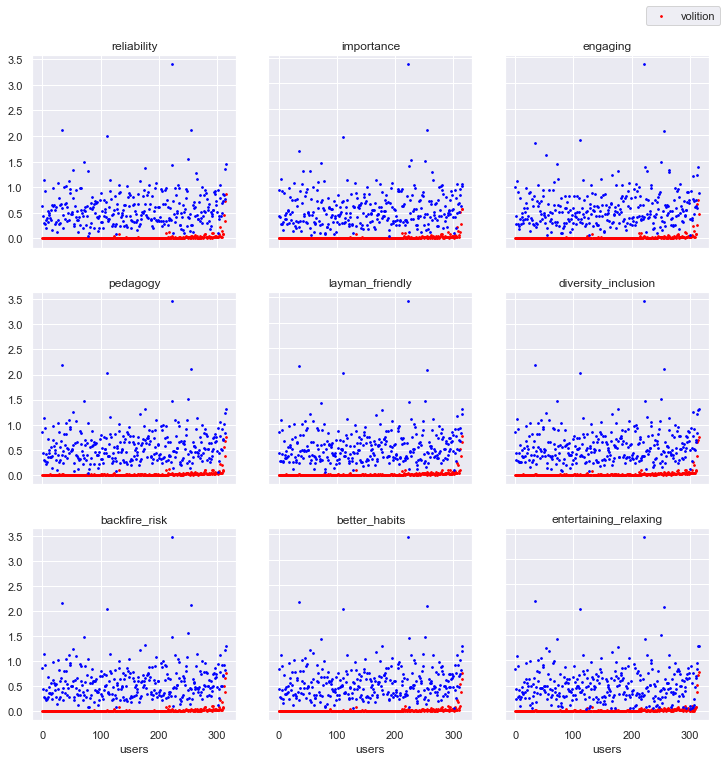

In [242]:
vol_arr_users, pref_arr_users = model_vol_pref("Adam_1650214381")
users = range(0, len(vol_arr_users))
plot_distri_per_crit(users, vol_arr_users, pref_arr_users, "volition", "users", "")

NameError: name 'plot_y_test' is not defined

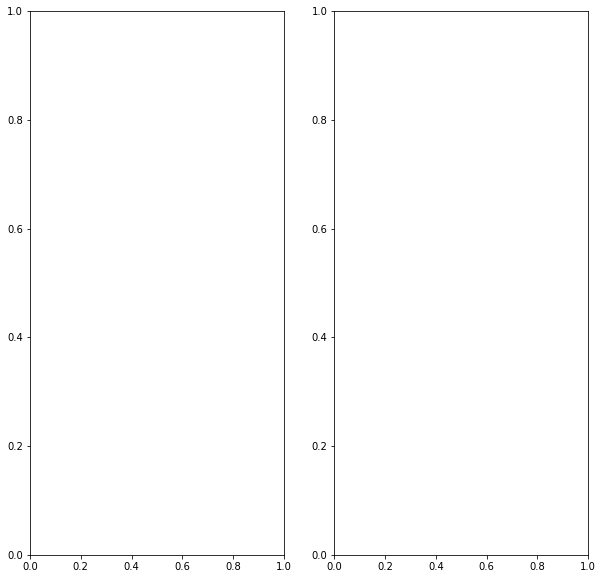

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
yy_train = plot_y_test("tournesol_runs/Adam_1650132135", "train", axs[0])
yy_test = plot_y_test("tournesol_runs/Adam_1650132135", "test", axs[1])

print(np.linalg.norm(mu)) 

# We can set the number of bins with the *bins* keyword argument.


In [9]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(y_data, plot=pylab)
pylab.show()

NameError: name 'y_data' is not defined

In [10]:
def y_noise_per_criter(res):
    noise_arr = []
    y_arr = []
    for rr in res.values():
        for r in rr:
            noise_arr += [r[5]]
            y_arr += [r[4]]
      
    noise_arr = np.array(noise_arr)
    y_arr = np.array(y_arr)
    plot_distri_per_crit(y_arr, noise_arr, "noise_k", "noise_k", "y")
y_noise_per_criter(res5)

NameError: name 'res5' is not defined

In [11]:
def plot_y_noise(res):
    y_data_arr = []
    quotient_arr = []
    for r in res.values():
        for rr in r:
            y_data_arr += [rr[4]]
            quotient_arr += [rr[5]]

    plt.xlabel("l2(noise)")
    plt.ylabel("y_data")
    print(pearsonr(y_data_arr, quotient_arr))
    print(max(quotient_arr), min(quotient_arr))
    plt.scatter(quotient_arr, y_data_arr, s=15)

In [12]:
def _encode_weights(w, r):
    
    if r != -1:
        if w == 0.:
            return 1.
        elif w == 1.:
            return 1.5
        else:
            return w
    else:
        return 0
    
def calc_rating(brad_prob, pref):
    
    return [-np.log(-2*(np.log(brad_prob[i]) + np.log(2)) + 1) / pref[i] for i in range(len(pref))]

def v2_result_real_data(file, pref=0):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []

    # recover data from test_file
    with open(f'tournesol_runs/{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file

    with open(f'tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    noises_arr = []
    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    q = []
    for i in users_ids:
        results_users_dict.update({i: []})
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        unrated = 0
        for r in r2:
            if r == -1.0:
                r2_scaled += [-1.]
                unrated += 1
            else:
                r2_scaled += [r / 100]
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        encoded_weight = []
        for (w, r) in zip(weight, r2_scaled):
            encoded_weight += [_encode_weights(w, r)]
            
        encoded_weight = np.array(encoded_weight)
        r2_scaled = np.array(r2_scaled)
        y_data = test_vol_dic[i][3]
        normalized_y_data = y_data / 100000 #np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users.get(uid) + noises
        # taking only volition as user preferences
        #bradely = [1/(1+np.exp(-np.multiply(user_pref[i], encoded_weight[i] * r2_scaled[i]))) for i in range(len(user_pref))]
        # takinh noisy preferences : volition + noises
        bradely = [[1/(1+np.exp(-np.multiply(user_pref[i][j], encoded_weight[j] * r2_scaled[j]))) for j in range(len(user_pref[i]))] for i in range(len(user_pref))]
        mean_proba = np.array(bradely).mean(axis=0)
        #mean_noise = np.array([-np.log(mean_proba[i]) / mean_proba[i] - vol_arr_users.get(uid)[i] for i in range(len(mean_proba))])
        mean_noise = np.array(noises).mean(axis=0)
        print(uid,": ", abs(mean_proba - r2_scaled))
        quotient = np.linalg.norm(mean_noise) 
        q += [quotient]
        res_uid = [i, uid, r2_scaled, mean_proba, mean_noise, y_data, quotient, unrated]
        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        

    return results_users_dict, np.array(q).mean(), mu

In [48]:
re, mean_q, mu = v2_result_real_data("Adam_1659138914")

0 :  [0.41343802 0.35777669 0.24757441 0.00311622 0.00832883 0.02530329
 0.13673656 0.06909188 0.10517178]
0 :  [1.5        0.45170584 0.12786039 0.10187951 0.00956789 0.0297064
 0.09098537 0.10814576 0.1046323 ]
0 :  [0.00398946 1.5        0.15948045 0.45017128 0.16904589 0.04303882
 0.09523233 0.07275888 0.14530452]
0 :  [1.44816123e-02 9.72623361e-03 1.50000000e+00 9.87356826e-04
 1.62146436e-02 4.10151473e-02 1.34000137e-01 7.07376857e-02
 9.71590355e-02]
1 :  [0.00917507 0.00938998 0.00274838 0.32025227 0.01315964 0.02471587
 0.13420906 0.21936716 0.04815333]
2 :  [0.01413869 0.01787937 0.0113462  0.23743832 0.0031724  0.03371693
 0.1411423  0.09700922 0.14959453]
3 :  [8.67134918e-03 6.99358387e-03 1.26899705e-02 7.83049498e-04
 9.68646983e-03 1.50000000e+00 7.33291145e-02 5.03165487e-02
 8.50689026e-02]
3 :  [0.0723223  0.00944297 0.01365287 0.08912729 0.01175233 0.02614243
 1.5        0.01610917 0.07453719]
3 :  [0.08701014 0.09979594 0.01266313 0.00257611 0.00467166 0.06189251

18 :  [1.49943209e-02 1.09736985e-01 4.51145280e-01 1.35420793e-03
 1.48895374e-01 2.92033547e-02 9.24833513e-02 1.50000000e+00
 2.62895345e-01]
18 :  [0.14575546 0.06633875 0.13997465 0.02744151 0.00553555 0.15136778
 0.05820668 0.12177573 1.5       ]
18 :  [0.12028981 0.13000743 0.11276075 0.11996409 0.00614726 0.14698259
 0.21117747 0.29490361 0.0223248 ]
18 :  [1.5        0.07324462 0.16251133 0.22046038 0.12198479 0.09275191
 0.09191867 0.00201095 0.10465678]
18 :  [0.46085612 1.5        0.02686955 0.13031996 0.11589818 0.22325582
 0.19923179 0.07123379 0.08807115]
18 :  [3.82876919e-01 5.14694733e-03 1.50000000e+00 4.24327885e-03
 1.40534508e-01 1.93776538e-01 4.57089249e-01 1.00895864e-01
 9.30741347e-04]
18 :  [0.20900826 0.02175567 0.20219205 1.5        0.00516577 0.16176393
 0.13750468 0.01442853 0.1081724 ]
18 :  [0.12652705 0.0585326  0.1296474  0.06707479 1.5        0.03845371
 0.24545326 0.09830108 0.24420435]
18 :  [1.40713361e-01 9.32090890e-03 1.30019025e-02 1.15617909

42 :  [0.00850936 1.5        0.01212732 0.00579565 0.30000168 0.02353357
 0.09231357 0.06949807 0.14359318]
43 :  [9.94818255e-03 6.96424933e-03 1.50000000e+00 1.14749701e-03
 5.99869744e-03 4.29156208e-02 1.36081702e-01 7.61365213e-02
 1.03221682e-01]
43 :  [0.02897669 0.010712   0.01048809 1.5        0.01079599 0.17375296
 0.11859544 0.08993503 0.10114588]
43 :  [0.01040372 0.01210391 0.00600508 0.00448924 1.5        0.15579516
 0.5        0.47680544 0.14447917]
43 :  [0.01287734 0.01301193 0.02204655 0.00357844 0.01134428 1.5
 0.14129028 0.24698485 0.14183317]
43 :  [0.01145468 0.01219354 0.00998837 0.00217683 0.00615001 0.02961342
 1.5        0.09539469 0.36070317]
43 :  [0.15232163 0.00550886 0.01586581 0.00269835 0.01420646 0.02438844
 0.09666486 1.5        0.25248392]
43 :  [0.5        0.14017161 0.01977635 0.0034851  0.00442288 0.04431062
 0.09298194 0.06793307 1.5       ]
43 :  [0.01558681 0.08904525 0.13365382 0.00390955 0.0102032  0.02662148
 0.13822192 0.06632737 0.10628829

57 :  [0.16805986 0.12419655 0.33619955 0.12595584 0.01678021 1.5
 1.5        1.5        1.5       ]
57 :  [0.1250432  1.5        0.46873385 0.16153729 1.5        1.5
 1.5        1.5        0.13507386]
57 :  [1.5        0.48615472 0.01385085 0.00228212 0.03866692 0.03931932
 0.09366685 0.06931143 0.14768144]
59 :  [0.01167485 0.0063245  1.5        0.0038189  0.00661683 0.03053109
 0.13552426 0.2327465  0.26572181]
60 :  [0.16312637 0.00945362 0.22426262 1.5        0.0074621  0.27606532
 0.11498119 0.08710306 0.09976678]
60 :  [0.01708144 0.00622808 0.37065161 0.23077708 1.5        0.33548775
 0.16277532 0.23830529 0.14920439]
60 :  [0.35663091 0.00979272 0.40298568 0.37536721 0.17544101 1.5
 0.01664671 0.09758813 0.27244323]
62 :  [0.48265347 0.01187138 0.01091611 0.00243008 0.00632869 0.02073333
 0.04546906 0.09909509 0.14174085]
62 :  [0.0870492  0.14484613 0.01114162 0.00095168 0.0131853  0.021317
 0.09265082 0.15754608 0.14957644]
63 :  [0.11894302 0.01141515 0.01399624 0.00198291 

87 :  [0.01087351 0.00792713 0.01171984 0.00373005 0.19524961 0.01185944
 0.00918065 0.10381326 0.14947695]
87 :  [0.15572686 0.01092589 0.00806195 0.00520556 0.0083257  0.14711809
 0.09402235 0.22562326 0.15174795]
88 :  [0.14712847 0.0133344  0.00927381 0.00308063 0.00947026 0.02450672
 0.09486979 1.5        0.14543412]
88 :  [0.01312058 0.1857491  0.01218227 0.00214667 0.01056564 0.03726977
 0.09505572 0.06910027 1.5       ]
90 :  [4.84752064e-01 4.83273733e-01 3.55446082e-01 4.89285971e-05
 7.09316199e-03 2.10414064e-02 1.32201281e-01 7.55405328e-02
 1.00417650e-01]
90 :  [1.5        0.24677222 0.00623159 0.24708925 0.00321913 0.03012286
 0.09290374 0.10365496 0.0996582 ]
90 :  [0.00958622 1.5        0.3683594  0.49500685 0.47327827 0.05665531
 0.09231309 0.07371837 0.14309789]
90 :  [0.06024828 0.5        1.5        0.49947832 0.31649602 0.27927466
 0.137299   0.0710737  0.1028136 ]
90 :  [0.00748446 0.00578973 0.01496963 1.5        0.08280789 0.0903851
 0.10351557 0.15174369 0.14

113 :  [0.08076481 0.06841276 0.21898958 0.00136543 0.08193434 0.02476195
 0.23177868 0.23552756 0.0066028 ]
113 :  [0.1386244  0.01249149 0.09554435 0.18235634 0.01031865 0.10926938
 0.24066471 0.10117319 0.28921899]
113 :  [0.06146737 0.25529404 0.01549256 0.09443072 0.12926652 0.07405786
 0.09242638 0.07005559 0.28743208]
113 :  [0.17569535 0.11966962 0.08016131 0.00275868 0.00648687 0.03514655
 0.17793327 0.01037391 0.10566917]
113 :  [0.02813334 0.00817731 0.01137997 0.05139082 0.10457045 0.06715789
 0.04451512 0.14473918 0.10563251]
113 :  [0.08753058 0.00633615 0.01176355 0.10608288 0.00516644 0.14615693
 0.13640319 0.32467092 0.06104988]
113 :  [0.09154524 0.00908625 0.01032329 0.00323115 0.22455864 0.140105
 0.01798285 0.0088015  0.07109165]
113 :  [0.10044797 0.14533261 0.0113319  0.00640905 0.19637661 0.14962152
 0.06313565 0.09236955 0.13918448]
114 :  [1.38633530e-02 1.05600869e-02 1.83811548e-01 1.10579668e-03
 1.76287932e-01 1.86477184e-01 9.26127766e-02 1.50000000e+00
 

122 :  [1.81824669e-01 9.90248393e-02 1.40737573e-02 1.73233333e-04
 7.07965566e-03 1.55983353e-01 3.96382547e-02 1.50000000e+00
 7.58979617e-02]
123 :  [2.04685952e-02 1.55917251e-02 4.69278961e-02 5.51742977e-04
 7.27766913e-03 3.48482805e-02 9.28115103e-02 7.11540439e-02
 1.50000000e+00]
123 :  [0.0782211  0.06054268 0.11617242 0.00168299 0.00611254 0.02130329
 0.13611469 0.06845586 0.10318561]
123 :  [1.5        0.21002375 0.10868399 0.05036711 0.00525548 0.02628558
 0.09298797 0.09927091 0.09969348]
124 :  [0.01354832 1.5        0.4756416  0.49467415 0.24512751 0.04194836
 0.0924379  0.07434716 0.14735385]
125 :  [6.70059484e-03 9.77056494e-03 1.50000000e+00 6.29929393e-04
 2.28192441e-01 9.66032874e-02 2.43183487e-02 6.74617320e-02
 1.00192524e-01]
126 :  [0.01588842 0.00467638 0.00660595 1.5        0.00736508 0.03518252
 0.13378706 0.09221161 0.09998988]
127 :  [0.00639929 0.01032454 0.01024805 0.00228523 0.35330739 0.17043732
 0.04224338 0.2431272  0.26620635]
128 :  [1.5      

146 :  [0.01804895 0.00820958 0.01084197 1.5        0.01225439 0.13798529
 0.00789825 0.10273485 0.10573618]
146 :  [8.05460843e-03 1.11903260e-02 1.30233629e-02 1.30614058e-03
 1.50000000e+00 4.66353729e-02 1.37436678e-02 5.09375879e-02
 1.45041062e-01]
146 :  [0.01942495 0.01421703 0.02069818 0.00293384 0.01022333 1.5
 0.14121988 0.29224211 0.33623958]
146 :  [0.01333315 0.0111046  0.00945764 0.00456364 0.01042684 0.03036612
 1.5        0.10036533 0.22668851]
146 :  [0.15748622 0.01748202 0.00717394 0.00376842 0.02005934 0.02594172
 0.09550516 1.5        0.15134293]
146 :  [0.18319759 0.23574017 0.01657699 0.00433969 0.00622206 0.041818
 0.09477508 0.07008899 1.5       ]
146 :  [0.01747151 0.10696716 0.18253532 0.00575482 0.0095305  0.02909761
 0.14202403 0.0772354  0.10289994]
146 :  [1.5        0.01091439 0.1533086  0.15186823 0.01467253 0.02392594
 0.09512083 0.10205495 0.10538796]
146 :  [0.01195553 1.5        0.01341999 0.31046962 0.3280963  0.03885252
 0.09241574 0.06890178 0.1

161 :  [0.34749041 0.25221449 0.3664641  0.5        0.5        0.43017878
 0.2029756  0.15620339 1.5       ]
161 :  [0.46795777 0.36298203 0.49061025 0.07548371 0.03787569 0.5
 0.24761232 0.12468848 0.0759117 ]
161 :  [1.5        0.46583333 0.33566749 0.10775712 0.22677512 0.37850211
 0.39614145 0.32613067 0.27449728]
161 :  [0.27958652 1.5        0.01519181 0.03732732 0.0687601  0.32774209
 0.17118484 0.15921175 0.12743655]
161 :  [0.04012481 0.00985848 1.5        0.00856742 0.01743343 0.04987294
 0.14069319 0.07361567 0.10568555]
161 :  [0.01293873 0.01599484 0.01088433 1.5        0.07020306 0.04250792
 0.21676521 0.24461077 0.13761733]
161 :  [0.01539979 0.01317944 0.03849485 0.09957224 1.5        0.03127575
 0.11367966 0.01910229 0.1464145 ]
161 :  [0.19379382 0.10578371 0.01588246 0.08396866 0.00990205 1.5
 0.14079808 0.5        0.33007846]
161 :  [0.10855221 0.11006105 0.5        0.09799766 0.24680493 0.23161324
 1.5        0.10420965 0.30858959]
161 :  [0.1549481  0.01227659 0.0

161 :  [0.20146613 0.31676382 0.13497368 0.04282256 0.00714557 0.16639423
 0.22587162 0.07409089 0.42252908]
161 :  [0.08491547 0.40512906 0.31868758 0.12668888 0.01519375 0.1885443
 0.24812593 0.39865173 0.07213128]
161 :  [0.34559353 0.09633968 0.40425103 0.33198599 0.5        0.02747227
 0.195004   0.02683031 0.29907211]
161 :  [0.20931089 0.5        0.02194091 0.12755428 0.14339008 0.03861309
 0.09511411 0.03152773 0.15059938]
161 :  [0.09974251 0.11689047 0.10921108 0.02804397 0.5        0.28936918
 0.40913602 0.10287668 0.19281398]
161 :  [0.46498633 0.30380372 0.46636971 0.5        0.08614208 0.26918228
 0.09586007 0.06469071 0.03352897]
161 :  [0.17637918 0.25933439 0.37010343 0.10504766 0.3220311  0.01549858
 0.15352598 0.04923292 0.15905213]
161 :  [0.02017299 0.24794608 0.09749665 0.13447376 0.18137201 0.36797383
 0.17112109 0.28175269 0.13304576]
161 :  [0.19444597 0.47095758 0.12808262 0.13739842 0.10774807 0.3306516
 0.2322789  0.21838549 0.14577891]
161 :  [0.22191386 0.

171 :  [0.02516832 0.39492425 1.5        0.26634614 0.15677967 0.01431579
 0.11827395 0.21142722 0.0402353 ]
171 :  [0.06631408 0.12868664 0.21005871 1.5        0.41389225 0.05838809
 0.21786013 0.24159886 0.36935681]
171 :  [0.01936097 0.16726656 0.04390041 0.25553359 1.5        0.09594111
 0.09332259 0.01515154 0.11663087]
171 :  [0.13342016 0.06914619 0.1734669  0.09667761 0.1703129  1.5
 0.10437379 0.01773798 0.11473253]
171 :  [0.39050638 0.12274172 0.07344928 0.05787967 0.07181843 0.19995963
 1.5        0.01458903 0.11177974]
171 :  [0.29236708 0.07191519 0.17034976 0.35306769 0.09660113 0.03188141
 0.21217212 1.5        0.11331945]
171 :  [0.02675639 0.07038344 0.14334822 0.1102567  0.03093162 0.09261518
 0.10180075 0.06842372 1.5       ]
171 :  [0.18261108 0.29020768 0.23621886 0.2861901  0.06184329 0.04503179
 0.23502125 0.00355318 0.19499309]
171 :  [1.5        0.36606293 0.353252   0.26643783 0.21422321 0.13772801
 0.01807355 0.28141151 0.18604713]
171 :  [0.16898697 1.5    

171 :  [0.21089299 0.31661604 0.20379286 0.34545935 0.11345013 0.26451922
 0.03509613 0.29056044 0.04466256]
171 :  [0.0887494  0.15681026 0.34159757 0.10382814 0.16981677 0.05076622
 0.2270649  0.07696969 0.13543533]
171 :  [0.14263209 0.1126716  0.28255913 0.08689525 0.18263888 0.43726365
 0.05990692 0.11002995 0.29606157]
171 :  [0.38987586 0.15037729 0.34986285 0.15294554 0.05829916 0.40213718
 0.18600613 0.07575465 0.22480048]
171 :  [0.11720919 0.10443063 0.13487197 0.31497285 0.06886594 0.0778665
 0.42345611 0.19564142 0.1760659 ]
171 :  [0.09241847 0.01633783 0.12221901 0.08152406 0.15556909 0.03178223
 0.27635334 0.41018657 0.03517312]
171 :  [0.15929664 0.0473932  0.12576363 0.17525745 0.07811066 0.25358519
 0.06323122 0.01687404 0.42721652]
171 :  [0.09944743 0.03047718 0.16921951 0.01964932 0.12223461 0.11090371
 0.21322128 0.18707731 0.00298191]
171 :  [0.22976127 0.18445543 0.17293923 0.13902123 0.05415693 0.12279984
 0.11348071 0.10757007 0.2203513 ]
171 :  [0.08506861 0

171 :  [0.15383866 0.10950154 0.09514135 0.05749426 0.31646098 0.27481368
 0.02055443 0.07264226 0.026808  ]
171 :  [0.26123801 0.09935738 0.01817273 0.0701362  0.24721515 0.0329298
 0.1497441  0.03886245 0.09833202]
171 :  [0.23421179 0.20852255 0.30071682 0.04703775 0.13041054 0.2510988
 0.11579055 0.05641976 0.28901905]
171 :  [0.12345395 0.25704504 0.18131094 0.33315618 0.12903647 0.19158496
 0.30055849 0.23837646 0.1063833 ]
171 :  [0.39705546 0.05388946 0.09896768 0.40263606 0.27015417 0.03271662
 0.5        0.42603853 0.36861117]
171 :  [0.47109521 0.08276362 0.33546561 0.24579569 0.17795063 0.32891651
 0.09961169 0.17978343 0.19016455]
171 :  [1.33594603e-01 3.41672984e-01 8.89193158e-02 3.09717422e-01
 2.10711914e-01 9.32269218e-02 1.25257662e-01 2.81533833e-04
 5.67851277e-02]
171 :  [0.23898384 0.08324054 0.21010736 0.07741177 0.33704132 0.15905899
 0.03222343 0.23016795 0.01045431]
171 :  [0.0006477  0.19486353 0.11764115 0.33192872 0.11738897 0.01550708
 0.03789328 0.28160

171 :  [0.07535178 0.13321855 0.11919376 0.08368469 0.11521843 0.12949346
 0.1457959  0.0541436  0.06563853]
171 :  [0.21372037 0.0654064  0.14691505 0.14629039 0.02594765 0.14425428
 0.27770769 0.02896584 0.03586261]
171 :  [0.02278127 0.07666448 0.06775413 0.08267986 0.17892396 0.14324419
 0.0285709  0.10822405 0.09909303]
171 :  [0.14319323 0.04466689 0.09871835 0.12574296 0.20697127 0.13420981
 0.19523988 0.25922622 0.08559214]
171 :  [0.02998578 0.054418   0.07697554 0.0328462  0.01649133 0.15535859
 0.22989151 0.04680858 0.04137839]
171 :  [0.02840971 0.23274266 0.31728442 0.14986575 0.38532054 0.08469399
 0.09848737 0.00476339 0.07983831]
171 :  [0.02758765 0.07316481 0.086396   0.19526081 0.07590565 0.16928907
 0.1887977  0.13562706 0.1681014 ]
171 :  [0.32990074 0.1800129  0.02315895 0.35406065 0.42588953 0.20368963
 0.34643146 0.07327274 0.2576354 ]
171 :  [0.02210407 0.32670685 0.18168381 0.01160717 0.35611324 0.39289587
 0.10275226 0.33130643 0.10793221]
171 :  [0.03621838 

194 :  [3.25163029e-01 1.89698773e-02 1.41055053e-02 9.67038195e-04
 1.03192720e-02 2.53928537e-02 9.21315366e-02 1.50000000e+00
 7.53064664e-03]
195 :  [0.08688607 0.11227612 0.0100864  0.00061584 0.00672063 0.03322404
 0.0917167  0.07030368 0.0593659 ]
197 :  [0.14190156 0.48250409 0.47930772 0.00561277 0.00909403 0.025974
 0.13718205 0.07480299 0.10306046]
197 :  [0.495455   0.01395649 0.00749071 0.01006933 0.00374566 0.01722076
 0.08995798 0.08975424 0.10190388]
198 :  [1.50000000e+00 1.50000000e+00 1.81185021e-02 6.87565326e-04
 1.44131115e-02 3.58992084e-02 9.44385950e-02 6.79042635e-02
 1.45643311e-01]
198 :  [0.01093261 1.5        1.5        0.00478802 0.00737354 0.03661515
 0.13675459 0.06717795 0.10282857]
199 :  [0.01505821 0.00788045 0.00766165 0.09020019 0.00702405 0.03788314
 0.12405363 0.10128557 0.09785527]
199 :  [0.00758652 0.00910484 0.01094676 0.0018645  0.1339761  0.26596409
 0.30699951 0.11979669 0.10944448]
200 :  [3.01759414e-02 1.16190423e-02 1.13431337e-01 1.3

233 :  [0.37518979 0.0156026  0.10587754 0.00155163 0.00784727 0.02690897
 0.14022037 0.07258223 0.11146193]
233 :  [1.5        0.4882972  0.32863915 0.24240267 0.01470866 0.02496466
 0.09299635 0.09480573 0.11008197]
235 :  [0.01066057 1.5        0.5        0.5        0.5        0.02928297
 0.09233121 0.07331807 0.14471093]
235 :  [0.01316292 0.00815708 1.5        0.50330882 0.48495154 0.43738878
 0.13546073 0.06894995 0.09988267]
235 :  [0.01830754 0.0078008  0.01120007 1.5        0.15923958 0.0351486
 0.35050008 0.09857163 0.09954925]
236 :  [0.01155929 0.01318805 0.01054559 0.00222441 1.5        0.0333892
 0.28904064 0.27115851 0.14721653]
236 :  [0.01435868 0.00703798 0.01728396 0.00154038 0.00686127 1.5
 0.13704539 0.10310102 0.14978863]
237 :  [0.01254951 0.0061556  0.00596215 0.00121926 0.00906318 0.02186362
 0.08478617 0.09539118 0.14344293]
238 :  [0.00509058 0.00969106 0.00895646 0.00061812 0.014333   0.02968292
 0.0942871  0.36475529 0.28230548]
240 :  [2.11717678e-01 2.095

270 :  [1.5        0.46171519 1.5        1.5        1.5        0.31159967
 0.24184751 0.35398121 0.25586405]
270 :  [0.46250769 0.5        0.21437844 0.32375371 1.5        1.5
 0.15086414 0.10239513 0.15188288]
270 :  [0.02332846 0.24112061 0.5        0.01782038 0.2562855  1.5
 1.5        0.5        0.15269828]
270 :  [0.5        0.5        1.5        1.5        0.5        1.5
 1.5        1.5        0.31936354]
270 :  [0.42502481 0.37720297 0.5        0.01047771 0.47544594 0.15108538
 0.5        1.5        1.5       ]
270 :  [0.5        0.5        0.46178881 0.47056424 1.5        1.5
 0.2412802  1.5        1.5       ]
270 :  [1.5        0.5        0.44978573 0.10695701 0.5        0.18021599
 0.3116144  0.32231585 1.5       ]
270 :  [1.5        1.5        0.5        0.5        0.21393165 0.03872322
 1.5        1.5        0.5       ]
270 :  [1.5        1.5        1.5        0.46844496 0.46789374 0.04031103
 0.15287166 1.5        1.5       ]
270 :  [0.0288284  1.5        1.5        1.5   

270 :  [1.5        0.38527185 1.5        1.5        1.5        0.03984673
 0.23185468 0.31851833 0.26493228]
270 :  [1.5        1.5        0.01539704 1.5        1.5        1.5
 0.23798067 0.03820234 0.05365323]
270 :  [0.10013237 0.25400376 0.18079323 0.18053182 1.5        1.5
 1.5        0.23514867 0.1201852 ]
270 :  [0.1766259  0.3184615  0.38461483 0.5        0.3073044  0.37654261
 0.19939945 1.5        0.13291196]
270 :  [0.15674276 0.40723454 0.22980591 0.42198588 0.5        0.3275565
 0.1493812  0.32130775 1.5       ]
270 :  [0.41029286 0.174745   0.2091003  0.08415122 0.44106603 0.5
 0.03056492 0.22688319 0.09509687]
270 :  [1.5        0.05496462 0.1841916  0.43202198 0.1210539  0.19093978
 0.5        0.5        0.39033858]
270 :  [0.46143283 1.5        0.23164217 0.20373043 0.36484211 0.08038245
 0.17288466 0.5        0.24610453]
270 :  [0.5        0.5        1.5        0.01981563 0.46993284 0.37284044
 0.08547929 0.16343101 0.46087825]
270 :  [0.0173285  0.12852451 0.5        

270 :  [0.02090128 0.45193412 0.21417269 0.32695356 0.47585462 0.5
 0.23698326 0.07460073 0.10333681]
270 :  [0.15668001 0.01317671 0.01905965 0.32390754 0.28773839 0.36728279
 0.05217471 0.30768091 0.34535163]
270 :  [0.22534602 0.39668672 0.45241599 0.24595636 0.21809434 0.14816202
 0.3280197  0.02457682 0.26048234]
270 :  [0.16772247 0.2959962  0.35057635 0.32417476 0.11267869 0.14609835
 0.3465406  0.5        0.41981856]
270 :  [0.5        0.5        0.25053453 0.20993275 0.22744442 0.43485455
 0.5        0.25600463 0.35733466]
270 :  [0.19748332 0.34154598 0.24146772 0.40234299 0.06182379 0.45365526
 0.01989404 0.13568384 0.18119203]
270 :  [0.30639304 0.20650972 0.32962769 0.23532127 0.40160049 0.03367074
 0.46014439 0.01369378 0.17067203]
270 :  [0.06601281 0.2402686  0.1151944  0.22696984 0.38094379 0.45089161
 0.2350791  0.31384002 0.29715983]
270 :  [0.35074462 0.20596013 0.03194974 0.19584718 0.38028718 0.07105561
 0.14216791 0.28259796 0.183707  ]
270 :  [0.20349851 0.42769

278 :  [0.5        0.25135663 0.2611855  0.13402307 0.12505965 0.09118069
 0.3263532  0.35401527 1.5       ]
278 :  [0.16660259 0.14092077 0.24490539 0.26637104 0.11670199 0.10255058
 0.03461868 0.18971422 0.0306929 ]
278 :  [1.5        0.13083875 0.5        0.18878206 0.11070854 0.12026446
 0.08574915 0.30995599 0.29780772]
278 :  [0.44848121 1.5        0.12442645 0.3640194  0.13957568 0.03028969
 0.22553077 1.5        0.32256163]
278 :  [0.23923182 0.23183322 1.5        0.15933257 0.3106588  0.18035103
 0.26670983 0.29488909 0.06107612]
278 :  [1.5        0.2641523  1.5        1.5        0.1870344  0.41414104
 0.1512711  0.03605047 0.26390168]
278 :  [0.19625092 0.2018175  0.44921144 0.31804594 1.5        0.11436864
 0.22460772 0.14236599 0.23627238]
278 :  [1.45014277e-01 2.84483516e-01 1.43510273e-01 4.70060710e-01
 5.95443124e-02 1.50000000e+00 1.49322600e-03 6.35923208e-02
 2.89920626e-01]
278 :  [0.20274821 0.20014427 0.20288567 0.5        0.5        0.1049797
 1.5        0.1932

278 :  [0.2318297  0.1851486  0.18728332 0.15522528 0.16072314 0.16003213
 0.38397712 0.30878812 0.24643282]
278 :  [0.45734173 0.45068079 0.4588167  0.47364494 0.45937209 0.43271767
 0.30432941 0.35233904 0.24496088]
278 :  [0.45171264 0.45823898 0.45718522 0.47212984 0.46826329 0.40855249
 0.30599016 0.35788261 0.31284356]
278 :  [0.44147456 0.44003093 0.44607482 0.45852589 0.47733583 0.42778016
 0.238253   0.35422497 0.30896816]
278 :  [0.45456063 0.4568941  0.45613099 0.46939174 0.46685801 0.43620802
 0.30124701 0.31420926 0.30962501]
278 :  [0.45594371 0.46237618 0.44797789 0.46825343 0.44270288 0.41907067
 0.30565539 0.35022229 0.24793795]
278 :  [0.45677655 0.46500308 0.45748091 0.46230089 0.46178629 0.40945908
 0.23458786 0.35523182 0.30015383]
278 :  [0.45063354 0.46673282 0.44819245 0.46918245 0.45833523 0.41313911
 0.22387253 0.32951859 0.29485244]
278 :  [0.46446868 0.4531599  0.47082846 0.47303065 0.46854886 0.4240966
 0.23082167 0.32065288 0.24770086]
278 :  [0.45548804 0

285 :  [0.02176882 0.01332396 0.02773325 0.00974537 0.01737566 1.5
 0.23240725 0.32807795 0.24191728]
285 :  [0.03508871 0.01789175 0.01851198 0.01492529 0.01618398 0.03342877
 1.5        0.5        0.5       ]
285 :  [0.5        0.02466349 0.0170082  0.00883394 0.02298157 0.03078233
 0.10272768 1.5        0.23618669]
285 :  [0.44955191 0.45357551 0.02720819 0.00884105 0.01513602 0.05835289
 0.10103834 0.08049915 1.5       ]
285 :  [0.20244377 0.0339413  0.27575794 0.01556735 0.0149703  0.03695204
 0.14885263 0.07737386 0.1113168 ]
285 :  [1.5        0.03315517 0.02832109 0.01841465 0.02177817 0.03059288
 0.10265365 0.11350853 0.11782589]
285 :  [0.01475154 1.5        0.44971005 0.46897425 0.45765028 0.05700883
 0.10272978 0.08011357 0.16171549]
285 :  [0.01325891 0.01406113 1.5        0.01309242 0.02642488 0.04730158
 0.15059624 0.08034439 0.10905079]
285 :  [0.02199946 0.01793496 0.01859702 1.5        0.5        0.5
 0.5        0.12431875 0.11160759]
285 :  [0.02438964 0.03043284 0.0

323 :  [0.01189643 0.44092912 0.0158774  1.5        0.01977949 0.03310874
 0.22481348 0.10098599 0.10424332]
323 :  [0.01253022 0.00887281 0.014083   0.00646201 1.5        0.03952905
 0.03734501 0.36343314 0.20691234]
323 :  [0.01497896 0.00756938 0.02366638 0.06668146 0.01123785 1.5
 0.13239536 0.18053182 0.2164293 ]
323 :  [0.05764665 0.00623501 0.01619709 0.00941942 0.2390615  0.03502179
 1.5        0.10547916 0.08078225]
323 :  [0.02454642 0.01544834 0.0159693  0.00529357 0.01951788 0.00388945
 0.09277145 1.5        0.149867  ]
324 :  [0.01801637 0.1111683  0.02401108 0.0075477  0.00885508 0.03956157
 0.04836692 0.06602788 1.5       ]
324 :  [0.01647011 0.00194058 0.01101665 0.00935964 0.0099895  0.02647543
 0.07182643 0.07061021 0.10519845]
324 :  [1.5        0.41528785 0.01273532 0.00876594 0.00784736 0.02393344
 0.05058318 0.10435173 0.10317264]
325 :  [0.00690643 0.01476743 0.01858838 0.03771567 0.01199474 0.03361222
 0.03669331 0.06956201 0.15379102]
327 :  [0.01929255 0.00968

354 :  [0.3980906  0.19799408 1.5        0.04594175 0.01573797 0.04781297
 0.12565295 0.069149   0.10512113]
356 :  [0.02067965 0.00950355 0.00985315 0.5        0.01792819 0.04303098
 0.05027178 0.10549421 0.10972205]
356 :  [0.0146556  0.0164544  0.01586373 0.01017475 0.5        0.04077129
 0.05077023 0.10377163 0.1620566 ]
356 :  [0.00993594 0.01376366 0.01501271 0.00800631 0.01000096 0.5
 0.04731087 0.10784031 0.15379287]
357 :  [0.01767466 0.00887149 0.0157298  0.01347233 0.00753483 0.02342844
 0.28712552 0.22573555 0.10625594]
358 :  [0.02041209 0.30718903 0.17622826 0.02190779 0.15570661 0.46183042
 0.41846425 0.07963462 0.16073041]
359 :  [0.22574489 0.02375341 0.0193624  0.27009268 0.01483872 0.04015174
 0.17333029 0.07325323 1.5       ]
359 :  [0.0319185  0.22670644 0.24391085 0.02356767 0.15545903 0.24326564
 0.06454389 0.07086361 0.10513574]
359 :  [1.5        0.03159023 0.1541433  0.22290557 0.02191384 0.5
 0.20721793 0.10345429 0.10740484]
359 :  [0.5        1.5        0.0

392 :  [0.02517265 0.02785744 0.04483439 0.06697023 0.01734721 0.02040166
 0.08982905 0.04144607 0.17012091]
392 :  [0.05515423 0.20112496 0.18647783 0.31309066 0.01759826 0.03743019
 0.05665218 0.11046352 0.11054854]
393 :  [1.5        1.5        0.02341137 0.05924663 0.01432816 0.03901945
 0.08753905 0.06749316 0.14672973]
394 :  [0.01936289 0.01107432 0.01797055 0.0192269  0.01819121 0.04478906
 0.14604287 0.07638862 0.11040472]
394 :  [0.01723075 0.01420136 0.02181921 0.01337255 0.02159134 0.04564647
 0.10816929 0.10109039 0.26588007]
395 :  [0.09430659 0.04514456 0.03948549 1.5        1.5        0.0821893
 0.17302533 0.20146215 0.13978306]
395 :  [0.0241231  0.0327676  0.0576251  0.02458189 1.5        1.5
 0.18047259 0.13666446 0.08986033]
395 :  [0.21614965 0.10571866 0.06419249 0.04127369 0.03614912 1.5
 1.5        0.24274066 0.23877119]
395 :  [0.06103202 0.06591643 0.05792644 0.06751864 0.05315447 0.05866581
 1.5        1.5        0.14008554]
395 :  [0.05160561 0.07472934 0.05

IndexError: list index out of range

In [14]:
print(mean_q, mu)

0.12024406367570907 [-0.04726243  0.00861205 -0.027145   -0.00956594  0.03834347 -0.00376944
 -0.00715219  0.03191105  0.01152003]


TypeError: 'AxesSubplot' object is not subscriptable

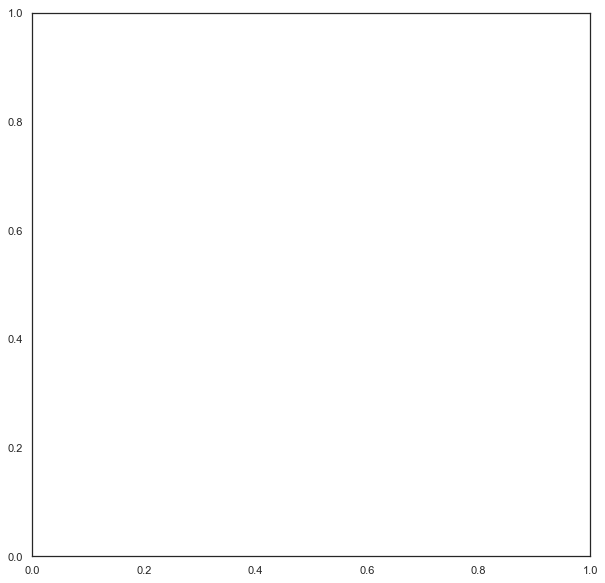

In [49]:
def plot_y_test(file, traintest, ax):
    n_bins = 30
    with open(f'{file}/{traintest}.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        y_data = []
        count = 0
        for row in csv_reader:
            if count % 9 == 0:
                y_data += [float(row["y_data"])]
            count += 1
    y_data_normalized = np.array(y_data) / 100000# np.sqrt(np.sum(np.array(y_data) ** 2))
    y_data.sort(reverse=True)
    ax.hist(y_data_normalized, bins=n_bins, density=True)
    ax.set(xlabel="y_k distribution", ylabel="Frequency")
    plt.savefig(f"./y_k.eps", format='eps')

    print(len(y_data_normalized)/(sum(y_data_normalized)))
    return y_data_normalized

fig, axs = plt.subplots(1, 1, figsize=(10,10))
yy_train = plot_y_test("tournesol_runs/Adam_1650213018", "train", axs[0])
#yy_test = plot_y_test("tournesol_runs/Adam_1650213018", "test", axs[1])
print(mean_q, 1/np.linalg.norm(mu)) 


In [72]:
# recover data from test_file
l = 2.21

def graph(l, maxx, yy):
    n_bins = 30
    x = np.arange(0, maxx, maxx/6)
    y = l * np.exp(-1.6*x)
    plt.hist(yy, bins=n_bins, density=True)
    plt.plot(x, y)
    
graph(l, np.max(yy_train), yy_train)


NameError: name 'yy_train' is not defined

In [27]:
y_data_arr = []
quotient_arr = []
r_scaled = []
prob_bradly = []
for r in re.values():
    for rr in r:
        y_data_arr += [rr[5] / 100000]
        quotient_arr += [rr[6]]
        r_scaled += [rr[2]]
        prob_bradly += [rr[3]]
plt.xlabel("")
plt.ylabel("r_scaled")
print(quotient_arr)

NameError: name 're' is not defined

In [68]:
def result_real_data(file, pref=0):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []

    # recover data from test_file
    with open(f'tournesol_runs/{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file

    with open(f'tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            count += 1
    print(1  / np.linalg.norm(mu))
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    noises_arr = []
    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    for i in users_ids:
        results_users_dict.update({i: []})
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        unrated = 0
        for r in r2:
            if r == -1.0:
                r2_scaled += [-1]
                unrated += 1
            else:
                r2_scaled += [1 - r / 100]
                
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        encoded_weight = []
        for (w, r) in zip(weight, r2_scaled):
            encoded_weight += [_encode_weights(w, r)]
            
        encoded_weight = np.array(encoded_weight)                       
        y_data = test_vol_dic[i][3]
        normalized_y_data = y_data / 100000#np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=10000)
        user_pref = vol_arr_users.get(uid) + noises
        bradely = [1/(1+np.exp(-np.matmul(user_pref[i], encoded_weight * r2_scaled)))
                   for i in range(len(user_pref))]
        bradely_vol = 1/(1+np.exp(-np.matmul(vol_arr_users.get(uid), encoded_weight * r2_scaled)))

        mean_pref, vol = np.array(user_pref).mean(axis=0), vol_arr_users.get(uid)
        y = sc.stats.expon.pdf(normalized_y_data, scale=1 / np.linalg.norm(mu))
        #proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        #assert len(bradely) == len(y) == len(proba_noises)
        #dens = [bradely[i] for i in range(len(noises))]
        dens = [sc.special.expit(bradely[i] * y) for i in range(len(noises))]

        dens_vol = bradely_vol * (1 - np.exp(-(1 / np.linalg.norm(mu)) * normalized_y_data))
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) #/ (nb_criteria - unrated)
        
        rs = []
        ws = []
        assert len(r2_scaled) == len(mean_pref - vol)
        for r in range(len(r2_scaled)):
            if r2_scaled[r] != -1:
                rs += [r2_scaled[r]]
                ws += [encoded_weight[r]]
                
        #res_uid = [i, uid, r2_scaled, mean_proba, mean_noise, y_data, quotient, unrated]

        res_uid = [i, uid, r2_scaled, ws, normalized_y_data, 
                   mean_pref, vol, dens[max_index], rs, dens_vol, noises[max_index]]

        #res_uid = [i, uid, r2_scaled, encoded_weight, y_data, noises[max_index], quotient, dens[max_index]]
        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        print(f"{uid} || {dens_vol} || {dens[max_index]} || {np.mean(dens)} || {quotient}")
        #print(f"{uid} ||{quotient} || {dens} || {rs}")

    return results_users_dict, mu

In [74]:
def _plot_y_noise(res, mu):
    y_data_arr = []
    quotient_arr = []
    bradly_proba = []
    mean_rating = []
    bradely_vol_proba = []
    diff = []
    weights = []
    tp, tn, fp, fn = 0, 0, 0, 0
    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[7]) < 0.6)):#or (np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[4]]
            quotient_arr += [np.linalg.norm(rr[10])]
            bradly_proba += [rr[7]]
            mean_rating += [np.matmul(np.array(rr[8]), np.array(rr[3]))]
            bradely_vol_proba += [rr[9]]
            diff += [abs(rr[7] - np.mean(rr[8]))]
            weights += [rr[3]]
            if rr[7] > 0.5 and np.mean(rr[8]) > 0.5:
                tp += 1
            elif rr[7] > 0.5 and np.mean(rr[8]) <= 0.5:
                fp += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) > 0.5:
                fn += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) <= 0.5:
                    tn += 1
    graph(1.7, np.max(y_data_arr), y_data_arr)
    print(np.linalg.norm(mu))
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print(f"precision: {precision}, recall: {recall}, accuracy: {accuracy}")
    fig, axs = plt.subplots(1, 1, figsize=(10,10))
    mydata_vol = pd.DataFrame({"bradely_proba": bradly_proba, "l2(noise)":quotient_arr})
    mydata = pd.DataFrame({"mean_rating": mean_rating, "bradely_proba":bradly_proba})
    mydata_noise = pd.DataFrame({"mean_rating": mean_rating, "l2(noise)":quotient_arr})

    print(min(bradly_proba))
    print(spearmanr(y_data_arr, quotient_arr))
    print(np.mean(quotient_arr))
    plt.figure(0)
    #axs[0].scatter(quotient_arr, y_data_arr, s=15)
    #axs[0].set(xlabel="", ylabel="")

    #axs.scatter(mean_rating, bradly_proba, s=15, c="red")
    #axs.set(xlabel="mean_rating", ylabel="bradely_proba")

    sns.regplot(ax=axs, x="bradely_proba", y="l2(noise)", data=mydata_vol)
    fig.savefig(f"./pref_proba.png")

    #sns.regplot(ax=axs[2], x="bradely_proba", y="mean_rating", data=mydata)
    #sns.regplot(ax=axs[3], x="mean_rating", y="l2(noise)", data=mydata_noise)
    fig.tight_layout()
    plt.show()


In [78]:
re_new, mu_new = result_real_data("Adam_1655389837", pref=0) # with lambda = 1/||noise_k||

0.5376614577176744
0 || 0.04966288884781538 || 0.7855029404305495 || 0.6796003948486956 || 4.128212288692491
0 || 0.04957268286482094 || 0.785683801366956 || 0.6724727488920362 || 4.516526922622793
0 || 0.04748470500175724 || 0.7893077768705181 || 0.7372332874628577 || 4.827419909450096
0 || 0.038245975810352044 || 0.8041275769892 || 0.6911083756609497 || 4.886609212379412
1 || 0.07062201774364499 || 0.7483841493653284 || 0.6249542546966621 || 3.8162506608520235
2 || 0.11304169235361522 || 0.6825746064308191 || 0.5992145475884625 || 3.5908252082695187
3 || 0.05827335505360724 || 0.7712552204150277 || 0.6597680817339839 || 4.407823581773182
3 || 0.05155747092289689 || 0.7803543126276853 || 0.6581431851863644 || 3.6441477385403367
3 || 0.058440394714571624 || 0.7708945352753394 || 0.677112829475281 || 4.546799673136895
3 || 0.06752243582873392 || 0.7550175923123148 || 0.6497295342804604 || 4.442219988745801
3 || 0.025740590233489468 || 0.8241463499740624 || 0.6991017069926924 || 3.930118

KeyboardInterrupt: 

### _plot_y_noise(re_new, mu_new)

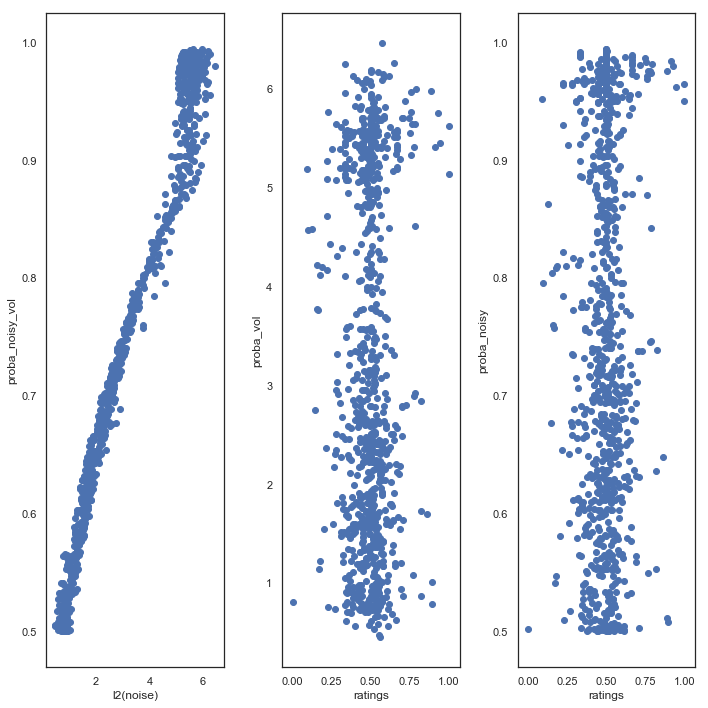

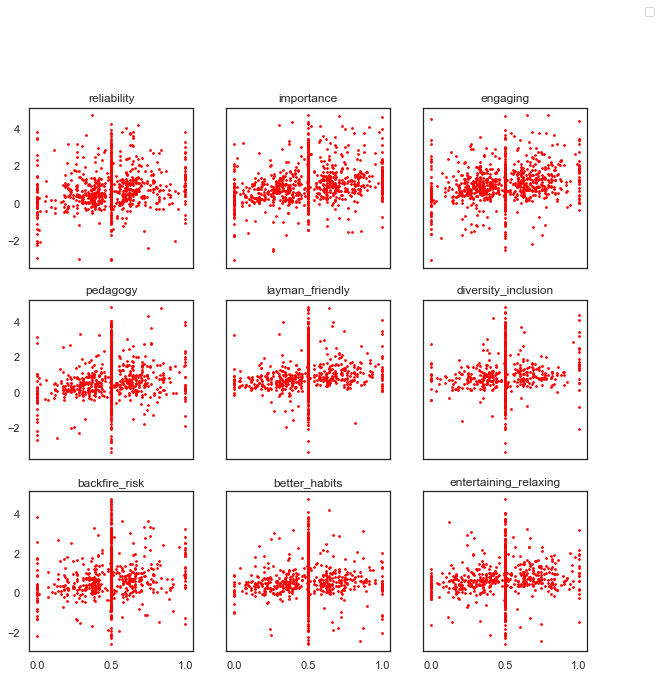

In [494]:
rating_columns = ["reliability", "importance", "engaging", "pedagogy", "layman_friendly", "diversity_inclusion", 
                  "backfire_risk", "better_habits", "entertaining_relaxing"]
def _real_plot_y_noise(res):
    y_data_arr = []
    quotient_arr = []
    prob_bradly = []
    r_scaled = []
    bradely_vol_proba = []
    vol = []
    weights = []

    tp, tn, fp, fn = 0, 0, 0, 0
    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[8]) > 0.5) or
            #(np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[4]]
            quotient_arr += [rr[10]]
            prob_bradly += [rr[7]]
            r_scaled += [rr[8]]
            bradely_vol_proba += [rr[9]]
            vol += [rr[10]]
            weights += [rr[3]]
    #print("pearson_corr: ", pearsonr(y_data_arr, quotient_arr)[0])
    #print("Spearman_corr: ", spearmanr(y_data_arr, quotient_arr)[0])
    #print(max(quotient_arr), min(quotient_arr))
    #plt.scatter(quotient_arr, y_data_arr, s=15)
    
    vol_arr_users, pref_arr_users = model_vol_pref("Adam_1650214381")
    
    r = [[], [], [], [], [], [], [], [], []]
    pref = [[], [], [], [], [], [], [], [], []]
    w = [[], [], [], [], [], [], [], [], []]


    assert len(r_scaled) == len(prob_bradly)
    rates = []
    prefs = []
    for i in range(len(r_scaled)):
        temp1 = []
        temp2 = []
        temp3 = []
        for j in range(len(r_scaled[i])):
            temp2 += [quotient_arr[i][j]]
            if r_scaled[i][j] != -1.:
                r[j] += [r_scaled[i][j]]
                w[j] += [weights[i][j]]
                pref[j] += [vol[i][j]]
                temp1 += [r_scaled[i][j]]
                temp3 += [weights[i][j]]
        rates += [np.mean(np.array(temp1))]  
        prefs += [np.linalg.norm(temp2)]
    
    rr =[]
    pp =[]
    ww =[]
    for (i,j,k) in  zip(r,pref,w):
        rr.append(np.array(i))
        pp.append(np.array(j))
        ww.append(np.array(k))
        
    fig1, axs1 = plt.subplots(1, 3, figsize=(10,10))
    axs1[0].scatter(prefs, prob_bradly)
    axs1[0].set(xlabel="l2(noise)", ylabel="proba_noisy_vol")
    axs1[1].scatter(rates, prefs)
    axs1[1].set(xlabel="ratings", ylabel="proba_vol")
    axs1[2].scatter(rates, prob_bradly)
    axs1[2].set(xlabel="ratings", ylabel="proba_noisy")
    fig1.tight_layout()

    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    axs[0, 0].scatter(rr[0], pp[0], s=3, c="red")    
    #axs[0, 0].scatter(users, pref_arr_users.T[0], s=3, c="blue")
    axs[0, 0].set_title(rating_columns[0])

    axs[0, 1].scatter( rr[1], pp[1], s=3, c="red")
    #axs[0, 1].scatter(users, pref_arr_users.T[1], s=3, c="blue")
    axs[0, 1].set_title(rating_columns[1])

    axs[0, 2].scatter(rr[2], pp[2], s=3, c="red")
    #axs[0, 2].scatter(users, pref_arr_users.T[2], s=3, c="blue")
    axs[0, 2].set_title(rating_columns[2])

    axs[1, 0].scatter(rr[3], pp[3], s=3, c="red")
    #axs[1, 0].scatter(users, pref_arr_users.T[3], s=3, c="blue")
    axs[1, 0].set_title(rating_columns[3])

    axs[1, 1].scatter(rr[4], pp[4], s=3, c="red")
    #axs[1, 1].scatter(users, pref_arr_users.T[4], s=3, c="blue")
    axs[1, 1].set_title(rating_columns[4])

    axs[1, 2].scatter(rr[5], pp[5], s=3, c="red")
    #axs[1, 2].scatter(users, pref_arr_users.T[5], s=3, c="blue")
    axs[1, 2].set_title(rating_columns[5])

    axs[2, 0].scatter(rr[6], pp[6], s=3, c="red")
    #axs[2, 0].scatter(users, pref_arr_users.T[6], s=3, c="blue")
    axs[2, 0].set_title(rating_columns[6])

    axs[2, 1].scatter(rr[7], pp[7], s=3, c="red")
    #axs[2, 1].scatter(users, pref_arr_users.T[7], s=3, c="blue")
    axs[2, 1].set_title(rating_columns[7])

    axs[2, 2].scatter(rr[8], pp[8], s=3, c="red")
    #axs[2, 2].scatter(users, pref_arr_users.T[8], s=3, c="blue")
    axs[2, 2].set_title(rating_columns[8])

    #fig.tight_layout()
    fig.legend("", loc='lower right', bbox_to_anchor=(1,1), ncol=2, bbox_transform=fig.transFigure)
    for ax in axs.flat:
        ax.set(xlabel="", ylabel="")

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        

    return rr, pp

rr, pp = _real_plot_y_noise(re_new)

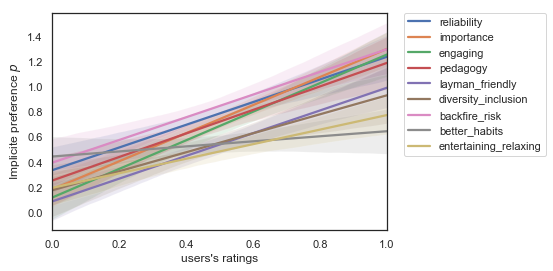

In [512]:
def ploot(idx):
    mydata = pd.DataFrame({"users's ratings": rr[idx].tolist(), "Implicite preference $p$":pp[idx].tolist()})
    sns.regplot(x="users's ratings", y="Implicite preference $p$", label="hhh", data=mydata, scatter=False)
    #sns.boxplot(x="users's ratings", y="Implicite preference $p$", data=mydata)
for i in range(9):
    ploot(i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=rating_columns)
plt.savefig("features.png", bbox_inches='tight')

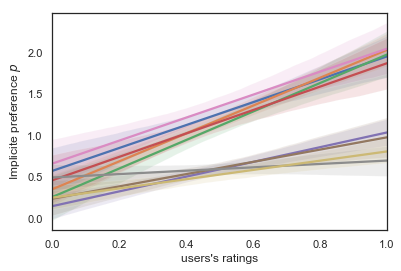

In [457]:
for i in range(9):
    ploot(i)

In [99]:
y_data = []
with open(f'tournesol_datasets6/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            y_data += [float(row["y_data"])]
y_data_arr = []
quotient_arr = []
for r in re6.values():
    for rr in r:
        y_data_arr += [rr[4]]
        quotient_arr += [rr[6]]
#quotient_arr = [1/n for n in quotient_arr]
print(len(y_data_arr)/sum(y_data_arr))
print(1 / (np.linalg.norm(mu6)**2))

228.022622069969
94.09334171106212


0 || 0.5000005490308803 || 11.400590431546615
0 || 0.5000007837065207 || 11.525630995586235
0 || 0.500000732039012 || 12.226875161970671
1 || 0.5000007254668605 || 11.564766063724601
2 || 0.5000007636342052 || 11.831149446067267
3 || 0.5000006879981996 || 11.132177086284347
3 || 0.5000005970945297 || 11.049063799122022
3 || 0.5000006467130552 || 11.455836865367033
3 || 0.5000007453938534 || 11.351238712066728
3 || 0.5000007298846091 || 11.432121203826156
3 || 0.5000007037317166 || 12.02928348655514
3 || 0.5000005638443915 || 12.077511716905416
3 || 0.5000007618340641 || 12.020451552546895
3 || 0.5000007616890695 || 11.670059805657658
4 || 0.5000007219925625 || 11.355710369214862
5 || 0.5000007847127215 || 11.678669698157151
5 || 0.5000007391645881 || 11.324297489358699
7 || 0.5000007128890427 || 11.933193191205515
8 || 0.5000006437079831 || 11.822125397269412
8 || 0.5000006982618641 || 11.089172399888712
8 || 0.500000773008094 || 12.043212644094986
9 || 0.5000006589978313 || 11.1619342

68 || 0.5000007596205722 || 11.789846879512261
69 || 0.5000008569160949 || 11.632022247908475
69 || 0.5000006404753892 || 10.922335673560642
69 || 0.5000007283740758 || 11.444497392070401
69 || 0.5000006810766203 || 12.001119941974405
69 || 0.5000005076726053 || 12.071920780935454
69 || 0.5000005516674348 || 11.157722902789592
70 || 0.5000005799545898 || 12.121137302363852
71 || 0.5000004501340098 || 11.556148684412744
72 || 0.5000007684080995 || 11.009388658771993
72 || 0.5000006234936396 || 11.732184665706471
72 || 0.500000613617108 || 11.53232740984367
72 || 0.5000005496943294 || 11.838699953372222
73 || 0.5000007418950854 || 11.896438918424105
73 || 0.5000007091797444 || 11.4800377528386
73 || 0.500000577502007 || 11.143214418694408
73 || 0.5000008595930073 || 11.589764646422882
74 || 0.5000008540406095 || 11.286828278935523
74 || 0.5000007696576543 || 11.629259547516813
74 || 0.5000006968903089 || 11.893117258907596
74 || 0.5000006676381693 || 12.248020619549791
74 || 0.5000006078

126 || 0.5000008007164635 || 11.686116082953042
126 || 0.5000006104739108 || 11.782839822097031
127 || 0.5000008284582426 || 11.601592979362099
127 || 0.5000006080743511 || 11.83759632452776
127 || 0.5000006114681768 || 11.605174057453805
127 || 0.500000908329678 || 11.668005999327688
127 || 0.5000007739436242 || 12.04739529693467
127 || 0.5000006641803487 || 11.556367237856428
127 || 0.5000005667698441 || 11.733362809264241
128 || 0.5000007449769787 || 11.58766325650023
128 || 0.5000006154542598 || 11.304049218130574
128 || 0.5000007853257074 || 11.278402098993599
128 || 0.500000665826048 || 11.890155987466823
128 || 0.5000007713097918 || 11.193455806515384
128 || 0.5000005009160887 || 11.713483623034389
128 || 0.500000687005827 || 11.66150562638997
128 || 0.5000006892274304 || 11.347390804234497
128 || 0.5000007006855357 || 11.548636711362748
128 || 0.5000005410195673 || 11.234521944880491
128 || 0.5000006151663386 || 11.789653555683886
128 || 0.500000721219144 || 11.799809540296076


153 || 0.5000007112977176 || 11.163508609832816
153 || 0.5000007852441103 || 11.434348861492852
153 || 0.5000006264448812 || 12.399578510157035
153 || 0.5000006947881579 || 11.83860252780565
153 || 0.5000007467073442 || 12.081458976978498
153 || 0.5000008805342893 || 11.741933706501506
153 || 0.50000081637135 || 11.540300246136063
153 || 0.5000006743488797 || 11.412415885024371
153 || 0.500000584758968 || 12.175619061396247
153 || 0.5000007122856132 || 11.191372524327157
153 || 0.5000005600176555 || 11.557892849344686
153 || 0.5000006712922567 || 11.089789309705807
153 || 0.5000006687024512 || 11.24419870321181
153 || 0.5000004752599359 || 11.697320755801337
153 || 0.5000006332612479 || 11.775351168403283
153 || 0.5000004404369595 || 12.274567674784093
153 || 0.5000006247544271 || 11.520143580843277
153 || 0.5000008238915188 || 11.18882601526778
153 || 0.5000006237296248 || 11.091964366059294
153 || 0.500000678303131 || 11.476204314295622
153 || 0.5000008455080399 || 11.679869149145942

163 || 0.5000007296316056 || 11.721978297183144
163 || 0.5000005739666348 || 11.207567804735012
163 || 0.5000006818222958 || 12.062643936161592
163 || 0.50000070941988 || 12.045823979864966
163 || 0.5000006663864094 || 11.993978548940824
163 || 0.5000006891341935 || 11.495534383850305
163 || 0.5000006427288546 || 11.642378702351177
163 || 0.5000006159080504 || 12.02305655282762
163 || 0.5000007032666932 || 11.29386303120018
163 || 0.5000005709004386 || 10.847697549671674
163 || 0.5000006506229867 || 11.775744998853687
163 || 0.500000742153245 || 11.068081108786034
163 || 0.5000006796684175 || 11.63974235185733
163 || 0.500000850413704 || 11.444127728347542
163 || 0.5000006479317523 || 11.782570814055449
163 || 0.5000006978198456 || 11.767111492687242
163 || 0.5000008145776591 || 11.70832871304719
163 || 0.5000006949844183 || 12.154242352462136
163 || 0.5000006399253506 || 11.293121272355554
163 || 0.5000006313440271 || 11.568555471791685
163 || 0.5000008214768393 || 12.014204344742184


181 || 0.5000006502755557 || 11.156260119157768
181 || 0.5000007366285512 || 12.045751965954077
181 || 0.5000005499301046 || 11.605507853900088
181 || 0.5000007378949012 || 11.521874243905707
181 || 0.5000007635467645 || 11.764528468941657
181 || 0.5000007365876514 || 11.360248358235602
181 || 0.5000007363099089 || 11.567910211114032
181 || 0.5000005657165867 || 10.788485580485478
181 || 0.5000006707609334 || 11.295985986330223
182 || 0.5000005379878848 || 11.89065736148057
182 || 0.5000007915703226 || 11.734934712923453
183 || 0.5000006212780215 || 11.377380506398035
185 || 0.5000007191332646 || 12.142940956684381
185 || 0.5000007435600986 || 11.708405382818322
186 || 0.5000006271958859 || 11.43313658621773
187 || 0.5000006920920911 || 11.951539937551544
189 || 0.5000005283482551 || 11.6345827257546
190 || 0.5000006356611599 || 11.763583156677745
190 || 0.5000006588695644 || 11.784787000119593
191 || 0.5000006140736162 || 12.068320328152328
191 || 0.5000006704572117 || 11.275432297332

262 || 0.5000006562665615 || 11.763584634390238
262 || 0.5000005575520099 || 11.755213983510334
262 || 0.5000006191937432 || 10.858057071790476
262 || 0.5000005440433825 || 11.461494836132873
262 || 0.5000006027379118 || 11.68841796769723
262 || 0.5000006376475933 || 11.81003625820274
262 || 0.5000007673350826 || 11.457279089254214
262 || 0.5000007823218432 || 11.204397737821083
262 || 0.500000732599077 || 11.94228421558658
262 || 0.5000006110085216 || 12.0440513531357
262 || 0.500000637254553 || 11.917753399965637
262 || 0.5000005777849906 || 12.211796982611324
262 || 0.5000006540268886 || 11.260206774520077
262 || 0.5000009233431296 || 11.9755997659005
262 || 0.500000943848864 || 11.818790323876376
262 || 0.500000745360477 || 11.809541464427591
262 || 0.5000005315212448 || 12.253632534553672
262 || 0.5000006737678179 || 12.230716679942843
262 || 0.5000006751708364 || 11.426545278062077
262 || 0.5000006070047274 || 11.279132696213832
262 || 0.5000006751951119 || 11.372918980491285
262

270 || 0.5000008270726464 || 11.74335106657152
270 || 0.500000693940098 || 11.95473894182708
270 || 0.5000005286722411 || 11.602812787596141
270 || 0.5000004968781485 || 11.075257158369013
270 || 0.5000008824674326 || 11.570700912622751
270 || 0.500000600348836 || 12.114544876239497
270 || 0.5000005748291635 || 11.59407307743372
270 || 0.5000007027835436 || 11.568514083547011
270 || 0.5000006591409253 || 11.476961912710138
270 || 0.5000005238033788 || 11.353062356697466
270 || 0.5000007024524333 || 11.907409663029295
270 || 0.50000075291838 || 12.09460923899451
270 || 0.5000007074118222 || 11.70465753728127
270 || 0.5000006245352394 || 11.746098034055832
270 || 0.5000008612283086 || 11.366654515113314
272 || 0.5000007399297041 || 11.328331763455797
272 || 0.5000005812215442 || 11.406814887642797
273 || 0.5000005742284204 || 11.66878512250452
273 || 0.5000007181962953 || 11.426193340005392
273 || 0.5000006829509386 || 11.803019799947478
273 || 0.5000005967322547 || 12.004993485354383
27

336 || 0.500000537931157 || 11.346763076072856
336 || 0.5000006766869006 || 11.81981027111177
336 || 0.50000056785735 || 11.27425288486164
337 || 0.5000006335964835 || 11.678046320122139
338 || 0.5000007059402486 || 11.832032393839974
339 || 0.5000006540720383 || 11.958603695314036
340 || 0.5000006004045643 || 11.390313661754336
341 || 0.5000006073380809 || 11.784782224588536
341 || 0.5000008802108373 || 11.824003391732363
341 || 0.5000006603546855 || 11.283235936966918
341 || 0.5000005403825507 || 12.152113881922682
342 || 0.5000006619187924 || 11.322253536828397
343 || 0.5000007366374156 || 11.565177596002066
344 || 0.5000007133940059 || 11.230351387042209
344 || 0.5000006709901881 || 11.670935249340273
344 || 0.5000006722018228 || 11.684746918192324
345 || 0.5000006199898576 || 11.507597647968016
347 || 0.5000006510889389 || 12.066897159278016
347 || 0.5000006548981373 || 11.806285054952273
347 || 0.500000622116565 || 10.989407869411892
348 || 0.500000600730012 || 11.388611978131728

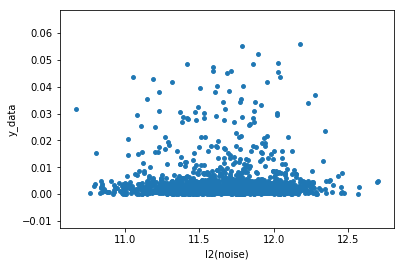

In [161]:
res4, mu4 = result_real_data("tournesol_datasets4") # dir4
plot_y_noise(res4) # 

(-0.01581603211345019, 0.7242427807552905)


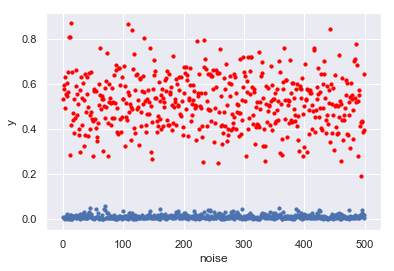

In [240]:
experiment_name = "Adam_1645025812"
y_data = []
pref = 0
# recover data from test_file
with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
    csv_reader = csv.DictReader(csv_data)
    for row in csv_reader:
        y_data += [float(row["y_data"])]

# recover result data from results_name.txt file

with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
    count = 0
    vol_arr_users= []
    for line in text_data:
        if count == 0:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
            mu = temp.astype(np.float)
        if count == 1:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
            cv = temp.astype(np.float)
        if count >= 5 and pref == 0:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
            temp = temp.astype(np.float)
            vol_arr_users += [temp]
        if count >= 5 and pref == 1:
            temp = line.strip().split(':')
            temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
            temp = temp.astype(np.float)
            vol_arr_users += [temp]
        count += 1
cv = cv * np.eye(len(mu))
y = []
for i in range(0, len(y_data), 9):
    y += [y_data[i] / np.sqrt(np.sum(np.array(y_data) ** 2))]

noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=500)
noises = [np.linalg.norm(n) / 9 for n in noises]
from scipy import stats
print(stats.pearsonr(y, noises))
plt.scatter(np.arange(500), y, s=10)
plt.scatter(np.arange(500), noises, c='red', s=10)

plt.xlabel("noise")
plt.ylabel("y")
plt.show()

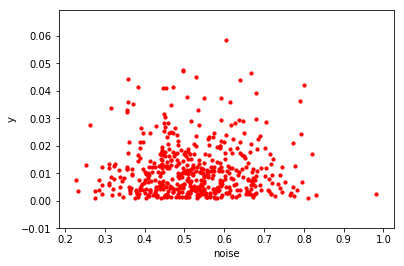

In [72]:
plt.scatter(noises, y, c='red', s=10)

plt.xlabel("noise")
plt.ylabel("y")
plt.show()

In [138]:
def v4_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)

    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    y_arr = []
    noises_arr = []
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2 = rescale_rating(r2)
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria) ] 
        vol = int(test_vol_dic[i][3])
        print(vol, "    ", test_vol_dic[i])
        y_data = test_vol_dic[i][4]
        normalized_y_data = y_data / 1000000 #np.sqrt(np.sum(np.array(test_vol_dic)[:,4] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-np.matmul(user_pref[i], np.array(weight) * r2))) for i in range(len(user_pref))]
        y = [sc.stats.expon.pdf(normalized_y_data, scale=1 / np.linalg.norm(noises[i])) for i in range(len(noises))]
        #proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        #assert len(bradely) == len(y) == len(proba_noises)
        dens = [sc.special.expit(bradely[i] * y[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        y_arr += [normalized_y_data]
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / nb_criteria 
        noises_arr += [quotient]

        #if bradely[max_index] > 0.5:
        vol_positif = 0

        print(quotient)
        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index] >= 0.5:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            
            if vol == 1:
                nb_vol_gt += 1
        #print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index]} || {vol} || {vol_positif} ")
        
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    print("ttp=",ttp,"tfp=",tfp,"tfn=",tfn,"ttn=",ttn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    
    print(precision, recall, accuracy)
    print(tprecision, trecall, taccuracy)
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy), y_arr, noises_arr

In [144]:
# Adam_1641986778 \ crit 1
a1, b1, y_arr1, n_arr1 = v4_prepare_data_from_files('Adam_1650375122', 0.5)
print(a1, b1)

1      [0, 0.23826037678398304, 0.0, 1.0, 1598638.7015231303]
0.34435774321042406
0 || 0.5304712796837205 || 1 || 1 
0      [0, 91.24523733969944, 0.1, 0.0, 525142.6063254657]
1.1550827500029073
0 || 0.6214743821359549 || 0 || 0 
0      [0, 82.88494625698853, 0.0, 0.0, 904325.6322108423]
0.7169124996900454
0 || 0.5648251520122406 || 0 || 0 
0      [0, 11.189184828842947, 1.0, 0.0, 166673.37139149345]
1.8745509708985517
0 || 0.869801683372662 || 0 || 0 
1      [0, 84.26576391425324, 0.5, 1.0, 716474.1842080951]
0.8288559642261332
0 || 0.5799604059482131 || 1 || 0 
0      [1, 39.60839680963225, 0.0, 0.0, 631961.6151493213]
0.9318427022681031
1 || 0.5827622148466386 || 0 || 0 
1      [1, 73.51635430400052, 1.0, 1.0, 317996.4290096688]
1.3419905737147575
1 || 0.709099595724152 || 1 || 0 
1      [1, 6.00880871720485, 0.1, 1.0, 1476726.5502853384]
0.35570132904893836
1 || 0.5320893108599085 || 1 || 1 
0      [1, 30.44692629032267, 1.0, 0.0, 1535407.523073737]
0.36816430237270426
1 || 0.53440

14 || 0.5780886790239963 || 1 || 0 
0      [14, 19.87087934754412, 1.0, 0.0, 68319.22667334252]
1.9322246386610684
14 || 0.9351899344793522 || 0 || 0 
0      [14, 27.081794952749522, 0.1, 0.0, 184447.99091829883]
1.587046460574983
14 || 0.7751353047563829 || 0 || 0 
0      [15, 81.53334779848143, 0.0, 0.0, 222074.7499279949]
1.826915490340446
15 || 0.8259260384951052 || 0 || 0 
0      [15, 71.39720325177703, 0.0, 0.0, 174176.07135472982]
1.6034121368115504
15 || 0.7635713520870319 || 0 || 0 
0      [15, 39.5594241981578, 0.0, 0.0, 220698.14142756636]
1.9615353714947459
15 || 0.8298491260703873 || 0 || 0 
0      [15, 85.54095116514608, 0.0, 0.0, 1326890.3676521766]
0.37694040499694753
15 || 0.534600770307467 || 0 || 0 
0      [15, 1.5020201782813603, 0.0, 0.0, 142217.8296247641]
2.0423613813474484
15 || 0.7501994118093035 || 0 || 0 
0      [16, 75.23481824426328, 0.5, 0.0, 1173160.4563929522]
0.4494681719819323
16 || 0.5434461993308509 || 0 || 0 
0      [16, 15.96584492440109, 0.1, 0.0,

0.6479459822398512
28 || 0.5594833348212562 || 1 || 0 
0      [29, 39.560895804841685, 1.0, 0.0, 348637.61989087425]
1.572591828398928
29 || 0.6663222586692328 || 0 || 0 
0      [29, 66.421252043008, 0.5, 0.0, 193702.20624783044]
1.7258436012496194
29 || 0.7507490016400362 || 0 || 0 
0      [29, 88.99618953634523, 0.0, 0.0, 453834.9672136066]
1.2950328874435288
29 || 0.6757773069023448 || 0 || 0 
0      [29, 32.654177961249665, 0.5, 0.0, 901701.6606246545]
0.6240648394455047
29 || 0.5561867830622733 || 0 || 0 
0      [29, 26.981422327148845, 0.0, 0.0, 266554.3037840704]
1.9158262724071946
29 || 0.6659468520437559 || 0 || 0 
0      [30, 65.13526131245135, 0.0, 0.0, 369759.0263154993]
1.3477221511252306
30 || 0.6218611998169753 || 0 || 0 
0      [30, 14.370909672355452, 0.1, 0.0, 106580.96070700884]
1.750610580092951
30 || 0.7887350441195612 || 0 || 0 
1      [30, 1.2125421842948514, 1.0, 1.0, 497069.8943937094]
1.227893729284303
30 || 0.6601270488003051 || 1 || 0 
0      [30, 84.0328953

0.4351151642500094
43 || 0.5393941023622165 || 0 || 0 
0      [43, 21.88371710985893, 0.1, 0.0, 2513804.272608311]
0.20760645093510852
43 || 0.5187574193647922 || 0 || 0 
0      [43, 2.116720623519658, 0.0, 0.0, 920661.2450794762]
0.5534498997992573
43 || 0.5512852802877455 || 0 || 0 
0      [43, 75.52268911031285, 0.5, 0.0, 1433619.4093390328]
0.41532201550196973
43 || 0.5400429946296509 || 0 || 0 
0      [43, 52.22049709180321, 0.0, 0.0, 536614.6372872328]
1.2054317049355618
43 || 0.6269735292940042 || 0 || 0 
1      [44, 26.00432566142745, 0.0, 1.0, 588706.1826230823]
0.8494181908536931
44 || 0.5774825323651682 || 1 || 0 
0      [44, 20.860836342068918, 0.1, 0.0, 151748.12175091793]
1.70777748165395
44 || 0.7589066595581301 || 0 || 0 
0      [44, 2.8223246574336613, 1.0, 0.0, 570233.0421604061]
1.0670966876747578
44 || 0.6364234354682468 || 0 || 0 
0      [44, 11.985308147993795, 0.5, 0.0, 863447.0532336528]
0.7209772413603666
44 || 0.566426546381798 || 0 || 0 
0      [44, 25.886814

1.2761387735386776
57 || 0.63376627107852 || 0 || 0 
0      [57, 52.23301801125528, 1.0, 0.0, 263486.15386307123]
1.9776066098902514
57 || 0.7667007771001174 || 0 || 0 
0      [57, 53.10964174728143, 0.5, 0.0, 139648.48298026843]
1.9347658361715558
57 || 0.7612911016027747 || 0 || 0 
1      [57, 79.1947830137922, 0.0, 1.0, 1113200.2891242746]
0.45324018725816195
57 || 0.5419940799309417 || 1 || 1 
0      [58, 77.0855387227244, 0.5, 0.0, 1253761.649658056]
0.4705254866510139
58 || 0.5409201704475645 || 0 || 0 
0      [58, 59.936390810748684, 1.0, 0.0, 1784352.8966533402]
0.32295423343765384
58 || 0.5296751506542748 || 0 || 0 
0      [58, 1.2235773533179117, 1.0, 0.0, 235350.32532000338]
1.8594933215035074
58 || 0.8183165955490128 || 0 || 0 
0      [58, 94.66223729512694, 0.1, 0.0, 112774.08235369448]
1.864269587429792
58 || 0.8898091550865431 || 0 || 0 
0      [58, 89.6207103376234, 0.0, 0.0, 1000726.7680756409]
0.6225402313646946
58 || 0.5629754839050605 || 0 || 0 
1      [59, 82.06387

2.012518442419126
71 || 0.8865546366974777 || 0 || 0 
1      [71, 81.36132129259364, 0.5, 1.0, 1795054.7641281085]
0.3379440765349316
71 || 0.5307133761534922 || 1 || 1 
1      [71, 62.19075911225762, 0.1, 1.0, 475605.182600259]
1.0771535654640692
71 || 0.5979244117212579 || 1 || 0 
1      [72, 76.81898610223435, 0.0, 1.0, 1828635.6518115825]
0.2919029882748226
72 || 0.5258244193518015 || 1 || 1 
0      [72, 15.326232141928282, 0.5, 0.0, 1005205.5815382791]
0.5823097689163016
72 || 0.5548801295870867 || 0 || 0 
0      [72, 19.370000708156788, 1.0, 0.0, 399490.68820417405]
1.4758119551522735
72 || 0.6853530030633712 || 0 || 0 
0      [72, 23.663097531221172, 0.1, 0.0, 659432.6854136223]
0.9713481230197499
72 || 0.5991189161273026 || 0 || 0 
0      [72, 58.33657090315049, 1.0, 0.0, 168308.34701557714]
1.7167351033210414
72 || 0.7726440397181182 || 0 || 0 
0      [73, 61.53675028552183, 0.0, 0.0, 237769.85260638685]
1.8229070960769664
73 || 0.6826783679939294 || 0 || 0 
0      [73, 45.054

1.9063029522068908
85 || 0.7454793658466738 || 0 || 0 
0      [86, 83.79195290925227, 1.0, 0.0, 1098979.2454090277]
0.5805867328194809
86 || 0.5572401038984992 || 0 || 0 
1      [86, 96.67783265781435, 0.0, 1.0, 588895.2313115507]
0.9412038825081426
86 || 0.5840883136828162 || 1 || 0 
0      [86, 18.94457212677178, 0.1, 0.0, 386781.82644631737]
1.4363037065242201
86 || 0.6257767082575072 || 0 || 0 
0      [86, 24.576678708957385, 1.0, 0.0, 323992.8964026504]
1.74638496384492
86 || 0.7375331649638169 || 0 || 0 
1      [86, 30.99762905028915, 0.5, 1.0, 540511.34046842]
1.0935779893809665
86 || 0.6004579736406311 || 1 || 0 
0      [87, 36.644967067900126, 0.0, 0.0, 63654.612789534825]
1.8579974085292361
87 || 0.8216985658272441 || 0 || 0 
1      [87, 7.340615438585557, 0.1, 1.0, 837661.201689189]
0.6600670774124927
87 || 0.5601942577761655 || 1 || 0 
0      [87, 2.7865323606879153, 0.5, 0.0, 737312.759932138]
0.8608791879001472
87 || 0.5875816482315803 || 0 || 0 
0      [87, 47.9890118974

1.6322052585964688
100 || 0.7880127972833991 || 0 || 0 
0      [100, 1.9883058661773534, 1.0, 0.0, 182283.8430988891]
1.8418041285241784
100 || 0.8616866841523186 || 0 || 0 
0      [100, 68.35399423760272, 0.1, 0.0, 993670.1012571201]
0.5016756688537785
100 || 0.5469860498633448 || 0 || 0 
0      [100, 33.80861062346189, 0.0, 0.0, 774614.6746587752]
0.6460659155483574
100 || 0.5590874985368324 || 0 || 0 
0      [101, 16.08250651805885, 0.1, 0.0, 1913664.3904244513]
0.26752398698091556
101 || 0.5247648950665117 || 0 || 0 
0      [101, 98.86769724154432, 0.5, 0.0, 2126191.2464526827]
0.2569435014488006
101 || 0.5241950785171829 || 0 || 0 
0      [101, 57.33317866031844, 1.0, 0.0, 76452.34304176676]
1.5931642690104133
101 || 0.8972538502472208 || 0 || 0 
0      [101, 78.39155211415887, 0.0, 0.0, 156866.8236304564]
1.9959598713506996
101 || 0.7492309495497015 || 0 || 0 
0      [101, 30.120838005142776, 0.1, 0.0, 1245335.754405638]
0.40894597235920355
101 || 0.5378372781119684 || 0 || 0 
0 

0.585608801815601
114 || 0.5551599192172784 || 0 || 0 
0      [114, 6.29656558942453, 0.1, 0.0, 224593.69632966453]
1.8543945551872607
114 || 0.7507107496518611 || 0 || 0 
1      [114, 22.442881026242055, 0.1, 1.0, 967670.0350335586]
0.6563193754747414
114 || 0.5658870118049584 || 1 || 0 
0      [114, 57.71954899383196, 0.0, 0.0, 972489.2911779274]
0.5655974175545726
114 || 0.5512060904352409 || 0 || 0 
0      [115, 79.02121937099108, 0.1, 0.0, 209413.7075280213]
1.6141066754488438
115 || 0.7716815939634311 || 0 || 0 
0      [115, 48.694917270642705, 0.5, 0.0, 300553.6309914669]
1.7924962142575949
115 || 0.7544634349248545 || 0 || 0 
0      [115, 44.16223481343785, 0.0, 0.0, 760308.6961319221]
0.6960588472677011
115 || 0.5640451957481866 || 0 || 0 
0      [115, 40.32096224204989, 0.0, 0.0, 503832.35729358514]
0.9926034021073115
115 || 0.5902698879436904 || 0 || 0 
0      [115, 28.654095258321355, 0.1, 0.0, 2930754.019940833]
0.17327969773753776
115 || 0.5157915405832755 || 0 || 0 
0   

0.5099698659450181
128 || 0.5488868380488694 || 0 || 0 
0      [128, 78.33198254984052, 0.5, 0.0, 250065.60030295813]
1.6090261292496635
128 || 0.7749351813978796 || 0 || 0 
0      [128, 89.49712640939856, 0.1, 0.0, 352374.4107975971]
1.4618878501989374
128 || 0.6671081992670836 || 0 || 0 
1      [128, 95.73303570693618, 0.0, 1.0, 983292.2130560987]
0.5149820453269492
128 || 0.5469383980792211 || 1 || 0 
0      [129, 57.53189553625695, 0.5, 0.0, 350672.2360807531]
1.7822903960630003
129 || 0.7288139167187059 || 0 || 0 
0      [129, 85.56003757335193, 0.0, 0.0, 70053.66346378461]
1.8466965543449634
129 || 0.834890735349207 || 0 || 0 
0      [129, 69.40365365580008, 0.0, 0.0, 353927.43978523597]
1.3682510450149936
129 || 0.6383516847424436 || 0 || 0 
0      [129, 22.048669174497604, 0.0, 0.0, 97007.82756631385]
1.63347188807715
129 || 0.8565088425038191 || 0 || 0 
0      [129, 36.96184992635957, 0.5, 0.0, 138366.1083940202]
1.5482506539862226
129 || 0.7699274640811754 || 0 || 0 
0      [

0.16366597321306228
142 || 0.5146127189570409 || 0 || 0 
1      [142, 52.94843822507544, 1.0, 1.0, 876531.1402563107]
0.7002320590349801
142 || 0.565686344850785 || 1 || 0 
0      [142, 99.98524605274756, 1.0, 0.0, 1593698.9616551346]
0.38301164787477626
142 || 0.5383546684380612 || 0 || 0 
0      [142, 23.930499859485586, 0.5, 0.0, 321133.47770750895]
1.6050063696126693
142 || 0.6883626870162601 || 0 || 0 
0      [143, 40.742228097709564, 0.0, 0.0, 166976.8211546762]
1.5725858198339082
143 || 0.7502356365539653 || 0 || 0 
1      [143, 52.21704905939677, 0.0, 1.0, 544786.4421118874]
1.1773785427077024
143 || 0.6205216458523741 || 1 || 0 
0      [143, 37.803129584477034, 0.1, 0.0, 312826.8516175861]
1.5621597678136014
143 || 0.6694205103024412 || 0 || 0 
0      [143, 14.050938757750625, 1.0, 0.0, 1151802.5922450055]
0.5684295870252726
143 || 0.5592244189967701 || 0 || 0 
1      [143, 75.33776515037982, 0.0, 1.0, 563504.6231626796]
0.9914602842830046
143 || 0.5878265260831906 || 1 || 0 


1.4469198125288598
156 || 0.6567416681858804 || 0 || 0 
0      [156, 97.85256629887967, 0.1, 0.0, 118598.97513426209]
1.8411770294269598
156 || 0.8697312894828451 || 0 || 0 
0      [156, 40.68639146963227, 0.1, 0.0, 1479598.0118529135]
0.34521113468110576
156 || 0.5312530624841868 || 0 || 0 
0      [156, 48.60771922258481, 0.1, 0.0, 999274.1889856354]
0.613918935234222
156 || 0.5594610550456843 || 0 || 0 
0      [157, 93.13649666463762, 0.0, 0.0, 190336.24616644997]
1.789423137899075
157 || 0.7381963011582785 || 0 || 0 
0      [157, 82.23287168059754, 0.0, 0.0, 360827.8388873391]
1.38828112858185
157 || 0.6247526822756031 || 0 || 0 
1      [157, 69.94109085530542, 1.0, 1.0, 351584.28116291267]
1.8808195834858135
157 || 0.6916543704242549 || 1 || 0 
0      [157, 41.04335417582693, 0.5, 0.0, 323520.328012884]
2.0383841453710465
157 || 0.7026649807382085 || 0 || 0 
0      [157, 84.29732326225918, 0.1, 0.0, 1065749.3703445094]
0.4824345006604321
157 || 0.5444429420362477 || 0 || 0 
0      

1.858199476921038
170 || 0.8035390524531929 || 0 || 0 
0      [170, 71.94848834581926, 0.5, 0.0, 348176.8932366664]
1.547286546936306
170 || 0.6676395235726207 || 0 || 0 
0      [170, 78.90616581504399, 0.1, 0.0, 388827.8466224245]
1.431997651610223
170 || 0.6287076836333304 || 0 || 0 
1      [170, 21.128586387299205, 1.0, 1.0, 176133.86729582108]
1.5093360230632604
170 || 0.8190273624358206 || 1 || 0 
0      [171, 19.835037028319707, 1.0, 0.0, 114009.69686303678]
1.7182213546834344
171 || 0.8961588758886742 || 0 || 0 
0      [171, 66.67288849943094, 0.0, 0.0, 783282.2995724723]
0.6388954741233287
171 || 0.5584396557076018 || 0 || 0 
0      [171, 27.761637456705074, 0.5, 0.0, 191116.05452816596]
1.6613897539970204
171 || 0.7670307976153197 || 0 || 0 
0      [171, 89.84449758207931, 1.0, 0.0, 170577.8359425306]
1.85399551090827
171 || 0.8669135422622682 || 0 || 0 
0      [171, 82.08617494034314, 1.0, 0.0, 107741.02805277443]
1.8828773817763795
171 || 0.9091881887833432 || 0 || 0 
1     

2.2195572718343786
184 || 0.8039652670775322 || 0 || 0 
0      [184, 87.45507812932595, 0.5, 0.0, 309035.1703106871]
1.6060929341438694
184 || 0.7165607363165514 || 0 || 0 
1      [184, 89.64626338830698, 0.1, 1.0, 414829.6966397695]
1.4293370402459524
184 || 0.6591133435625494 || 1 || 0 
0      [185, 12.490536307253175, 0.5, 0.0, 2074003.4055082456]
0.273107225860568
185 || 0.5241913909907769 || 0 || 0 
0      [185, 7.234185195017561, 0.1, 0.0, 175273.5031053153]
1.8381730401162897
185 || 0.846561632765445 || 0 || 0 
1      [185, 16.915491150321078, 1.0, 1.0, 503335.66917192575]
1.3189005278115464
185 || 0.6475128630511982 || 1 || 0 
0      [185, 43.46153758141661, 0.5, 0.0, 500344.31105245097]
1.221744754357166
185 || 0.6512390030300351 || 0 || 0 
0      [185, 34.79039969990711, 0.0, 0.0, 776464.201245302]
0.653525845574431
185 || 0.5598878709080667 || 0 || 0 
0      [186, 44.40781575863434, 0.1, 0.0, 284174.41547691775]
1.64946410992592
186 || 0.6587221701938112 || 0 || 0 
0      [1

1.8056339109763657
198 || 0.7386448725133602 || 0 || 0 
1      [198, 26.33081492704689, 0.5, 1.0, 2174086.8350506546]
0.2645106183253689
198 || 0.5237174608464795 || 1 || 1 
0      [198, 49.800287490593156, 1.0, 0.0, 65754.26478478656]
2.1455416561547436
198 || 0.9057236301862285 || 0 || 0 
0      [199, 96.19255016171475, 0.5, 0.0, 914196.994092017]
0.6670154278069522
199 || 0.5635964661082151 || 0 || 0 
0      [199, 16.808214148061147, 0.0, 0.0, 362569.39419072267]
1.666472965137161
199 || 0.6625965925826537 || 0 || 0 
0      [199, 64.97411591426419, 0.0, 0.0, 649909.1042987889]
0.7786706097934998
199 || 0.5711369213347745 || 0 || 0 
0      [199, 28.860999532308096, 0.0, 0.0, 383290.03344407823]
1.3056280557755078
199 || 0.6177234995917007 || 0 || 0 
0      [199, 16.105339077007063, 0.1, 0.0, 1255428.3592994765]
0.4430906135308747
199 || 0.5411133770963027 || 0 || 0 
0      [200, 74.73009939570174, 1.0, 0.0, 575174.0851287637]
1.1123403584321914
200 || 0.6287436814601397 || 0 || 0 
0 

1.384322988961369
212 || 0.6591712039455776 || 1 || 0 
1      [212, 43.639029002746305, 0.1, 1.0, 251085.13445485104]
2.0491266902220806
212 || 0.7576092545938045 || 1 || 0 
0      [212, 19.43684168258314, 0.1, 0.0, 1362779.0940604757]
0.377943092018155
212 || 0.5344492781264275 || 0 || 0 
1      [213, 32.02643263283006, 0.0, 1.0, 420552.98623993294]
1.5147761314342099
213 || 0.6638429462973567 || 1 || 0 
0      [213, 72.36606763038611, 0.0, 0.0, 906444.8809938187]
0.5766454941591579
213 || 0.5534612328103152 || 0 || 0 
0      [213, 48.602479810421556, 0.1, 0.0, 917276.8949101839]
0.6184091864832657
213 || 0.5546309410936044 || 0 || 0 
0      [213, 66.15753177990315, 0.1, 0.0, 120644.07105160477]
1.6933917294134113
213 || 0.7879111009611153 || 0 || 0 
1      [213, 65.03693761668757, 1.0, 1.0, 268859.8599949053]
1.6340271446620496
213 || 0.7493091630595108 || 1 || 0 
0      [214, 60.299350865838754, 0.1, 0.0, 792136.9589067519]
0.6500639864397533
214 || 0.5585289022950796 || 0 || 0 
0  

0.6196862158650615
226 || 0.5593144222144668 || 1 || 0 
0      [226, 44.90776224593203, 0.0, 0.0, 1082849.8122961656]
0.49027773871890123
226 || 0.5441521930663992 || 0 || 0 
0      [226, 91.97023050375083, 0.0, 0.0, 140953.20201068476]
1.6416553574236294
226 || 0.8464414144388995 || 0 || 0 
0      [227, 28.20192379352202, 1.0, 0.0, 75193.35534153384]
1.548525383499068
227 || 0.8743121841761129 || 0 || 0 
1      [227, 46.225256538033506, 0.5, 1.0, 482560.0630093031]
1.2471581584632887
227 || 0.6058749396129262 || 1 || 0 
0      [227, 26.387372384597242, 1.0, 0.0, 195379.31181032627]
1.6282867480838676
227 || 0.8047056190983415 || 0 || 0 
0      [227, 82.44074565848338, 1.0, 0.0, 425239.30020205444]
1.4705715413769056
227 || 0.6748462821564983 || 0 || 0 
0      [227, 65.11054198596537, 1.0, 0.0, 832126.5820770412]
0.6886042506348108
227 || 0.5655713619439875 || 0 || 0 
0      [228, 7.156472875374398, 0.0, 0.0, 2034324.9794160735]
0.24570551230584453
228 || 0.5225891266774393 || 0 || 0 


0.32935121096405773
240 || 0.5285334759085909 || 0 || 0 
0      [240, 84.8923221307577, 1.0, 0.0, 362551.54234601074]
1.5538270385965531
240 || 0.7117169530826292 || 0 || 0 
0      [240, 78.12615130611131, 0.1, 0.0, 104728.6122948586]
1.8626454874543197
240 || 0.7944976787671926 || 0 || 0 
0      [241, 89.40915309195653, 0.5, 0.0, 644507.5576773178]
0.992509124891865
241 || 0.6044206233503591 || 0 || 0 
0      [241, 88.05822337471088, 1.0, 0.0, 426568.85880952596]
1.321751375191975
241 || 0.6869894280451828 || 0 || 0 
0      [241, 59.586233072848835, 0.0, 0.0, 202799.5176080257]
1.9753744386221836
241 || 0.8410717630388304 || 0 || 0 
0      [241, 43.798158827319554, 0.0, 0.0, 223752.69590742158]
1.7955353707222852
241 || 0.7129691378957123 || 0 || 0 
1      [241, 28.113713821391507, 1.0, 1.0, 265114.2777370664]
2.091014473002893
241 || 0.7865607655050645 || 1 || 0 
1      [242, 16.332933395391464, 0.5, 1.0, 750615.8080768014]
0.7783322514874573
242 || 0.5753537623432432 || 1 || 0 
0   

1.8254310705499535
254 || 0.8388129363457784 || 0 || 0 
0      [254, 48.127110700989924, 0.1, 0.0, 706691.7780814038]
0.8038693203754399
254 || 0.574315527286476 || 0 || 0 
0      [254, 10.594712931994488, 1.0, 0.0, 337367.6408274585]
1.494615605573932
254 || 0.7290923387387339 || 0 || 0 
1      [255, 21.243159090918134, 1.0, 1.0, 850704.8943875063]
0.7549772042426444
255 || 0.5731205462339778 || 1 || 0 
0      [255, 54.786492606826776, 0.5, 0.0, 448196.1445535566]
1.3305726906736512
255 || 0.6279284102886072 || 0 || 0 
0      [255, 39.14804720138235, 0.1, 0.0, 194188.6407020109]
2.0247654720859147
255 || 0.7437529339470936 || 0 || 0 
1      [255, 4.419264102708653, 0.1, 1.0, 1158865.43575289]
0.46108359658962056
255 || 0.5414462287855137 || 1 || 1 
1      [255, 73.13017185917504, 0.0, 1.0, 502604.9589417589]
1.2295407470560051
255 || 0.6198206676665605 || 1 || 0 
0      [256, 21.468061601031234, 0.0, 0.0, 2808417.297763987]
0.17908461544402138
256 || 0.5166355406876828 || 0 || 0 
0   

1.9164157584260701
268 || 0.7389036903893433 || 0 || 0 
0      [268, 67.25381425036117, 1.0, 0.0, 177354.96440189396]
1.68411732342016
268 || 0.8050980915099515 || 0 || 0 
0      [268, 42.28663128787787, 0.5, 0.0, 595304.9106190604]
1.0133616982341183
268 || 0.5989422312556799 || 0 || 0 
0      [269, 20.49871123024235, 0.1, 0.0, 322621.23368922906]
1.8541473125194226
269 || 0.7440453208251722 || 0 || 0 
0      [269, 14.115638084534176, 0.1, 0.0, 445569.8880036519]
1.18824406412163
269 || 0.6099702384828115 || 0 || 0 
0      [269, 74.20284571131671, 1.0, 0.0, 536425.846139783]
1.1510720650596595
269 || 0.6479976212425185 || 0 || 0 
0      [269, 69.5424534750692, 0.0, 0.0, 572086.8354675748]
0.9372695804408822
269 || 0.5857550267650085 || 0 || 0 
0      [269, 50.774357282895636, 0.0, 0.0, 834687.95104546]
0.5991678186607576
269 || 0.5548704843918184 || 0 || 0 
1      [270, 33.45268970089895, 0.1, 1.0, 121828.34893335449]
1.5752717347361072
270 || 0.8048549800124152 || 1 || 0 
0      [270

1.5227674079415574
282 || 0.8677115696496085 || 0 || 0 
0      [282, 69.13521899920885, 0.0, 0.0, 155992.08565877314]
1.9445988663766156
282 || 0.7427113582905065 || 0 || 0 
0      [282, 93.04944641528256, 0.5, 0.0, 76421.49673921]
1.8731489914319028
282 || 0.9372384019199831 || 0 || 0 
0      [283, 97.54468723059459, 0.5, 0.0, 866065.7675802759]
0.6929697950350343
283 || 0.5691665665178911 || 0 || 0 
0      [283, 51.8128811205415, 0.0, 0.0, 255142.1727373818]
1.9143535884533944
283 || 0.7533839499642657 || 0 || 0 
1      [283, 9.943554919723852, 0.5, 1.0, 828381.8215394979]
0.7447060492232043
283 || 0.5744864591072871 || 1 || 0 
0      [283, 72.52157530113152, 1.0, 0.0, 932677.1868080915]
0.7059292472027252
283 || 0.5746862081904317 || 0 || 0 
0      [283, 32.811250753148336, 0.1, 0.0, 197109.6107198696]
1.8673495377151317
283 || 0.7391052746625458 || 0 || 0 
0      [284, 59.56157691052214, 0.1, 0.0, 2409636.692465808]
0.20161628297906464
284 || 0.5191401867251021 || 0 || 0 
0      [2

1.3481779485183538
296 || 0.6214569060150765 || 0 || 0 
1      [296, 31.489034645355275, 0.1, 1.0, 683911.3893740419]
0.767067549507691
296 || 0.5686213928080289 || 1 || 0 
0      [296, 66.7082441306754, 0.5, 0.0, 313927.99536471703]
1.7701644983733757
296 || 0.7033719198796742 || 0 || 0 
0      [297, 62.56478990013363, 0.0, 0.0, 82793.58949638566]
1.8006937844939286
297 || 0.8019103524714346 || 0 || 0 
1      [297, 56.37888038059054, 0.5, 1.0, 633374.2627171387]
0.8288111491055293
297 || 0.575760629324239 || 1 || 0 
1      [297, 90.65391931625713, 0.5, 1.0, 180656.9936861017]
2.0256709598168468
297 || 0.825736184632894 || 1 || 0 
0      [297, 76.55739518910487, 0.0, 0.0, 643663.9903573254]
0.7755237284306846
297 || 0.5709600974663454 || 0 || 0 
0      [297, 37.361044934934434, 1.0, 0.0, 1046569.8595526114]
0.5643806878284794
297 || 0.5526376708043074 || 0 || 0 
0      [298, 99.01995298408575, 0.5, 0.0, 284781.25375256815]
1.5720393640847532
298 || 0.7678788962037908 || 0 || 0 
0      

1.0431892043244417
310 || 0.5932886240932488 || 0 || 0 
0      [310, 69.86643825370808, 0.5, 0.0, 145423.27939476626]
1.8726930753750868
310 || 0.8420566748522631 || 0 || 0 
0      [310, 55.65895020618877, 0.5, 0.0, 586145.5421447189]
0.9286294817246904
310 || 0.5815126379351647 || 0 || 0 
0      [311, 26.823632985562817, 0.5, 0.0, 342185.54088737]
1.8598007890857893
311 || 0.729544576312913 || 0 || 0 
0      [311, 30.24239206618031, 0.0, 0.0, 629263.1102351093]
0.9263289851082677
311 || 0.5846235660681307 || 0 || 0 
1      [311, 41.99436485788437, 0.1, 1.0, 979141.4955434575]
0.5279447763329579
311 || 0.5484547228176575 || 1 || 0 
0      [311, 91.72556990826625, 1.0, 0.0, 1575557.6498912896]
0.4104743194925813
311 || 0.5372966156074449 || 0 || 0 
1      [311, 82.18002631982128, 1.0, 1.0, 174697.11758922157]
1.722367726569832
311 || 0.843730328134156 || 1 || 0 
0      [312, 81.95562975551155, 0.0, 0.0, 926367.6948211405]
0.5843453375113281
312 || 0.551440375853017 || 0 || 0 
0      [31

1.085526247709112
324 || 0.6294239777424757 || 1 || 0 
0      [324, 59.231313882141166, 0.5, 0.0, 667875.4072807165]
0.8149170468158732
324 || 0.5765245361171585 || 0 || 0 
1      [324, 2.1659438399731332, 0.1, 1.0, 373216.9646915792]
1.4973856396613592
324 || 0.7134699380742195 || 1 || 0 
1      [325, 10.716410991918812, 0.0, 1.0, 184899.62516021635]
1.8486086494402005
325 || 0.8439044820948467 || 1 || 0 
0      [325, 80.2213391587704, 0.1, 0.0, 937659.6532925448]
0.6057843908178477
325 || 0.5583869473860681 || 0 || 0 
0      [325, 18.40056961843432, 1.0, 0.0, 107435.30415817897]
2.2097244703142276
325 || 0.9311951802962973 || 0 || 0 
0      [325, 55.116630146562805, 1.0, 0.0, 404353.9207573095]
1.4266389595077253
325 || 0.62762334304967 || 0 || 0 
0      [325, 87.26075833098182, 1.0, 0.0, 292734.7748678805]
1.4799123290216398
325 || 0.7570760123660208 || 0 || 0 
0      [326, 35.007432528855645, 0.5, 0.0, 238369.44019816784]
2.1308693596316868
326 || 0.7332782506003598 || 0 || 0 
1   

0.3053726602788478
338 || 0.5282439068032443 || 0 || 0 
0      [338, 90.80887986104423, 0.1, 0.0, 315102.34282276104]
1.7742021292112717
338 || 0.6592002312966275 || 0 || 0 
0      [338, 80.16914619656566, 1.0, 0.0, 646128.9533767926]
0.9530120828628145
338 || 0.6040897509210141 || 0 || 0 
1      [339, 9.599229659442438, 1.0, 1.0, 270085.9462317859]
1.6514231917359354
339 || 0.7796339608123285 || 1 || 0 
0      [339, 59.9394644636558, 1.0, 0.0, 614481.0532962522]
0.9778693968070817
339 || 0.6188067418319809 || 0 || 0 
0      [339, 39.668229174437414, 0.1, 0.0, 411431.8831913526]
1.3938942850555462
339 || 0.6321400653543361 || 0 || 0 
0      [339, 75.4461571648833, 0.0, 0.0, 91425.3850499023]
1.7038950981472898
339 || 0.8140859106600334 || 0 || 0 
0      [339, 5.1458909020655526, 1.0, 0.0, 132849.34193866642]
1.9796315746552147
339 || 0.9066992347086527 || 0 || 0 
1      [340, 54.280770272067834, 0.1, 1.0, 489864.92645514046]
1.0575110971713615
340 || 0.5953376869094809 || 1 || 0 
0    

0.8570695287568633
352 || 0.5976551488798062 || 0 || 0 
1      [352, 84.60408516883307, 0.0, 1.0, 67283.32720260818]
1.5762305633588949
352 || 0.8626769387153999 || 1 || 0 
0      [352, 48.852294345524754, 0.1, 0.0, 412246.8608508042]
1.3285420818776275
352 || 0.6211277518371578 || 0 || 0 
1      [353, 15.965419875529129, 0.0, 1.0, 348866.8243307908]
1.4109524213020006
353 || 0.6312542388408355 || 1 || 0 
1      [353, 58.887921089556905, 0.5, 1.0, 1239178.9822180637]
0.4119097561711158
353 || 0.5383808821590983 || 1 || 1 
1      [353, 10.85980018737306, 0.1, 1.0, 740561.8526050956]
0.8633955671195531
353 || 0.5954815052639552 || 1 || 0 
0      [353, 79.29011201398562, 0.1, 0.0, 236027.75603059639]
1.9324864196988674
353 || 0.7027996150320095 || 0 || 0 
0      [353, 26.794685109063277, 0.1, 0.0, 480760.422458344]
1.1343802636110782
353 || 0.5989340349482509 || 0 || 0 
0      [354, 22.132207429859562, 0.1, 0.0, 670011.2958359718]
0.77450444216354
354 || 0.5710571206145136 || 0 || 0 
0   

1.7159795212160398
366 || 0.8204124707252259 || 1 || 0 
0      [366, 87.76160539829286, 0.5, 0.0, 278012.9319453035]
1.9655440467393885
366 || 0.7438409700190328 || 0 || 0 
1      [366, 89.50505562302288, 0.1, 1.0, 1004181.5173687696]
0.5629226540464726
366 || 0.5498555665200608 || 1 || 0 
0      [367, 50.927474033699184, 0.0, 0.0, 308945.6053965028]
1.625598454941664
367 || 0.6445970380887751 || 0 || 0 
1      [367, 14.813322105817829, 0.5, 1.0, 206720.33946673994]
1.7171573232090112
367 || 0.7956805813709367 || 1 || 0 
1      [367, 29.70445809614152, 1.0, 1.0, 208603.647111413]
1.7606104792636488
367 || 0.8085676689958814 || 1 || 0 
0      [367, 97.10109484886499, 1.0, 0.0, 336805.36739957624]
1.530231083825493
367 || 0.7376263392871825 || 0 || 0 
0      [367, 99.9607546401873, 0.0, 0.0, 1298269.0263401296]
0.3843060824523137
367 || 0.5354168478562669 || 0 || 0 
0      [368, 12.008304738779247, 0.0, 0.0, 456346.4119664833]
1.3667407647579173
368 || 0.6724430669086796 || 0 || 0 
0    

0.6774842611080598
380 || 0.5656825859933104 || 0 || 0 
0      [380, 49.762011084883454, 0.0, 0.0, 197603.0193841856]
1.905100626529958
380 || 0.7103929665529389 || 0 || 0 
1      [380, 0.1472824816724394, 0.5, 1.0, 438997.9817546667]
1.3969011279715482
380 || 0.659647280054927 || 1 || 0 
0      [381, 52.0671465720158, 1.0, 0.0, 311092.135896157]
1.4811766617656639
381 || 0.664165321121723 || 0 || 0 
0      [381, 11.710957019781803, 0.1, 0.0, 665722.532672658]
0.8165374947088883
381 || 0.5726078968544237 || 0 || 0 
0      [381, 57.9589666961558, 1.0, 0.0, 1838082.9836279477]
0.28814079833717693
381 || 0.5268353007936756 || 0 || 0 
0      [381, 79.04259150450744, 0.0, 0.0, 2647108.395728142]
0.18856809714614453
381 || 0.5173647483810503 || 0 || 0 
0      [381, 46.29765078034515, 0.1, 0.0, 1119478.6681179232]
0.5446981446899244
381 || 0.5560402827024243 || 0 || 0 
0      [382, 79.94299869980078, 0.5, 0.0, 478473.9598450966]
1.3619121916980563
382 || 0.6258709715606438 || 0 || 0 
0      [

1.6694799028171723
394 || 0.6753238176642924 || 1 || 0 
0      [394, 67.64199479108616, 0.0, 0.0, 312597.20404533646]
1.6946424918665526
394 || 0.664203334312262 || 0 || 0 
0      [394, 33.47502228164577, 0.0, 0.0, 269342.7243412209]
2.2372413425450284
394 || 0.7555929246297959 || 0 || 0 
0      [395, 72.52798044899842, 0.1, 0.0, 793433.742846018]
0.6657449822707074
395 || 0.5592856175295002 || 0 || 0 
1      [395, 37.50837029270645, 0.0, 1.0, 350901.55693615135]
1.430127429008114
395 || 0.6442915292640372 || 1 || 0 
0      [395, 5.556095326329935, 0.5, 0.0, 388991.89172785415]
1.4485788814997076
395 || 0.6853999331136107 || 0 || 0 
0      [395, 63.5569999480426, 0.5, 0.0, 97575.74711258963]
1.8851979165349
395 || 0.836149640774185 || 0 || 0 
0      [395, 77.25242405432698, 0.1, 0.0, 694698.7647160622]
0.7274485442785718
395 || 0.5683806432115243 || 0 || 0 
0      [396, 22.16611624952437, 0.1, 0.0, 115016.29019845722]
1.9900238962984182
396 || 0.8921241856867458 || 0 || 0 
0      [396,

1.8714084997139817
408 || 0.7425015121485484 || 1 || 0 
0      [408, 77.04516433517591, 0.5, 0.0, 1839728.3082274366]
0.28612201140506066
408 || 0.5268485110479492 || 0 || 0 
1      [408, 62.00167368908186, 0.5, 1.0, 150926.84247701315]
1.660481614389336
408 || 0.8388250078056776 || 1 || 0 
0      [409, 80.41274341094933, 1.0, 0.0, 586542.890455359]
1.1024229689280416
409 || 0.6225039550595501 || 0 || 0 
1      [409, 7.02433816155636, 1.0, 1.0, 161991.99558687664]
1.5646324963054195
409 || 0.8533727999037761 || 1 || 0 
0      [409, 19.302737910044442, 0.0, 0.0, 94607.65560978741]
1.7163421523143496
409 || 0.826450872253313 || 0 || 0 
0      [409, 13.734553034839609, 0.0, 0.0, 267433.7897181109]
1.6620686727492733
409 || 0.7884240012284468 || 0 || 0 
0      [409, 19.451197819299175, 0.1, 0.0, 1225214.1933367804]
0.4194716333282103
409 || 0.5383865999667481 || 0 || 0 
0      [410, 83.91915803154191, 0.0, 0.0, 1512226.033556584]
0.36844449571272636
410 || 0.5343068106614548 || 0 || 0 
0  

0.864656561408554
422 || 0.5971730270931903 || 0 || 0 
0      [422, 64.20430514427018, 0.0, 0.0, 72743.69901836867]
1.92309159965493
422 || 0.8061128408800068 || 0 || 0 
0      [422, 23.389614247169888, 0.1, 0.0, 1661263.7935116338]
0.3106932293626507
422 || 0.5281435890614602 || 0 || 0 
0      [423, 60.383641629783526, 0.1, 0.0, 1693649.6156106256]
0.30870282610488137
423 || 0.528094169903857 || 0 || 0 
0      [423, 46.536305214635576, 0.0, 0.0, 917368.4137195112]
0.6532373285661245
423 || 0.5608637425513063 || 0 || 0 
0      [423, 27.281444621053886, 0.1, 0.0, 425979.06875004]
1.4487280480571487
423 || 0.638717346550052 || 0 || 0 
1      [423, 49.039983394701444, 1.0, 1.0, 323270.67811378016]
1.7382453785384664
423 || 0.7040873362674894 || 1 || 0 
0      [423, 20.04590313367934, 0.1, 0.0, 224949.9466571674]
1.7438969384851828
423 || 0.7051850021591726 || 0 || 0 
1      [424, 42.10289770647705, 0.0, 1.0, 709666.9302353796]
0.7183603794231411
424 || 0.5670356518116013 || 1 || 0 
1     

0.5074183318561907
436 || 0.5467281877761869 || 0 || 0 
1      [436, 62.991211809086266, 0.5, 1.0, 398442.106280573]
1.4698921277564123
436 || 0.631916382912143 || 1 || 0 
1      [436, 34.50337127963701, 0.1, 1.0, 358688.774633717]
1.4515871100174715
436 || 0.6307582918545581 || 1 || 0 
0      [437, 69.08892210473225, 0.1, 0.0, 717021.4526444486]
0.7209110497355323
437 || 0.565573763997137 || 0 || 0 
0      [437, 56.37113127365314, 0.1, 0.0, 243699.35320182322]
1.775820517979873
437 || 0.7171188181230123 || 0 || 0 
1      [437, 12.665358351432875, 0.5, 1.0, 256332.084424132]
1.5665284845435052
437 || 0.7576945330767026 || 1 || 0 
0      [437, 9.288800349240445, 1.0, 0.0, 237090.12669309322]
1.492779860553165
437 || 0.8042469619541407 || 0 || 0 
0      [437, 14.337118444386737, 0.0, 0.0, 383118.963853131]
1.3097977684799789
437 || 0.6177734023128876 || 0 || 0 
1      [438, 91.46207979332598, 0.0, 1.0, 69589.25701093847]
1.6182785269141586
438 || 0.8404475737969566 || 1 || 0 
0      [438

2.057634509919944
450 || 0.8587644306694917 || 0 || 0 
1      [450, 81.38921555355192, 1.0, 1.0, 112685.28903026045]
1.8928308317614841
450 || 0.8959170616773374 || 1 || 0 
0      [450, 95.07928186417412, 1.0, 0.0, 225092.30487277653]
1.6945535238428269
450 || 0.8181218652277222 || 0 || 0 
0      [451, 89.43575390715537, 0.0, 0.0, 62743.489409348804]
1.8280718740332658
451 || 0.896183590082295 || 0 || 0 
0      [451, 90.66288623298857, 0.0, 0.0, 339836.2911981271]
1.468729371068623
451 || 0.6321052371301393 || 0 || 0 
0      [451, 23.139600899433287, 0.1, 0.0, 173984.93061786026]
1.772312130944724
451 || 0.7431590408410507 || 0 || 0 
0      [451, 12.887328091727623, 0.1, 0.0, 169928.84553574055]
1.6199203373874997
451 || 0.8557127788936295 || 0 || 0 
0      [451, 45.84287493826905, 0.1, 0.0, 679059.7364161046]
0.7785254933315422
451 || 0.5706057310127833 || 0 || 0 
1      [452, 1.782876317092158, 0.1, 1.0, 392268.56169939495]
1.387769604788079
452 || 0.6297289344069477 || 1 || 0 
1    

0.7176958994623802
464 || 0.5740645048482238 || 0 || 0 
0      [464, 6.42547065106851, 1.0, 0.0, 158318.63507184858]
1.9129955797299527
464 || 0.8851954072011349 || 0 || 0 
1      [464, 62.0001132039844, 1.0, 1.0, 417430.66635381227]
1.5553543832369428
464 || 0.6394015848614709 || 1 || 0 
0      [465, 29.466702920481964, 0.5, 0.0, 452904.41931082297]
1.3673210211927247
465 || 0.6238912746892284 || 0 || 0 
0      [465, 26.254406123872307, 0.0, 0.0, 293217.3720398656]
1.78610223076303
465 || 0.6548025821966302 || 0 || 0 
0      [465, 19.30965185202292, 0.1, 0.0, 166848.0996690871]
1.8697504725130056
465 || 0.7627641210509909 || 0 || 0 
0      [465, 58.991646860966185, 0.5, 0.0, 325392.2109857951]
1.8026597268783258
465 || 0.6927298509777918 || 0 || 0 
1      [465, 79.64188443969081, 0.1, 1.0, 100643.65066793794]
1.6232895037783206
465 || 0.7748720770845993 || 1 || 0 
0      [466, 52.15926594781502, 0.5, 0.0, 587339.5626258355]
1.0910247696276258
466 || 0.6142101885662041 || 0 || 0 
0    

1.164887009146402
478 || 0.6208940540428632 || 0 || 0 
1      [478, 59.93058964904678, 1.0, 1.0, 82942.39310902626]
2.088630301617884
478 || 0.8756938726715646 || 1 || 0 
0      [478, 33.560451695453686, 0.0, 0.0, 370363.5140071677]
1.3467176740060909
478 || 0.6216705579146833 || 0 || 0 
1      [479, 95.93215855155292, 1.0, 1.0, 655936.9070178615]
0.9351579756055454
479 || 0.6160307959026695 || 1 || 0 
1      [479, 48.09149975082878, 0.5, 1.0, 1100265.745265499]
0.45396687023290355
479 || 0.5420557167776049 || 1 || 1 
1      [479, 35.379267292851104, 1.0, 1.0, 268225.4112201873]
1.7381895584066673
479 || 0.7241147292637561 || 1 || 0 
1      [479, 18.04652455319052, 0.5, 1.0, 890379.1234845193]
0.648126168383001
479 || 0.5612095189251213 || 1 || 0 
0      [479, 55.11663977799971, 0.1, 0.0, 415959.8713159801]
1.203579538466437
479 || 0.610020418044061 || 0 || 0 
0      [480, 6.3150709092328725, 0.5, 0.0, 1144870.6596702372]
0.5285376192908949
480 || 0.5481851538397826 || 0 || 0 
1      [

0.8982119009508956
492 || 0.588184556356767 || 0 || 0 
1      [492, 49.790813284523374, 0.0, 1.0, 651150.4279861092]
0.7947656530251893
492 || 0.5724395365573433 || 1 || 0 
0      [492, 70.2755390059062, 0.5, 0.0, 1215030.6055677368]
0.5388319279924134
492 || 0.5537735918673267 || 0 || 0 
0      [493, 90.57478041965994, 0.5, 0.0, 336168.3197948423]
1.815525974359121
493 || 0.7039584145474042 || 0 || 0 
0      [493, 10.759259278342547, 0.0, 0.0, 2128109.6016478753]
0.232961036728981
493 || 0.5216103823619792 || 0 || 0 
1      [493, 89.57123877431381, 0.5, 1.0, 745681.9127200533]
0.8281180058225915
493 || 0.5789190215314395 || 1 || 0 
0      [493, 68.0024303027545, 0.5, 0.0, 1233366.4607679527]
0.4513788858761984
493 || 0.5401761357810878 || 0 || 0 
0      [493, 91.5909956656874, 1.0, 0.0, 296147.46715511265]
1.770912678708629
493 || 0.7638819855274858 || 0 || 0 
0      [494, 36.88334299901489, 0.0, 0.0, 91276.4447227339]
1.8630201734034169
494 || 0.8846862631298696 || 0 || 0 
0      [49

1.9563290503796988
506 || 0.9044481586066875 || 0 || 0 
0      [506, 97.0671222864995, 0.1, 0.0, 304942.21025237197]
1.6850084678565391
506 || 0.7576068550419082 || 0 || 0 
0      [506, 90.331813195007, 0.5, 0.0, 235236.68546441742]
1.9090234566313695
506 || 0.7999612045500454 || 0 || 0 
0      [507, 5.079600809581203, 1.0, 0.0, 281630.61419985426]
1.5560082232374912
507 || 0.7712933333169798 || 0 || 0 
0      [507, 38.44090861337997, 1.0, 0.0, 2017631.0303769093]
0.2881935141509357
507 || 0.5255529478034278 || 0 || 0 
0      [507, 99.53001189021448, 0.0, 0.0, 881533.2967478947]
0.5797753780304705
507 || 0.5531868250874264 || 0 || 0 
1      [507, 74.77260715029644, 0.5, 1.0, 1507786.7883591773]
0.39898142809098647
507 || 0.5346921015181313 || 1 || 1 
0      [507, 71.68510809673582, 0.5, 0.0, 1928577.7048462855]
0.27267119376367976
507 || 0.5251658610789772 || 0 || 0 
0      [508, 17.065475745126758, 0.1, 0.0, 195254.83987144643]
2.3134150429816045
508 || 0.7577995401905595 || 0 || 0 
0

1.919900199522662
520 || 0.7597802228774596 || 0 || 0 
0      [520, 18.271357134821137, 1.0, 0.0, 2072768.4644267198]
0.2697079873665411
520 || 0.525796024847797 || 0 || 0 
0      [520, 18.530327075138825, 0.1, 0.0, 195511.0425535058]
1.8137836655990904
520 || 0.7286681864384132 || 0 || 0 
1      [521, 16.97476981350042, 0.0, 1.0, 555163.7284375727]
0.9816742335742343
521 || 0.586886675064781 || 1 || 0 
0      [521, 33.455821751189326, 0.5, 0.0, 511715.4335427212]
1.1082295153795603
521 || 0.6054021580397811 || 0 || 0 
1      [521, 67.02322188700727, 0.1, 1.0, 217822.41300641454]
1.8731379829760213
521 || 0.7070144451019962 || 1 || 0 
0      [521, 44.84448986618869, 1.0, 0.0, 612056.4029918696]
0.8946218881237965
521 || 0.5811375044597702 || 0 || 0 
1      [521, 1.9517129282627221, 0.1, 1.0, 356004.24201561726]
1.5487842173197663
521 || 0.6858564290486688 || 1 || 0 
0      [522, 96.26347514424513, 0.1, 0.0, 1140337.315082977]
0.45352696271222626
522 || 0.5418949697727378 || 0 || 0 
1  

1.9061852343550312
534 || 0.7654782260474092 || 1 || 0 
1      [534, 19.334826922153773, 0.0, 1.0, 131675.35234743016]
1.9430029142565288
534 || 0.8664583438170925 || 1 || 0 
0      [535, 62.89512887720533, 1.0, 0.0, 402759.69009671675]
1.5305184570946246
535 || 0.6480137939276691 || 0 || 0 
0      [535, 16.35004263081824, 1.0, 0.0, 235701.6521830339]
1.6739548339055457
535 || 0.7963119729534633 || 0 || 0 
1      [535, 31.77008965337832, 0.0, 1.0, 226739.51635387642]
1.6910304253209043
535 || 0.8141466770105086 || 1 || 0 
0      [535, 24.14438116200872, 0.0, 0.0, 1563192.5478936748]
0.31983548487485347
535 || 0.5293834206763236 || 0 || 0 
0      [535, 54.61340550000765, 0.0, 0.0, 1323285.2166864816]
0.4207396617877036
535 || 0.5381588033055287 || 0 || 0 
0      [536, 40.32022121410531, 1.0, 0.0, 575673.4923856013]
1.026555331462252
536 || 0.5934986583897187 || 0 || 0 
0      [536, 90.36298768491055, 0.5, 0.0, 355334.7769822366]
1.5486806815902858
536 || 0.6901261024027505 || 0 || 0 
0 

0.5461678468466001
548 || 0.5516117127478064 || 0 || 0 
1      [548, 3.238876844136712, 0.1, 1.0, 156440.7254665437]
1.6139089036131826
548 || 0.7630173656060053 || 1 || 0 
1      [549, 79.67205669427422, 1.0, 1.0, 489619.2752151964]
1.3120602490763604
549 || 0.6520637864769783 || 1 || 0 
0      [549, 98.44644975421939, 0.0, 0.0, 233050.11780270567]
2.0266668285009573
549 || 0.7173443814863373 || 0 || 0 
0      [549, 8.522685578849742, 0.5, 0.0, 67350.7555704103]
1.6036774991561888
549 || 0.8671892003206461 || 0 || 0 
0      [549, 37.040277344660296, 1.0, 0.0, 555477.6158275781]
1.1916203603007802
549 || 0.6140479003480919 || 0 || 0 
0      [549, 16.206898447161777, 1.0, 0.0, 1135758.9253930582]
0.5737737336879332
549 || 0.5531749968555794 || 0 || 0 
0      [550, 22.655350358570075, 0.0, 0.0, 114697.66418796168]
1.7858613258917453
550 || 0.8700167571446041 || 0 || 0 
0      [550, 55.52962226449847, 0.0, 0.0, 151632.78276206058]
1.9054745521200733
550 || 0.7782191987280398 || 0 || 0 
0 

0.35291269683832005
562 || 0.5324154712721548 || 0 || 0 
1      [562, 58.48094554380644, 1.0, 1.0, 227619.8838637859]
1.7644626681775712
562 || 0.7426232599156802 || 1 || 0 
0      [563, 63.208346383248006, 0.1, 0.0, 1707834.8362908023]
0.3068656558295633
563 || 0.5276622970801859 || 0 || 0 
0      [563, 4.6153303069595975, 0.0, 0.0, 265486.6203471861]
1.9164101772567537
563 || 0.6665749049768948 || 0 || 0 
0      [563, 96.76011438580241, 0.5, 0.0, 697231.8212691132]
0.9336359447933241
563 || 0.58861852444108 || 0 || 0 
0      [563, 51.5710870078675, 0.1, 0.0, 814553.2890204083]
0.6599020149490528
563 || 0.5590682106537127 || 0 || 0 
0      [563, 85.73759333838521, 1.0, 0.0, 2264625.547711607]
0.2414336543573421
563 || 0.5236615843836117 || 0 || 0 
0      [564, 87.52212039692824, 1.0, 0.0, 1368967.2169939906]
0.45392085589470055
564 || 0.5434164157831264 || 0 || 0 
0      [564, 8.913413263429891, 1.0, 0.0, 79127.68460513128]
2.1996581951774017
564 || 0.9510540673349577 || 0 || 0 
0    

1.1191043338829172
576 || 0.6131179507575156 || 0 || 0 
1      [576, 19.175422725264756, 0.5, 1.0, 302700.1257591867]
1.8356581542723371
576 || 0.7137522558299673 || 1 || 0 
1      [577, 98.47107438330025, 0.0, 1.0, 457949.9363548358]
1.1344117841265613
577 || 0.6036942360412003 || 1 || 0 
0      [577, 28.884862984014497, 0.1, 0.0, 469778.03380946425]
1.1004241076961288
577 || 0.6009925510946075 || 0 || 0 
0      [577, 88.73874706629763, 0.0, 0.0, 762406.6644986392]
0.6560817594862992
577 || 0.5600246093770948 || 0 || 0 
0      [577, 30.433624411343573, 1.0, 0.0, 683052.5585349954]
0.942382689924373
577 || 0.5871478535247223 || 0 || 0 
0      [577, 11.735765464498977, 0.5, 0.0, 1013949.2279761686]
0.5946132670598966
577 || 0.5544289904274602 || 0 || 0 
0      [578, 29.768386217181042, 1.0, 0.0, 2975804.454767792]
0.1772270705229947
578 || 0.5165189072853107 || 0 || 0 
0      [578, 45.58704840480933, 0.1, 0.0, 631868.8526800263]
0.9473411797061141
578 || 0.588330997516865 || 0 || 0 
0  

1.4572292425122069
590 || 0.6423869919390883 || 0 || 0 
1      [590, 28.42700152667913, 0.1, 1.0, 839750.2413494245]
0.6002971639205829
590 || 0.5559387012783634 || 1 || 0 
1      [591, 23.170194345964006, 0.0, 1.0, 280868.46825340425]
1.696662632985391
591 || 0.6579455887297916 || 1 || 0 
0      [591, 63.10471025845522, 0.0, 0.0, 1254353.702293523]
0.39936738209729133
591 || 0.536594639409868 || 0 || 0 
1      [591, 44.997044485642355, 0.0, 1.0, 953696.7180154675]
0.5235937470753882
591 || 0.54806860482508 || 1 || 0 
0      [591, 41.1628468827127, 0.5, 0.0, 444811.24237475457]
1.2522158334455196
591 || 0.6172740008068746 || 0 || 0 
0      [591, 93.88770872090623, 0.1, 0.0, 91211.55296248225]
1.7124189750124938
591 || 0.8708016015586008 || 0 || 0 
0      [592, 74.6368918129059, 1.0, 0.0, 1572363.2471682334]
0.3862497576912724
592 || 0.533992085511017 || 0 || 0 
0      [592, 60.73301329240287, 0.0, 0.0, 95811.33977578006]
2.0466552587463633
592 || 0.9027653358666893 || 0 || 0 
0      [5

1.049864055788035
604 || 0.5926798998664061 || 0 || 0 
0      [604, 35.16231481736421, 0.5, 0.0, 1254256.8841931438]
0.4239832929405903
604 || 0.5388066883323658 || 0 || 0 
0      [605, 8.236249923499544, 0.5, 0.0, 393847.7496159475]
1.58721424724457
605 || 0.6722299032696076 || 0 || 0 
0      [605, 53.723356208286624, 1.0, 0.0, 1297590.106035833]
0.4144119664157617
605 || 0.5378854636788262 || 0 || 0 
0      [605, 58.12565907422632, 0.5, 0.0, 158967.12796449923]
2.2381992579357495
605 || 0.7884346723067424 || 0 || 0 
0      [605, 57.125854213684455, 0.5, 0.0, 191902.48711700903]
2.2583955084108474
605 || 0.7422910310672818 || 0 || 0 
0      [605, 91.61131930615574, 0.5, 0.0, 92898.65773134728]
1.79144577619375
605 || 0.8896187988332771 || 0 || 0 
0      [606, 77.9283219568414, 0.1, 0.0, 1498352.292973952]
0.3378053255883493
606 || 0.5312100816025852 || 0 || 0 
0      [606, 85.25192351670783, 0.0, 0.0, 839989.4091529982]
0.7103233487503019
606 || 0.5716861429435423 || 0 || 0 
1      [6

0.9333183525550284
618 || 0.6114666815276727 || 0 || 0 
0      [618, 21.464779914197774, 0.0, 0.0, 1407327.281506787]
0.3508904114183953
618 || 0.5327648212254248 || 0 || 0 
0      [619, 74.93051649209072, 0.1, 0.0, 223048.65817184732]
1.8096752191043777
619 || 0.7067858100377246 || 0 || 0 
1      [619, 76.65283382799302, 0.1, 1.0, 570687.3329651752]
1.0689322986474237
619 || 0.6130774205621666 || 1 || 0 
0      [619, 83.82674326304392, 1.0, 0.0, 70833.65080385999]
2.2134484342132943
619 || 0.9561574550375292 || 0 || 0 
0      [619, 27.782877025880488, 1.0, 0.0, 2460419.652376067]
0.2017720746991945
619 || 0.5203714352560581 || 0 || 0 
0      [619, 85.19564029642677, 0.0, 0.0, 125075.1291084048]
1.9732165486721764
619 || 0.85975451309031 || 0 || 0 
0      [620, 61.43328786496802, 0.5, 0.0, 2561796.9203887694]
0.2283708795264139
620 || 0.5191738666155511 || 0 || 0 
0      [620, 88.43720390087316, 1.0, 0.0, 2245353.380583253]
0.27770453523500543
620 || 0.5241117231134929 || 0 || 0 
1    

2.081985415210007
632 || 0.7445249454389663 || 1 || 0 
0      [632, 52.746135740808754, 0.5, 0.0, 432012.1774122044]
1.2053812145391591
632 || 0.6081342387952078 || 0 || 0 
0      [633, 72.36664992084798, 0.5, 0.0, 347325.1401361764]
1.5643967776877041
633 || 0.6696995667267636 || 0 || 0 
0      [633, 43.633236191492536, 0.1, 0.0, 208622.98448308703]
1.9409076325989254
633 || 0.7214316179994783 || 0 || 0 
0      [633, 84.0608453689745, 0.0, 0.0, 388621.3151784165]
1.2842147555317016
633 || 0.6161675279104133 || 0 || 0 
1      [633, 30.513706620786362, 0.5, 1.0, 63300.9507330107]
1.7201266745783779
633 || 0.8613111577584942 || 1 || 0 
0      [633, 4.889927725560544, 1.0, 0.0, 234741.2068182154]
1.691398762431016
633 || 0.8111312978202472 || 0 || 0 
1      [634, 21.900020574866634, 1.0, 1.0, 138745.67377360922]
1.7864744387768978
634 || 0.8694873161970363 || 1 || 0 
0      [634, 61.20390126635436, 0.5, 0.0, 530564.7801075752]
1.0486592831954173
634 || 0.5954491442573588 || 0 || 0 
1     

0.7055343584336569
646 || 0.5658420603794185 || 0 || 0 
0      [646, 16.889757600406874, 0.0, 0.0, 583014.8850158212]
0.866020487216636
646 || 0.578600954369361 || 0 || 0 
1      [647, 34.70300623504637, 0.1, 1.0, 1295085.4700182297]
0.48773834492927265
647 || 0.5487314272028209 || 1 || 1 
0      [647, 94.39649521554935, 1.0, 0.0, 1986483.9593053719]
0.31827983144882516
647 || 0.5286320593321662 || 0 || 0 
0      [647, 93.12481428182265, 0.0, 0.0, 437921.88599213073]
1.504760191160372
647 || 0.643896670277536 || 0 || 0 
0      [647, 34.95030570300294, 1.0, 0.0, 148772.3748494321]
1.7556405392211782
647 || 0.8784608620949506 || 0 || 0 
0      [647, 99.46041004291095, 0.1, 0.0, 148488.17716747668]
1.8415723259003722
647 || 0.7764786336687417 || 0 || 0 
0      [648, 75.41488969017071, 0.1, 0.0, 618028.191597573]
0.803530144742329
648 || 0.5767534507465373 || 0 || 0 
0      [648, 2.1388851318881463, 0.1, 0.0, 767911.3016477928]
0.7038081676654134
648 || 0.5636686597475472 || 0 || 0 
0     

1.4932314751883071
660 || 0.6482723983452471 || 1 || 0 
0      [661, 15.421148540988488, 1.0, 0.0, 745997.7256987138]
0.8811196827855723
661 || 0.5903224731867962 || 0 || 0 
0      [661, 8.750462947317828, 1.0, 0.0, 86373.69070446843]
1.6394497813867952
661 || 0.9123123717842644 || 0 || 0 
0      [661, 66.67825863496563, 0.0, 0.0, 294502.5731698808]
1.6781844210592647
661 || 0.6512494231313988 || 0 || 0 
1      [661, 73.12696307874958, 0.1, 1.0, 145961.47256348957]
1.8778686800730242
661 || 0.7857976326464517 || 1 || 0 
0      [661, 78.66812859637356, 1.0, 0.0, 572477.4128297656]
1.103582042537927
661 || 0.6192628425478345 || 0 || 0 
0      [662, 73.98027897352813, 0.0, 0.0, 168702.6963686312]
1.5584798146958536
662 || 0.8377554189784968 || 0 || 0 
0      [662, 61.91124437731821, 1.0, 0.0, 964551.7151336102]
0.5692927052404914
662 || 0.5536425134284606 || 0 || 0 
1      [662, 99.98247160382611, 0.1, 1.0, 926883.4244940709]
0.6778690284604255
662 || 0.5626281204309457 || 1 || 0 
0      

0.8064587751272949
675 || 0.5800350608152933 || 0 || 0 
0      [675, 75.20427884408491, 0.5, 0.0, 209217.22308996256]
1.6753749088734644
675 || 0.8082192091785549 || 0 || 0 
0      [675, 67.63507556538593, 1.0, 0.0, 116741.75164577567]
1.733624909558503
675 || 0.8545988706362337 || 0 || 0 
1      [675, 36.55927372613041, 0.0, 1.0, 2422994.8880615844]
0.21570688038781843
675 || 0.5195560333345445 || 1 || 1 
0      [675, 31.238302214037926, 0.0, 0.0, 73702.83861656526]
1.7813291683176018
675 || 0.8384044543244593 || 0 || 0 
0      [676, 96.39862425242356, 0.1, 0.0, 98654.23438866096]
1.9201873149631237
676 || 0.8133058169222046 || 0 || 0 
0      [676, 87.1027899740225, 1.0, 0.0, 517595.19561668445]
1.271409375883337
676 || 0.6439484390827203 || 0 || 0 
0      [676, 6.332421445119723, 1.0, 0.0, 71925.3116142228]
1.7151783347738485
676 || 0.9251341001466886 || 0 || 0 
0      [676, 63.29888030017982, 0.5, 0.0, 1694144.0802228763]
0.30146177557460746
676 || 0.5281830197130537 || 0 || 0 
0   

1.4119553195218617
689 || 0.7850486183592796 || 0 || 0 
0      [689, 76.18431722281989, 0.1, 0.0, 165766.1373384026]
2.054813642389977
689 || 0.7485834729864299 || 0 || 0 
0      [689, 35.94778770307575, 0.5, 0.0, 601018.8823987416]
0.9988586490502347
689 || 0.6034534413415212 || 0 || 0 
0      [689, 5.500329745051646, 0.5, 0.0, 723074.1646835546]
0.8838186931831374
689 || 0.5854220482149172 || 0 || 0 
1      [689, 58.76972222727521, 0.1, 1.0, 896949.4991713812]
0.600476690007397
689 || 0.5527367182278297 || 1 || 0 
0      [690, 66.5349500699337, 0.1, 0.0, 784470.6728856778]
0.7907930436990874
690 || 0.5742774527734845 || 0 || 0 
0      [690, 56.33872119770223, 1.0, 0.0, 1823185.9315811365]
0.2846952209449512
690 || 0.5261781071910933 || 0 || 0 
1      [690, 75.23540684088854, 0.0, 1.0, 1342797.2911773208]
0.40868565655545597
690 || 0.5361933655237626 || 1 || 1 
1      [690, 49.60261908924995, 1.0, 1.0, 216305.36598905834]
2.18908924129317
690 || 0.7541682870166315 || 1 || 0 
0      [6

0.5208090927643886
703 || 0.5476259764803761 || 1 || 0 
0      [703, 10.939606422970105, 0.1, 0.0, 402170.4356330988]
1.3958415102404411
703 || 0.623035350402959 || 0 || 0 
0      [703, 58.69447962232168, 0.1, 0.0, 102092.21977051048]
1.98669508295749
703 || 0.795527564619934 || 0 || 0 
1      [703, 15.136539475221394, 1.0, 1.0, 1047394.5319548551]
0.6173557054258318
703 || 0.5593014493388989 || 1 || 0 
0      [703, 99.19717083084687, 0.5, 0.0, 431499.81786993577]
1.5223405632473743
703 || 0.6608389381976699 || 0 || 0 
0      [704, 70.88979431088389, 1.0, 0.0, 702971.2241207754]
0.9211863900522774
704 || 0.6011445881635616 || 0 || 0 
0      [704, 45.57908831181332, 1.0, 0.0, 365472.21800931066]
1.4109887308672113
704 || 0.688410526332855 || 0 || 0 
1      [704, 89.05520869549177, 0.5, 1.0, 998919.4753476488]
0.5699968445381027
704 || 0.5553560635845705 || 1 || 0 
0      [704, 37.370690589186935, 0.0, 0.0, 1094695.8981575384]
0.4736947814786873
704 || 0.5425722046570401 || 0 || 0 
0    

0.32771417575817174
717 || 0.529176750758234 || 1 || 1 
0      [717, 11.507219578980443, 0.5, 0.0, 562546.6974641514]
1.1139138022743282
717 || 0.6118989631124175 || 0 || 0 
0      [717, 10.209984424318657, 1.0, 0.0, 509349.54747389996]
1.1879828586551295
717 || 0.6506684550068507 || 0 || 0 
0      [717, 90.56785907383824, 0.5, 0.0, 425306.64669044]
1.5149980539051147
717 || 0.6561157526499355 || 0 || 0 
0      [717, 31.103927585182245, 0.5, 0.0, 741072.4650432704]
0.7442868119013376
717 || 0.5700032087316664 || 0 || 0 
0      [718, 30.207295572429118, 1.0, 0.0, 628334.0797314862]
0.9961868817789948
718 || 0.6085941531869388 || 0 || 0 
0      [718, 87.10292408734868, 1.0, 0.0, 1287199.9612942664]
0.49123818062981195
718 || 0.5472872468123415 || 0 || 0 
1      [718, 3.168983966632588, 0.0, 1.0, 360858.13513925456]
1.3958283026649112
718 || 0.626845779878431 || 1 || 0 
0      [718, 2.8642638460972036, 0.1, 0.0, 72480.95726512601]
1.8261251523984874
718 || 0.8150959912739323 || 0 || 0 
0 

1.456428765715121
731 || 0.6515258299972394 || 1 || 0 
0      [731, 54.83602429625096, 0.1, 0.0, 900233.1508574021]
0.5585037532728039
731 || 0.5511764941508293 || 0 || 0 
0      [731, 49.890715752830005, 0.5, 0.0, 1168316.092613546]
0.5455009993405816
731 || 0.5546044174438989 || 0 || 0 
0      [731, 8.56596454554005, 1.0, 0.0, 247990.6208379501]
1.5509657207969132
731 || 0.7995040489572257 || 0 || 0 
0      [731, 98.31344189197421, 0.5, 0.0, 842613.5600507351]
0.7190248081925318
731 || 0.5709247326046647 || 0 || 0 
0      [732, 14.070947452836407, 1.0, 0.0, 173164.64093707013]
1.5834208044752265
732 || 0.8365969588504419 || 0 || 0 
0      [732, 58.69280579666969, 1.0, 0.0, 442914.3739391164]
1.4576685263737224
732 || 0.6407321076403558 || 0 || 0 
1      [732, 19.559320004721016, 0.5, 1.0, 883177.7469403201]
0.7383360270695383
732 || 0.5781220849930376 || 1 || 0 
1      [732, 10.58981754442388, 0.5, 1.0, 156511.08858242002]
1.6606250144275991
732 || 0.8209411299157836 || 1 || 0 
1    

0.4878161751195596
745 || 0.5446320057366791 || 0 || 0 
1      [745, 64.36988846530414, 1.0, 1.0, 929987.3624441001]
0.6193575620993612
745 || 0.557642744253415 || 1 || 0 
0      [745, 61.38194847890948, 1.0, 0.0, 337836.230218086]
1.6534196772305307
745 || 0.6793411950231673 || 0 || 0 
0      [745, 0.5859379946108079, 0.1, 0.0, 352430.70963947626]
1.4299352703090156
745 || 0.6443976147366399 || 0 || 0 
1      [745, 8.051336280843952, 0.5, 1.0, 97006.8402590249]
1.6046194837334662
745 || 0.862378159201521 || 1 || 0 
0      [746, 26.986598803005013, 1.0, 0.0, 66727.30779018911]
1.843308777218156
746 || 0.9412221186414674 || 0 || 0 
1      [746, 59.67543542563212, 0.5, 1.0, 885319.0134034815]
0.6042162494936871
746 || 0.5583787873596132 || 1 || 0 
0      [746, 60.201668698656675, 0.1, 0.0, 644877.3380612141]
0.7894347573017254
746 || 0.5719412534465573 || 0 || 0 
0      [746, 40.530132743141586, 0.1, 0.0, 796151.1352586237]
0.662252498318856
746 || 0.5601285561861342 || 0 || 0 
0      [7

1.4524947864806201
759 || 0.6277855722787173 || 0 || 0 
1      [759, 49.45396342321966, 0.5, 1.0, 177589.2173500341]
2.049326289926634
759 || 0.7303125027214252 || 1 || 0 
0      [759, 6.457468767186237, 1.0, 0.0, 319367.5251680105]
1.5331925926752752
759 || 0.7527196183543252 || 0 || 0 
1      [759, 48.36433654213476, 0.1, 1.0, 432315.90046100714]
1.16664635396364
759 || 0.6061112800028371 || 1 || 0 
0      [759, 70.82522687620167, 0.1, 0.0, 1331735.1029927542]
0.40939010505604984
759 || 0.5383657220086356 || 0 || 0 
1      [760, 58.9723934957306, 1.0, 1.0, 354716.73037931666]
1.7209157414072673
760 || 0.6589418563958027 || 1 || 0 
0      [760, 79.81055005516146, 0.1, 0.0, 107545.86094564504]
1.8111529780342701
760 || 0.8631846999997951 || 0 || 0 
0      [760, 89.89621600566542, 0.1, 0.0, 211838.40814602934]
2.073352679338377
760 || 0.7411696255968933 || 0 || 0 
1      [760, 18.569894958007282, 1.0, 1.0, 575529.9179493287]
1.1019440961370963
760 || 0.6214287230198396 || 1 || 0 
0     

0.2871294753387285
773 || 0.529187333216983 || 0 || 0 
0      [773, 45.26311476783838, 0.0, 0.0, 129265.20281744083]
2.2136098510088114
773 || 0.9147669127742863 || 0 || 0 
0      [773, 87.05777414733909, 0.5, 0.0, 70025.95502770714]
1.9680294013095834
773 || 0.9191463461642838 || 0 || 0 
0      [773, 39.4272595137073, 0.1, 0.0, 1611200.4030722424]
0.3083395797828363
773 || 0.5290518497463436 || 0 || 0 
1      [773, 16.402325565512694, 0.0, 1.0, 3764133.0835772655]
0.14355440192290078
773 || 0.512578877459041 || 1 || 1 
1      [774, 98.03955599700798, 0.0, 1.0, 544984.2419825266]
0.9168476103055421
774 || 0.583586459047084 || 1 || 0 
0      [774, 43.39411216895904, 1.0, 0.0, 612813.2223133364]
0.9103796916721781
774 || 0.5827270759977811 || 0 || 0 
0      [774, 19.804513273121994, 1.0, 0.0, 472349.7204747379]
1.3107691075584944
774 || 0.6622030322296398 || 0 || 0 
1      [774, 96.89560741826048, 0.1, 1.0, 741271.8511014696]
0.7964618485527621
774 || 0.5728668786545719 || 1 || 0 
0     

0.5129499478205075
787 || 0.546529646888363 || 0 || 0 
1      [787, 74.6928952634993, 0.1, 1.0, 1396013.0032328872]
0.4163257881122691
787 || 0.5384105225177256 || 1 || 1 
0      [787, 62.07537208993704, 0.5, 0.0, 210977.3313322777]
1.7457113718197286
787 || 0.8327924053108129 || 0 || 0 
0      [787, 93.2969532728547, 0.1, 0.0, 2884970.5839846376]
0.19321026509950615
787 || 0.5163188382744476 || 0 || 0 
1      [787, 23.07020332031591, 0.0, 1.0, 1945265.9589630747]
0.30202860585872476
787 || 0.5282762301467834 || 1 || 1 
1      [788, 59.4920714771466, 0.5, 1.0, 490711.46200807526]
1.1496789198343154
788 || 0.6082756170516459 || 1 || 0 
0      [788, 72.05058081219646, 0.1, 0.0, 353094.5216078885]
1.513568983200198
788 || 0.7150747497439073 || 0 || 0 
1      [788, 52.16100802673479, 0.0, 1.0, 476842.8734890121]
1.2680671848788492
788 || 0.6368559074227577 || 1 || 0 
0      [788, 83.70414185521045, 0.5, 0.0, 156315.68690254516]
1.6873965691966806
788 || 0.8182215972151028 || 0 || 0 
0     

1.9839785045148353
801 || 0.8164001963551109 || 0 || 0 
0      [801, 87.98173194495578, 0.5, 0.0, 397576.76121511]
1.5793781402622218
801 || 0.6901205642406203 || 0 || 0 
0      [801, 15.837820919766237, 0.0, 0.0, 385725.0455368367]
1.2954354727702087
801 || 0.61700787460563 || 0 || 0 
0      [801, 46.16648442770629, 0.1, 0.0, 289791.49241648393]
1.7267169049744764
801 || 0.6579132009996806 || 0 || 0 
1      [801, 82.2272253607115, 0.1, 1.0, 169889.4782256268]
2.068171343033147
801 || 0.7925824309199851 || 1 || 0 
1      [802, 43.03771617722518, 0.5, 1.0, 235206.58616029966]
1.7111806159923406
802 || 0.7527728267795845 || 1 || 0 
1      [802, 96.41761477955122, 0.0, 1.0, 570949.3358940613]
1.1159476860902062
802 || 0.6138279819456064 || 1 || 0 
1      [802, 4.882457474628748, 0.5, 1.0, 1843758.4593105714]
0.29562162356948873
802 || 0.5281105100926157 || 1 || 1 
0      [802, 69.43246356711572, 0.1, 0.0, 618092.5953427298]
0.9291574133367045
802 || 0.5844177311303491 || 0 || 0 
0      [8

1.8214852280042197
815 || 0.7945773121821302 || 1 || 0 
0      [815, 67.2141027887795, 0.0, 0.0, 782571.8298237709]
0.6387180461978662
815 || 0.5584922449773063 || 0 || 0 
0      [815, 53.94219034634329, 0.1, 0.0, 2768949.025339138]
0.1800699638834493
815 || 0.5166242147843216 || 0 || 0 
1      [815, 27.02888591608772, 0.1, 1.0, 175485.92995721218]
1.6956017435574677
815 || 0.8265227806403669 || 1 || 0 
0      [815, 17.014057551881084, 0.5, 0.0, 893131.293177934]
0.6447825162843137
815 || 0.5613064512094363 || 0 || 0 
0      [816, 83.28462779035681, 1.0, 0.0, 749567.1568712543]
0.8547697203052398
816 || 0.5894923877920716 || 0 || 0 
0      [816, 0.7917815507475834, 0.0, 0.0, 157765.3229701593]
1.6126234688508252
816 || 0.7601985814777396 || 0 || 0 
0      [816, 97.2016490797789, 0.5, 0.0, 1450207.9811684166]
0.4013093018695474
816 || 0.5371229331849788 || 0 || 0 
0      [816, 17.215147843370527, 0.1, 0.0, 404810.12932314206]
1.4195248081671195
816 || 0.6216541933985292 || 0 || 0 
1    

0.5263551789569099
829 || 0.5501152769829546 || 0 || 0 
0      [829, 53.42300933230519, 0.1, 0.0, 209914.96402329797]
1.6516626086567636
829 || 0.8201124475230585 || 0 || 0 
0      [829, 28.83597698450915, 1.0, 0.0, 797124.3630409958]
0.7849153449399566
829 || 0.5841466893223927 || 0 || 0 
0      [829, 30.33005285981676, 0.1, 0.0, 949386.0912660543]
0.5755543285131768
829 || 0.5536685037159205 || 0 || 0 
0      [829, 40.86093450919671, 1.0, 0.0, 182728.5790847292]
1.9923684861165696
829 || 0.780083994545338 || 0 || 0 
0      [830, 9.441706355468222, 1.0, 0.0, 69143.28986857773]
2.1430338407874654
830 || 0.9486283136356257 || 0 || 0 
0      [830, 43.57808336957517, 0.0, 0.0, 296207.6932219673]
1.6191720628484305
830 || 0.7649411480239223 || 0 || 0 
1      [830, 94.65811928895202, 1.0, 1.0, 1335413.445201017]
0.4723179584834271
830 || 0.5466008133493359 || 1 || 1 
0      [830, 52.277865961376136, 0.0, 0.0, 192723.5035495795]
1.728476102908739
830 || 0.7120415459422467 || 0 || 0 
1      [

1.7235614518698605
843 || 0.8385652123584645 || 0 || 0 
0      [843, 57.14733078408384, 0.5, 0.0, 1582042.1033210303]
0.3190601898560116
843 || 0.5297567834497044 || 0 || 0 
0      [843, 85.17964691111746, 0.0, 0.0, 239732.2477066465]
1.692339210114149
843 || 0.7754639973158024 || 0 || 0 
0      [843, 41.25715334610019, 1.0, 0.0, 1174432.1200929538]
0.5566342735945178
843 || 0.553469196207361 || 0 || 0 
0      [843, 2.4682422746653, 0.1, 0.0, 172042.88548722304]
2.129467428668639
843 || 0.7667330991667792 || 0 || 0 
0      [844, 47.638553701806686, 0.0, 0.0, 186527.40188355627]
2.0027050952526486
844 || 0.7224787468390877 || 0 || 0 
0      [844, 24.877433098568225, 0.5, 0.0, 1160175.9839950372]
0.4813369614967553
844 || 0.5440080331218672 || 0 || 0 
1      [844, 71.77111796480553, 0.0, 1.0, 80791.9933419758]
1.7721768974654935
844 || 0.9007046321587332 || 1 || 0 
0      [844, 33.49245829883512, 1.0, 0.0, 191945.8840366073]
1.6340180723128868
844 || 0.8321423384182872 || 0 || 0 
0      

0.8301952825979051
857 || 0.5900765600598099 || 1 || 0 
1      [857, 58.75627335531417, 1.0, 1.0, 159563.9733510514]
1.8923332572961322
857 || 0.7845520870270198 || 1 || 0 
0      [857, 51.06017509556353, 0.0, 0.0, 1259314.031584516]
0.43560520984232365
857 || 0.5406959811858567 || 0 || 0 
0      [857, 14.168476780084793, 0.5, 0.0, 1346178.040289953]
0.41678838456341843
857 || 0.5388314304015537 || 0 || 0 
0      [857, 74.97381964564399, 0.5, 0.0, 509531.8711874656]
1.3101613812116064
857 || 0.637664882635124 || 0 || 0 
0      [858, 66.43458276187621, 0.0, 0.0, 501102.5765294923]
0.9974918713860585
858 || 0.5907507925906625 || 0 || 0 
0      [858, 60.12685235734797, 0.1, 0.0, 470368.71791194787]
1.0917702528972777
858 || 0.5985789434746299 || 0 || 0 
0      [858, 91.81947140391232, 1.0, 0.0, 914998.6176413255]
0.677392408634564
858 || 0.5736163862789625 || 0 || 0 
0      [858, 22.168392449615293, 0.1, 0.0, 239500.91148424297]
2.1326932415834126
858 || 0.6942940171793378 || 0 || 0 
0   

0.33192827442273576
871 || 0.5322199193709493 || 0 || 0 
0      [871, 41.699478821193914, 0.0, 0.0, 1595849.1700343238]
0.3130189373978114
871 || 0.5287834643451981 || 0 || 0 
0      [871, 52.02186031404128, 1.0, 0.0, 263572.2588112976]
1.6689018820375487
871 || 0.6767786016937123 || 0 || 0 
1      [871, 40.94925148951788, 1.0, 1.0, 229706.97809202483]
1.8031538249447387
871 || 0.7379139372335798 || 1 || 0 
0      [871, 61.6142911189569, 0.1, 0.0, 437186.03851531824]
1.3144230703505733
871 || 0.6279993413144238 || 0 || 0 
0      [872, 78.89351172574845, 0.0, 0.0, 767157.1205480864]
0.6969608175153849
872 || 0.5661228824660892 || 0 || 0 
0      [872, 28.21979153145279, 1.0, 0.0, 165878.8011219729]
1.7772404802175596
872 || 0.8303832597310342 || 0 || 0 
1      [872, 91.57686270309469, 1.0, 1.0, 145363.27574260317]
1.6276424495115962
872 || 0.8699555988735582 || 1 || 0 
0      [872, 25.840918860965935, 1.0, 0.0, 81165.51234066511]
1.6800412869876744
872 || 0.9043122899480707 || 0 || 0 
0 

1.4399157843324504
885 || 0.6647217839695785 || 0 || 0 
0      [885, 72.33239944459935, 0.0, 0.0, 250397.644093059]
1.6300625307540921
885 || 0.7909129258095005 || 0 || 0 
0      [885, 69.6321839849655, 0.5, 0.0, 2190375.0219621584]
0.2324263340491539
885 || 0.521998678403101 || 0 || 0 
0      [885, 67.85055249590899, 0.5, 0.0, 202135.41367394707]
1.6139949844500208
885 || 0.7493474264444226 || 0 || 0 
0      [885, 19.158016866211153, 0.0, 0.0, 247570.10544804003]
1.7422954229837382
885 || 0.6859670692971457 || 0 || 0 
0      [886, 21.50456728292652, 0.0, 0.0, 2800078.335630661]
0.1874452875373837
886 || 0.5168620523626801 || 0 || 0 
0      [886, 34.389268242314685, 0.0, 0.0, 463893.98668842367]
1.1149661302845648
886 || 0.5985943602061758 || 0 || 0 
0      [886, 51.91813188276026, 0.5, 0.0, 427199.88666498626]
1.289047287561998
886 || 0.6181939063895262 || 0 || 0 
0      [886, 63.46622009985683, 0.1, 0.0, 375470.9319437847]
1.4706308694803978
886 || 0.7041057254678483 || 0 || 0 
0    

1.7154951520193777
899 || 0.652453989343657 || 0 || 0 
0      [899, 57.552395668512254, 1.0, 0.0, 119151.92917586613]
1.9637376215357163
899 || 0.8746148018089909 || 0 || 0 
1      [899, 89.0316601908341, 1.0, 1.0, 276706.07138676767]
1.6985512862491887
899 || 0.7855340970419146 || 1 || 0 
1      [899, 77.15596317652145, 0.5, 1.0, 1123022.0561046754]
0.4854723486913705
899 || 0.5459920050104858 || 1 || 1 
0      [899, 7.930130993411688, 1.0, 0.0, 726367.9832898213]
0.8706925353194539
899 || 0.5984790944461071 || 0 || 0 
0      [900, 95.86258705167683, 0.0, 0.0, 380865.37464768667]
1.3756057606432706
900 || 0.6325348171221469 || 0 || 0 
1      [900, 40.30634124119569, 0.5, 1.0, 642145.6853692072]
0.8598030701644184
900 || 0.5805897010057894 || 1 || 0 
0      [900, 71.30720100896298, 0.1, 0.0, 1231251.4913752489]
0.4453078390443101
900 || 0.5407622309518513 || 0 || 0 
1      [900, 80.67227949993179, 1.0, 1.0, 253705.767416145]
1.4880153246887824
900 || 0.7789826084791762 || 1 || 0 
1    

0.40645076282128656
913 || 0.5382052275292889 || 0 || 0 
1      [913, 17.197601702063416, 1.0, 1.0, 175788.78848334186]
1.5842551716814322
913 || 0.8300020666976872 || 1 || 0 
1      [913, 91.79743278410956, 0.0, 1.0, 451864.65474486194]
1.3694050136312
913 || 0.6671313327443646 || 1 || 0 
0      [913, 56.426480536164235, 0.1, 0.0, 69419.31004630929]
1.7078630033091688
913 || 0.7984543255929915 || 0 || 0 
1      [913, 88.0503816028309, 0.1, 1.0, 486229.69581860845]
1.1166035437544326
913 || 0.6008795539567838 || 1 || 0 
0      [914, 53.32825589492085, 0.0, 0.0, 107767.72161653597]
1.9730440286213722
914 || 0.8053288541825313 || 0 || 0 
0      [914, 83.24951843779239, 0.0, 0.0, 231215.19915591794]
1.7424676326415751
914 || 0.7291122837166204 || 0 || 0 
1      [914, 41.717330964305255, 1.0, 1.0, 1137152.8163911349]
0.4696973611011488
914 || 0.5454024083765782 || 1 || 1 
0      [914, 65.88934270496567, 0.5, 0.0, 145681.4956827729]
2.0598869301854688
914 || 0.8831865351312834 || 0 || 0 
0 

0.1816571114813382
927 || 0.5167097473883411 || 1 || 1 
0      [927, 50.51907708899489, 0.1, 0.0, 2677329.2441157657]
0.18696963181294754
927 || 0.5171722451588174 || 0 || 0 
0      [927, 77.9609016744781, 0.0, 0.0, 445309.1132777944]
1.4883832810062867
927 || 0.6763918388156724 || 0 || 0 
0      [927, 62.050256264700934, 0.5, 0.0, 677428.3330946035]
0.971611858749772
927 || 0.5901527887641846 || 0 || 0 
1      [927, 37.30231490212062, 0.0, 1.0, 1462737.8493204971]
0.34178941627605147
927 || 0.5313962125370525 || 1 || 1 
0      [928, 14.77098544356743, 0.0, 0.0, 400235.43210639805]
1.2581613251984682
928 || 0.6129114998163531 || 0 || 0 
0      [928, 25.322147798875662, 1.0, 0.0, 89480.28815489763]
1.4844162931255733
928 || 0.8764191274020287 || 0 || 0 
0      [928, 36.31735900714956, 0.0, 0.0, 462035.8266981826]
1.0834544442979626
928 || 0.5982327063730305 || 0 || 0 
0      [928, 25.981984055861236, 0.1, 0.0, 94362.07171166842]
1.7241622950634894
928 || 0.8777269219729287 || 0 || 0 
0 

0.3176581561588724
941 || 0.5285454394620918 || 0 || 0 
0      [941, 67.16983632968743, 1.0, 0.0, 680882.3100148943]
0.9563267952805826
941 || 0.597311195512191 || 0 || 0 
0      [941, 77.9041488588232, 0.5, 0.0, 632012.7473292489]
0.9401055415006339
941 || 0.589037183776868 || 0 || 0 
0      [941, 96.41117440134724, 1.0, 0.0, 2145987.565222548]
0.2688780404066644
941 || 0.5269481405664185 || 0 || 0 
1      [941, 86.55200257076015, 0.1, 1.0, 1366500.8321990564]
0.3999086977101822
941 || 0.5379975788713267 || 1 || 1 
0      [942, 70.24196345627035, 1.0, 0.0, 183861.96599296673]
1.6529839598242824
942 || 0.8043101402210465 || 0 || 0 
0      [942, 78.77031870316148, 0.0, 0.0, 694207.5429533916]
0.9053356942412365
942 || 0.5851907589731326 || 0 || 0 
0      [942, 93.43646466092143, 0.5, 0.0, 218660.38410513304]
1.977300755888997
942 || 0.8154103259420485 || 0 || 0 
0      [942, 97.15228364372376, 0.5, 0.0, 662248.7680119975]
0.9632775736320636
942 || 0.5975298036888003 || 0 || 0 
0      [9

1.8414435989770312
955 || 0.8800488010145651 || 1 || 0 
0      [955, 38.81973921524583, 0.5, 0.0, 633518.1860977078]
0.9593080428425015
955 || 0.6040364033510719 || 0 || 0 
0      [955, 14.462834578487533, 0.5, 0.0, 1905374.800182162]
0.2944867361456426
955 || 0.5281618127942148 || 0 || 0 
0      [955, 65.97507266454892, 0.1, 0.0, 648571.2915000732]
0.8324101463836419
955 || 0.5779149908019936 || 0 || 0 
0      [955, 16.52891795117208, 0.5, 0.0, 380722.71782548557]
1.5418939663361868
955 || 0.6682949840860192 || 0 || 0 
1      [956, 55.29044054350884, 0.5, 1.0, 574160.2038020864]
1.0593962613254189
956 || 0.6365142007955152 || 1 || 0 
0      [956, 73.28602839896736, 0.1, 0.0, 1074265.7143741343]
0.4846098606070399
956 || 0.5448727481323186 || 0 || 0 
0      [956, 75.87850630988174, 0.5, 0.0, 207051.96310769522]
1.7166476440647396
956 || 0.767134499038974 || 0 || 0 
0      [956, 74.1640143551441, 0.0, 0.0, 3490477.0601056786]
0.14348729988042153
956 || 0.5132706415536495 || 0 || 0 
0   

0.8711273261658119
969 || 0.5771683094029221 || 0 || 0 
1      [969, 62.75323023003945, 0.1, 1.0, 354171.1757849773]
1.43016518508715
969 || 0.6314038262385155 || 1 || 0 
1      [969, 53.60602653872739, 0.1, 1.0, 629764.9819270038]
0.8188134388241453
969 || 0.5775457088598513 || 1 || 0 
0      [969, 50.95836169419389, 0.0, 0.0, 103046.66662755018]
1.5201427990462582
969 || 0.8364563887389257 || 0 || 0 
0      [969, 72.78768369059225, 0.1, 0.0, 795280.5414352149]
0.7280992659546576
969 || 0.5670304622357623 || 0 || 0 
1      [970, 32.63136553987644, 0.0, 1.0, 115674.98480860726]
1.6208470090339602
970 || 0.770546984882379 || 1 || 0 
0      [970, 44.497299768993855, 0.5, 0.0, 883637.1081365199]
0.5981347592850705
970 || 0.5549682597991783 || 0 || 0 
1      [970, 7.7303742937797235, 1.0, 1.0, 515819.94471815537]
1.1703197975992004
970 || 0.6489299515364364 || 1 || 0 
0      [970, 52.17474185304902, 0.5, 0.0, 471246.48580806755]
1.0957948004031888
970 || 0.6034556104898826 || 0 || 0 
0    

1.656098265635018
983 || 0.825442528606819 || 0 || 0 
0      [983, 94.30316116844237, 0.5, 0.0, 171527.7803455228]
1.6059183990818144
983 || 0.8566569063524548 || 0 || 0 
1      [983, 6.649084222472185, 1.0, 1.0, 1306908.1609985696]
0.45975382963225014
983 || 0.5474810581167965 || 1 || 1 
0      [983, 75.03072507058066, 0.0, 0.0, 659311.9553804416]
0.8999977169524581
983 || 0.5884764831083745 || 0 || 0 
0      [983, 46.71683539799953, 0.1, 0.0, 81944.43335188153]
2.183406455333699
983 || 0.9270039362838896 || 0 || 0 
0      [984, 21.50296289237848, 0.5, 0.0, 66261.95973345701]
1.705460644913437
984 || 0.8894158730778426 || 0 || 0 
0      [984, 67.14682377091309, 0.0, 0.0, 639805.9110793616]
0.8428482685966999
984 || 0.5764934435813426 || 0 || 0 
1      [984, 15.531321546760152, 1.0, 1.0, 211294.04073744846]
1.7075701097556122
984 || 0.8247759291646124 || 1 || 0 
0      [984, 57.08125734758778, 0.5, 0.0, 418351.8717344249]
1.2037648797474025
984 || 0.6170335636584822 || 0 || 0 
1      [

0.3130893325936842
997 || 0.5294152028419311 || 0 || 0 
0      [997, 13.729976972754997, 0.1, 0.0, 430993.4044829858]
1.3639134743501784
997 || 0.6188981230090236 || 0 || 0 
0      [997, 43.00442392948991, 1.0, 0.0, 257251.87948697174]
1.7814941273094231
997 || 0.7762079901923511 || 0 || 0 
0      [997, 74.02674057308687, 1.0, 0.0, 2317416.836924592]
0.23447024623459506
997 || 0.5219904830559241 || 0 || 0 
1      [997, 9.797347262156508, 1.0, 1.0, 718919.1964231271]
0.8756457621728909
997 || 0.5996295417485582 || 1 || 0 
1      [998, 55.39090891743853, 0.5, 1.0, 231022.27587430875]
1.4111559029751413
998 || 0.7867190638623173 || 1 || 0 
1      [998, 18.090916993606875, 0.5, 1.0, 1292757.244903143]
0.43701348774424
998 || 0.5398983907547182 || 1 || 1 
0      [998, 23.106573907756818, 0.1, 0.0, 63842.36429431713]
1.9241921971532847
998 || 0.9011514181013535 || 0 || 0 
0      [998, 12.130088010635648, 0.5, 0.0, 451103.81551733846]
1.4759736845436207
998 || 0.6419691328578369 || 0 || 0 
0 

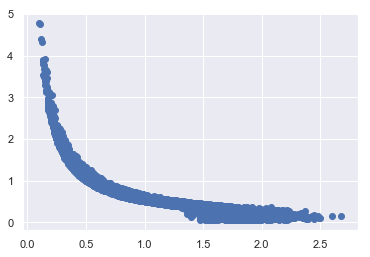

<Figure size 432x288 with 0 Axes>

In [165]:
plt.scatter(n_arr1, y_arr1)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650375122", plt, n_arr1, y_arr1)

In [146]:
# Adam_1641986778 \ crit 2
a22, b22, y_arr22, n_arr22 = v4_prepare_data_from_files('Adam_1650375122', 0.5)
print(a22, b22)


1      [0, 0.23826037678398304, 0.0, 1.0, 1598638.7015231303]
0.32687915437321535
0 || 0.5304912215270177 || 1 || 1 
0      [0, 91.24523733969944, 0.1, 0.0, 525142.6063254657]
1.2189884043201493
0 || 0.6216836529961237 || 0 || 0 
0      [0, 82.88494625698853, 0.0, 0.0, 904325.6322108423]
0.6717837276930956
0 || 0.5650211877193231 || 0 || 0 
0      [0, 11.189184828842947, 1.0, 0.0, 166673.37139149345]
1.7181188435094221
0 || 0.8510332570684735 || 0 || 0 
1      [0, 84.26576391425324, 0.5, 1.0, 716474.1842080951]
0.8326687638814866
0 || 0.5799729289961719 || 1 || 0 
0      [1, 39.60839680963225, 0.0, 0.0, 631961.6151493213]
0.8838794726469519
1 || 0.5828214491526448 || 0 || 0 
1      [1, 73.51635430400052, 1.0, 1.0, 317996.4290096688]
1.9317328828880767
1 || 0.7246091869327209 || 1 || 0 
1      [1, 6.00880871720485, 0.1, 1.0, 1476726.5502853384]
0.33145336438805945
1 || 0.5320513884531155 || 1 || 1 
0      [1, 30.44692629032267, 1.0, 0.0, 1535407.523073737]
0.38418262225420646
1 || 0.534

1.6874560596855357
14 || 0.9029088623191823 || 0 || 0 
0      [14, 27.081794952749522, 0.1, 0.0, 184447.99091829883]
1.9930328216997828
14 || 0.8025673808642164 || 0 || 0 
0      [15, 81.53334779848143, 0.0, 0.0, 222074.7499279949]
1.9096988824376153
15 || 0.8248440507226072 || 0 || 0 
0      [15, 71.39720325177703, 0.0, 0.0, 174176.07135472982]
1.9464265033647046
15 || 0.7829865688506811 || 0 || 0 
0      [15, 39.5594241981578, 0.0, 0.0, 220698.14142756636]
1.7421664235504428
15 || 0.8245209232230537 || 0 || 0 
0      [15, 85.54095116514608, 0.0, 0.0, 1326890.3676521766]
0.3765760841957883
15 || 0.5346007647608751 || 0 || 0 
0      [15, 1.5020201782813603, 0.0, 0.0, 142217.8296247641]
1.7339391538696247
15 || 0.7553978132362015 || 0 || 0 
0      [16, 75.23481824426328, 0.5, 0.0, 1173160.4563929522]
0.48014761297195463
16 || 0.5434607113692392 || 0 || 0 
0      [16, 15.96584492440109, 0.1, 0.0, 167207.46008736742]
1.6797343995999356
16 || 0.8018401342473472 || 0 || 0 
1      [16, 22.35

1.2589299801848877
29 || 0.6755710569203145 || 0 || 0 
0      [29, 32.654177961249665, 0.5, 0.0, 901701.6606246545]
0.6137036008745018
29 || 0.5562248868331295 || 0 || 0 
0      [29, 26.981422327148845, 0.0, 0.0, 266554.3037840704]
1.838521028436096
29 || 0.6659506195259719 || 0 || 0 
0      [30, 65.13526131245135, 0.0, 0.0, 369759.0263154993]
1.3568293147975172
30 || 0.6218611773355132 || 0 || 0 
0      [30, 14.370909672355452, 0.1, 0.0, 106580.96070700884]
1.7864396799753728
30 || 0.7978912614180341 || 0 || 0 
1      [30, 1.2125421842948514, 1.0, 1.0, 497069.8943937094]
1.2486721498401152
30 || 0.6600914113832163 || 1 || 0 
0      [30, 84.03289538905973, 1.0, 0.0, 117192.58853794259]
1.715479835036627
30 || 0.8874607695608271 || 0 || 0 
0      [30, 5.570664409512349, 1.0, 0.0, 65368.612843232106]
1.7520006869697042
30 || 0.9298507128727369 || 0 || 0 
0      [31, 33.49624676179966, 0.1, 0.0, 857643.3489177852]
0.7562339665799496
31 || 0.5728284465049188 || 0 || 0 
1      [31, 37.91083

0.8495981351818197
44 || 0.5774825287897095 || 1 || 0 
0      [44, 20.860836342068918, 0.1, 0.0, 151748.12175091793]
1.9132055502901635
44 || 0.780789349962113 || 0 || 0 
0      [44, 2.8223246574336613, 1.0, 0.0, 570233.0421604061]
1.0680313650201407
44 || 0.6364267949453845 || 0 || 0 
0      [44, 11.985308147993795, 0.5, 0.0, 863447.0532336528]
0.6572919654236639
44 || 0.566309821458719 || 0 || 0 
0      [44, 25.886814629598163, 0.1, 0.0, 350480.2694908388]
1.5332881293660852
44 || 0.6368941623747741 || 0 || 0 
0      [45, 72.76312875431292, 0.1, 0.0, 871316.6906487233]
0.5964705197515551
45 || 0.5539555754246307 || 0 || 0 
0      [45, 98.52849832312923, 1.0, 0.0, 304038.8686345328]
1.7613427300068418
45 || 0.7629732412077455 || 0 || 0 
0      [45, 87.82529639541056, 1.0, 0.0, 201016.24438778762]
1.7621812688555691
45 || 0.8335413835481663 || 0 || 0 
0      [45, 65.33767200662301, 0.5, 0.0, 957641.258175762]
0.5746425991006635
45 || 0.5525805209278972 || 0 || 0 
0      [45, 17.4745534

1.579850982171358
58 || 0.8048738594661529 || 0 || 0 
0      [58, 94.66223729512694, 0.1, 0.0, 112774.08235369448]
1.5678835908635058
58 || 0.852223617071138 || 0 || 0 
0      [58, 89.6207103376234, 0.0, 0.0, 1000726.7680756409]
0.5965766463564869
58 || 0.5628775982740322 || 0 || 0 
1      [59, 82.06387218669224, 0.1, 1.0, 971558.8851871]
0.5271795909951317
59 || 0.5487284391147067 || 1 || 0 
0      [59, 97.79383212542818, 0.0, 0.0, 2089650.325084028]
0.2809706977390155
59 || 0.5265446114529224 || 0 || 0 
0      [59, 40.06071517242512, 0.5, 0.0, 208752.94094142376]
1.7265600907007252
59 || 0.7688233492543249 || 0 || 0 
0      [59, 1.5493884405055947, 1.0, 0.0, 929179.4906484063]
0.6724239403594146
59 || 0.5751660198233735 || 0 || 0 
0      [59, 90.46745186187151, 0.1, 0.0, 624755.0140952942]
0.8502516988865756
59 || 0.5791530806318466 || 0 || 0 
0      [60, 76.49203507190143, 0.5, 0.0, 1241936.6038806655]
0.4472977353902427
60 || 0.5410543939919877 || 0 || 0 
0      [60, 45.26927411143

2.0048574053738792
73 || 0.684112690957039 || 0 || 0 
0      [73, 45.054190781045705, 0.0, 0.0, 151356.55657012807]
1.9944441171694949
73 || 0.8597404661872314 || 0 || 0 
0      [73, 61.60883620234879, 0.1, 0.0, 1187590.7947594402]
0.4322533497199047
73 || 0.5398469543734268 || 0 || 0 
0      [73, 63.78476282365978, 0.5, 0.0, 273602.9024281058]
1.6605176906567183
73 || 0.6962451099184983 || 0 || 0 
0      [73, 18.173677468939715, 0.0, 0.0, 858280.0671388105]
0.7025336781885833
73 || 0.569843126575374 || 0 || 0 
1      [74, 8.895313735210658, 0.5, 1.0, 837303.0723129091]
0.7446504068997526
74 || 0.5695571840133803 || 1 || 0 
0      [74, 18.89458824848408, 0.5, 0.0, 1154872.434424239]
0.47789467226123844
74 || 0.5453378465409983 || 0 || 0 
0      [74, 27.990715572246096, 0.1, 0.0, 1164421.9460953972]
0.4514364091275107
74 || 0.5402016678101055 || 0 || 0 
0      [74, 13.561909731311983, 1.0, 0.0, 237432.71357880265]
2.276811378560597
74 || 0.8048684599884162 || 0 || 0 
0      [74, 62.0939

0.25709537986370284
87 || 0.5239957917148105 || 0 || 0 
1      [87, 36.176631483204496, 0.1, 1.0, 601694.8067494902]
0.8685397008163811
87 || 0.5775206869480879 || 1 || 0 
0      [88, 85.28647007628105, 1.0, 0.0, 187837.986386541]
1.7040998699642163
88 || 0.8382060832100813 || 0 || 0 
0      [88, 6.088872004282475, 0.1, 0.0, 849894.9465676553]
0.6536006309698184
88 || 0.565387401981476 || 0 || 0 
0      [88, 39.639279493037414, 0.1, 0.0, 300939.884682385]
1.5332216008323993
88 || 0.6588851370735525 || 0 || 0 
0      [88, 11.342661412309518, 0.0, 0.0, 111968.33332536637]
1.7805564972378225
88 || 0.7676443237129803 || 0 || 0 
0      [88, 37.34792216197802, 0.5, 0.0, 112692.3775076405]
1.7965825440200565
88 || 0.791733239848514 || 0 || 0 
0      [89, 55.94720336405155, 1.0, 0.0, 1026150.4684623114]
0.6017070013987963
89 || 0.554518412728337 || 0 || 0 
0      [89, 1.6424259760767446, 0.1, 0.0, 559009.887858104]
0.99622805604384
89 || 0.5886173031914564 || 0 || 0 
1      [89, 81.01253020183

0.40711718865277613
101 || 0.5378324339535944 || 0 || 0 
0      [102, 91.82411562697953, 1.0, 0.0, 999801.5183538926]
0.6513184561504194
102 || 0.5658486774875253 || 0 || 0 
0      [102, 32.76023359827664, 0.0, 0.0, 746601.4486215254]
0.853936726246914
102 || 0.577839277155514 || 0 || 0 
0      [102, 74.68467566161551, 0.5, 0.0, 110469.91516420218]
1.860650833929503
102 || 0.8764243716710819 || 0 || 0 
0      [102, 44.97648506692502, 1.0, 0.0, 767873.3683086386]
0.860614727908906
102 || 0.5912407595055301 || 0 || 0 
0      [102, 34.16506875424331, 1.0, 0.0, 106441.39167784297]
2.1211383050496933
102 || 0.8925476376696162 || 0 || 0 
0      [103, 89.09324334402187, 0.0, 0.0, 427042.69070030906]
1.1786744958192392
103 || 0.6116277168865686 || 0 || 0 
0      [103, 74.23436139390745, 0.1, 0.0, 1164959.1134560376]
0.43498434800530605
103 || 0.5403709648757029 || 0 || 0 
1      [103, 79.68759145139371, 1.0, 1.0, 443169.78894073254]
1.3717594594177114
103 || 0.6635699802195747 || 1 || 0 
0    

1.8283300187861775
116 || 0.7358281754293505 || 0 || 0 
0      [116, 3.4070539352303806, 0.1, 0.0, 235461.71355725222]
1.7538010799140364
116 || 0.7052216117154725 || 0 || 0 
0      [116, 36.48392586401451, 0.5, 0.0, 699219.3015879082]
0.8517021015374864
116 || 0.5799266247845718 || 0 || 0 
0      [116, 10.715519943666663, 1.0, 0.0, 67619.09571006858]
2.1371735219730446
116 || 0.9566465534106035 || 0 || 0 
0      [116, 85.98606555931549, 0.1, 0.0, 130678.25044716486]
1.668426711016617
116 || 0.7698021473407163 || 0 || 0 
0      [117, 8.165999205165708, 1.0, 0.0, 535562.0195428287]
1.138961954172589
117 || 0.6458676109021129 || 0 || 0 
1      [117, 45.89424128785136, 0.1, 1.0, 362010.31893152103]
1.7067153030787325
117 || 0.680140054082578 || 1 || 0 
0      [117, 58.01567203600611, 0.5, 0.0, 374173.02787781163]
1.4254001589929137
117 || 0.633313066449686 || 0 || 0 
0      [117, 51.18442631466961, 0.1, 0.0, 1727008.5486703177]
0.3016203473070358
117 || 0.5273511996665146 || 0 || 0 
0    

1.5481209611526217
130 || 0.6425761862712529 || 0 || 0 
0      [130, 31.193529034306, 0.5, 0.0, 155893.53932436014]
1.8333713560483442
130 || 0.7980694299374377 || 0 || 0 
1      [130, 99.77608621351553, 0.1, 1.0, 247688.90995336956]
1.5361184995896404
130 || 0.6949082604581691 || 1 || 0 
0      [130, 7.321048828188897, 0.0, 0.0, 1847679.8359695456]
0.2695747527456193
130 || 0.524867215936936 || 0 || 0 
0      [131, 86.19399564008722, 0.1, 0.0, 299199.3002458948]
1.7299946090724203
131 || 0.7355455141955747 || 0 || 0 
0      [131, 52.27470820799866, 0.0, 0.0, 778426.1605433438]
0.7328579336877173
131 || 0.5701818638024889 || 0 || 0 
0      [131, 43.76853072216032, 0.0, 0.0, 777835.4237548701]
0.6580016036959273
131 || 0.5629531409846354 || 0 || 0 
1      [131, 51.60805202248605, 0.1, 1.0, 573639.9996703323]
0.8705404670954164
131 || 0.5797005170946171 || 1 || 0 
0      [131, 96.56415335636035, 0.5, 0.0, 3913689.142905977]
0.13703073395247853
131 || 0.5125930522528934 || 0 || 0 
0      

0.8166589180050658
144 || 0.5789586275443288 || 1 || 0 
0      [144, 26.466002968877167, 1.0, 0.0, 450536.853778056]
1.274574086192609
144 || 0.6791954597967276 || 0 || 0 
0      [144, 64.13337953000496, 0.0, 0.0, 223277.97081636652]
1.801577009383859
144 || 0.6956094465684338 || 0 || 0 
1      [145, 91.65252463692575, 0.5, 1.0, 392654.4785207024]
1.4138234157697491
145 || 0.6708602523430499 || 1 || 0 
1      [145, 97.48930883104354, 0.5, 1.0, 296847.3192399671]
1.8156528052216492
145 || 0.7392592297883437 || 1 || 0 
0      [145, 38.327230917898014, 0.1, 0.0, 490202.0158427897]
1.054796898622048
145 || 0.5948979028610897 || 0 || 0 
1      [145, 88.08500883019944, 1.0, 1.0, 253787.3675115471]
1.6200305425452075
145 || 0.7850377021591891 || 1 || 0 
0      [145, 43.75055197059976, 0.5, 0.0, 2300985.002845487]
0.231854199682462
145 || 0.5210657671533685 || 0 || 0 
0      [146, 12.355027995058116, 0.5, 0.0, 275229.1344340113]
1.6613506267305915
146 || 0.776739017581137 || 0 || 0 
0      [14

1.5833855279858455
158 || 0.8741316077515634 || 0 || 0 
0      [158, 14.875106500701357, 0.0, 0.0, 149224.1610810978]
1.8535242494270068
158 || 0.8808929478466466 || 0 || 0 
0      [159, 29.14393761928782, 1.0, 0.0, 774479.2450470898]
0.7768977499179645
159 || 0.575933176499576 || 0 || 0 
0      [159, 94.10340215253737, 0.0, 0.0, 66081.10178611016]
1.6463184436495386
159 || 0.8275073828876401 || 0 || 0 
1      [159, 77.88934786374142, 0.0, 1.0, 92488.97822816549]
1.609709073650912
159 || 0.8895254644036231 || 1 || 0 
0      [159, 38.27026811468504, 0.1, 0.0, 796244.7635620116]
0.8028803698068946
159 || 0.5886998884257141 || 0 || 0 
0      [159, 11.466801335553246, 0.5, 0.0, 470323.71422660927]
1.3231374582882802
159 || 0.6363548030404793 || 0 || 0 
1      [160, 43.17261824161832, 0.1, 1.0, 892842.2953140765]
0.5724278929396146
160 || 0.5517082145539725 || 1 || 0 
0      [160, 97.50125207090579, 0.0, 0.0, 1778382.6443734814]
0.29002619802115437
160 || 0.5265239913452338 || 0 || 0 
1    

1.8124890756868628
172 || 0.8179791643923349 || 0 || 0 
0      [172, 97.74395657527062, 0.0, 0.0, 456096.2449678845]
1.324135378219406
172 || 0.6648194972910885 || 0 || 0 
1      [173, 44.6434647936923, 0.1, 1.0, 462642.2503860882]
1.3672311201850604
173 || 0.6381921438853848 || 1 || 0 
1      [173, 10.793057434278175, 0.1, 1.0, 491410.3896165136]
1.0742279831345125
173 || 0.5998311656704876 || 1 || 0 
0      [173, 55.0390800453751, 0.0, 0.0, 231897.6355805663]
2.026199574376246
173 || 0.6881950262361174 || 0 || 0 
0      [173, 22.889758821327504, 0.1, 0.0, 299581.1851802396]
1.9082985189017379
173 || 0.6616905634630504 || 0 || 0 
0      [173, 5.7325586555648345, 0.0, 0.0, 81065.71271550468]
1.931801787299445
173 || 0.9015846902612603 || 0 || 0 
0      [174, 70.63035409550594, 0.0, 0.0, 252849.89186873223]
1.9507487832742811
174 || 0.6742342694723463 || 0 || 0 
0      [174, 59.345314174072826, 0.5, 0.0, 78561.00740926042]
1.6544803199495746
174 || 0.9012314641060761 || 0 || 0 
1      [

1.6484703200458517
187 || 0.7258516272546421 || 0 || 0 
0      [187, 60.999279008955284, 0.0, 0.0, 1904145.010663213]
0.28899950692189075
187 || 0.5265810114189261 || 0 || 0 
0      [187, 38.44238962397547, 0.0, 0.0, 361323.7636727412]
1.4732013262973864
187 || 0.6365398548588854 || 0 || 0 
0      [187, 50.609340837115155, 0.0, 0.0, 1543435.8522800552]
0.3327177199413827
187 || 0.5321635042195831 || 0 || 0 
1      [187, 89.05383143445205, 0.0, 1.0, 870210.9710802097]
0.6453340550086748
187 || 0.5593480521378726 || 1 || 0 
0      [188, 20.98942237312194, 0.1, 0.0, 692910.6569851745]
0.7587686356450108
188 || 0.5703909778446523 || 0 || 0 
0      [188, 16.329717633561636, 0.1, 0.0, 72379.70894763444]
1.6048774746484267
188 || 0.8352406161439277 || 0 || 0 
0      [188, 82.72958873291412, 0.0, 0.0, 109080.80991245783]
2.1558949791244717
188 || 0.848731513307085 || 0 || 0 
1      [188, 42.772451997961426, 0.5, 1.0, 346316.62535283883]
1.5707992506233217
188 || 0.6433770805586103 || 1 || 0 
0

1.2776489897680452
201 || 0.646039717218127 || 1 || 0 
1      [201, 72.40857063827303, 0.0, 1.0, 318909.8640380278]
1.4067086950042584
201 || 0.6533649975661534 || 1 || 0 
0      [201, 26.669091016363655, 0.1, 0.0, 155751.75791592995]
1.903313373025055
201 || 0.7708290984222146 || 0 || 0 
0      [201, 25.1093585450144, 0.5, 0.0, 736467.1526302671]
0.7988135679324707
201 || 0.5773564203275824 || 0 || 0 
0      [202, 41.82211747629876, 0.0, 0.0, 1394611.275302867]
0.3695336778207878
202 || 0.5334975769047656 || 0 || 0 
0      [202, 52.64218171343488, 0.5, 0.0, 861314.6362022796]
0.5803005146605732
202 || 0.5539919578619151 || 0 || 0 
0      [202, 0.1090779639563555, 0.5, 0.0, 1759752.6665530025]
0.3468566618688496
202 || 0.5299172870024773 || 0 || 0 
0      [202, 7.7086577742751405, 0.1, 0.0, 813106.4725765145]
0.642155649870741
202 || 0.5599602942978982 || 0 || 0 
0      [202, 24.554077123911846, 0.5, 0.0, 1066108.1787516344]
0.5243202738750948
202 || 0.5483833767531676 || 0 || 0 
0    

1.8807688069993531
215 || 0.8318190688244951 || 0 || 0 
1      [215, 48.84342141375871, 0.1, 1.0, 165173.12441168848]
2.1332182853168478
215 || 0.742525892626657 || 1 || 0 
0      [215, 65.20940149930792, 0.1, 0.0, 912535.6215076062]
0.5816392327936236
215 || 0.553077524338942 || 0 || 0 
0      [216, 24.41109133507547, 0.0, 0.0, 151901.1110408968]
1.5557857612549286
216 || 0.8434150093373924 || 0 || 0 
0      [216, 74.36299052919571, 0.1, 0.0, 189137.32715214076]
1.6539989166224214
216 || 0.8441664409083053 || 0 || 0 
1      [216, 55.78469784224289, 0.0, 1.0, 415494.5861602156]
1.2033672031345162
216 || 0.6089023514972125 || 1 || 0 
0      [216, 99.73874546613844, 0.1, 0.0, 152115.03332125262]
1.8214503288687616
216 || 0.7672784553624603 || 0 || 0 
0      [216, 1.14068618088487, 0.0, 0.0, 204009.9047404678]
1.870113070315544
216 || 0.8437977817487369 || 0 || 0 
0      [217, 19.905019042843985, 0.1, 0.0, 602422.2809923155]
0.9043278551438741
217 || 0.5818366909373472 || 0 || 0 
0      [

1.459759276105955
229 || 0.6697506691440376 || 0 || 0 
1      [229, 28.39607840022234, 0.0, 1.0, 580243.4562185296]
1.1056810071700514
229 || 0.607841123377615 || 1 || 0 
0      [230, 64.1602100466708, 0.1, 0.0, 285385.41042406484]
1.6095290712322836
230 || 0.6621900809361003 || 0 || 0 
0      [230, 91.88414120241457, 1.0, 0.0, 1226568.2094726244]
0.5128445080556692
230 || 0.5510751963103613 || 0 || 0 
0      [230, 92.22907546363588, 0.1, 0.0, 184054.6158957854]
1.7511225057337407
230 || 0.7395895658060204 || 0 || 0 
0      [230, 25.26288221577221, 0.1, 0.0, 162208.62364340102]
2.351890277822242
230 || 0.7685603646244535 || 0 || 0 
0      [230, 2.072006443236601, 1.0, 0.0, 105274.31330895257]
1.5947863548623429
230 || 0.8977366579433975 || 0 || 0 
1      [231, 53.48478491476276, 1.0, 1.0, 161386.26482619054]
1.8803034899175999
231 || 0.7477672250892841 || 1 || 0 
0      [231, 75.35591624151739, 1.0, 0.0, 953735.2794230866]
0.6327234018848199
231 || 0.570642724407824 || 0 || 0 
1      [

1.792828734069395
243 || 0.6838689351609473 || 1 || 0 
0      [243, 48.0797856176323, 0.0, 0.0, 630675.1968899079]
0.9726997895413446
243 || 0.6169817077591835 || 0 || 0 
0      [244, 32.10800053682831, 0.0, 0.0, 263717.73634741263]
2.4443559434794127
244 || 0.6944672783608149 || 0 || 0 
0      [244, 94.29597886892844, 0.5, 0.0, 255098.18152840718]
1.6670505582360833
244 || 0.792423251062489 || 0 || 0 
0      [244, 23.57261560738178, 0.1, 0.0, 727072.9073852382]
0.7119269354009862
244 || 0.5651948288007741 || 0 || 0 
0      [244, 51.05254457640533, 0.1, 0.0, 409792.217333261]
1.4637618433937465
244 || 0.6218122612235194 || 0 || 0 
0      [244, 51.36191088237069, 0.1, 0.0, 102364.99117521851]
2.110873140954846
244 || 0.7981803460245278 || 0 || 0 
1      [245, 40.26394276419826, 0.1, 1.0, 657951.1414907589]
0.8153387739584649
245 || 0.5753041466236957 || 1 || 0 
0      [245, 26.55058545307115, 0.5, 0.0, 408993.435902936]
1.4933555530801905
245 || 0.6453580450422316 || 0 || 0 
0      [245

0.8880105286244926
257 || 0.5990726090249482 || 0 || 0 
1      [258, 17.897242513523153, 0.5, 1.0, 1797551.2099394659]
0.29371871856524445
258 || 0.5279100068988338 || 1 || 1 
1      [258, 25.22646738434063, 0.5, 1.0, 521490.1768903646]
1.1771467484492655
258 || 0.6088432216561953 || 1 || 0 
0      [258, 71.66572805363803, 0.5, 0.0, 1033481.3374107393]
0.6169447971864697
258 || 0.5645398509093896 || 0 || 0 
0      [258, 35.9581528489306, 0.0, 0.0, 231241.08210675337]
1.8542407979790605
258 || 0.7764275832381671 || 0 || 0 
1      [258, 61.979304891159614, 1.0, 1.0, 167517.14389343205]
1.5103280275080888
258 || 0.7725122144643476 || 1 || 0 
0      [259, 48.471109613520376, 1.0, 0.0, 359331.6742139617]
1.4043790770973266
259 || 0.6877247256126212 || 0 || 0 
0      [259, 58.27899889139727, 0.5, 0.0, 826092.7395693586]
0.6381585431585206
259 || 0.5582475634375761 || 0 || 0 
1      [259, 62.8169415326443, 0.1, 1.0, 434744.4680555658]
1.3583467320052551
259 || 0.6288302504618488 || 1 || 0 
0 

1.7395830621634822
272 || 0.6756396694421051 || 0 || 0 
0      [272, 15.20038184424698, 0.1, 0.0, 232139.17445828454]
1.7337457028702838
272 || 0.7040049957890314 || 0 || 0 
1      [272, 82.12031585108966, 0.0, 1.0, 159443.02967940393]
1.6226663398343621
272 || 0.8030589961687984 || 1 || 0 
1      [272, 34.99182444007424, 1.0, 1.0, 948088.0935398362]
0.6126108860621063
272 || 0.5564075869445051 || 1 || 0 
0      [272, 60.58443677015178, 0.5, 0.0, 150978.36245590576]
1.9614117389098287
272 || 0.8245729633405018 || 0 || 0 
1      [273, 84.25621841486124, 1.0, 1.0, 1020605.0077567525]
0.6429495579221702
273 || 0.5649809496419399 || 1 || 0 
1      [273, 70.19850141832578, 0.0, 1.0, 317055.14423393435]
1.5828365615183682
273 || 0.6445503270369075 || 1 || 0 
0      [273, 91.59007534385998, 0.5, 0.0, 455595.50521186553]
1.3719505453364984
273 || 0.646425553422171 || 0 || 0 
0      [273, 69.8078839002829, 0.5, 0.0, 435392.4318712028]
1.3420630977068386
273 || 0.6283394375393674 || 0 || 0 
1   

0.744829621511386
286 || 0.5688699803407734 || 0 || 0 
0      [286, 33.91671903711171, 0.5, 0.0, 1527810.831583229]
0.3934345327023195
286 || 0.5354599325667692 || 0 || 0 
0      [286, 55.60163521951878, 1.0, 0.0, 120529.01981418117]
1.6603233156535058
286 || 0.7889206686434066 || 0 || 0 
1      [286, 56.90915676499779, 1.0, 1.0, 196350.16998246254]
1.8107702329145259
286 || 0.7789495061895313 || 1 || 0 
0      [286, 60.77336296537455, 0.1, 0.0, 143306.29482555808]
1.749088177086802
286 || 0.8821984939939576 || 0 || 0 
0      [287, 48.90792880227393, 0.0, 0.0, 1070525.2919136866]
0.4674035859670217
287 || 0.542850101368156 || 0 || 0 
1      [287, 0.44220790496444784, 0.1, 1.0, 413568.498920394]
1.3967795372529606
287 || 0.6470902533633097 || 1 || 0 
1      [287, 77.03033099324661, 1.0, 1.0, 951023.0756823787]
0.6725764025874154
287 || 0.5627124654558656 || 1 || 0 
0      [287, 82.16118118524595, 0.5, 0.0, 310764.90899086895]
1.653683205950402
287 || 0.7276013257832685 || 0 || 0 
0     

0.6980725448738896
300 || 0.5637718316674093 || 0 || 0 
0      [300, 30.014373828845375, 0.1, 0.0, 609432.3260016316]
0.9074845892807526
300 || 0.5811858459590569 || 0 || 0 
1      [300, 52.839770349890294, 0.5, 1.0, 645797.5580757548]
0.9217355919917931
300 || 0.592752665461941 || 1 || 0 
0      [300, 73.73433766992542, 0.0, 0.0, 792103.0874775891]
0.6311408031979037
300 || 0.5577947430057917 || 0 || 0 
0      [300, 11.737656144853275, 0.0, 0.0, 414330.6971223912]
1.3036329237557112
300 || 0.6162737965373509 || 0 || 0 
1      [301, 81.57442866918112, 1.0, 1.0, 2259952.154052969]
0.2553489582303582
301 || 0.5232953048046846 || 1 || 1 
0      [301, 22.092052183524373, 1.0, 0.0, 201938.43763531506]
1.6854403711979797
301 || 0.8143025182906515 || 0 || 0 
0      [301, 36.4941447951413, 1.0, 0.0, 135017.96940139643]
2.094420548637481
301 || 0.89065257883656 || 0 || 0 
0      [301, 6.4503053992917225, 1.0, 0.0, 2754784.3927754415]
0.18968793810427426
301 || 0.5194061510113565 || 0 || 0 
0   

2.1313767240397365
314 || 0.8425983611533411 || 1 || 0 
0      [314, 76.21264221154252, 0.1, 0.0, 420738.88373169606]
1.2056444905624149
314 || 0.6141294706942918 || 0 || 0 
0      [314, 80.80662783577735, 1.0, 0.0, 428125.8823749695]
1.394074513634502
314 || 0.6789182250867494 || 0 || 0 
0      [314, 51.239985628526085, 0.0, 0.0, 303372.4393480981]
1.5387830271474066
314 || 0.720811157672933 || 0 || 0 
1      [315, 66.21484185050784, 0.5, 1.0, 1260293.2167824786]
0.4609092490273314
315 || 0.5435091020212003 || 1 || 1 
0      [315, 99.94762568593659, 1.0, 0.0, 1319823.2710167605]
0.4755776801303553
315 || 0.5490560365783209 || 0 || 0 
0      [315, 5.587445627024213, 0.1, 0.0, 377967.4473527583]
1.4348571417346496
315 || 0.6333051372498743 || 0 || 0 
0      [315, 62.62931736288758, 0.5, 0.0, 1176731.6087529957]
0.44959148720070596
315 || 0.5411164603503955 || 0 || 0 
0      [315, 71.23299331703369, 0.0, 0.0, 530794.2515410788]
0.9483172830879737
315 || 0.5859174210543611 || 0 || 0 
0   

0.24296483497857346
328 || 0.5230280297103884 || 1 || 1 
1      [328, 42.027491456032834, 0.1, 1.0, 1014840.644793442]
0.5329823178255935
328 || 0.5499189289131614 || 1 || 0 
0      [329, 41.36201476839669, 0.1, 0.0, 898708.6666644607]
0.6095910814493475
329 || 0.5556499117215027 || 0 || 0 
1      [329, 28.3835211512792, 0.0, 1.0, 720804.1193332697]
0.6941609862140226
329 || 0.5634527271416077 || 1 || 0 
0      [329, 25.24777131534311, 0.1, 0.0, 374442.0789695857]
1.459910368624617
329 || 0.631852075163446 || 0 || 0 
0      [329, 76.64825268300561, 0.5, 0.0, 121716.91921680569]
1.7841115936331673
329 || 0.85194874013217 || 0 || 0 
0      [329, 20.323069440504725, 0.5, 0.0, 379016.9541187848]
1.7813756975829738
329 || 0.6649356295301673 || 0 || 0 
0      [330, 86.32986066710997, 0.0, 0.0, 279693.5085660425]
2.0457037381675964
330 || 0.7514770229640109 || 0 || 0 
1      [330, 16.36755957281, 0.0, 1.0, 2852142.6643288946]
0.18177892829820183
330 || 0.5163254519035263 || 1 || 1 
0      [33

0.2359916284802705
342 || 0.521471799949609 || 1 || 1 
1      [342, 14.8128299266849, 1.0, 1.0, 199500.4356612293]
1.8334768153095593
342 || 0.836819913167073 || 1 || 0 
0      [343, 17.255666925805823, 0.5, 0.0, 243723.46284464895]
1.7580824687548688
343 || 0.7459482703812496 || 0 || 0 
0      [343, 92.83157380710438, 0.0, 0.0, 280080.9838103568]
1.8095587473293595
343 || 0.6585135355772459 || 0 || 0 
1      [343, 64.0290876153365, 0.5, 1.0, 270054.4410339534]
1.7569173317788152
343 || 0.7097580608763315 || 1 || 0 
0      [343, 10.01154038276701, 0.5, 0.0, 506000.166477812]
1.2465731315757536
343 || 0.6452862515825183 || 0 || 0 
1      [343, 49.527190148348495, 0.0, 1.0, 117345.07418546017]
2.1591055582950847
343 || 0.7859682296338283 || 1 || 0 
0      [344, 78.77048958147948, 0.5, 0.0, 628892.5929785462]
0.9736265489539685
344 || 0.5900687046438949 || 0 || 0 
0      [344, 91.57906728060698, 1.0, 0.0, 121582.51075875986]
1.9251467658582189
344 || 0.9005225969928983 || 0 || 0 
0      [

0.36083215443759414
356 || 0.5349299429309967 || 0 || 0 
1      [357, 46.1812795527836, 1.0, 1.0, 1263401.0780280984]
0.44644032203277145
357 || 0.5416308352250825 || 1 || 1 
0      [357, 53.14489872281566, 0.1, 0.0, 3544958.201020841]
0.14084812113285955
357 || 0.5129707960984324 || 0 || 0 
0      [357, 47.431903571644504, 0.0, 0.0, 288214.1160814669]
2.0940316078774
357 || 0.7390882893824848 || 0 || 0 
0      [357, 32.68762516674459, 0.0, 0.0, 773928.7878516909]
0.6457182666844209
357 || 0.5591393907148561 || 0 || 0 
0      [357, 77.2469392917842, 0.1, 0.0, 2693466.050327082]
0.19302475576819236
357 || 0.5173419904803805 || 0 || 0 
0      [358, 18.337982662079067, 1.0, 0.0, 394800.9122382267]
1.5935916052481625
358 || 0.6955712433649915 || 0 || 0 
0      [358, 59.4960919002377, 0.5, 0.0, 157244.87463130167]
2.0118531589304376
358 || 0.8314739723080166 || 0 || 0 
0      [358, 11.437850368847046, 1.0, 0.0, 309923.5385595787]
1.5652860038170213
358 || 0.7606763095481001 || 0 || 0 
0    

1.7575818938130499
371 || 0.8211931349577797 || 0 || 0 
0      [371, 56.59506573137936, 0.0, 0.0, 191382.82550327893]
1.8599926518737082
371 || 0.7135484827257247 || 0 || 0 
0      [371, 0.8996104789170623, 1.0, 0.0, 2327630.1522876816]
0.26924220436815094
371 || 0.5241352561090129 || 0 || 0 
0      [371, 49.333366192987235, 0.5, 0.0, 322795.1027503721]
1.7827061478834565
371 || 0.7394170673109762 || 0 || 0 
1      [372, 53.82283213645103, 0.1, 1.0, 289405.27242165816]
1.6562831459590832
372 || 0.660388095067671 || 1 || 0 
0      [372, 56.13099342605368, 1.0, 0.0, 141484.67533463796]
1.7663992995029876
372 || 0.7798900680430672 || 0 || 0 
0      [372, 74.90669105680348, 1.0, 0.0, 1214950.3817098225]
0.5019429421142015
372 || 0.546243336280932 || 0 || 0 
1      [372, 57.336766969033036, 0.1, 1.0, 110673.07835583888]
1.616621642585343
372 || 0.8536957384627707 || 1 || 0 
0      [372, 36.221793964133, 0.5, 0.0, 186027.47234946486]
1.7917162219971703
372 || 0.8209715015281634 || 0 || 0 
0 

0.36742855539922537
385 || 0.5355387698596534 || 0 || 0 
1      [385, 48.39719785643975, 1.0, 1.0, 399450.9607880981]
1.336981323597602
385 || 0.6315146987885075 || 1 || 0 
0      [385, 71.17341938027887, 0.5, 0.0, 449975.582615839]
1.252673695982742
385 || 0.6265447540057367 || 0 || 0 
0      [386, 23.01938423448353, 0.1, 0.0, 556366.1531505839]
1.16373439190474
386 || 0.6222763558685882 || 0 || 0 
0      [386, 13.339195820400002, 0.0, 0.0, 545908.6556313646]
0.9157408023361038
386 || 0.5834475802122202 || 0 || 0 
0      [386, 47.390612615504274, 1.0, 0.0, 463136.47200421547]
1.122186596937566
386 || 0.6034974011676211 || 0 || 0 
1      [386, 43.35331217263215, 1.0, 1.0, 423792.9043452381]
1.3659733541138
386 || 0.623712467777131 || 1 || 0 
0      [386, 87.85617362187514, 1.0, 0.0, 939688.9393369759]
0.6689318763945709
386 || 0.5714528477389174 || 0 || 0 
0      [387, 80.12737107601596, 0.0, 0.0, 63661.82118480937]
2.200811626034103
387 || 0.8406375574284922 || 0 || 0 
1      [387, 14

1.7846044797467249
399 || 0.9341841229391181 || 0 || 0 
0      [399, 20.838044040210296, 0.0, 0.0, 392792.5064374033]
1.2788932987573518
399 || 0.6149770799615712 || 0 || 0 
0      [399, 17.332891824668312, 0.5, 0.0, 177333.22544323903]
1.8894134819982353
399 || 0.8198903242211555 || 0 || 0 
0      [400, 62.65696124647355, 0.1, 0.0, 384281.81575949973]
1.3241920690982905
400 || 0.6211516381875698 || 0 || 0 
0      [400, 57.09647302062064, 1.0, 0.0, 402764.2109931207]
1.4811135836803826
400 || 0.6319026560728174 || 0 || 0 
0      [400, 2.316919207900059, 0.1, 0.0, 749852.9649435501]
0.7985782201020831
400 || 0.5750300483026818 || 0 || 0 
0      [400, 45.64400887727019, 0.1, 0.0, 245565.5413760853]
1.7180365926077636
400 || 0.6791107196274639 || 0 || 0 
0      [400, 48.91525760891491, 1.0, 0.0, 2034043.6860466846]
0.24990233707549575
400 || 0.5226849343559649 || 0 || 0 
1      [401, 98.80886277094476, 0.1, 1.0, 498992.9028859135]
1.1986087016640827
401 || 0.6588119100067237 || 1 || 0 
0 

0.5993182333295948
413 || 0.554913506329931 || 1 || 0 
1      [413, 64.80046631947424, 1.0, 1.0, 527931.485926123]
1.1764721471031059
413 || 0.6113170379117273 || 1 || 0 
0      [413, 71.98399435093938, 1.0, 0.0, 70203.53808488484]
1.8230592332841504
413 || 0.9141213140895962 || 0 || 0 
0      [414, 70.29244457777754, 1.0, 0.0, 71807.97812035996]
1.924331602328481
414 || 0.8958800176744947 || 0 || 0 
0      [414, 3.6916648035712987, 1.0, 0.0, 435196.80506044877]
1.2889742481919682
414 || 0.6831975024817065 || 0 || 0 
1      [414, 35.47624830752591, 0.0, 1.0, 1004678.2083080913]
0.5879027098577945
414 || 0.5549477029233261 || 1 || 0 
0      [414, 76.60307614251724, 1.0, 0.0, 268059.86998497753]
1.6011653189763224
414 || 0.7532530948344441 || 0 || 0 
0      [414, 3.8937168263236677, 0.0, 0.0, 1004605.7517868563]
0.4981775296404258
414 || 0.5456466342772952 || 0 || 0 
1      [415, 68.07247559307955, 1.0, 1.0, 121666.59146680261]
1.8808495845882403
415 || 0.8420457998573349 || 1 || 0 
0   

0.8686519341914398
427 || 0.5992026293727959 || 0 || 0 
0      [427, 31.331951072877768, 1.0, 0.0, 1118007.8592283512]
0.5589732565072415
427 || 0.5567515758076118 || 0 || 0 
0      [427, 11.505740706826757, 0.0, 0.0, 594451.0760401681]
0.8408092953277851
427 || 0.5767455956729008 || 0 || 0 
0      [428, 23.56950343725151, 0.1, 0.0, 136664.1760260117]
1.7882720809129884
428 || 0.7822593363191147 || 0 || 0 
0      [428, 9.152193944594893, 0.1, 0.0, 238624.47761490857]
1.9364260756624732
428 || 0.7110427533128744 || 0 || 0 
0      [428, 51.198442180039926, 0.5, 0.0, 105401.90491497403]
2.239139244438781
428 || 0.8004033929906459 || 0 || 0 
1      [428, 84.46971567652702, 0.5, 1.0, 1128819.9190956256]
0.5065289488988443
428 || 0.5472072804657314 || 1 || 0 
0      [428, 76.16907887134597, 0.0, 0.0, 330707.95125838893]
1.3972130393563706
428 || 0.6851455297527388 || 0 || 0 
0      [429, 5.753828042643377, 0.5, 0.0, 1487661.0831947674]
0.358173068625011
429 || 0.5356348334563805 || 0 || 0 
0

1.5130137920061595
441 || 0.6707398798807287 || 0 || 0 
0      [441, 62.5874030165179, 0.5, 0.0, 382667.60447314277]
1.4431836137756615
441 || 0.6373158494062067 || 0 || 0 
0      [442, 54.52831205495753, 0.1, 0.0, 713402.6150054557]
0.8093300838852222
442 || 0.5805532576450715 || 0 || 0 
0      [442, 33.453885437170094, 0.0, 0.0, 1122827.9612995468]
0.5521708823841974
442 || 0.559002622243823 || 0 || 0 
0      [442, 15.004814671934719, 1.0, 0.0, 1563183.9788835887]
0.38864866180805807
442 || 0.536405308510794 || 0 || 0 
0      [442, 46.718547579814505, 1.0, 0.0, 816086.5323386237]
0.7126277654374912
442 || 0.5666577366437564 || 0 || 0 
1      [442, 65.33761956421343, 0.1, 1.0, 157491.043105127]
2.215116803987382
442 || 0.7424922219678529 || 1 || 0 
0      [443, 33.96866511074208, 1.0, 0.0, 320767.4327462811]
1.8087286952316963
443 || 0.7188991899277968 || 0 || 0 
1      [443, 14.460181847983677, 1.0, 1.0, 141390.18319987057]
1.7302517122829633
443 || 0.8790347464464038 || 1 || 0 
0   

1.5557674179933199
455 || 0.6386745520882562 || 0 || 0 
0      [455, 33.809997414327086, 0.0, 0.0, 253000.60899373944]
1.892481756577772
455 || 0.6740060736383899 || 0 || 0 
0      [456, 79.83726700249967, 0.1, 0.0, 1152924.464888695]
0.4396240655344677
456 || 0.5408292123032209 || 0 || 0 
0      [456, 79.33847713213228, 0.1, 0.0, 742953.9773523011]
0.7953823045494917
456 || 0.5758460051480236 || 0 || 0 
0      [456, 98.88200854722602, 1.0, 0.0, 97410.89185522558]
1.7907560616238822
456 || 0.9206670228864424 || 0 || 0 
0      [456, 18.54859198311982, 0.1, 0.0, 617136.7717570126]
0.836949085409525
456 || 0.5777521446934863 || 0 || 0 
0      [456, 68.61306815292335, 0.1, 0.0, 1042867.2365480381]
0.5117141784548443
456 || 0.5479624459194709 || 0 || 0 
0      [457, 91.26714553555904, 0.0, 0.0, 787360.6073977241]
0.6356945954016274
457 || 0.5581396882751803 || 0 || 0 
1      [457, 33.9885708593423, 1.0, 1.0, 734023.1116417057]
0.8604158101764824
457 || 0.5812019542310117 || 1 || 0 
0      [

0.920665548937002
469 || 0.5838890936249935 || 0 || 0 
0      [470, 79.90015135467023, 0.0, 0.0, 236622.34656274383]
1.8029307329413786
470 || 0.7550033432023698 || 0 || 0 
0      [470, 77.79567875970605, 0.1, 0.0, 341249.01842536835]
1.5301989801476654
470 || 0.6415843096048439 || 0 || 0 
0      [470, 96.38596776959743, 0.5, 0.0, 69350.5295388835]
1.7589908535397174
470 || 0.9120229703843614 || 0 || 0 
1      [470, 58.23280792299792, 1.0, 1.0, 602104.8337867081]
0.9671659005096261
470 || 0.5875143967503619 || 1 || 0 
0      [470, 15.426976676209508, 1.0, 0.0, 386731.23306386586]
1.4596885568399298
470 || 0.7136130062466239 || 0 || 0 
0      [471, 64.78826693946995, 1.0, 0.0, 742327.3393333255]
0.7999034017667945
471 || 0.5745868197316492 || 0 || 0 
0      [471, 23.063562213831485, 1.0, 0.0, 470137.7630943523]
1.3163427014882625
471 || 0.6520971075475592 || 0 || 0 
0      [471, 43.34583467693327, 0.1, 0.0, 418805.8133810786]
1.209961713156574
471 || 0.6097428066926119 || 0 || 0 
0     

1.9672159018464053
483 || 0.7034649133860796 || 1 || 0 
0      [484, 77.08996329487675, 0.5, 0.0, 320952.5720128717]
1.7941164106488927
484 || 0.6950254524825025 || 0 || 0 
1      [484, 91.62940315814532, 0.5, 1.0, 3048907.9351606467]
0.17884355576124192
484 || 0.5162177478235969 || 1 || 1 
1      [484, 52.469857062632904, 1.0, 1.0, 262193.71306816174]
1.94609435479792
484 || 0.6831317247887039 || 1 || 0 
0      [484, 58.53149389012305, 0.5, 0.0, 643471.7351782239]
0.7922332856557922
484 || 0.5756830713368167 || 0 || 0 
1      [484, 75.50217307041368, 0.0, 1.0, 181911.2528164783]
1.8316391344133067
484 || 0.7364983455076524 || 1 || 0 
0      [485, 51.76208647222044, 1.0, 0.0, 120991.47108995361]
2.0162366789960515
485 || 0.7899692183827955 || 0 || 0 
0      [485, 13.555769270220969, 1.0, 0.0, 359582.8126573728]
1.882695553544811
485 || 0.7134279142341886 || 0 || 0 
0      [485, 16.21454426504933, 0.5, 0.0, 134445.43202709273]
2.3420493339808877
485 || 0.8891324057535057 || 0 || 0 
0   

2.0287479265969193
498 || 0.9428107752156107 || 0 || 0 
0      [498, 48.57998678624643, 0.5, 0.0, 1906242.8837990991]
0.2579325606300107
498 || 0.5241807328614155 || 0 || 0 
0      [498, 75.81716939339805, 1.0, 0.0, 942806.4685931093]
0.6666557278098185
498 || 0.5647659845599577 || 0 || 0 
0      [498, 39.50012904581081, 1.0, 0.0, 1378880.2708172104]
0.4036276044162959
498 || 0.5359350165707684 || 0 || 0 
0      [498, 35.885189693258035, 1.0, 0.0, 453177.0125930739]
1.4153374503008023
498 || 0.6417675296823337 || 0 || 0 
0      [499, 19.07526984208013, 0.1, 0.0, 431587.3774599096]
1.3270796913470224
499 || 0.6191627258791402 || 0 || 0 
0      [499, 11.406426540631681, 1.0, 0.0, 183122.30263826755]
1.5759189860393863
499 || 0.8358737269399564 || 0 || 0 
0      [499, 59.67689744374044, 0.1, 0.0, 956003.7633103481]
0.5367674619220035
499 || 0.5491491838090864 || 0 || 0 
0      [499, 43.0743260547453, 0.5, 0.0, 584751.771711756]
0.9093058637141807
499 || 0.5841473058887413 || 0 || 0 
0    

0.34802470730867996
512 || 0.5307351551371498 || 0 || 0 
1      [512, 27.464099331262464, 0.0, 1.0, 241294.9524798048]
1.991793951450516
512 || 0.6817257764044935 || 1 || 0 
0      [512, 16.42449098162768, 0.0, 0.0, 258726.02184842195]
1.9982100416513295
512 || 0.6904573978030492 || 0 || 0 
1      [512, 90.04767064543915, 0.1, 1.0, 604834.246878828]
0.8628732881593132
512 || 0.5806071802494983 || 1 || 0 
1      [513, 26.666443565319632, 0.5, 1.0, 671519.9131063218]
0.8549351330033799
513 || 0.5806790879537375 || 1 || 0 
0      [513, 47.52666288941909, 0.0, 0.0, 1305858.071864536]
0.3827458924581351
513 || 0.5351562294374326 || 0 || 0 
0      [513, 14.964765960487004, 0.5, 0.0, 686861.382401041]
0.9085863927710772
513 || 0.5844837683029726 || 0 || 0 
0      [513, 83.17218638500327, 0.5, 0.0, 277382.7557855717]
1.8822471987660723
513 || 0.7362627863966279 || 0 || 0 
0      [513, 82.6447894475838, 0.0, 0.0, 303186.11387295637]
1.7229499078335049
513 || 0.6587770503071231 || 0 || 0 
0     

0.7863384221154682
526 || 0.5717249485035383 || 0 || 0 
0      [526, 77.02509041430086, 1.0, 0.0, 117449.10579801524]
2.011207409829633
526 || 0.898426887326439 || 0 || 0 
0      [527, 56.22697859948658, 0.0, 0.0, 795828.069380462]
0.6595231599821701
527 || 0.5594326742876952 || 0 || 0 
1      [527, 56.516704562377626, 1.0, 1.0, 1997073.4483273218]
0.2556450319144733
527 || 0.523764157486184 || 1 || 1 
1      [527, 62.703716169600256, 1.0, 1.0, 238699.23369799386]
1.6512797733716915
527 || 0.7432087808520179 || 1 || 0 
1      [527, 84.49086475275635, 0.5, 1.0, 899583.2346001458]
0.678007711042627
527 || 0.5626083054049308 || 1 || 0 
1      [527, 38.64995859909817, 0.0, 1.0, 1810368.7080084009]
0.3082427912364736
527 || 0.527298798490093 || 1 || 1 
0      [528, 25.70899566090703, 0.1, 0.0, 298664.1384485146]
1.489799943457297
528 || 0.6582807195168084 || 0 || 0 
0      [528, 69.03762509792466, 0.1, 0.0, 149782.31969568483]
1.6358725237920761
528 || 0.7416868236350266 || 0 || 0 
0      [

0.9667450439048635
540 || 0.5879201810316522 || 0 || 0 
0      [541, 30.636322441145815, 0.1, 0.0, 207967.19968920766]
1.7717288857813174
541 || 0.7121167032978446 || 0 || 0 
0      [541, 3.182265243307997, 0.1, 0.0, 568609.403234693]
0.964779290933288
541 || 0.5877085188980264 || 0 || 0 
1      [541, 98.1600281165513, 1.0, 1.0, 310458.2408195527]
1.5199351399869023
541 || 0.7547473661123733 || 1 || 0 
1      [541, 12.4819812070803, 1.0, 1.0, 404517.521045519]
1.366606733587188
541 || 0.690380255468188 || 1 || 0 
0      [541, 50.76681827054799, 0.1, 0.0, 690393.148690747]
0.7247266763639343
541 || 0.5662882593105373 || 0 || 0 
0      [542, 16.439326455393083, 0.5, 0.0, 198271.5016781781]
1.5521029562642186
542 || 0.7679405732181053 || 0 || 0 
0      [542, 41.995902776045384, 1.0, 0.0, 342101.19228993286]
1.7038532973711686
542 || 0.6644515338710552 || 0 || 0 
0      [542, 4.18824020934499, 0.0, 0.0, 105577.28584297397]
1.6904807581377652
542 || 0.7654881920744478 || 0 || 0 
0      [542

0      [555, 46.89459599441242, 1.0, 0.0, 261480.20444222674]
1.627986339653952
555 || 0.6811583504865089 || 0 || 0 
0      [555, 78.11648558701023, 0.5, 0.0, 1000749.8111389207]
0.5722699452715508
555 || 0.5561123744330667 || 0 || 0 
0      [555, 67.3449624590999, 0.1, 0.0, 929341.2100555856]
0.569793906937551
555 || 0.5525968165624838 || 0 || 0 
0      [555, 73.51019228033002, 0.1, 0.0, 183022.2067776395]
1.6155160250249891
555 || 0.815733130652679 || 0 || 0 
0      [555, 73.11540794214571, 0.0, 0.0, 2387082.524357568]
0.2113041514402935
555 || 0.5195434744921573 || 0 || 0 
0      [556, 66.31597227228872, 1.0, 0.0, 270551.9272392938]
1.7869213419924204
556 || 0.7302406841899423 || 0 || 0 
0      [556, 35.78644050911004, 0.0, 0.0, 236211.3934843919]
2.0741386733948386
556 || 0.7146686843076727 || 0 || 0 
0      [556, 2.0358102730771375, 1.0, 0.0, 666918.6590795763]
0.9395544137445684
556 || 0.6139637750615716 || 0 || 0 
1      [556, 13.216068892466055, 0.5, 1.0, 1194699.2494219271]
0.

1.7536291494684324
569 || 0.7033916581713114 || 0 || 0 
0      [569, 66.61945829127103, 0.5, 0.0, 60696.50562471688]
1.6891908915887224
569 || 0.8493943939010677 || 0 || 0 
0      [569, 26.781409472559247, 0.0, 0.0, 363833.15504560486]
1.4388308402376937
569 || 0.6625169213683827 || 0 || 0 
1      [569, 5.541873516218371, 0.0, 1.0, 571977.7692873133]
0.8955633733634724
569 || 0.5814390094212615 || 1 || 0 
0      [569, 44.40452603826604, 1.0, 0.0, 1246819.4753103945]
0.4201104531512458
569 || 0.5389372229602266 || 0 || 0 
1      [570, 62.25952167879616, 0.5, 1.0, 669147.7786145853]
0.8864539504428278
570 || 0.5775494279624179 || 1 || 0 
0      [570, 47.526333523093136, 0.0, 0.0, 304423.1424599002]
2.0025307660234173
570 || 0.7490728945028242 || 0 || 0 
0      [570, 26.856404823319668, 0.5, 0.0, 210172.17343644873]
1.9115379950931177
570 || 0.7648362533263922 || 0 || 0 
0      [570, 90.17359706200426, 0.0, 0.0, 465061.5933972985]
1.3060246075100705
570 || 0.6406322798308545 || 0 || 0 
0 

1.692465771742058
583 || 0.8711124824741211 || 0 || 0 
0      [583, 36.364000111737816, 0.5, 0.0, 895718.6854720603]
0.6255195721805751
583 || 0.5558194759588873 || 0 || 0 
0      [584, 84.39359365321684, 1.0, 0.0, 366785.69367887155]
1.7923239774531092
584 || 0.7079954208544446 || 0 || 0 
0      [584, 14.942623763447887, 0.5, 0.0, 688077.2692196927]
0.9138436109748075
584 || 0.5842488598164568 || 0 || 0 
0      [584, 90.8951978274201, 0.0, 0.0, 204651.98545211836]
1.601504721380023
584 || 0.6966659197934972 || 0 || 0 
1      [584, 61.776195662986, 0.5, 1.0, 1166301.9072607227]
0.5618110801855711
584 || 0.5541656502718058 || 1 || 0 
0      [584, 39.117557694101784, 1.0, 0.0, 1525947.7755022203]
0.39583368776950645
584 || 0.5396968477880087 || 0 || 0 
0      [585, 6.648755263567025, 0.0, 0.0, 219118.5761428921]
1.749815064884123
585 || 0.7516636229397734 || 0 || 0 
0      [585, 41.03583147169708, 0.5, 0.0, 336650.56321974593]
1.855835446647373
585 || 0.6894423594701254 || 0 || 0 
0     

0.7426727222937771
598 || 0.5676524355076129 || 0 || 0 
1      [598, 74.01823257297639, 0.5, 1.0, 909051.319621446]
0.6272714776579731
598 || 0.557371200386609 || 1 || 0 
0      [598, 29.557280081227354, 0.5, 0.0, 1005112.1157747117]
0.5874296524873217
598 || 0.5541423255027044 || 0 || 0 
0      [598, 52.0600507224225, 0.0, 0.0, 172804.63431232874]
1.8180919261391402
598 || 0.7299881189460978 || 0 || 0 
0      [598, 75.90083985649734, 1.0, 0.0, 223342.64109978447]
1.7479164810819425
598 || 0.7977614180138202 || 0 || 0 
0      [599, 54.032061334434175, 0.5, 0.0, 325448.7189867861]
1.6715273328542335
599 || 0.714882649344829 || 0 || 0 
0      [599, 26.744611050586332, 0.0, 0.0, 766939.4709450584]
0.6519501751031188
599 || 0.559673241881156 || 0 || 0 
1      [599, 49.4042027189827, 0.5, 1.0, 208079.67748538032]
1.910307512471724
599 || 0.7052447426915747 || 1 || 0 
1      [599, 73.75668724518837, 1.0, 1.0, 383707.48261575133]
1.5593494362290186
599 || 0.6822034505338694 || 1 || 0 
0      

0.851398466796676
612 || 0.5760911460290021 || 0 || 0 
0      [612, 94.12042860682762, 1.0, 0.0, 78396.42304832861]
1.9133690544327375
612 || 0.9354031705388355 || 0 || 0 
0      [612, 13.648342662541085, 0.1, 0.0, 257746.2974914071]
1.6118266989755956
612 || 0.6856086227831899 || 0 || 0 
1      [613, 18.56607392871365, 0.1, 1.0, 1020147.8549728788]
0.5095423859523843
613 || 0.5468448642962385 || 1 || 0 
0      [613, 32.49368191820563, 1.0, 0.0, 281076.1321415474]
1.6302554151880535
613 || 0.7265565323832283 || 0 || 0 
0      [613, 94.54796099823855, 1.0, 0.0, 288240.43630159897]
1.6307547563155442
613 || 0.7698860611968799 || 0 || 0 
0      [613, 2.592071523433248, 1.0, 0.0, 1051827.5452194177]
0.61708495389577
613 || 0.570533242199453 || 0 || 0 
0      [613, 52.74283338853996, 0.5, 0.0, 403418.08594570536]
1.664396878680599
613 || 0.6420478596160587 || 0 || 0 
1      [614, 23.27077352356718, 1.0, 1.0, 720990.1598234287]
0.8866040494266197
614 || 0.5890844251919213 || 1 || 0 
0      [

1.2454961833526677
626 || 0.6670588378698544 || 0 || 0 
0      [626, 3.8489151009001352, 0.5, 0.0, 113949.68818575535]
1.6466390978404084
626 || 0.8566242200646276 || 0 || 0 
0      [626, 25.96445227566796, 0.1, 0.0, 363962.52949230233]
1.5191770808416463
626 || 0.6394561445526943 || 0 || 0 
0      [627, 85.86847649207758, 0.5, 0.0, 1546314.4034670515]
0.3546176900694034
627 || 0.5333050147186823 || 0 || 0 
0      [627, 30.540933931991898, 1.0, 0.0, 2151270.384377747]
0.25483120586762953
627 || 0.5234217958199673 || 0 || 0 
0      [627, 67.32126619884073, 1.0, 0.0, 216920.4525398194]
1.767916936346383
627 || 0.8144238969693314 || 0 || 0 
0      [627, 46.399583715466285, 0.0, 0.0, 839002.6179816913]
0.6177685262664684
627 || 0.5569032381204736 || 0 || 0 
1      [627, 68.36380892815986, 0.0, 1.0, 879773.2877701905]
0.6324211611931725
627 || 0.5563422997359666 || 1 || 0 
0      [628, 69.0028462433386, 1.0, 0.0, 156496.77263315418]
2.1412016210337677
628 || 0.8577175155643156 || 0 || 0 
0 

0.7786748256889073
640 || 0.5911116024561035 || 0 || 0 
0      [641, 30.98221494876964, 1.0, 0.0, 229401.74857532678]
1.7210919977020618
641 || 0.7450754829216102 || 0 || 0 
0      [641, 26.791017838983077, 0.0, 0.0, 775934.294671206]
0.6439505020558426
641 || 0.5589879557522286 || 0 || 0 
0      [641, 97.38522484679153, 0.0, 0.0, 801657.7639549507]
0.6337197790977577
641 || 0.5576998339696928 || 0 || 0 
0      [641, 19.219209259490295, 0.1, 0.0, 416764.75351605384]
1.2845640582063873
641 || 0.6165691415177013 || 0 || 0 
0      [641, 29.91280433580789, 0.1, 0.0, 1442112.4431664716]
0.3719111128115318
641 || 0.5350657995493395 || 0 || 0 
1      [642, 81.85360990200007, 0.0, 1.0, 247429.6017702447]
1.770426150217858
642 || 0.6933109220481289 || 1 || 0 
0      [642, 82.23455608932808, 0.0, 0.0, 1535252.4355809886]
0.349556124844067
642 || 0.5315494135582806 || 0 || 0 
0      [642, 7.2454638168955645, 0.1, 0.0, 742912.8253718195]
0.732165778404486
642 || 0.5651798199589761 || 0 || 0 
0    

1.909359378760817
655 || 0.8542005500944925 || 0 || 0 
0      [655, 46.418682437230856, 0.5, 0.0, 497431.0051780888]
1.1271298700523402
655 || 0.6008581252757571 || 0 || 0 
0      [655, 12.404584995581235, 1.0, 0.0, 1636089.3816458108]
0.3628200315799764
655 || 0.5349744349716858 || 0 || 0 
0      [655, 79.74377771278813, 0.5, 0.0, 1673524.9279013395]
0.31986158721712316
655 || 0.5299776786260267 || 0 || 0 
0      [656, 79.13821073938253, 0.5, 0.0, 673099.5913628103]
0.9231660149907766
656 || 0.5900698757994068 || 0 || 0 
0      [656, 52.24818943475885, 1.0, 0.0, 199887.4948195411]
1.6845052803918585
656 || 0.8011399309698101 || 0 || 0 
1      [656, 22.398059031334093, 0.5, 1.0, 406219.20283848303]
1.5065789442363298
656 || 0.6471728379083376 || 1 || 0 
1      [656, 57.184224060342814, 0.5, 1.0, 136873.95205821795]
1.7016200422401782
656 || 0.7916209107453084 || 1 || 0 
0      [656, 13.458912676583019, 0.0, 0.0, 587183.1335799395]
0.891318799898272
656 || 0.5810773277036513 || 0 || 0 


0.23077480342774465
669 || 0.5208059979729199 || 0 || 0 
0      [669, 56.43327768173294, 0.0, 0.0, 230886.20446946376]
2.1964359018647834
669 || 0.7655874590122906 || 0 || 0 
0      [669, 28.664204266173932, 0.5, 0.0, 549596.0553424177]
1.075840825936918
669 || 0.6003132435300957 || 0 || 0 
0      [670, 53.22455246721319, 0.5, 0.0, 123882.35667027932]
1.6911498212128446
670 || 0.7614775798178288 || 0 || 0 
0      [670, 54.61663718081159, 0.0, 0.0, 111095.01576621005]
1.8124932679861523
670 || 0.770591279269865 || 0 || 0 
0      [670, 81.44743085606659, 0.5, 0.0, 305048.6838072811]
1.547291411447771
670 || 0.7054076599674367 || 0 || 0 
0      [670, 35.45231363561305, 0.5, 0.0, 61412.60102185644]
1.8925335078756134
670 || 0.8946405067379288 || 0 || 0 
1      [670, 89.18774623466766, 1.0, 1.0, 518788.2326811806]
1.1853722091201526
670 || 0.6490563108701816 || 1 || 0 
0      [671, 89.84245758956133, 1.0, 0.0, 310917.75372728845]
1.6234511474928768
671 || 0.7617245098240099 || 0 || 0 
0    

0.464032869440463
683 || 0.5433728770795988 || 0 || 0 
0      [683, 77.33735164120066, 0.0, 0.0, 186515.30746212893]
1.7024606176562909
683 || 0.8007310703138983 || 0 || 0 
0      [683, 16.197886887623024, 0.1, 0.0, 823890.4369200014]
0.645596850377415
683 || 0.561109895754 || 0 || 0 
0      [684, 0.0013646362833519277, 0.0, 0.0, 541516.495972052]
1.1070226165920938
684 || 0.6126623600655071 || 0 || 0 
0      [684, 46.86369944627964, 1.0, 0.0, 143764.98808330152]
1.6175845815508598
684 || 0.801088672202228 || 0 || 0 
1      [684, 8.877845805792528, 0.5, 1.0, 351887.3081676268]
1.482939985480583
684 || 0.6912701130403698 || 1 || 0 
0      [684, 75.60303558720716, 0.1, 0.0, 663953.7102805321]
0.7958871919728994
684 || 0.5727813970319421 || 0 || 0 
1      [684, 47.83696222220506, 0.1, 1.0, 238834.3714771912]
1.8876476768700525
684 || 0.6824223564420369 || 1 || 0 
0      [685, 59.309298543052705, 0.0, 0.0, 66794.39188366104]
1.9823039413226125
685 || 0.8479054651302431 || 0 || 0 
0      [6

1.840330439413567
697 || 0.7928497129389251 || 1 || 0 
0      [697, 86.07914098259566, 1.0, 0.0, 774970.3249284012]
0.8342924815649726
697 || 0.5870420302844235 || 0 || 0 
1      [698, 30.259017834305524, 0.5, 1.0, 1033218.3008515559]
0.5359852965835552
698 || 0.5487740179055698 || 1 || 0 
1      [698, 5.922924197092405, 0.0, 1.0, 210347.35616126072]
1.6697010181616234
698 || 0.8096122974376769 || 1 || 0 
0      [698, 23.966974613833592, 0.1, 0.0, 197974.04593736524]
1.5082682635568392
698 || 0.7235233497989839 || 0 || 0 
0      [698, 5.888000768306151, 1.0, 0.0, 529698.8056584289]
1.178253462479105
698 || 0.6460169202642093 || 0 || 0 
0      [698, 0.3515129490197777, 0.0, 0.0, 852031.3778929318]
0.5848273115369668
698 || 0.554099060656775 || 0 || 0 
0      [699, 0.8708132081596931, 0.1, 0.0, 385567.8427382928]
1.3372407283269483
699 || 0.6315868823554108 || 0 || 0 
0      [699, 60.439696154783284, 0.5, 0.0, 364355.45537198527]
1.4082133276533892
699 || 0.6406812985093842 || 0 || 0 
0 

1.1113090851422633
711 || 0.6026493024947845 || 0 || 0 
0      [711, 30.338588413145068, 0.1, 0.0, 866310.4028668675]
0.5916966660388574
711 || 0.5540703951677087 || 0 || 0 
0      [712, 3.4040833526925605, 0.0, 0.0, 1488429.1910065433]
0.344287667677417
712 || 0.5315182296557083 || 0 || 0 
0      [712, 42.21706863684219, 0.1, 0.0, 80007.91696201282]
1.8620688082661645
712 || 0.8012148128099867 || 0 || 0 
0      [712, 25.840047847756864, 1.0, 0.0, 2051421.6718516466]
0.2783034176722358
712 || 0.525142986493325 || 0 || 0 
0      [712, 13.205068831300682, 0.1, 0.0, 157339.79354655062]
1.8560119338452945
712 || 0.7535429378569334 || 0 || 0 
0      [712, 81.39030061100232, 1.0, 0.0, 421975.60273704113]
1.3704596097721364
712 || 0.6861547091297132 || 0 || 0 
0      [713, 69.53805101058886, 1.0, 0.0, 252166.50843070276]
1.74270725105069
713 || 0.7769603954547879 || 0 || 0 
0      [713, 83.469346786774, 0.0, 0.0, 588524.5788530748]
0.9226888710233018
713 || 0.5818316044120384 || 0 || 0 
0    

0.45945748918345614
725 || 0.5409910099833241 || 0 || 0 
0      [725, 29.820718162039373, 0.1, 0.0, 1039354.0198420535]
0.4997839864740532
725 || 0.5453768412768537 || 0 || 0 
1      [726, 95.5635540898444, 0.0, 1.0, 92344.30320207267]
1.9161948273686495
726 || 0.7973746746606682 || 1 || 0 
0      [726, 29.399856098565547, 1.0, 0.0, 420792.07474976056]
1.4213279342889733
726 || 0.6583672866294181 || 0 || 0 
1      [726, 85.67575525102602, 1.0, 1.0, 1445985.1015390698]
0.45401905201746506
726 || 0.5428735744911185 || 1 || 1 
0      [726, 70.42251491669886, 0.1, 0.0, 857892.3335735832]
0.7199341228332385
726 || 0.5676606619210116 || 0 || 0 
1      [726, 44.48415775051653, 0.0, 1.0, 744664.2863068413]
0.8584305633695756
726 || 0.5804839398093252 || 1 || 0 
0      [727, 95.83337665688929, 0.1, 0.0, 405286.0994788602]
1.3633938538647634
727 || 0.6242022091472629 || 0 || 0 
1      [727, 33.26784391750722, 0.0, 1.0, 677732.5434493043]
0.7845892756649426
727 || 0.5713564286329292 || 1 || 0 
0 

739 || 0.717602109666822 || 0 || 0 
0      [739, 0.8100768988046125, 1.0, 0.0, 1854360.1911248446]
0.3317985196402472
739 || 0.5317867932738577 || 0 || 0 
0      [740, 3.0581324217564596, 1.0, 0.0, 512413.29816507065]
1.1816066451742655
740 || 0.6561100054823354 || 0 || 0 
0      [740, 15.27505163923899, 1.0, 0.0, 276547.89460311417]
1.4677239178600254
740 || 0.7605935501352705 || 0 || 0 
0      [740, 76.66541487635233, 1.0, 0.0, 114216.57613054165]
1.4911539021936906
740 || 0.8529464219101619 || 0 || 0 
0      [740, 0.9566291102278857, 0.0, 0.0, 609369.5938811902]
0.8795920615949777
740 || 0.5818835630678479 || 0 || 0 
0      [740, 23.578576009717356, 0.0, 0.0, 489157.23883517436]
1.2599424068733804
740 || 0.6575673257320547 || 0 || 0 
0      [741, 46.34502852600724, 1.0, 0.0, 1120446.736374207]
0.486574709361507
741 || 0.5438639461192158 || 0 || 0 
0      [741, 62.15884152412882, 0.1, 0.0, 229997.81809386183]
1.9786696222133549
741 || 0.7051570094087124 || 0 || 0 
0      [741, 10.556

0.5590538875880784
753 || 0.5518915640012311 || 0 || 0 
1      [754, 77.08950081491734, 1.0, 1.0, 411761.66298466193]
1.4118444895184488
754 || 0.6730057706331668 || 1 || 0 
1      [754, 67.3421464523377, 0.5, 1.0, 129476.36373671475]
1.7389956840776726
754 || 0.8069764039289558 || 1 || 0 
0      [754, 5.9057591249759565, 0.1, 0.0, 79094.6675307135]
2.022474769798691
754 || 0.8486802169403661 || 0 || 0 
1      [754, 95.11835622417479, 1.0, 1.0, 217480.8069494923]
1.781149120613476
754 || 0.8282543841130148 || 1 || 0 
0      [754, 9.872001266423492, 0.5, 0.0, 612541.215386996]
1.0522277320566382
754 || 0.6000280712028643 || 0 || 0 
0      [755, 70.94320774963502, 1.0, 0.0, 351572.59609902505]
1.75068662242985
755 || 0.694895823904152 || 0 || 0 
1      [755, 54.14236889267343, 1.0, 1.0, 260658.5075792751]
2.0212394495960027
755 || 0.7071344480277016 || 1 || 0 
0      [755, 43.634881663236605, 0.5, 0.0, 97460.56796601138]
1.7145895853122772
755 || 0.8502286234401408 || 0 || 0 
0      [755

1.8101425820489154
767 || 0.7638355875989173 || 0 || 0 
1      [768, 66.6261010132561, 0.0, 1.0, 189214.7634919287]
1.6730144018129656
768 || 0.7575442000700681 || 1 || 0 
1      [768, 45.04012076693259, 0.1, 1.0, 556578.3917759217]
0.9124579726181485
768 || 0.5827764406560076 || 1 || 0 
1      [768, 17.231810102115634, 0.1, 1.0, 2271389.69715639]
0.22225728605982323
768 || 0.520526373113287 || 1 || 1 
0      [768, 73.62616041843603, 0.0, 0.0, 436666.6183399322]
1.1940397121029385
768 || 0.6070503503086357 || 0 || 0 
0      [768, 31.226832176948292, 0.0, 0.0, 1273534.654927273]
0.4699506091385898
768 || 0.5415748322016563 || 0 || 0 
0      [769, 17.725569831996058, 0.1, 0.0, 821186.2811799992]
0.6440079315972971
769 || 0.5597768870768784 || 0 || 0 
0      [769, 54.12433471019652, 0.5, 0.0, 1477502.1796280013]
0.34217217932667904
769 || 0.5314889292797054 || 0 || 0 
0      [769, 59.05914956297422, 0.1, 0.0, 699893.5174345705]
0.9341669354811399
769 || 0.6063642205778592 || 0 || 0 
1    

0.4099545404421452
781 || 0.5372548467181179 || 0 || 0 
0      [782, 35.16712059146161, 0.0, 0.0, 112468.39568987799]
1.7254920682764432
782 || 0.8461098707889468 || 0 || 0 
0      [782, 29.48410324291379, 0.0, 0.0, 232838.6291440326]
1.980913510672001
782 || 0.6872915117985329 || 0 || 0 
0      [782, 97.9932335244743, 1.0, 0.0, 408201.37036313745]
1.461591255507912
782 || 0.6973036954178207 || 0 || 0 
0      [782, 32.88536258386613, 0.0, 0.0, 286041.0848465494]
1.7021119722554654
782 || 0.77073650392163 || 0 || 0 
0      [782, 5.9492125778988045, 0.5, 0.0, 2258305.970034336]
0.23825034445223672
782 || 0.5227705640138529 || 0 || 0 
0      [783, 70.93277120559816, 0.0, 0.0, 247021.67583155364]
1.7626771376238477
783 || 0.6953302113032157 || 0 || 0 
0      [783, 43.41084768896833, 0.0, 0.0, 1020206.8043542586]
0.49387586144709744
783 || 0.5457706860756585 || 0 || 0 
0      [783, 46.57162938056258, 0.0, 0.0, 398728.12730375945]
1.2480424969206971
783 || 0.6133251213587071 || 0 || 0 
1    

0.29931443253439743
796 || 0.5280245278697241 || 0 || 0 
0      [796, 14.253448176557393, 0.1, 0.0, 713491.4752140403]
0.753910581363774
796 || 0.5675355140116909 || 0 || 0 
1      [796, 32.411430651694936, 0.0, 1.0, 173965.4851720061]
2.334172385065658
796 || 0.8173110081303414 || 1 || 0 
1      [796, 89.8660911220081, 0.0, 1.0, 113065.62601892017]
1.8188410973633828
796 || 0.8779938971700241 || 1 || 0 
0      [797, 40.27212577004543, 0.0, 0.0, 639924.0037672454]
0.7817536249759756
797 || 0.5713692642092673 || 0 || 0 
0      [797, 31.427835867374533, 1.0, 0.0, 667239.7601352943]
0.9471830065906556
797 || 0.5900233230349295 || 0 || 0 
0      [797, 92.51199096645344, 0.1, 0.0, 1965861.525258187]
0.2630741094613222
797 || 0.5238821866769104 || 0 || 0 
0      [797, 13.682734968518789, 0.5, 0.0, 444612.10268609953]
1.401374234709916
797 || 0.6559354350906713 || 0 || 0 
0      [797, 36.28523231961165, 1.0, 0.0, 248689.72966865453]
1.7833159521501207
797 || 0.7431633827844373 || 0 || 0 
0   

0.8475535450135091
810 || 0.5772833973606021 || 0 || 0 
0      [810, 5.5527889096985135, 1.0, 0.0, 1874201.7048427993]
0.35200923374181414
810 || 0.5310395082017293 || 0 || 0 
0      [810, 8.465392614504413, 0.5, 0.0, 881992.8520866479]
0.7193938843172747
810 || 0.5648416708990214 || 0 || 0 
0      [811, 79.75180124637701, 0.5, 0.0, 111531.49561763761]
1.6094748402870853
811 || 0.8334430351899453 || 0 || 0 
0      [811, 49.548743701553256, 0.1, 0.0, 1093299.6593855303]
0.4562360130390667
811 || 0.5419787962975088 || 0 || 0 
1      [811, 36.86200384930939, 0.0, 1.0, 76284.3990984291]
2.004750753945884
811 || 0.8839420636521503 || 1 || 0 
1      [811, 39.85125852876947, 0.5, 1.0, 72113.92895690213]
1.8590179986576574
811 || 0.8431794864543454 || 1 || 0 
0      [811, 90.63964508623428, 0.5, 0.0, 402509.51529351197]
1.7403028280937067
811 || 0.6652573217712212 || 0 || 0 
0      [812, 27.67006608331298, 1.0, 0.0, 1729405.4895513956]
0.3181185596914224
812 || 0.5301432152379568 || 0 || 0 
1 

2.054052752339923
824 || 0.9274855094610649 || 0 || 0 
0      [824, 60.470537623965484, 0.1, 0.0, 989731.5231649379]
0.5182282988304313
824 || 0.5470020175196533 || 0 || 0 
0      [824, 56.55188006254372, 0.0, 0.0, 185269.0653753241]
1.807808689498193
824 || 0.716100218525103 || 0 || 0 
0      [825, 28.871282156919108, 1.0, 0.0, 1563668.287514732]
0.34564271101009014
825 || 0.5335362159826761 || 0 || 0 
0      [825, 40.17248202172076, 0.1, 0.0, 186672.95175352035]
1.9471589230953767
825 || 0.7222139105982832 || 0 || 0 
0      [825, 20.374968001050632, 0.0, 0.0, 864158.1387018452]
0.7056487143559835
825 || 0.5635021341122219 || 0 || 0 
0      [825, 15.445769673591625, 0.5, 0.0, 529186.4066820653]
1.136046625596329
825 || 0.6160515919526695 || 0 || 0 
0      [825, 68.62854597652667, 0.0, 0.0, 3558604.2733811233]
0.14079767653458244
825 || 0.513090244798437 || 0 || 0 
0      [826, 23.499339868502616, 0.1, 0.0, 833249.8203268802]
0.6786633747627024
826 || 0.5628881175654544 || 0 || 0 
1   

1.6467782073947284
839 || 0.6445376524458338 || 0 || 0 
0      [839, 86.8834476634446, 1.0, 0.0, 65043.23094284256]
1.5403687206963732
839 || 0.9206549034309313 || 0 || 0 
0      [839, 72.27627056236767, 0.5, 0.0, 250448.47886453333]
1.657797192188275
839 || 0.737927934945897 || 0 || 0 
0      [839, 95.24576262135824, 1.0, 0.0, 476089.84861033206]
1.1724152203086418
839 || 0.6647092601357468 || 0 || 0 
0      [839, 4.1687881986557045, 1.0, 0.0, 258991.6474506327]
2.0291386484834724
839 || 0.8006121753415356 || 0 || 0 
0      [840, 58.34583572184392, 0.5, 0.0, 904759.5441259801]
0.6295170115736521
840 || 0.5580523575166849 || 0 || 0 
0      [840, 24.825274717540157, 1.0, 0.0, 701691.8221024841]
0.9152965002233538
840 || 0.5895386707208778 || 0 || 0 
0      [840, 61.00997339087439, 0.0, 0.0, 747921.7874218427]
0.6592162175132793
840 || 0.5612655010590262 || 0 || 0 
0      [840, 86.21044346115185, 1.0, 0.0, 150181.020254321]
1.784199539666522
840 || 0.8786607924072777 || 0 || 0 
0      [8

1.6923411706409006
853 || 0.8791291389970296 || 0 || 0 
0      [853, 1.7715974649570643, 0.0, 0.0, 565560.5875858959]
0.9642541962562622
853 || 0.5870224244605091 || 0 || 0 
0      [853, 51.07806128647382, 1.0, 0.0, 364377.65222765814]
1.6736399178446582
853 || 0.6377828199984054 || 0 || 0 
0      [853, 75.76369805452443, 0.0, 0.0, 434281.15180318546]
1.32188901044842
853 || 0.6147287549865187 || 0 || 0 
0      [854, 79.448858958155, 0.0, 0.0, 2475085.4074524064]
0.20695902202504737
854 || 0.5187017514146757 || 0 || 0 
0      [854, 93.46858896823606, 1.0, 0.0, 116860.9529557708]
1.6621291637915028
854 || 0.8935178291146786 || 0 || 0 
1      [854, 81.8594231698073, 0.0, 1.0, 2746489.160596234]
0.17951146286631364
854 || 0.5167968292933994 || 1 || 1 
0      [854, 40.682639681267084, 0.0, 0.0, 777701.5066657432]
0.7908750093510705
854 || 0.5766949603439159 || 0 || 0 
0      [854, 99.03965221930848, 0.0, 0.0, 2243857.160778709]
0.22329338393681888
854 || 0.5204937938195103 || 0 || 0 
0    

1.4242091473524723
867 || 0.7297721230136212 || 1 || 0 
0      [867, 10.152125255391203, 1.0, 0.0, 1434533.2275273006]
0.4425362649147393
867 || 0.5415045068891483 || 0 || 0 
0      [868, 34.96206507798313, 0.1, 0.0, 99415.77228965209]
1.9468227230397637
868 || 0.7953233775904073 || 0 || 0 
0      [868, 50.20371939499548, 0.1, 0.0, 1218512.6242048626]
0.40991209969008485
868 || 0.5376725542955213 || 0 || 0 
0      [868, 50.95007426913841, 0.5, 0.0, 98849.65327953504]
1.9917673431384801
868 || 0.8137448866358363 || 0 || 0 
0      [868, 25.947349196055676, 0.5, 0.0, 1561043.0687123095]
0.34735143505287874
868 || 0.5330527075536308 || 0 || 0 
1      [868, 15.725637469791536, 0.0, 1.0, 449071.02636661474]
1.3545107239609881
868 || 0.6465831485626055 || 1 || 0 
0      [869, 97.98069978905248, 1.0, 0.0, 1100717.9859008486]
0.5490856829640403
869 || 0.5610724868376914 || 0 || 0 
0      [869, 85.71896015001393, 0.5, 0.0, 386547.03395986656]
1.6866798082575194
869 || 0.6909664172695654 || 0 || 

1.2627729761105737
881 || 0.6132694077475856 || 0 || 0 
0      [882, 77.07212548313267, 0.1, 0.0, 184019.797627408]
1.9521788569615197
882 || 0.8323610004509396 || 0 || 0 
0      [882, 74.59804861615879, 1.0, 0.0, 1992739.6264425667]
0.28878276361846117
882 || 0.5260346795206033 || 0 || 0 
0      [882, 25.738322184251714, 0.1, 0.0, 377740.21482390736]
1.5029624400534871
882 || 0.6412325393252226 || 0 || 0 
0      [882, 86.7437499285787, 0.5, 0.0, 696760.60800453]
0.8716339204764029
882 || 0.5839086701051911 || 0 || 0 
0      [882, 29.80409522245803, 0.0, 0.0, 155874.80820706664]
2.1518997144664898
882 || 0.8956231895549749 || 0 || 0 
1      [883, 95.4679215510525, 0.1, 1.0, 1227087.9456668312]
0.43287176577373543
883 || 0.5387684815840422 || 1 || 1 
1      [883, 20.07760837981089, 1.0, 1.0, 748761.3803021823]
0.8168619954352567
883 || 0.5894834269806133 || 1 || 0 
0      [883, 15.773999531790139, 0.5, 0.0, 1359279.9181065317]
0.4609994454904074
883 || 0.5463630338648716 || 0 || 0 
0   

1.487159624665757
896 || 0.7675821264713789 || 0 || 0 
1      [896, 90.84549653551646, 0.1, 1.0, 502730.7715524835]
1.0718046406160702
896 || 0.5998369007064097 || 1 || 0 
0      [896, 47.96956730055858, 1.0, 0.0, 203651.11030587353]
1.8266293809118144
896 || 0.8410834532590055 || 0 || 0 
0      [896, 18.03439639534413, 0.1, 0.0, 97674.89006337652]
1.7333931236592883
896 || 0.7956398862378921 || 0 || 0 
0      [896, 11.217125206695227, 0.5, 0.0, 129360.8584645657]
1.568981786483685
896 || 0.8620393350925959 || 0 || 0 
1      [897, 76.11327185132723, 0.5, 1.0, 1037086.8128244288]
0.5572856877204163
897 || 0.5515691290305853 || 1 || 0 
0      [897, 41.303264648121754, 0.0, 0.0, 282858.7208330829]
1.5151230011483894
897 || 0.6592731432476514 || 0 || 0 
0      [897, 21.32665269307469, 1.0, 0.0, 490267.10766660573]
1.2505583751231018
897 || 0.6435871357844735 || 0 || 0 
0      [897, 65.21992610543387, 0.5, 0.0, 75495.86867389573]
1.7398019232526913
897 || 0.8413027554263766 || 0 || 0 
0    

1.5814579188410394
910 || 0.6871211473634294 || 0 || 0 
0      [910, 86.13292771609287, 0.1, 0.0, 134964.1552611948]
1.6833709386286677
910 || 0.7887918974542877 || 0 || 0 
0      [910, 38.66057201345047, 1.0, 0.0, 1760301.2669636493]
0.31350160548153233
910 || 0.5281105296219614 || 0 || 0 
0      [910, 97.35256106053416, 0.5, 0.0, 618334.7244690409]
0.9957091865724693
910 || 0.6030646320868176 || 0 || 0 
1      [910, 1.734788474636445, 1.0, 1.0, 929867.6070769156]
0.6781074783578194
910 || 0.5778120167822697 || 1 || 0 
0      [911, 43.19331206499958, 0.1, 0.0, 586524.9359126758]
0.8839517561789225
911 || 0.5794658150322435 || 0 || 0 
0      [911, 51.464135341936604, 0.0, 0.0, 324463.43106029404]
1.9914526639099095
911 || 0.6745516779087788 || 0 || 0 
0      [911, 29.10275796488026, 1.0, 0.0, 437542.7009986186]
1.3972643703296217
911 || 0.6528000586805673 || 0 || 0 
0      [911, 31.386069455047583, 0.0, 0.0, 184708.26567745156]
1.7586752730284185
911 || 0.7380221818374458 || 0 || 0 
0 

1.958166641193497
924 || 0.7279835982663598 || 0 || 0 
0      [924, 37.30032411490383, 1.0, 0.0, 524154.04138484615]
1.2216749355060021
924 || 0.6175632815891156 || 0 || 0 
0      [924, 50.764827224815924, 0.5, 0.0, 475822.303913728]
1.4083354978833402
924 || 0.6299320835288752 || 0 || 0 
0      [925, 14.440640977430213, 0.5, 0.0, 185262.72874725185]
1.9599083353286078
925 || 0.8265706664783327 || 0 || 0 
0      [925, 35.43711590058468, 0.0, 0.0, 499432.8602947011]
1.0433348164548808
925 || 0.5965536444130832 || 0 || 0 
0      [925, 91.25049358321728, 0.1, 0.0, 269967.62693755433]
2.031774134997276
925 || 0.7775414765116556 || 0 || 0 
0      [925, 1.1042130393026595, 1.0, 0.0, 1309703.106842745]
0.49400348395986715
925 || 0.550193981240353 || 0 || 0 
0      [925, 84.39266025445488, 0.1, 0.0, 863658.8427753004]
0.5979493636552984
925 || 0.5553435965910495 || 0 || 0 
0      [926, 31.82211820999441, 0.5, 0.0, 205366.11911755078]
1.9738796867856787
926 || 0.7679758647607761 || 0 || 0 
1   

2.4109021531968193
938 || 0.8922203251540247 || 0 || 0 
0      [938, 29.135016008022934, 0.1, 0.0, 906831.8945661704]
0.6934960860275848
938 || 0.5650713434051374 || 0 || 0 
1      [938, 74.24459189873275, 0.5, 1.0, 481178.3957395711]
1.2330685833016917
938 || 0.619060994995144 || 1 || 0 
1      [939, 41.333964961465185, 1.0, 1.0, 359985.7108947708]
1.3294798719146306
939 || 0.6699694961062223 || 1 || 0 
1      [939, 84.47829109565976, 1.0, 1.0, 528038.505851086]
1.1447076339443725
939 || 0.6379225659918063 || 1 || 0 
0      [939, 47.01859582010733, 1.0, 0.0, 495524.0600535529]
1.0654979712491819
939 || 0.597256762658485 || 0 || 0 
1      [939, 59.81487571949982, 0.5, 1.0, 381453.8962033484]
1.5284907522634956
939 || 0.6581859141519846 || 1 || 0 
0      [939, 53.40088678878011, 1.0, 0.0, 2744806.407575874]
0.1869391198767428
939 || 0.5170636842150612 || 0 || 0 
0      [940, 29.32819960875114, 1.0, 0.0, 671524.263227139]
0.9509626829401903
940 || 0.590085324730433 || 0 || 0 
0      [940

1.4441700071787094
952 || 0.6695705695315864 || 0 || 0 
0      [952, 6.878129826293322, 1.0, 0.0, 345993.10439799924]
1.7303237949354677
952 || 0.7297123549943683 || 0 || 0 
0      [952, 62.812381913942836, 0.5, 0.0, 365097.8746184892]
1.7660955438548254
952 || 0.6924611048085805 || 0 || 0 
0      [953, 26.914443010120603, 0.1, 0.0, 1053907.1333059603]
0.49511624368890905
953 || 0.5445128991564359 || 0 || 0 
0      [953, 98.3523370589613, 1.0, 0.0, 196408.28302710946]
1.525563861950566
953 || 0.831834976203889 || 0 || 0 
1      [953, 99.89626559913562, 0.1, 1.0, 435328.20940616314]
1.2530906781315199
953 || 0.6181835616127178 || 1 || 0 
0      [953, 41.73872086767446, 0.5, 0.0, 144268.73397319915]
1.9141145782194677
953 || 0.7889465630643667 || 0 || 0 
0      [953, 8.83267970128771, 0.5, 0.0, 278915.0440360956]
1.7152379038579015
953 || 0.7389460732636196 || 0 || 0 
0      [954, 78.88882948083553, 0.5, 0.0, 788812.239862036]
0.8223034755231132
954 || 0.582178356703708 || 0 || 0 
0     

1.9633866622471172
966 || 0.8998278418530451 || 0 || 0 
0      [966, 73.46030056172323, 0.5, 0.0, 1179873.9567654878]
0.468630068330744
966 || 0.5436892655068586 || 0 || 0 
1      [966, 6.078857000346893, 0.0, 1.0, 249825.57879935968]
1.6838198783752343
966 || 0.6946224346532314 || 1 || 0 
0      [967, 22.232759525202372, 0.0, 0.0, 1092197.6482924232]
0.5792429903862315
967 || 0.5597386930299812 || 0 || 0 
0      [967, 60.83734083411706, 1.0, 0.0, 2537359.2229114976]
0.2125382135234566
967 || 0.5188589194350053 || 0 || 0 
0      [967, 87.99021606586504, 0.0, 0.0, 1793611.8861190528]
0.2919498090071027
967 || 0.5260871013058672 || 0 || 0 
0      [967, 80.6187298811321, 0.5, 0.0, 1042046.2124372254]
0.5431391491959628
967 || 0.5514822876260542 || 0 || 0 
0      [967, 7.550403386816862, 0.1, 0.0, 231162.94599810542]
1.7481045055410618
967 || 0.7344957980945065 || 0 || 0 
0      [968, 66.20091645178691, 0.0, 0.0, 364851.2246861608]
1.3768063937726265
968 || 0.6234328036094505 || 0 || 0 
0 

2.3394580763358865
980 || 0.8456700821879805 || 0 || 0 
0      [980, 88.30388103104961, 1.0, 0.0, 950936.5740868347]
0.6580392739025267
980 || 0.5687921092280742 || 0 || 0 
0      [980, 75.47551319175409, 1.0, 0.0, 525094.7470219086]
1.2824160440033299
980 || 0.6288081143421042 || 0 || 0 
0      [981, 20.252302409931634, 0.0, 0.0, 219458.69363523705]
1.8904880865985814
981 || 0.6951986069280437 || 0 || 0 
0      [981, 66.21341579428537, 0.0, 0.0, 542029.4711282571]
0.9820327365998595
981 || 0.5880517285337707 || 0 || 0 
1      [981, 7.663817694722297, 0.0, 1.0, 493971.6499855419]
1.2644919316898435
981 || 0.6179608025418811 || 1 || 0 
0      [981, 46.15678571717006, 0.0, 0.0, 125696.58866019094]
1.769194666931049
981 || 0.896504701508277 || 0 || 0 
0      [981, 70.93754722416374, 0.5, 0.0, 125701.54978390998]
1.70469561718423
981 || 0.8362075674816929 || 0 || 0 
1      [982, 61.95413858952136, 0.1, 1.0, 164062.7133700232]
1.824236954025449
982 || 0.7369026308461226 || 1 || 0 
0      [9

1.2585435637735671
994 || 0.621342300618787 || 0 || 0 
0      [994, 94.194801929171, 1.0, 0.0, 521297.1609884114]
1.2245697352678104
994 || 0.6488308111067677 || 0 || 0 
1      [994, 33.03336794074879, 0.0, 1.0, 143013.66631092303]
1.7266169714236281
994 || 0.7695134286561239 || 1 || 0 
0      [995, 53.88461702163063, 0.5, 0.0, 302662.0779310617]
1.9228037706491214
995 || 0.6683906854729116 || 0 || 0 
0      [995, 16.54659989600824, 0.5, 0.0, 342579.39367058146]
1.406676075883667
995 || 0.683355196705356 || 0 || 0 
0      [995, 82.3021067516913, 0.0, 0.0, 351067.9454106896]
1.6501994062374628
995 || 0.7234267164020668 || 0 || 0 
0      [995, 41.09737521063456, 0.0, 0.0, 1099648.7133389753]
0.5495886290963302
995 || 0.5542784106439018 || 0 || 0 
0      [995, 42.68492092573409, 0.5, 0.0, 1875381.8402732858]
0.3370969600986095
995 || 0.5294963013822886 || 0 || 0 
0      [996, 32.52827799505837, 0.5, 0.0, 287814.9133488575]
1.8197822718200818
996 || 0.7570702831502584 || 0 || 0 
0      [99

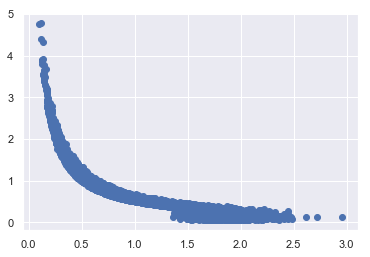

<Figure size 432x288 with 0 Axes>

In [166]:
plt.scatter(n_arr22, y_arr22)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()


save_result("Adam_1650375122", plt, n_arr22, y_arr22)

In [132]:
# Adam_1642197562   / 3 crit
a2, b2, y_arr2, n_arr2 = v4_prepare_data_from_files('Adam_1650314680', 0.5)
print(a2, b2)

1      [0, 0.22155305897642585, 1.0, 1.0, 338214.2266081713]
0.1156429764937602
0 || 0.5157010467172183 || 1 || 1 
0      [0, 79.09847536474898, 0.1, 0.0, 445900.757617162]
0.07535197075630881
0 || 0.5105441827392089 || 0 || 0 
0      [0, 91.22767845034801, 1.0, 0.0, 165491.28029027762]
0.24933888261659679
0 || 0.5378129655284505 || 0 || 0 
1      [0, 50.15123452944997, 0.1, 1.0, 131790.0916558626]
0.24566827301842584
0 || 0.5364393402115164 || 1 || 1 
0      [0, 17.078882626673924, 0.1, 0.0, 727183.7914490601]
0.0455818282700881
0 || 0.5064787369203719 || 0 || 0 
1      [1, 75.40551626910951, 1.0, 1.0, 646027.4120843044]
0.06714385856516986
1 || 0.5072839231135352 || 1 || 1 
1      [1, 44.8269426419933, 1.0, 1.0, 1053667.7488367185]
0.030900840320523596
1 || 0.5043651017146992 || 1 || 1 
0      [1, 84.87996661645265, 0.5, 0.0, 794002.2552931902]
0.056514735622781066
1 || 0.5058243395851154 || 0 || 0 
0      [1, 30.93457905135483, 0.5, 0.0, 138828.2551817873]
0.3382381778845192
1 || 0.

0.09217315176444997
14 || 0.5122068286069016 || 0 || 0 
0      [14, 57.58795373273304, 1.0, 0.0, 135522.1495756035]
0.25282371356591443
14 || 0.5384086694917761 || 0 || 0 
0      [14, 38.38606000317764, 0.5, 0.0, 886592.1247359421]
0.07448020562778034
14 || 0.5038251491170759 || 0 || 0 
0      [14, 57.2710011370734, 0.5, 0.0, 1475534.0205180007]
0.03288348724261507
14 || 0.5028073902264651 || 0 || 0 
1      [15, 40.239799358446064, 0.1, 1.0, 685906.9017242814]
0.0555778728787286
15 || 0.5067495050844226 || 1 || 1 
0      [15, 57.5852078021049, 1.0, 0.0, 199732.48771550923]
0.16779759424106588
15 || 0.5243013902686136 || 0 || 0 
1      [15, 0.579923922390152, 1.0, 1.0, 195719.797556704]
0.22428595657455852
15 || 0.5295209267275531 || 1 || 1 
0      [15, 53.022308965877244, 0.1, 0.0, 104977.18688280298]
0.38049657967753453
15 || 0.5604768670838332 || 0 || 0 
0      [15, 53.4230998447227, 1.0, 0.0, 1762216.8145508042]
0.058348195887317704
15 || 0.5009656508243946 || 0 || 0 
0      [16, 28

0.18184081616369965
28 || 0.5302582548140242 || 0 || 0 
0      [29, 67.6993844975213, 0.0, 0.0, 591726.3743789973]
0.05942222100123439
29 || 0.50776915158955 || 0 || 0 
0      [29, 96.60708269857213, 0.0, 0.0, 160605.73713015384]
0.21180766883243143
29 || 0.5311672909719298 || 0 || 0 
0      [29, 42.51359331977446, 0.5, 0.0, 1085187.7999118436]
0.06387359788324436
29 || 0.5030538282750278 || 0 || 0 
0      [29, 6.268629167790896, 0.5, 0.0, 147605.13693427766]
0.2952901305224345
29 || 0.5416110372060388 || 0 || 0 
0      [29, 50.941604670269626, 0.0, 0.0, 66358.49097618545]
0.5447818652644486
29 || 0.5726747420271484 || 0 || 0 
0      [30, 53.22026140500504, 0.1, 0.0, 1814527.8397018735]
0.06707985309203883
30 || 0.5006532756267361 || 0 || 0 
0      [30, 90.24751349465402, 0.5, 0.0, 1751626.1297534937]
0.027266648990658712
30 || 0.5024379598814007 || 0 || 0 
0      [30, 33.902168993143555, 0.5, 0.0, 1088059.9278322423]
0.06429334147856251
30 || 0.5028945578813424 || 0 || 0 
0      [30, 

0.06322282994168173
43 || 0.5029942078605238 || 0 || 0 
0      [43, 82.63175998952103, 1.0, 0.0, 1179829.563381017]
0.05634933639153091
43 || 0.5027436413097587 || 0 || 0 
0      [43, 84.70851601175417, 1.0, 0.0, 1035376.5050274548]
0.01709825208448246
43 || 0.5037082866860725 || 0 || 0 
1      [44, 20.516400789947063, 0.1, 1.0, 631025.2342400814]
0.07906625927622501
44 || 0.5068527115822393 || 1 || 1 
0      [44, 60.9533730210455, 0.5, 0.0, 391067.2092040555]
0.0793934307065682
44 || 0.5118277214497846 || 0 || 0 
0      [44, 47.96894819502137, 0.5, 0.0, 548676.869240293]
0.07052989984979706
44 || 0.5083111656942051 || 0 || 0 
0      [44, 19.53289494381262, 0.0, 0.0, 680415.630939545]
0.0499288873151518
44 || 0.5067582419149589 || 0 || 0 
0      [44, 84.53311629120314, 1.0, 0.0, 1954597.0600010743]
0.05616111456382949
44 || 0.5008268676540191 || 0 || 0 
1      [45, 93.85191548839826, 0.5, 1.0, 351282.14627297904]
0.08912317411857847
45 || 0.5138286803881951 || 1 || 1 
0      [45, 8.179

0.06191933730558869
58 || 0.5013501228906809 || 1 || 1 
0      [58, 21.586608754861576, 0.1, 0.0, 142638.15236960986]
0.2895873982489449
58 || 0.542381268004491 || 0 || 0 
0      [58, 84.3906911769622, 1.0, 0.0, 542298.2304284722]
0.08155665915411961
58 || 0.5088186692726977 || 0 || 0 
0      [58, 50.897589175935366, 0.5, 0.0, 764555.433517852]
0.057576068196748376
58 || 0.5058346251291561 || 0 || 0 
0      [59, 8.597565157057375, 0.5, 0.0, 156562.54072543926]
0.2725589675962372
59 || 0.5353783291078537 || 0 || 0 
1      [59, 95.46575029128397, 1.0, 1.0, 345048.1380726669]
0.13051573814901368
59 || 0.5146956294124113 || 1 || 1 
0      [59, 91.80672998410711, 0.5, 0.0, 460629.1907367018]
0.08612522176145504
59 || 0.5099968439447198 || 0 || 0 
0      [59, 8.117095293119414, 0.5, 0.0, 354847.4323383165]
0.08796126203625886
59 || 0.5133821136979783 || 0 || 0 
1      [59, 54.01840116536833, 0.0, 1.0, 3448477.783001343]
0.0509583763426347
59 || 0.5000982129362045 || 1 || 1 
0      [60, 19.20

0.37443991009180433
72 || 0.5516751915644793 || 0 || 0 
0      [72, 41.147039756513585, 0.0, 0.0, 1114528.0263945903]
0.06782130245428591
72 || 0.5025516852795623 || 0 || 0 
0      [72, 76.63279874600461, 0.1, 0.0, 474786.5641689845]
0.08028635402049249
72 || 0.5098208219764383 || 0 || 0 
0      [73, 2.061316644066485, 1.0, 0.0, 736537.3786052974]
0.04054817912016579
73 || 0.5065361049562482 || 0 || 0 
0      [73, 5.641264700195875, 0.5, 0.0, 2801900.112626605]
0.045035691623279535
73 || 0.5003770596703204 || 0 || 0 
0      [73, 21.433629509579678, 0.1, 0.0, 426185.1988850352]
0.08842905339433348
73 || 0.51072649309272 || 0 || 0 
1      [73, 94.60634593011893, 0.0, 1.0, 510394.03855075175]
0.07640232970609823
73 || 0.5094698822352952 || 1 || 1 
1      [73, 19.289116798055456, 0.0, 1.0, 121446.20828107574]
0.3515079925570665
73 || 0.5526042083089134 || 1 || 1 
0      [74, 23.641176970660872, 0.0, 0.0, 157173.5099906]
0.20580799296328425
74 || 0.532058654260129 || 0 || 0 
0      [74, 29.

0.20124027309945344
87 || 0.5301690542079194 || 0 || 0 
0      [87, 35.46688288024426, 0.5, 0.0, 1430709.0819689105]
0.023355491032044363
87 || 0.5031727139967326 || 0 || 0 
0      [87, 83.77778427128888, 1.0, 0.0, 89229.90691845397]
0.44778579632309046
87 || 0.5720429576722755 || 0 || 0 
0      [87, 88.98864598455074, 0.0, 0.0, 107379.4121356326]
0.35938651201756106
87 || 0.5541552197230065 || 0 || 0 
0      [87, 85.40977771374803, 1.0, 0.0, 1836853.0218009702]
0.03138486733257289
87 || 0.5020737403576856 || 0 || 0 
1      [88, 56.759128349845376, 0.0, 1.0, 366549.089194908]
0.09001158974241114
88 || 0.5129588760176103 || 1 || 1 
0      [88, 23.170853451804152, 1.0, 0.0, 225723.08185005875]
0.1852798739532789
88 || 0.5231565522688392 || 0 || 0 
0      [88, 34.837723822812116, 0.5, 0.0, 723708.5796717919]
0.036613988911353944
88 || 0.5061718782745208 || 0 || 0 
0      [88, 59.279851763466496, 0.5, 0.0, 247217.6131803238]
0.15083574474792869
88 || 0.5189726031025895 || 0 || 0 
0      [8

0.07988730468359324
101 || 0.5113015483443119 || 0 || 0 
0      [101, 86.31426678655923, 0.1, 0.0, 81460.14993233688]
0.500963781071904
101 || 0.5868852847582829 || 0 || 0 
0      [101, 0.9150811535229397, 0.1, 0.0, 601962.8199982925]
0.07081642913363374
101 || 0.5077236037990585 || 0 || 0 
1      [101, 85.87275272961736, 0.1, 1.0, 467939.3141361953]
0.08743663829797095
101 || 0.5099062901173581 || 1 || 1 
0      [102, 59.804192596339036, 1.0, 0.0, 160085.0733536439]
0.2272747941395867
102 || 0.5315575759592225 || 0 || 0 
0      [102, 45.90603112566814, 1.0, 0.0, 749228.9777692556]
0.04723058439477029
102 || 0.5061172241839247 || 0 || 0 
0      [102, 24.075608681163786, 0.5, 0.0, 375223.34514640935]
0.10329995287913664
102 || 0.5137495470865501 || 0 || 0 
0      [102, 32.865801640470494, 0.0, 0.0, 66592.43022404172]
0.5589777120163542
102 || 0.6006793880006135 || 0 || 0 
0      [102, 10.434471214953339, 0.1, 0.0, 315038.62856073387]
0.11174548853909515
102 || 0.5153150785575241 || 0 ||

0.05084776175175593
115 || 0.5069533267293599 || 0 || 0 
1      [115, 81.92429395468245, 0.0, 1.0, 154283.7078239462]
0.2581700621874594
115 || 0.5343817713609185 || 1 || 1 
1      [115, 32.483272566898144, 0.0, 1.0, 590471.918550217]
0.04902733833124759
115 || 0.507776213014195 || 1 || 1 
0      [116, 90.22558565826519, 0.5, 0.0, 956483.4974694651]
0.03649592727666805
116 || 0.5048563846373115 || 0 || 0 
0      [116, 37.30503638858597, 0.1, 0.0, 1337531.143695737]
0.02466145463769215
116 || 0.5034403953689589 || 0 || 0 
0      [116, 41.2968095293007, 0.5, 0.0, 1653040.627464245]
0.03790442154249762
116 || 0.5022031302839848 || 0 || 0 
0      [116, 14.736899675767761, 1.0, 0.0, 166986.42409266494]
0.2518162951459862
116 || 0.5355395911980179 || 0 || 0 
0      [116, 48.106758751642836, 0.1, 0.0, 285755.8625174875]
0.12693996618749753
116 || 0.5167883277198718 || 0 || 0 
0      [117, 73.64050879467545, 1.0, 0.0, 412187.9931708442]
0.07783735222398151
117 || 0.5112704999990298 || 0 || 0 


129 || 0.500300106585597 || 1 || 1 
0      [129, 3.9317130264070297, 0.1, 0.0, 815137.7022457814]
0.044559257290146696
129 || 0.505613645097248 || 0 || 0 
0      [129, 54.98821628215074, 0.5, 0.0, 119911.5641965348]
0.31939101105847656
129 || 0.5438409066119485 || 0 || 0 
0      [130, 83.75351862897065, 0.1, 0.0, 86337.88583802275]
0.49400083915887155
130 || 0.577267513745822 || 0 || 0 
0      [130, 8.825759580571269, 1.0, 0.0, 2522190.3922630423]
0.052833395089104285
130 || 0.500370066539107 || 0 || 0 
0      [130, 13.667582389466187, 1.0, 0.0, 708208.6328798116]
0.05063062301847381
130 || 0.5069288052449785 || 0 || 0 
0      [130, 90.17337026575427, 0.0, 0.0, 492431.8737943505]
0.06399894576958834
130 || 0.5093233612766103 || 0 || 0 
0      [130, 46.953330286590024, 1.0, 0.0, 981967.1622520356]
0.048490114854681236
130 || 0.5043441643171568 || 0 || 0 
0      [131, 26.78560540539321, 1.0, 0.0, 834578.6764411031]
0.05109585474117886
131 || 0.505456066919033 || 0 || 0 
0      [131, 90.6

0.05622541970460132
143 || 0.5083011920237785 || 1 || 1 
0      [143, 70.65411717798878, 0.0, 0.0, 85842.80781553536]
0.43687794779918404
143 || 0.5560996081464211 || 0 || 0 
1      [144, 40.359040885689325, 0.1, 1.0, 2691938.572344918]
0.04896117507034711
144 || 0.500356644375181 || 1 || 1 
1      [144, 18.820440158000977, 1.0, 1.0, 1616258.8967533535]
0.03964663571619132
144 || 0.5021909520494212 || 1 || 1 
0      [144, 10.797479963152728, 0.0, 0.0, 1593289.5890398487]
0.018934468769769456
144 || 0.5029326316478521 || 0 || 0 
0      [144, 50.651103072825485, 0.1, 0.0, 555521.6408107876]
0.06214102733628149
144 || 0.5083069578260792 || 0 || 0 
0      [144, 47.94953365917649, 0.1, 0.0, 124938.31755348228]
0.2987650959478676
144 || 0.5394119302026579 || 0 || 0 
1      [145, 98.09926941810197, 0.5, 1.0, 895933.6645393552]
0.024131853818457366
145 || 0.5046908156688119 || 1 || 1 
0      [145, 74.72168094404597, 0.0, 0.0, 165557.79889579152]
0.2110406179973767
145 || 0.528086859163963 || 0

0.05093403647918806
157 || 0.5078118516907065 || 0 || 0 
0      [157, 67.18209830609464, 0.1, 0.0, 3695685.7940297346]
0.050257182811526614
157 || 0.5000733793876824 || 0 || 0 
0      [158, 37.286984327349494, 1.0, 0.0, 725060.0831004067]
0.056089404749147975
158 || 0.5063417326437933 || 0 || 0 
0      [158, 68.02285942909876, 1.0, 0.0, 1301624.610090808]
0.06702885487684968
158 || 0.5018309444695188 || 0 || 0 
0      [158, 35.12144651883597, 1.0, 0.0, 819115.4609934178]
0.050677441919092375
158 || 0.5055654325992746 || 0 || 0 
1      [158, 14.738393116771059, 1.0, 1.0, 544698.049769127]
0.10106096856337994
158 || 0.5081163966187461 || 1 || 1 
0      [158, 46.8577619848932, 1.0, 0.0, 290322.42166554776]
0.11011109659010365
158 || 0.5168432256284 || 0 || 0 
0      [159, 48.26849902029308, 0.5, 0.0, 108405.41373060424]
0.329704918226024
159 || 0.5465553468383877 || 0 || 0 
0      [159, 7.3172709976986825, 1.0, 0.0, 2516415.697360632]
0.03276321800361034
159 || 0.5010228542908046 || 0 || 

0.4666303856567739
171 || 0.5698424198419911 || 0 || 0 
0      [171, 49.49998742281835, 0.0, 0.0, 249309.8948745013]
0.1274215396263321
171 || 0.5199629571985905 || 0 || 0 
1      [172, 95.68098071543163, 1.0, 1.0, 409743.67376048944]
0.08807641573797188
172 || 0.5127522862088737 || 1 || 1 
1      [172, 72.71041914222327, 1.0, 1.0, 324684.30410877423]
0.11148243060184297
172 || 0.5162755703412064 || 1 || 1 
0      [172, 87.76415156851407, 0.0, 0.0, 964443.2327816517]
0.04816253850096124
172 || 0.5044794133670726 || 0 || 0 
0      [172, 52.01923017713612, 0.0, 0.0, 305821.74382964405]
0.11516783562859151
172 || 0.5168387810101478 || 0 || 0 
0      [172, 51.618589564426884, 0.5, 0.0, 113301.0173483004]
0.29386429427394645
172 || 0.5421134513761054 || 0 || 0 
0      [173, 2.919937030711833, 1.0, 0.0, 778780.1159578027]
0.06713387264325042
173 || 0.5057875375214538 || 0 || 0 
0      [173, 97.29513573313152, 0.5, 0.0, 721547.5413775472]
0.05562816427352101
173 || 0.5063050527260433 || 0 || 

0.05700437479541525
185 || 0.5009971807335952 || 0 || 0 
1      [186, 50.66209561309161, 0.5, 1.0, 590374.5891594916]
0.06210516828132545
186 || 0.5077713179347985 || 1 || 1 
0      [186, 42.108193378302914, 0.5, 0.0, 1692599.4232435694]
0.07483320074095036
186 || 0.5006148903955471 || 0 || 0 
0      [186, 11.284067285299294, 0.0, 0.0, 154890.5374701267]
0.21959869217751327
186 || 0.5300371314071299 || 0 || 0 
0      [186, 80.41309134717285, 0.5, 0.0, 472036.10052224045]
0.0828231986715648
186 || 0.510721629618627 || 0 || 0 
0      [186, 34.89139874837634, 0.0, 0.0, 139499.77551687852]
0.27242081710001903
186 || 0.5368151878892469 || 0 || 0 
0      [187, 91.30978211744144, 0.5, 0.0, 1439207.5139519176]
0.04010685566916531
187 || 0.5026772453083109 || 0 || 0 
0      [187, 2.652336518540693, 0.5, 0.0, 534410.9795196315]
0.06711588540254483
187 || 0.5088238633193437 || 0 || 0 
1      [187, 21.668576417928527, 0.0, 1.0, 477588.0012061451]
0.07368488425235944
187 || 0.5096314694140804 || 1 

0.4167546125390949
199 || 0.5625663114321481 || 1 || 1 
0      [200, 76.69198437712053, 1.0, 0.0, 1881231.3383185582]
0.05214468491497778
200 || 0.5009790715629263 || 0 || 0 
0      [200, 15.809563675578865, 0.5, 0.0, 1108095.494644883]
0.046885018012523816
200 || 0.5038047686290398 || 0 || 0 
0      [200, 61.42617335662668, 0.0, 0.0, 200201.72801241535]
0.1760923933875551
200 || 0.5259915226569135 || 0 || 0 
0      [200, 18.54334182161952, 1.0, 0.0, 1487712.6274535253]
0.010840245650734026
200 || 0.5025272497659634 || 0 || 0 
0      [200, 21.802324427787838, 0.5, 0.0, 2770486.410734929]
0.09194968074133741
200 || 0.5000170058990256 || 0 || 0 
0      [201, 3.058261983793992, 1.0, 0.0, 1108728.8163489092]
0.024912063811439303
201 || 0.5041456938859785 || 0 || 0 
1      [201, 41.79304652619676, 1.0, 1.0, 597506.2103398084]
0.07048991659517538
201 || 0.5077420711121757 || 1 || 1 
0      [201, 70.85102241758861, 0.5, 0.0, 427476.2502402443]
0.08859874464815225
201 || 0.5103073082876604 || 

0.10538493874451636
214 || 0.5134446833697781 || 0 || 0 
0      [214, 42.46595855904561, 1.0, 0.0, 1112869.1211918588]
0.07349147189260839
214 || 0.5023320519673966 || 0 || 0 
0      [214, 43.53284816503023, 0.1, 0.0, 270006.2426300407]
0.11582324114624117
214 || 0.5186837077218068 || 0 || 0 
0      [214, 49.70379070685761, 1.0, 0.0, 456368.2874275792]
0.08004976610682071
214 || 0.5101016122786807 || 0 || 0 
0      [214, 89.00374239079264, 0.5, 0.0, 183840.56198066144]
0.18085729177798196
214 || 0.5291364842640496 || 0 || 0 
0      [215, 74.74450423093354, 0.0, 0.0, 561152.6234230339]
0.06080678407945083
215 || 0.5080780815035704 || 0 || 0 
0      [215, 79.77431935974579, 1.0, 0.0, 3116977.4118717713]
0.04208893722526357
215 || 0.5003185973656431 || 0 || 0 
0      [215, 0.09866577416896005, 0.1, 0.0, 122896.44496462695]
0.2894286817401039
215 || 0.5397484113640872 || 0 || 0 
0      [215, 65.23593043720973, 1.0, 0.0, 442166.0287116338]
0.06724059658347865
215 || 0.5105402790136253 || 0 

0.08985362648073288
228 || 0.5143631999251814 || 0 || 0 
0      [228, 26.51863049994375, 1.0, 0.0, 740159.9993388682]
0.05482739937488615
228 || 0.5061585887107857 || 0 || 0 
0      [228, 67.56060267357465, 0.1, 0.0, 371508.286295377]
0.08493706977549158
228 || 0.5123891701067701 || 0 || 0 
0      [229, 77.67061258598254, 0.1, 0.0, 620052.3539320097]
0.05213813945093968
229 || 0.5074560336905942 || 0 || 0 
0      [229, 19.209886729587865, 0.1, 0.0, 328934.72887132317]
0.10602236000521957
229 || 0.5140103466700977 || 0 || 0 
0      [229, 72.89346094223522, 1.0, 0.0, 1211464.887363602]
0.06963379305989274
229 || 0.5021568353583362 || 0 || 0 
0      [229, 37.006540757008246, 1.0, 0.0, 865718.2622953224]
0.04421121153564245
229 || 0.5051514775036072 || 0 || 0 
0      [229, 5.412939491249497, 1.0, 0.0, 639074.2407686413]
0.06792683074083213
229 || 0.5071455959187615 || 0 || 0 
0      [230, 75.04038004130521, 0.0, 0.0, 106319.97637303533]
0.3109964339152602
230 || 0.5433040156074365 || 0 || 

0.025194662411494425
242 || 0.5018637537178183 || 0 || 0 
0      [243, 94.02016516277568, 1.0, 0.0, 245867.38471476454]
0.14264334703250334
243 || 0.5221114798843539 || 0 || 0 
1      [243, 30.087233684113603, 0.0, 1.0, 2058046.9363633564]
0.04687990267585566
243 || 0.5009670959653968 || 1 || 1 
0      [243, 98.60595971517003, 0.1, 0.0, 708872.1961491465]
0.04876958082172433
243 || 0.5064894065992674 || 0 || 0 
0      [243, 34.33510593224244, 0.0, 0.0, 448035.0022738307]
0.07570968121193734
243 || 0.5102606764841531 || 0 || 0 
0      [243, 33.42248609322785, 0.1, 0.0, 331481.04515146726]
0.13538463302893056
243 || 0.5142974256646953 || 0 || 0 
0      [244, 27.938544966081135, 1.0, 0.0, 355404.525673418]
0.11126902278959229
244 || 0.5138059821436619 || 0 || 0 
1      [244, 23.390076890762835, 0.1, 1.0, 1187267.4852428276]
0.04917183028455357
244 || 0.50321669124374 || 1 || 1 
0      [244, 65.48933281094523, 0.0, 0.0, 210050.1323079566]
0.15120213590419165
244 || 0.5227398991833943 || 0 

0.03222903546383678
257 || 0.5008745134605075 || 0 || 0 
0      [257, 23.894008584190395, 1.0, 0.0, 1766359.7966967495]
0.056910534307167915
257 || 0.5010143313471749 || 0 || 0 
1      [257, 85.4241147434208, 0.1, 1.0, 204245.99776751516]
0.17043597347351744
257 || 0.5233375428159641 || 1 || 1 
0      [257, 11.415879221447856, 1.0, 0.0, 739714.1946837767]
0.05089840660903614
257 || 0.5064077484318878 || 0 || 0 
0      [257, 40.04563098253561, 0.1, 0.0, 588347.1053172761]
0.059684826729169076
257 || 0.5080727535454868 || 0 || 0 
0      [258, 56.87846311255842, 0.0, 0.0, 1092863.3004844529]
0.0263280667010906
258 || 0.5041333239421877 || 0 || 0 
0      [258, 4.263557263466872, 0.1, 0.0, 605183.8658296935]
0.07026255093477822
258 || 0.5074289214880174 || 0 || 0 
1      [258, 67.14715279043331, 0.1, 1.0, 1557615.5456715235]
0.02038889731677805
258 || 0.5029428035428529 || 1 || 1 
0      [258, 70.73005042892338, 0.1, 0.0, 672657.7479251432]
0.032721877157462595
258 || 0.506351161830906 || 0

0.12017370739772903
271 || 0.513213961943889 || 1 || 1 
0      [271, 7.138064046638082, 0.5, 0.0, 2551587.3984506256]
0.020015786229565926
271 || 0.501635146000118 || 0 || 0 
0      [271, 52.048371198083984, 1.0, 0.0, 2358923.5647009034]
0.06460081376796818
271 || 0.5002502691817046 || 0 || 0 
0      [271, 37.44416532939162, 1.0, 0.0, 1350971.260977706]
0.04200962024813201
271 || 0.5028858909442356 || 0 || 0 
1      [271, 70.00218639845623, 0.0, 1.0, 443820.16958450055]
0.08700607567298317
271 || 0.5106892203680543 || 1 || 1 
0      [272, 19.04779960821602, 0.1, 0.0, 321050.8649405015]
0.12680995512866142
272 || 0.514686471886396 || 0 || 0 
0      [272, 91.36386557331898, 0.5, 0.0, 1105221.936695761]
0.0541081173738752
272 || 0.5034167692825953 || 0 || 0 
0      [272, 6.789731924120257, 0.0, 0.0, 231437.23670655693]
0.1563481920287475
272 || 0.5202532370869224 || 0 || 0 
0      [272, 86.58322597047004, 0.1, 0.0, 1117139.9302701792]
0.07530352366674686
272 || 0.5022791412492557 || 0 || 

0.4148094182652866
285 || 0.5583024132751595 || 0 || 0 
0      [285, 20.373226403123862, 0.1, 0.0, 72926.79785260072]
0.5784903849833934
285 || 0.5826983167174645 || 0 || 0 
0      [285, 88.47170119281911, 0.0, 0.0, 1197596.7094008161]
0.05024084587816027
285 || 0.503092741700641 || 0 || 0 
0      [285, 62.30433419390218, 0.5, 0.0, 294886.5826170177]
0.14196652310738672
285 || 0.5172486305783973 || 0 || 0 
0      [285, 63.648404264507676, 0.5, 0.0, 749524.3589237423]
0.0459394239068317
285 || 0.5060877043102094 || 0 || 0 
0      [286, 63.5532710733133, 1.0, 0.0, 309692.8373449831]
0.10912351984924902
286 || 0.5157375515284671 || 0 || 0 
1      [286, 32.28629385979296, 0.0, 1.0, 181610.81702794653]
0.19707110096363464
286 || 0.5265581097437725 || 1 || 1 
0      [286, 47.58216579518826, 0.5, 0.0, 154293.26814168278]
0.24171692702983127
286 || 0.5349867959821307 || 0 || 0 
1      [286, 2.0499557209998853, 0.0, 1.0, 309206.16389480786]
0.11009718782877469
286 || 0.5149087845083837 || 1 || 

0.060705485892942807
299 || 0.5056056551660499 || 0 || 0 
1      [299, 86.70475917574542, 0.0, 1.0, 410799.23706913105]
0.07449230739216188
299 || 0.5112042698807687 || 1 || 1 
0      [299, 5.427662798870076, 0.1, 0.0, 475020.9545868847]
0.0712237728965583
299 || 0.5097248484476425 || 0 || 0 
0      [299, 65.53819530994383, 0.0, 0.0, 356985.34859783767]
0.09617820263911891
299 || 0.513368781385117 || 0 || 0 
0      [299, 33.697792696332215, 0.1, 0.0, 560152.2322812673]
0.06397696413727352
299 || 0.5082213173768723 || 0 || 0 
1      [300, 35.48457436254912, 0.1, 1.0, 772495.1338468917]
0.056583021951204765
300 || 0.5057839853341677 || 1 || 1 
0      [300, 11.099680336132527, 0.0, 0.0, 250220.31570076104]
0.16858146054660697
300 || 0.5198546457616176 || 0 || 0 
0      [300, 47.851488838291715, 0.1, 0.0, 1945540.556596922]
0.03696216114089817
300 || 0.5016013549943057 || 0 || 0 
0      [300, 98.20441782103492, 0.5, 0.0, 535254.7955710066]
0.06317808049895891
300 || 0.5089454098506665 || 0

0.31208873473764487
313 || 0.5467638715758877 || 0 || 0 
0      [313, 45.02719438567714, 0.1, 0.0, 1230365.5164193045]
0.019160176924587203
313 || 0.5035746613569682 || 0 || 0 
1      [313, 55.128555513261176, 1.0, 1.0, 796457.8257915901]
0.0537099577106347
313 || 0.5055363976821963 || 1 || 1 
0      [314, 48.354797508366595, 0.5, 0.0, 153630.51898772095]
0.22601983523680627
314 || 0.5311669417182521 || 0 || 0 
0      [314, 27.02617803693115, 0.1, 0.0, 77901.16457392057]
0.43175102732685483
314 || 0.560430445595405 || 0 || 0 
0      [314, 85.18053889553643, 0.0, 0.0, 524471.2640636935]
0.08148892461627552
314 || 0.5089409221069131 || 0 || 0 
0      [314, 62.44584877581949, 1.0, 0.0, 135971.62055190976]
0.3117516726293409
314 || 0.5376757136433357 || 0 || 0 
1      [314, 50.03224715845994, 0.0, 1.0, 776195.9395883806]
0.030647540707531926
314 || 0.5056366008177238 || 1 || 1 
1      [315, 14.328320231846892, 0.0, 1.0, 139501.26579011336]
0.25982190677774053
315 || 0.5337225235207955 || 1

0.053402456211279
327 || 0.5057867283475385 || 0 || 0 
0      [328, 30.39811914581924, 0.0, 0.0, 275923.67756368336]
0.1408091806702476
328 || 0.519255640657224 || 0 || 0 
0      [328, 58.27016076863211, 0.5, 0.0, 866665.2397587788]
0.0469053700485832
328 || 0.5052080674122997 || 0 || 0 
0      [328, 96.35497041903915, 1.0, 0.0, 1056027.8735405877]
0.03302033162761777
328 || 0.5042769027288759 || 0 || 0 
1      [328, 51.481732830775194, 1.0, 1.0, 235693.5725246384]
0.15871918832540624
328 || 0.5234822276871242 || 1 || 1 
1      [328, 82.72443382073276, 0.1, 1.0, 491434.5041998343]
0.0827847595688319
328 || 0.5092524454664047 || 1 || 1 
0      [329, 15.495025199232092, 0.0, 0.0, 139000.38958303476]
0.2379236611572122
329 || 0.5382481471794233 || 0 || 0 
0      [329, 0.43825918399847397, 1.0, 0.0, 82682.83609860395]
0.5272230349992998
329 || 0.5895298174175961 || 0 || 0 
0      [329, 97.79745219472589, 0.5, 0.0, 1124527.4815973646]
0.052257663476086236
329 || 0.5034304880407675 || 0 || 0

0.04925036694997637
341 || 0.5064966218988003 || 1 || 1 
0      [342, 3.4018507481494153, 0.5, 0.0, 186794.36544555065]
0.21338364962927955
342 || 0.5315283503578746 || 0 || 0 
0      [342, 31.86736703706329, 1.0, 0.0, 264914.56982218515]
0.14783611276340858
342 || 0.5182383706760274 || 0 || 0 
0      [342, 44.78294845037033, 0.0, 0.0, 73223.84837165764]
0.5903967354754361
342 || 0.5747759671222082 || 0 || 0 
0      [342, 5.286857329535005, 0.1, 0.0, 185782.79037795617]
0.1967655408765253
342 || 0.5252739898598947 || 0 || 0 
0      [342, 37.66451508676793, 0.1, 0.0, 861779.9088683855]
0.05740868610063429
342 || 0.5048646305372356 || 0 || 0 
0      [343, 54.95912591780628, 0.1, 0.0, 386234.7808145332]
0.1054172020381151
343 || 0.5118076923160654 || 0 || 0 
0      [343, 67.8893765413126, 1.0, 0.0, 1931297.2369661613]
0.05031519744301077
343 || 0.5010289453411204 || 0 || 0 
0      [343, 20.71608879350981, 0.0, 0.0, 158886.1808328924]
0.25744681348842563
343 || 0.5377370187851715 || 0 || 0

0.057507114925966614
356 || 0.5042796772589748 || 0 || 0 
0      [356, 88.08429726554085, 0.1, 0.0, 563987.8950451305]
0.06410922602002865
356 || 0.5081870811786849 || 0 || 0 
0      [356, 66.88096698616353, 0.1, 0.0, 455877.33839117363]
0.08963558206813449
356 || 0.5105927465236261 || 0 || 0 
1      [356, 71.16774673247086, 0.5, 1.0, 819356.6940944771]
0.040109097628897916
356 || 0.5057987240813527 || 1 || 1 
1      [357, 61.89101949587066, 0.5, 1.0, 72561.86446188261]
0.5426127147944468
357 || 0.5690311410503425 || 1 || 0 
0      [357, 30.64572060248195, 1.0, 0.0, 122112.10474553553]
0.3294491765383424
357 || 0.5445705486917509 || 0 || 0 
0      [357, 55.1054337016266, 1.0, 0.0, 396913.0735677524]
0.08252061354173047
357 || 0.5124424438651904 || 0 || 0 
0      [357, 18.742629571054557, 0.5, 0.0, 1246076.9217457704]
0.03351262186355781
357 || 0.5035254481703135 || 0 || 0 
0      [357, 67.28421548589989, 1.0, 0.0, 101571.01098558921]
0.40068262846048003
357 || 0.5593865743523512 || 0 |

0.13662026436028693
370 || 0.5197128534564678 || 0 || 0 
0      [370, 11.88950414059673, 0.0, 0.0, 257184.29136486506]
0.11978560400198628
370 || 0.5183477737765433 || 0 || 0 
0      [371, 3.693025246337278, 0.1, 0.0, 461106.7591893218]
0.07605053169808954
371 || 0.5104917144617607 || 0 || 0 
0      [371, 80.12276705098267, 1.0, 0.0, 401344.3916719302]
0.09149825173099962
371 || 0.5121593083533331 || 0 || 0 
0      [371, 23.55500539554386, 0.5, 0.0, 404720.1139078891]
0.08400565295621565
371 || 0.5126673687845998 || 0 || 0 
0      [371, 23.21127080425921, 1.0, 0.0, 1650665.813898935]
0.027366410452709503
371 || 0.5026224419349747 || 0 || 0 
0      [371, 71.01026966704373, 1.0, 0.0, 269863.020893094]
0.11816443099638652
371 || 0.5182929652095304 || 0 || 0 
0      [372, 41.665816629993216, 0.1, 0.0, 573042.7014429662]
0.049319844937383624
372 || 0.5080978206469863 || 0 || 0 
1      [372, 77.97384654810227, 0.0, 1.0, 1877731.1346637364]
0.0621487465003892
372 || 0.5007551885820034 || 1 ||

0      [385, 76.0787929068744, 1.0, 0.0, 1394215.255700341]
0.03519881438265378
385 || 0.5029305499771003 || 0 || 0 
1      [385, 8.39016578768192, 0.1, 1.0, 268415.528935564]
0.1376011459844428
385 || 0.5202844867866028 || 1 || 1 
1      [385, 82.65906407501427, 0.0, 1.0, 381025.89672818646]
0.10195340795093653
385 || 0.5119800149016 || 1 || 1 
0      [385, 14.066462292928444, 0.1, 0.0, 1309622.0334206903]
0.03149300391667703
385 || 0.503445392867939 || 0 || 0 
1      [385, 26.26513461031381, 0.0, 1.0, 2860366.163838605]
0.036812006264510526
385 || 0.5005727867039288 || 1 || 1 
0      [386, 12.96788866124548, 0.1, 0.0, 693753.3312638992]
0.06244756087477166
386 || 0.5064220581399147 || 0 || 0 
0      [386, 39.73077055245674, 1.0, 0.0, 127958.96506221121]
0.3566270326722667
386 || 0.5429966932472252 || 0 || 0 
0      [386, 13.323126769009525, 1.0, 0.0, 314519.43811419705]
0.10777752182446076
386 || 0.5163895601050553 || 0 || 0 
0      [386, 44.8262120081773, 0.0, 0.0, 370009.1292518772

0.0797592962650917
399 || 0.5112856856435 || 0 || 0 
0      [399, 59.80060243880057, 1.0, 0.0, 232951.4512741804]
0.16837074393635976
399 || 0.5230569644741281 || 0 || 0 
0      [399, 6.911014251380299, 0.0, 0.0, 110813.63690439393]
0.3261559267111422
399 || 0.5423467793417561 || 0 || 0 
0      [399, 25.26315849441858, 0.5, 0.0, 202245.80760360282]
0.17727508309387988
399 || 0.5247681746697221 || 0 || 0 
0      [400, 45.489515416051454, 0.0, 0.0, 691185.6877370012]
0.04933823536506169
400 || 0.5066626863920931 || 0 || 0 
0      [400, 51.08175314632629, 1.0, 0.0, 704454.2298599222]
0.0476229668437504
400 || 0.5068215365664929 || 0 || 0 
0      [400, 2.9668813839399624, 1.0, 0.0, 975095.7369658265]
0.05482697187209961
400 || 0.5040264998720898 || 0 || 0 
0      [400, 8.270228782681045, 0.1, 0.0, 326482.17091887904]
0.10932599408532818
400 || 0.5141594079394709 || 0 || 0 
0      [400, 38.03627954526144, 0.5, 0.0, 540013.7727007472]
0.06700940353810829
400 || 0.5084266522345784 || 0 || 0 


0.20795047580458317
413 || 0.5303540038160384 || 0 || 0 
0      [413, 51.80103927498859, 0.0, 0.0, 61948.21365344653]
0.6308585623731494
413 || 0.5978048012176629 || 0 || 0 
1      [414, 35.68002351768924, 0.1, 1.0, 191507.5247640515]
0.1895352117397278
414 || 0.5244881436609655 || 1 || 1 
1      [414, 24.57308487246559, 0.5, 1.0, 813951.0429348892]
0.07372685976977945
414 || 0.5043670901272792 || 1 || 1 
0      [414, 19.419347866709575, 0.1, 0.0, 260217.88055510254]
0.13987184059158791
414 || 0.5178345253630554 || 0 || 0 
1      [414, 83.83073823971641, 0.0, 1.0, 585712.3839800748]
0.059199849549960014
414 || 0.507705044434313 || 1 || 1 
1      [414, 83.29801328007784, 0.1, 1.0, 190167.25682699273]
0.2067263845686076
414 || 0.5301831009960718 || 1 || 1 
0      [415, 35.07332521875918, 0.0, 0.0, 453532.825162258]
0.067698305306456
415 || 0.5102917420012336 || 0 || 0 
1      [415, 82.50606961276225, 0.1, 1.0, 1359996.571995146]
0.053264152292376556
415 || 0.5022297485558309 || 1 || 1 
0

0.16900174677658544
428 || 0.5269057508447502 || 0 || 0 
0      [428, 15.050697515996985, 0.1, 0.0, 75595.38406725605]
0.5713555743147819
428 || 0.5959139524419073 || 0 || 0 
0      [428, 36.23376650983323, 1.0, 0.0, 266265.6997360344]
0.12203397126873504
428 || 0.5190309321732377 || 0 || 0 
0      [428, 14.970823189477327, 0.1, 0.0, 1452094.1891848128]
0.042265531211558044
428 || 0.5025257288715523 || 0 || 0 
0      [428, 33.30368603424146, 0.5, 0.0, 147091.28794441652]
0.2561915125150939
428 || 0.5330601376352148 || 0 || 0 
0      [429, 95.99142602928448, 1.0, 0.0, 806224.326373447]
0.045283867105886826
429 || 0.5054749945050314 || 0 || 0 
0      [429, 26.579285204532376, 0.1, 0.0, 2922767.8047673083]
0.07401794552153285
429 || 0.5000421188399832 || 0 || 0 
1      [429, 71.61008643976967, 1.0, 1.0, 1217137.2629913965]
0.042146618266433684
429 || 0.5033997336139073 || 1 || 1 
0      [429, 91.37507189882307, 0.5, 0.0, 515073.5095859861]
0.08945784377210708
429 || 0.5090716699876864 || 

441 || 0.510117200649438 || 1 || 1 
0      [442, 5.775909216844322, 1.0, 0.0, 978559.6793519653]
0.04145991859162306
442 || 0.5048491077664614 || 0 || 0 
0      [442, 91.17191206410801, 1.0, 0.0, 547373.5825039351]
0.06735099038458957
442 || 0.5086711838766949 || 0 || 0 
0      [442, 46.07620695199714, 0.0, 0.0, 183010.20159427339]
0.18614674197192685
442 || 0.525163448423639 || 0 || 0 
0      [442, 79.07530387585346, 1.0, 0.0, 86265.3898010569]
0.4774491125440084
442 || 0.5849364016138309 || 0 || 0 
0      [442, 55.933262646156145, 0.5, 0.0, 1139373.0527405066]
0.0513774619624437
442 || 0.503324669690605 || 0 || 0 
1      [443, 58.30099134178142, 0.5, 1.0, 188950.1618562194]
0.189992031684177
443 || 0.5248301199104162 || 1 || 1 
0      [443, 4.523841268746165, 1.0, 0.0, 156587.31459531942]
0.28519328142774086
443 || 0.5384053003674059 || 0 || 0 
0      [443, 3.110847098119496, 1.0, 0.0, 281814.94466387166]
0.14790069779301218
443 || 0.5193434495320298 || 0 || 0 
1      [443, 68.341872

0.6011221380058299
456 || 0.5928398507892055 || 0 || 0 
0      [456, 30.52445217945119, 0.0, 0.0, 238227.0412636748]
0.14544067440735006
456 || 0.5215499896747472 || 0 || 0 
0      [456, 22.414282983256395, 0.5, 0.0, 107745.09564817371]
0.4082965850622639
456 || 0.5541814504839101 || 0 || 0 
0      [456, 32.19689016766657, 0.0, 0.0, 371107.2093574921]
0.09326146720133117
456 || 0.5128867844471654 || 0 || 0 
0      [456, 15.177105918287054, 0.5, 0.0, 64219.48790855397]
0.6102805667454874
456 || 0.5926931256398162 || 0 || 0 
1      [457, 90.91835311431662, 0.0, 1.0, 1234333.1008616865]
0.061014667291036606
457 || 0.5024373917547645 || 1 || 1 
1      [457, 84.27426149695778, 0.5, 1.0, 1494342.1120302498]
0.05935051441956279
457 || 0.5015616835240001 || 1 || 1 
1      [457, 19.003807588675958, 0.0, 1.0, 380097.2659163332]
0.08835833719362853
457 || 0.5124463823148716 || 1 || 1 
0      [457, 33.036137871414304, 0.5, 0.0, 1038684.0899345293]
0.046849874642124374
457 || 0.5040778647417236 || 

0.056516358379761676
470 || 0.5089051685945122 || 0 || 0 
0      [470, 89.2794750800475, 0.5, 0.0, 955057.190684688]
0.04025099500367161
470 || 0.5048114475587093 || 0 || 0 
0      [470, 38.820397877296806, 0.0, 0.0, 322032.3342709386]
0.1104944955797685
470 || 0.5147955049253335 || 0 || 0 
0      [470, 19.05256291336078, 0.5, 0.0, 829839.0547950538]
0.055782276897042876
470 || 0.5050954041177765 || 0 || 0 
0      [470, 58.65007790025828, 0.1, 0.0, 93095.70130655332]
0.3612258184716886
470 || 0.5496845933966453 || 0 || 0 
0      [471, 4.508985884542039, 0.0, 0.0, 2843561.397313085]
0.0603515446816025
471 || 0.500126998750402 || 0 || 0 
1      [471, 55.04338799620969, 0.5, 1.0, 1270028.2819315903]
0.03913555433009772
471 || 0.5033247924970033 || 1 || 1 
0      [471, 6.176914285622093, 0.1, 0.0, 1544477.8611854883]
0.027167762251819716
471 || 0.5028965325182331 || 0 || 0 
0      [471, 65.59947771915223, 0.1, 0.0, 888520.8448853749]
0.07031588800538749
471 || 0.5040602894059464 || 0 || 0 

0.14913700756967987
484 || 0.5205368840121307 || 0 || 0 
1      [484, 62.7430582805593, 0.1, 1.0, 1848185.9754356344]
0.040361598738125504
484 || 0.5016215797615581 || 1 || 1 
0      [485, 34.15550288047178, 0.0, 0.0, 147648.67156470753]
0.25934493392397956
485 || 0.5331526017989342 || 0 || 0 
0      [485, 18.390892627437953, 1.0, 0.0, 347273.673551659]
0.11463244103515112
485 || 0.5147587625869665 || 0 || 0 
0      [485, 51.66212581502458, 1.0, 0.0, 311967.467545217]
0.10350308915452593
485 || 0.5147928658987759 || 0 || 0 
0      [485, 52.7052249257842, 0.0, 0.0, 334902.75098362693]
0.109056554978029
485 || 0.5142452677950126 || 0 || 0 
1      [485, 9.695399346442867, 0.0, 1.0, 118628.165591743]
0.32429182759826725
485 || 0.5441983571909372 || 1 || 1 
1      [486, 86.66353828523808, 0.1, 1.0, 2267368.6028863867]
0.0694913409491197
486 || 0.500231862267477 || 1 || 1 
1      [486, 24.15820445347443, 0.5, 1.0, 311565.52288428484]
0.1442609519875551
486 || 0.5168515170187631 || 1 || 1 
0 

0.05331628724210496
498 || 0.5020817268493977 || 0 || 0 
0      [498, 96.00835065582399, 0.1, 0.0, 468209.1826747782]
0.06113972687002
498 || 0.5102240917552295 || 0 || 0 
0      [499, 69.94185477537573, 0.5, 0.0, 235526.69173230714]
0.1443441846856587
499 || 0.5201074542697438 || 0 || 0 
0      [499, 23.770841613008127, 0.5, 0.0, 238907.58855819187]
0.166663678471589
499 || 0.5234660070333343 || 0 || 0 
0      [499, 26.754280225148406, 0.0, 0.0, 149703.04634484282]
0.23703712173203487
499 || 0.5316999088799081 || 0 || 0 
0      [499, 53.27983272096978, 0.0, 0.0, 1653996.2449618336]
0.033364838702444284
499 || 0.5024308034234323 || 0 || 0 
0      [499, 58.22135573047679, 0.5, 0.0, 1189819.510371167]
0.03394653684007233
499 || 0.503838991284201 || 0 || 0 
0      [500, 16.174104484345374, 1.0, 0.0, 211246.60529333205]
0.17814056458347705
500 || 0.5260526845407522 || 0 || 0 
0      [500, 39.090332875038534, 0.5, 0.0, 285537.0281045553]
0.12351182494213185
500 || 0.5163502214970157 || 0 ||

0.08559154021418787
513 || 0.5075716220758625 || 1 || 1 
0      [513, 42.27410950971694, 1.0, 0.0, 1874212.216649173]
0.03858579137932253
513 || 0.5016537173356532 || 0 || 0 
1      [513, 55.75654930910072, 1.0, 1.0, 280126.0884074619]
0.14188005932925704
513 || 0.5178012305935475 || 1 || 1 
0      [513, 48.06818701924783, 0.1, 0.0, 409926.5377423645]
0.08364524496866764
513 || 0.511158572776585 || 0 || 0 
0      [513, 16.28617271125367, 1.0, 0.0, 822567.3087070313]
0.07337759323747844
513 || 0.5047209207010982 || 0 || 0 
0      [514, 99.58769655734785, 1.0, 0.0, 1352563.7391605338]
0.020729836582329925
514 || 0.5033777543025324 || 0 || 0 
0      [514, 41.14819481079279, 0.1, 0.0, 702809.5496526997]
0.07857831743406357
514 || 0.5060175819457269 || 0 || 0 
0      [514, 15.783869502977744, 0.1, 0.0, 1369505.832009302]
0.03157411344413668
514 || 0.5032989708774813 || 0 || 0 
0      [514, 33.93583586627253, 0.0, 0.0, 280604.6141148745]
0.12770858530672025
514 || 0.51669816772801 || 0 || 0 

0.030292041753822555
527 || 0.5017158288952668 || 0 || 0 
0      [527, 18.975942708562055, 1.0, 0.0, 332223.9309334019]
0.09415957935527013
527 || 0.5154311587770849 || 0 || 0 
0      [527, 0.19425619569685693, 1.0, 0.0, 436663.34899785166]
0.10007312329195968
527 || 0.5115304369491925 || 0 || 0 
1      [527, 96.27036179717541, 1.0, 1.0, 203030.39776210487]
0.2122480826144597
527 || 0.52850877685063 || 1 || 1 
0      [528, 92.73594380862981, 0.1, 0.0, 134295.86248198425]
0.25776016765494614
528 || 0.5351726126732151 || 0 || 0 
0      [528, 10.353181596186028, 0.0, 0.0, 212416.3453196427]
0.19278355291091742
528 || 0.5242834478937818 || 0 || 0 
0      [528, 96.51561091118384, 0.0, 0.0, 2096449.6211748968]
0.07119959307959814
528 || 0.5003250565280472 || 0 || 0 
0      [528, 68.85783553539727, 0.1, 0.0, 68030.37220286504]
0.57238515596448
528 || 0.5920655342422063 || 0 || 0 
0      [528, 44.899142501662894, 0.5, 0.0, 106988.22914414477]
0.3072142493569749
528 || 0.5438660116280577 || 0 |

0.05901633659282541
541 || 0.5061300005761308 || 1 || 1 
0      [541, 39.43710944317476, 0.5, 0.0, 92435.70005511242]
0.4245163229405236
541 || 0.5736989690115316 || 0 || 0 
0      [541, 69.38594813606073, 0.5, 0.0, 237629.01996612686]
0.14340185499412772
541 || 0.5204017196790857 || 0 || 0 
0      [542, 11.085992712381554, 0.0, 0.0, 1230414.7870978399]
0.028027353649594956
542 || 0.5037305562970241 || 0 || 0 
0      [542, 35.51431818168523, 1.0, 0.0, 1141752.581532439]
0.026913057700334364
542 || 0.50404642244203 || 0 || 0 
0      [542, 91.49889597398183, 1.0, 0.0, 978211.4101949891]
0.056633147802986915
542 || 0.5038030330068375 || 0 || 0 
0      [542, 51.83641612250366, 1.0, 0.0, 243990.63865511966]
0.14671278340444574
542 || 0.5194985799137984 || 0 || 0 
0      [542, 96.81865624031335, 0.5, 0.0, 214714.1243578092]
0.156775049067947
542 || 0.5246639254109308 || 0 || 0 
0      [543, 26.895632480053145, 0.0, 0.0, 432642.4465439421]
0.09002042301450337
543 || 0.5116606314236233 || 0 ||

0.08413125326402153
569 || 0.5144056877727625 || 0 || 0 
0      [569, 78.33941191467106, 0.0, 0.0, 159251.93175048387]
0.26762298199046264
569 || 0.5371074160075905 || 0 || 0 
0      [569, 43.33636662007885, 0.5, 0.0, 1633447.0644903076]
0.07303070056596299
569 || 0.5007271949282969 || 0 || 0 
0      [569, 17.124949342780276, 0.1, 0.0, 192176.42629140455]
0.22275317650115645
569 || 0.5277665857851305 || 0 || 0 
1      [570, 26.877844998907307, 1.0, 1.0, 256643.10374543344]
0.16959689679218656
570 || 0.519246209719286 || 1 || 1 
0      [570, 25.266012834780792, 0.1, 0.0, 1017187.6172155695]
0.03938164591260786
570 || 0.5044598800130987 || 0 || 0 
0      [570, 10.590974599909053, 0.5, 0.0, 1400462.5162538514]
0.050340916041561524
570 || 0.5022659500088344 || 0 || 0 
0      [570, 14.358522340528706, 1.0, 0.0, 754591.2444892031]
0.04142474598719325
570 || 0.5060127988477228 || 0 || 0 
0      [570, 45.331850346513455, 0.5, 0.0, 1456200.7987581966]
0.03548842168472336
570 || 0.50286754814202

0.058470270788890576
583 || 0.5004265818490464 || 0 || 0 
0      [583, 32.64058933291679, 0.1, 0.0, 461593.23442280816]
0.09588227247971988
583 || 0.5098806258209546 || 0 || 0 
0      [583, 80.23873675724145, 0.5, 0.0, 1164087.3242025138]
0.038461865207174796
583 || 0.5036940924048313 || 0 || 0 
0      [583, 58.59240600842733, 0.5, 0.0, 856623.2933407748]
0.046471018497302626
583 || 0.505248947162855 || 0 || 0 
0      [584, 82.82042571861707, 0.5, 0.0, 991826.1695821823]
0.04748548128293966
584 || 0.5043267897703351 || 0 || 0 
0      [584, 39.27794718242688, 0.0, 0.0, 794953.1032679924]
0.05207029163864079
584 || 0.5057772573189953 || 0 || 0 
0      [584, 12.873371903949648, 0.0, 0.0, 524581.7161032378]
0.05863473145027928
584 || 0.5087212399007266 || 0 || 0 
0      [584, 30.339018540571132, 0.1, 0.0, 606427.4581139142]
0.06693714744962452
584 || 0.5076316622920066 || 0 || 0 
1      [584, 12.514813644999462, 0.0, 1.0, 651468.5994301565]
0.056236131000902516
584 || 0.5069076633882965 ||

0.06243860089852426
597 || 0.5080570121631414 || 0 || 0 
0      [597, 53.75419800032848, 0.5, 0.0, 1006090.4259892347]
0.04590156761400823
597 || 0.5043183413781561 || 0 || 0 
1      [598, 30.450454961662544, 0.1, 1.0, 410148.6559340286]
0.07389772013672227
598 || 0.5116982778990866 || 1 || 1 
0      [598, 99.39653829365857, 1.0, 0.0, 1290529.3866727182]
0.05361958147006757
598 || 0.5024509028977102 || 0 || 0 
0      [598, 54.64872313916249, 1.0, 0.0, 872291.5635951447]
0.059748001745648094
598 || 0.504601897516683 || 0 || 0 
0      [598, 94.23558844397195, 0.0, 0.0, 364248.7468181338]
0.09106118303789489
598 || 0.5126048053064323 || 0 || 0 
0      [598, 98.2779833988187, 0.5, 0.0, 90125.59823017844]
0.46502842992930216
598 || 0.5731626294676571 || 0 || 0 
0      [599, 45.287106287888406, 0.0, 0.0, 843450.1988881426]
0.053808995788032554
599 || 0.5051169363036192 || 0 || 0 
0      [599, 79.03797371667139, 0.0, 0.0, 922102.0076850826]
0.04498366479920968
599 || 0.5048660943083279 || 0 |

611 || 0.5227254575451982 || 0 || 0 
0      [611, 49.230511089878505, 0.0, 0.0, 604079.2589329882]
0.06293766218495106
611 || 0.5073756565624415 || 0 || 0 
0      [611, 23.76047976965829, 0.5, 0.0, 559518.1093590895]
0.05955605191128491
611 || 0.508359069377989 || 0 || 0 
1      [612, 1.2773794841191344, 0.0, 1.0, 673653.8364749963]
0.04007489596166392
612 || 0.5066721465940343 || 1 || 1 
1      [612, 96.91904923346064, 0.1, 1.0, 129808.339281904]
0.2912478787818144
612 || 0.5424980020003273 || 1 || 1 
0      [612, 66.25497140911321, 0.0, 0.0, 63794.45438446739]
0.6171415813372633
612 || 0.5974957178396526 || 0 || 0 
0      [612, 42.51506834562726, 0.0, 0.0, 175624.30823791417]
0.23547964559018753
612 || 0.529559273287657 || 0 || 0 
0      [612, 12.407132996482595, 0.0, 0.0, 211203.3125998543]
0.15713337792118934
612 || 0.521856088397927 || 0 || 0 
1      [613, 5.596828215610494, 0.0, 1.0, 1241058.271729801]
0.033147182765890654
613 || 0.5036255570658085 || 1 || 1 
0      [613, 99.8808

0.06809997800642083
625 || 0.501560454804911 || 0 || 0 
0      [626, 75.90177810768554, 1.0, 0.0, 171253.66486912378]
0.22964023553090315
626 || 0.5343505120586993 || 0 || 0 
1      [626, 96.65206896499119, 0.5, 1.0, 63734.6394276519]
0.5940552797393414
626 || 0.6024781389442704 || 1 || 0 
0      [626, 16.31550806468256, 0.1, 0.0, 84890.64962332563]
0.48857839071866344
626 || 0.568158118771257 || 0 || 0 
1      [626, 65.67426238304253, 0.0, 1.0, 921537.6153479834]
0.0345804390975019
626 || 0.5049849975883368 || 1 || 1 
0      [626, 28.935234171758474, 0.0, 0.0, 970008.2554935202]
0.0482766821185753
626 || 0.5044527891942904 || 0 || 0 
0      [627, 61.23977203616256, 0.1, 0.0, 390598.4583309604]
0.09640227481984485
627 || 0.5123688564411059 || 0 || 0 
0      [627, 31.73390028568468, 1.0, 0.0, 401773.6504100391]
0.06956865871374339
627 || 0.5117047126548632 || 0 || 0 
0      [627, 27.370508633293184, 1.0, 0.0, 1097708.118936642]
0.03792012611933113
627 || 0.504044135576249 || 0 || 0 
0  

0.040025165546036405
639 || 0.5030081304955583 || 0 || 0 
0      [640, 27.158091892141368, 0.1, 0.0, 1896121.66249181]
0.032781121115835025
640 || 0.5019077221719581 || 0 || 0 
0      [640, 84.04625641713129, 0.0, 0.0, 546608.1983652735]
0.06817878639546698
640 || 0.5084150488905563 || 0 || 0 
1      [640, 94.4392218026506, 0.1, 1.0, 955528.6136241643]
0.05520075415133018
640 || 0.5043064849373153 || 1 || 1 
0      [640, 71.29719428415888, 0.5, 0.0, 1258879.5820579822]
0.04068938392482923
640 || 0.5032448811257745 || 0 || 0 
0      [640, 14.391785991735029, 0.1, 0.0, 879961.045897792]
0.03778431758517624
640 || 0.5052419432725423 || 0 || 0 
0      [641, 11.885446652074084, 0.1, 0.0, 73563.96235046399]
0.5947725901198062
641 || 0.5962574202421849 || 0 || 0 
1      [641, 85.2957387007033, 1.0, 1.0, 1129301.4656444686]
0.047728204066692766
641 || 0.5035657520638803 || 1 || 1 
0      [641, 69.83067977461705, 1.0, 0.0, 696088.429962208]
0.039491625420092276
641 || 0.5064804532906348 || 0 ||

0.6312006479397677
653 || 0.6060955433070117 || 0 || 0 
1      [654, 24.33017411101977, 0.0, 1.0, 133039.4901725524]
0.30195031996267757
654 || 0.5397856891085164 || 1 || 1 
0      [654, 8.216439099793266, 0.1, 0.0, 142444.17561744235]
0.2959701802087553
654 || 0.536302284975926 || 0 || 0 
0      [654, 37.63605114847922, 1.0, 0.0, 607475.5468747286]
0.07808472869910728
654 || 0.5073623678986119 || 0 || 0 
0      [654, 71.2851915300456, 0.5, 0.0, 765753.5301790676]
0.07136752713663293
654 || 0.5051356199636228 || 0 || 0 
0      [654, 55.95893424215886, 1.0, 0.0, 606162.0574629647]
0.07015942718625257
654 || 0.5073124944465837 || 0 || 0 
0      [655, 34.93930398254315, 0.0, 0.0, 1636995.0629888666]
0.028777758797642897
655 || 0.5026765239753241 || 0 || 0 
0      [655, 55.06144858260975, 0.5, 0.0, 1676702.1939727094]
0.06003262543415302
655 || 0.5010830843120848 || 0 || 0 
0      [655, 27.81093491096056, 0.5, 0.0, 244364.50363538644]
0.1698569130647454
655 || 0.5217025482954913 || 0 || 0 

0.062405271429208604
667 || 0.5034487706964985 || 0 || 0 
0      [668, 49.51804406429375, 1.0, 0.0, 76824.58502228108]
0.4489857580673411
668 || 0.562304763365494 || 0 || 0 
0      [668, 13.726058653680507, 1.0, 0.0, 412492.081671754]
0.09519187380848732
668 || 0.5119784627463176 || 0 || 0 
0      [668, 59.68713907322629, 0.5, 0.0, 224964.92518320668]
0.18617330633840498
668 || 0.5218062259939638 || 0 || 0 
1      [668, 2.452397243854171, 0.0, 1.0, 444216.14369132905]
0.06750049127054897
668 || 0.5103248549734147 || 1 || 1 
0      [668, 18.412467723798336, 0.1, 0.0, 129512.57767667281]
0.2616306662935323
668 || 0.5368546110691643 || 0 || 0 
0      [669, 50.72355566996464, 0.1, 0.0, 475430.4790204844]
0.08266741106688096
669 || 0.5096598129404446 || 0 || 0 
1      [669, 0.6284580026430897, 0.1, 1.0, 257662.37355690153]
0.12657394267321587
669 || 0.5181465098357229 || 1 || 1 
1      [669, 62.95972391813442, 0.1, 1.0, 249464.59036431374]
0.1312997152081332
669 || 0.5184786114916492 || 1 |

0.1302602539227606
681 || 0.5160797431150406 || 1 || 1 
0      [682, 96.10115075209768, 1.0, 0.0, 222495.6714261549]
0.1968489331386338
682 || 0.5250391321315173 || 0 || 0 
0      [682, 64.13216740514612, 1.0, 0.0, 278562.1322869509]
0.14389434667223985
682 || 0.5181733140207154 || 0 || 0 
0      [682, 63.53495524510993, 1.0, 0.0, 319488.3424559745]
0.10118677021901189
682 || 0.514723479282261 || 0 || 0 
0      [682, 60.01885176192867, 0.1, 0.0, 81235.43539405649]
0.5368291526145931
682 || 0.5773697110775282 || 0 || 0 
1      [682, 78.84935788048286, 0.1, 1.0, 1343659.011355803]
0.022811180782602372
682 || 0.5034143122170082 || 1 || 1 
0      [683, 37.56996398246107, 1.0, 0.0, 460297.7047566893]
0.0659572837300667
683 || 0.5101481832117868 || 0 || 0 
0      [683, 68.35846072909801, 1.0, 0.0, 1205987.3452239977]
0.04831752215845103
683 || 0.502951994512616 || 0 || 0 
0      [683, 37.41722438192133, 0.1, 0.0, 849777.3064197632]
0.045220427287002235
683 || 0.5053542604514131 || 0 || 0 
0 

0.06208964725659352
696 || 0.5001907884241702 || 0 || 0 
1      [696, 13.563963110239719, 1.0, 1.0, 1645036.9922399237]
0.06465843894965637
696 || 0.500996433025953 || 1 || 1 
0      [696, 69.83002101977394, 0.0, 0.0, 1100337.6491448982]
0.047677266802539864
696 || 0.5037133281352923 || 0 || 0 
0      [696, 32.69417581877376, 0.0, 0.0, 340934.9957238287]
0.10241449653786178
696 || 0.5137661836942297 || 0 || 0 
1      [696, 61.54615247501275, 0.0, 1.0, 952015.7790826494]
0.0422689064113283
696 || 0.5047401912892744 || 1 || 1 
0      [697, 38.05831490080836, 0.1, 0.0, 803876.5486964826]
0.04682706073714583
697 || 0.5055603529209776 || 0 || 0 
0      [697, 3.1608885327356564, 0.1, 0.0, 1188751.5827822683]
0.0682297559295517
697 || 0.5023459220383175 || 0 || 0 
0      [697, 83.470606796808, 0.1, 0.0, 1725822.8932991023]
0.0729146719679975
697 || 0.5006191316197979 || 0 || 0 
0      [697, 80.80892909403367, 0.1, 0.0, 215793.68204691287]
0.15995786007008242
697 || 0.5215808279891894 || 0 || 

0.05744633233098804
710 || 0.5061610064202214 || 0 || 0 
0      [710, 60.20060688586006, 0.0, 0.0, 490817.3562458702]
0.0818338571771428
710 || 0.5098939251539825 || 0 || 0 
0      [710, 80.5702951016487, 0.1, 0.0, 888728.6033654704]
0.05454299612788464
710 || 0.5047485174396644 || 0 || 0 
0      [711, 19.186272171556546, 0.0, 0.0, 195842.11603956902]
0.19323830523349383
711 || 0.5281262136421646 || 0 || 0 
0      [711, 75.18120206149233, 0.5, 0.0, 1466084.3811007016]
0.05232729677843748
711 || 0.501919992131071 || 0 || 0 
0      [711, 87.26648059511025, 0.0, 0.0, 336350.16059703595]
0.08349593486653566
711 || 0.5134800417411187 || 0 || 0 
0      [711, 83.87803378673578, 0.0, 0.0, 545921.7873863296]
0.060383595111789014
711 || 0.5087177658651986 || 0 || 0 
0      [711, 87.30689549530888, 0.1, 0.0, 4220306.4318918325]
0.05374707645406559
711 || 0.5000220774727739 || 0 || 0 
0      [712, 38.98024545614111, 0.1, 0.0, 1801600.3455083305]
0.02974934481562945
712 || 0.5022445883812247 || 0 |

724 || 0.5714559289412993 || 0 || 0 
1      [724, 19.675258000420076, 0.1, 1.0, 1218044.183419328]
0.0489950750476508
724 || 0.5031491320712164 || 1 || 1 
0      [724, 58.71515180569698, 0.5, 0.0, 275185.7102614504]
0.1392407391067621
724 || 0.5171026095299044 || 0 || 0 
0      [725, 26.937744103984997, 1.0, 0.0, 701543.146357953]
0.05209770133462302
725 || 0.506698947267887 || 0 || 0 
0      [725, 45.76316820330672, 0.1, 0.0, 240330.34484166288]
0.1485992382570315
725 || 0.5200997765678764 || 0 || 0 
0      [725, 10.957814863575665, 1.0, 0.0, 305313.0761819311]
0.1411182543226145
725 || 0.5166927459294771 || 0 || 0 
1      [725, 30.044569641320564, 0.1, 1.0, 98974.26402896928]
0.3546547092655353
725 || 0.5472259263298499 || 1 || 1 
1      [725, 79.34089580534625, 1.0, 1.0, 495873.58567178296]
0.05958170454067597
725 || 0.5096828606551237 || 1 || 1 
0      [726, 95.88913899448772, 0.1, 0.0, 329085.00763856893]
0.10762467354805096
726 || 0.514102015619634 || 0 || 0 
0      [726, 8.39860

0      [738, 57.42235252614955, 0.5, 0.0, 137196.25104823732]
0.28136408806987556
738 || 0.5385999619059095 || 0 || 0 
1      [738, 32.287401177108876, 0.1, 1.0, 156864.0100878234]
0.23552496621468474
738 || 0.5336749169670733 || 1 || 1 
1      [738, 27.401532107202698, 0.5, 1.0, 577960.8869989968]
0.056512463490203425
738 || 0.5080705432196194 || 1 || 1 
0      [739, 82.72274624284438, 0.1, 0.0, 81616.22725830795]
0.5028019632583298
739 || 0.5710580711683856 || 0 || 0 
1      [739, 89.40662963725833, 0.0, 1.0, 341412.77320394194]
0.10707766701694471
739 || 0.5135402289903727 || 1 || 1 
1      [739, 32.93827608078579, 0.1, 1.0, 932735.7867783982]
0.04428339570809303
739 || 0.5047958293239803 || 1 || 1 
0      [739, 11.467928323698384, 1.0, 0.0, 66388.64257314961]
0.6379983555981029
739 || 0.616944980760167 || 0 || 0 
0      [739, 7.800096422787911, 0.1, 0.0, 1038720.7553018719]
0.03770276550587402
739 || 0.504327480781199 || 0 || 0 
1      [740, 86.99974829884218, 0.0, 1.0, 166770.2480

0.2544091091755575
752 || 0.5327271450205525 || 0 || 0 
0      [752, 62.96454219827897, 0.1, 0.0, 446453.4665512859]
0.07206295674374814
752 || 0.5102984921966229 || 0 || 0 
0      [752, 9.588609376879448, 0.1, 0.0, 1085486.0683116387]
0.060183593991615304
752 || 0.5031480201966106 || 0 || 0 
0      [753, 90.39859579506012, 0.1, 0.0, 359034.8253779697]
0.11341568788514417
753 || 0.5132169122465883 || 0 || 0 
1      [753, 4.43534795330377, 0.0, 1.0, 261996.32820064353]
0.15184747462874346
753 || 0.5189989699829033 || 1 || 1 
1      [753, 12.78246629041489, 0.0, 1.0, 937021.3364881949]
0.042384489310042094
753 || 0.5048760816959513 || 1 || 1 
0      [753, 78.25643758496639, 0.1, 0.0, 103661.28780882373]
0.3444053073827336
753 || 0.5465172835724956 || 0 || 0 
0      [753, 62.635496434287276, 0.1, 0.0, 414513.5109766541]
0.08397292644143235
753 || 0.5111764235216448 || 0 || 0 
0      [754, 26.190752277150835, 0.5, 0.0, 239190.67688014868]
0.15113680613759378
754 || 0.5223912813224896 || 0 

0.11009585493730789
766 || 0.5123425747314955 || 0 || 0 
0      [767, 80.65132152251302, 0.1, 0.0, 1683483.5933187164]
0.05472781518599435
767 || 0.5013334816391611 || 0 || 0 
0      [767, 56.64665149247139, 1.0, 0.0, 117354.17319618512]
0.3002478906382994
767 || 0.545722176243703 || 0 || 0 
0      [767, 31.368616920963653, 0.5, 0.0, 143808.0775353636]
0.25394227119326657
767 || 0.536371649937273 || 0 || 0 
0      [767, 36.63479565105322, 0.5, 0.0, 259754.5605768672]
0.18971199133834396
767 || 0.5212156835435826 || 0 || 0 
0      [767, 47.12769100227592, 1.0, 0.0, 1310842.2656917071]
0.024797725695426227
767 || 0.5034535637702606 || 0 || 0 
0      [768, 96.00196808009682, 0.5, 0.0, 777783.0775638942]
0.040828660067935105
768 || 0.505959520064991 || 0 || 0 
0      [768, 61.77549273893042, 0.5, 0.0, 244047.02782377283]
0.14100874401904906
768 || 0.5194189080154614 || 0 || 0 
0      [768, 48.151200836834086, 0.1, 0.0, 365178.96856449876]
0.12205378409290855
768 || 0.5125811149520059 || 0 

0.03142112768012207
780 || 0.5042716287005049 || 0 || 0 
1      [781, 40.11720302098577, 1.0, 1.0, 538662.748107251]
0.07263830404104202
781 || 0.5087599548370447 || 1 || 1 
1      [781, 56.8311673640136, 0.5, 1.0, 145721.48190806806]
0.2669869418030519
781 || 0.5354410306995379 || 1 || 1 
0      [781, 57.35746367693755, 1.0, 0.0, 1819047.2136336039]
0.04432206335985057
781 || 0.5014798426667345 || 0 || 0 
1      [781, 87.87950758481625, 0.5, 1.0, 67723.08047469807]
0.6238828796367591
781 || 0.5876366226905536 || 1 || 0 
0      [781, 54.4127524659965, 0.5, 0.0, 563518.7719147899]
0.057710090272407276
781 || 0.508123348488582 || 0 || 0 
0      [782, 27.301328030663583, 0.1, 0.0, 470250.4745813641]
0.09795849936706036
782 || 0.5094053588197761 || 0 || 0 
0      [782, 96.43782607446497, 0.1, 0.0, 222407.59838711986]
0.13804246548440371
782 || 0.5210140955489253 || 0 || 0 
0      [782, 32.54202736311102, 0.1, 0.0, 234604.03777224675]
0.1450079273436153
782 || 0.5199031060993625 || 0 || 0 


0.11619426169683951
795 || 0.5178864081450747 || 0 || 0 
0      [795, 4.7642967067372695, 0.5, 0.0, 336590.84366864944]
0.10431690770382669
795 || 0.5141936655323842 || 0 || 0 
0      [795, 69.72968634082335, 0.0, 0.0, 209450.57148630492]
0.1719778180802961
795 || 0.5225096154386353 || 0 || 0 
1      [795, 17.810592365216788, 0.1, 1.0, 743316.6527881497]
0.05102096812007265
795 || 0.506125509612799 || 1 || 1 
1      [796, 5.402001503666315, 0.0, 1.0, 1202429.8138000092]
0.04710308570245419
796 || 0.5032391291626463 || 1 || 1 
0      [796, 33.528161631516184, 0.5, 0.0, 266621.28992112516]
0.12389208314576572
796 || 0.5177333377498541 || 0 || 0 
1      [796, 4.713867812867589, 0.1, 1.0, 786039.1170825169]
0.05324008870020815
796 || 0.5056897337813191 || 1 || 1 
0      [796, 73.95101211452929, 0.1, 0.0, 126893.30306145575]
0.27409699698725526
796 || 0.5369546243714468 || 0 || 0 
1      [796, 5.804931800190011, 0.5, 1.0, 234704.39461773774]
0.17095659532677002
796 || 0.523424530620239 || 1

0.525200769931075
809 || 0.5720476011219693 || 0 || 0 
0      [809, 89.07046850108415, 0.0, 0.0, 1245239.0835455887]
0.06719515548927463
809 || 0.5020473479995483 || 0 || 0 
1      [810, 92.16722856234954, 0.0, 1.0, 308226.8094979851]
0.10696416658288095
810 || 0.5150148464845865 || 1 || 1 
1      [810, 31.991875364726376, 0.1, 1.0, 443247.27098350035]
0.07750705571243288
810 || 0.5103994808552719 || 1 || 1 
1      [810, 71.92865151579475, 0.5, 1.0, 628658.9175780747]
0.04757913773777517
810 || 0.507372005514419 || 1 || 1 
0      [810, 79.57554512744058, 0.1, 0.0, 291822.57694585586]
0.11856807568429234
810 || 0.516171939749012 || 0 || 0 
1      [810, 28.044699633447312, 1.0, 1.0, 667126.86170225]
0.058275521091611215
810 || 0.5070618917468044 || 1 || 1 
0      [811, 75.02099375828752, 0.5, 0.0, 324291.6357606682]
0.10215528856793231
811 || 0.5153055071737995 || 0 || 0 
0      [811, 37.776810121007784, 0.5, 0.0, 245029.47865269225]
0.16134058264464526
811 || 0.5192756663394166 || 0 || 

0.15071045096146926
823 || 0.5156238158860877 || 0 || 0 
1      [823, 47.97070723874317, 0.5, 1.0, 564796.6635140653]
0.053601739840697875
823 || 0.5080782029841657 || 1 || 1 
0      [824, 95.76958625451317, 0.5, 0.0, 75267.06573295308]
0.5337751070324085
824 || 0.6034552360110718 || 0 || 0 
0      [824, 32.36352376249761, 0.1, 0.0, 298784.3992913205]
0.12501683148184406
824 || 0.5167530311172448 || 0 || 0 
0      [824, 47.0782106274215, 0.0, 0.0, 746281.4667414712]
0.0810931781787707
824 || 0.5050667461429665 || 0 || 0 
0      [824, 73.22060642759098, 0.0, 0.0, 266466.395187718]
0.13701113398807283
824 || 0.5185104173605776 || 0 || 0 
0      [824, 22.241534057600603, 1.0, 0.0, 670719.0762675061]
0.0640186329689517
824 || 0.5070474362701062 || 0 || 0 
0      [825, 81.20603999362146, 0.0, 0.0, 447753.2837860417]
0.07635094710599956
825 || 0.5104537987057437 || 0 || 0 
0      [825, 9.477762547185991, 0.5, 0.0, 524453.5867452415]
0.0689155041055731
825 || 0.5091524820360817 || 0 || 0 
0  

0.057434984111874456
837 || 0.507936080515778 || 0 || 0 
0      [837, 36.82130213854891, 0.5, 0.0, 459089.8923671553]
0.08175768016035552
837 || 0.5100824988616736 || 0 || 0 
1      [838, 19.293701479556276, 0.0, 1.0, 184175.8359163396]
0.22516046956474992
838 || 0.5303061375579342 || 1 || 1 
0      [838, 15.495218985874903, 0.5, 0.0, 187201.29619874357]
0.1916103658245026
838 || 0.526586936699006 || 0 || 0 
0      [838, 92.53622788459695, 1.0, 0.0, 205456.66025966877]
0.21351480739345105
838 || 0.5271517885883896 || 0 || 0 
0      [838, 77.85209843000644, 0.0, 0.0, 89587.33022278443]
0.43082803288059696
838 || 0.5734783748031558 || 0 || 0 
0      [838, 21.706236702169697, 1.0, 0.0, 885239.7834231216]
0.07253381262469807
838 || 0.5041956908705697 || 0 || 0 
1      [839, 51.895839775450035, 1.0, 1.0, 82572.52651101476]
0.5201259804666688
839 || 0.5819086975410033 || 1 || 0 
0      [839, 38.213512799699295, 0.5, 0.0, 582028.8486927438]
0.0753733503895476
839 || 0.5077864980870553 || 0 ||

0.010924659835385694
851 || 0.5028495062907985 || 0 || 0 
0      [852, 81.25700279080519, 0.1, 0.0, 963626.183340773]
0.04424446256795741
852 || 0.5045997896929441 || 0 || 0 
0      [852, 48.87860800432773, 0.5, 0.0, 75699.09628784763]
0.6341465215848769
852 || 0.5884937697991279 || 0 || 0 
0      [852, 99.01633425929035, 1.0, 0.0, 999059.2676893573]
0.05124189632831578
852 || 0.504283321464509 || 0 || 0 
1      [852, 67.554832441728, 1.0, 1.0, 153895.37315688515]
0.30746053062221235
852 || 0.5392883919371673 || 1 || 1 
0      [852, 87.59747456251432, 0.1, 0.0, 641876.4185215837]
0.06479857295052513
852 || 0.5074509383846272 || 0 || 0 
1      [853, 9.961577616763867, 0.1, 1.0, 200216.78055424758]
0.19362331659911403
853 || 0.5253877987827937 || 1 || 1 
0      [853, 1.0657775754106258, 0.0, 0.0, 78159.31054806235]
0.5550953738034216
853 || 0.591799284104413 || 0 || 0 
0      [853, 32.16467441130501, 0.5, 0.0, 659028.1417283174]
0.07094524758856761
853 || 0.5066455654065063 || 0 || 0 
0 

0.11340001519834392
866 || 0.5151575839654486 || 0 || 0 
0      [866, 37.67719644473584, 0.0, 0.0, 1043251.9241092394]
0.06698931390134714
866 || 0.5030866588805444 || 0 || 0 
1      [866, 70.4455371602635, 1.0, 1.0, 732294.0494009838]
0.050013576875261506
866 || 0.5061631832776848 || 1 || 1 
0      [866, 20.075345761899417, 1.0, 0.0, 567413.2447359766]
0.054183464273736354
866 || 0.5083725100604536 || 0 || 0 
0      [866, 22.023042668532128, 0.0, 0.0, 2683480.5293876454]
0.03215726349346182
866 || 0.5009062916419602 || 0 || 0 
0      [867, 45.03323517450901, 0.1, 0.0, 1955650.809724595]
0.05846312411573773
867 || 0.5007080564377295 || 0 || 0 
1      [867, 16.96805553899604, 0.0, 1.0, 877184.2935186842]
0.040146743190094036
867 || 0.5052293663014765 || 1 || 1 
0      [867, 19.070078558463177, 0.0, 0.0, 271449.6753553123]
0.13446719635063206
867 || 0.5174240543132128 || 0 || 0 
0      [867, 25.449869160414895, 1.0, 0.0, 947753.8643609071]
0.044308779195206545
867 || 0.5047124553293663 |

0.05872404647230314
880 || 0.5069603981117937 || 0 || 0 
0      [880, 94.72542447873869, 0.0, 0.0, 2487950.387785651]
0.026240630032920834
880 || 0.5013883772304388 || 0 || 0 
1      [880, 38.81769356442526, 1.0, 1.0, 1190157.4215004914]
0.057303239560204215
880 || 0.502727675643284 || 1 || 1 
1      [880, 72.00048982070521, 1.0, 1.0, 630614.8662639728]
0.07777113215846336
880 || 0.5070131174043296 || 1 || 1 
1      [881, 59.27400159538049, 1.0, 1.0, 661146.6639811618]
0.05110825614583057
881 || 0.506639805592989 || 1 || 1 
0      [881, 90.96758465526291, 0.0, 0.0, 532054.1419429878]
0.06552456724693527
881 || 0.5086332236914197 || 0 || 0 
0      [881, 93.74872842394704, 0.5, 0.0, 209249.0013575776]
0.17297593064578973
881 || 0.5240084144603224 || 0 || 0 
0      [881, 69.30276357290556, 0.1, 0.0, 677624.8137318979]
0.03973325597869804
881 || 0.5066409767900032 || 0 || 0 
0      [881, 39.118060277400154, 0.1, 0.0, 588730.3072005264]
0.08295734099720067
881 || 0.5076689945099377 || 0 || 

0.09717994752849186
894 || 0.5128708807114902 || 0 || 0 
0      [894, 22.31497347191552, 0.1, 0.0, 844121.9463566075]
0.03087659509586159
894 || 0.5053070854466735 || 0 || 0 
0      [894, 32.39495074768843, 0.0, 0.0, 330526.2554531329]
0.13052927971475128
894 || 0.5152786227414867 || 0 || 0 
0      [894, 88.28170782489086, 0.1, 0.0, 108038.54362038567]
0.33113445912368666
894 || 0.5475385071619163 || 0 || 0 
0      [895, 95.68293672309933, 0.5, 0.0, 689356.854178522]
0.06543908543972399
895 || 0.506591082922854 || 0 || 0 
0      [895, 21.4881193465682, 0.0, 0.0, 1289138.8988306117]
0.04645415615386856
895 || 0.5027614949659652 || 0 || 0 
0      [895, 66.32474856456597, 0.0, 0.0, 106027.69708075997]
0.34378020978934115
895 || 0.5471214129902875 || 0 || 0 
0      [895, 93.35108613411948, 1.0, 0.0, 286525.16474452143]
0.15101136443433388
895 || 0.5184694012627259 || 0 || 0 
0      [895, 62.02118374881274, 0.1, 0.0, 305501.1285066324]
0.11786015187170373
895 || 0.5159574795039727 || 0 || 0

0.055675975796092604
908 || 0.5022350076019295 || 0 || 0 
0      [908, 30.588606999280334, 1.0, 0.0, 1048024.9393561278]
0.06656262381795028
908 || 0.5032673832850522 || 0 || 0 
1      [908, 35.352317739118796, 0.0, 1.0, 238557.33592566746]
0.1836591566503104
908 || 0.5231332257222241 || 1 || 1 
1      [909, 21.66632647973032, 0.1, 1.0, 252252.8605475142]
0.15104410785537195
909 || 0.5199443590853953 || 1 || 1 
1      [909, 7.669684572617946, 0.0, 1.0, 380430.60351720976]
0.08903527160568682
909 || 0.5120569021055533 || 1 || 1 
1      [909, 38.635652961754666, 1.0, 1.0, 1138460.1579200875]
0.03382737939954884
909 || 0.50395377926202 || 1 || 1 
0      [909, 57.836559215875305, 1.0, 0.0, 1216898.822081422]
0.04035364694310206
909 || 0.503473239188547 || 0 || 0 
0      [909, 5.424659966342038, 0.5, 0.0, 1281169.3636653274]
0.024167922246963427
909 || 0.5036370412575577 || 0 || 0 
1      [910, 45.709791387988105, 0.0, 1.0, 887592.7710896706]
0.03440717986530669
910 || 0.5051972393278434 ||

0.47184249291831604
922 || 0.5650901042743155 || 0 || 0 
1      [922, 19.554892860564433, 0.1, 1.0, 1121176.2178583657]
0.02644033971346974
922 || 0.5039412451959032 || 1 || 1 
0      [922, 34.873189809461905, 0.0, 0.0, 182374.35516491707]
0.19239698764883775
922 || 0.52536157230297 || 0 || 0 
0      [923, 24.04486113509981, 0.1, 0.0, 1861490.4555261966]
0.03864424050173213
923 || 0.5016664969223414 || 0 || 0 
0      [923, 96.10424680263759, 0.5, 0.0, 1308894.4068164048]
0.05520741675775779
923 || 0.5023640338751135 || 0 || 0 
1      [923, 53.86290440945656, 0.0, 1.0, 190368.9228769669]
0.18709565386722457
923 || 0.5286590598699581 || 1 || 1 
0      [923, 78.45786596025214, 0.1, 0.0, 110729.37471105621]
0.36171246514039
923 || 0.558862571608116 || 0 || 0 
0      [923, 81.30870792344642, 0.5, 0.0, 853346.3219675061]
0.03897846476911537
923 || 0.5055854218892573 || 0 || 0 
1      [924, 48.28984763321919, 0.1, 1.0, 288571.25393189926]
0.11425668301895424
924 || 0.516398190997374 || 1 || 1

0.2007235254890811
936 || 0.5233883963473671 || 1 || 1 
0      [936, 9.341358042142527, 0.0, 0.0, 194417.53060035524]
0.1760753542625445
936 || 0.5239252465517066 || 0 || 0 
0      [936, 54.622247143784605, 0.1, 0.0, 660499.4659524724]
0.06419496320100872
936 || 0.506967367388273 || 0 || 0 
1      [937, 10.433936820755758, 1.0, 1.0, 181619.74734995584]
0.24239716669875808
937 || 0.5308334212718938 || 1 || 1 
0      [937, 14.030775603402285, 0.1, 0.0, 291882.00601740496]
0.10713535491295391
937 || 0.5158203871813182 || 0 || 0 
0      [937, 74.08020564906053, 0.1, 0.0, 1369367.783549647]
0.02184508880563071
937 || 0.503300410435487 || 0 || 0 
0      [937, 67.42127132590177, 0.5, 0.0, 260406.8705475624]
0.13961679649675457
937 || 0.5182614538171707 || 0 || 0 
1      [937, 88.97531495262335, 0.5, 1.0, 1316350.740565232]
0.06830907441534871
937 || 0.5017712445981958 || 1 || 1 
0      [938, 55.95738253603293, 0.0, 0.0, 2272215.4500346845]
0.049842722449252724
938 || 0.5006089229528228 || 0 |

0.1052097300015427
950 || 0.5147928914637745 || 1 || 1 
0      [950, 58.251262472114064, 0.0, 0.0, 590384.2467710262]
0.06598135458248541
950 || 0.5077158904762605 || 0 || 0 
0      [950, 68.40784730308332, 0.5, 0.0, 176404.7855402312]
0.188176316380954
950 || 0.5274537340814396 || 0 || 0 
1      [951, 7.983698891322705, 1.0, 1.0, 499619.6506979298]
0.08656708167096239
951 || 0.5100322840482698 || 1 || 1 
0      [951, 27.395110058427907, 0.5, 0.0, 761369.0716256934]
0.047934120388158315
951 || 0.505948930479838 || 0 || 0 
0      [951, 21.504595324963223, 0.0, 0.0, 2018110.1527379816]
0.021339884939903325
951 || 0.5022029510133169 || 0 || 0 
0      [951, 42.50017019227833, 0.1, 0.0, 686086.0143608517]
0.04922450685879515
951 || 0.5067054940080435 || 0 || 0 
0      [951, 71.64345606202079, 0.5, 0.0, 659223.8564549824]
0.06553356767686348
951 || 0.5065956994090464 || 0 || 0 
0      [952, 0.54970607022094, 0.5, 0.0, 934730.7221213991]
0.04475189602535907
952 || 0.504839943232858 || 0 || 0 

0.05223090287638885
964 || 0.5050139505587378 || 0 || 0 
1      [964, 19.01288681023835, 1.0, 1.0, 1195318.6555802606]
0.02989090469693977
964 || 0.503734541520731 || 1 || 1 
0      [965, 12.71467707663218, 0.5, 0.0, 79219.04139313109]
0.5122470050454216
965 || 0.5950534935085194 || 0 || 0 
1      [965, 19.97638664004141, 0.0, 1.0, 1450201.1039946638]
0.07200164801421309
965 || 0.5011880194324316 || 1 || 1 
0      [965, 0.3732954617274964, 0.5, 0.0, 1353993.4739324127]
0.05224214671168382
965 || 0.5024322564629425 || 0 || 0 
0      [965, 47.230980585561674, 0.5, 0.0, 119991.04023644078]
0.273027346866936
965 || 0.5395006047940183 || 0 || 0 
0      [965, 58.464483205530335, 0.0, 0.0, 363769.61572959187]
0.09942748082942604
965 || 0.5134720392693374 || 0 || 0 
0      [966, 78.60111223988628, 0.1, 0.0, 746908.3743507462]
0.03849785545329039
966 || 0.5060795648860774 || 0 || 0 
0      [966, 41.87829487231789, 0.0, 0.0, 137994.1752417811]
0.24655259459618564
966 || 0.5333260850554272 || 0 |

0.22266652400049725
978 || 0.5295700493388126 || 0 || 0 
0      [979, 34.299195847775124, 0.1, 0.0, 723889.394912969]
0.04934548729904617
979 || 0.5064325522980132 || 0 || 0 
0      [979, 53.67421457218802, 0.1, 0.0, 1721047.952801922]
0.04141614922174126
979 || 0.5018385082802183 || 0 || 0 
0      [979, 31.345417362191384, 0.0, 0.0, 1133001.4052847747]
0.0532192311092903
979 || 0.5032713916190447 || 0 || 0 
1      [979, 53.32231155450782, 0.5, 1.0, 1708118.1534480073]
0.03697621711127028
979 || 0.5021191217628174 || 1 || 1 
0      [979, 2.3351927121595004, 0.0, 0.0, 747684.304762116]
0.06977809364245462
979 || 0.5055422564414488 || 0 || 0 
0      [980, 30.60332356322303, 0.5, 0.0, 647740.3032176552]
0.051180907791422696
980 || 0.5071331431263587 || 0 || 0 
0      [980, 9.77708472007836, 0.1, 0.0, 1605814.4623053062]
0.0669124900675372
980 || 0.5009741561887459 || 0 || 0 
0      [980, 16.99240786883643, 1.0, 0.0, 266427.5538050968]
0.16506720401559108
980 || 0.5191178210763878 || 0 || 

992 || 0.5113320290358517 || 1 || 1 
0      [993, 40.807320475567664, 0.5, 0.0, 1136487.808437221]
0.02204974302801962
993 || 0.504005890507609 || 0 || 0 
0      [993, 60.7304997221654, 0.5, 0.0, 1958033.7754151907]
0.036674613931572335
993 || 0.5015546547439801 || 0 || 0 
0      [993, 79.50180662837548, 0.1, 0.0, 233934.3591314994]
0.1391337232109008
993 || 0.5201781930264924 || 0 || 0 
0      [993, 53.829738774936544, 1.0, 0.0, 287954.3391015555]
0.11198712883294694
993 || 0.5161735403345514 || 0 || 0 
0      [993, 6.2911885954990865, 1.0, 0.0, 1022305.1637167903]
0.054528781265348
993 || 0.5040395801130882 || 0 || 0 
0      [994, 66.5389379702874, 0.5, 0.0, 213622.23148154098]
0.21622307131178217
994 || 0.5245594950599413 || 0 || 0 
0      [994, 30.48694140502013, 1.0, 0.0, 1423609.7701100574]
0.042929621492947684
994 || 0.5025695189239889 || 0 || 0 
0      [994, 53.42688775339543, 0.5, 0.0, 249797.29769132676]
0.1339285180562039
994 || 0.5189066470481218 || 0 || 0 
0      [994, 18.

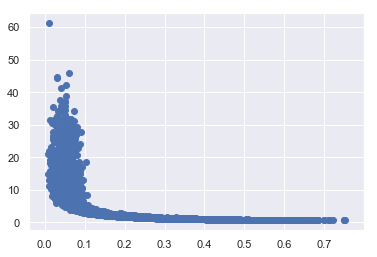

<Figure size 432x288 with 0 Axes>

In [167]:
plt.scatter(n_arr2, y_arr2)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650314680", plt, n_arr1, y_arr1)

In [131]:
# Adam_1642149242   /   5 crit
a4, b4, y_arr4, n_arr4 = v4_prepare_data_from_files('Adam_1650315215', 0.5)
print(a4, b4) 

0      [0, 29.337343096620046, 0.0, 0.0, 1539192.9493246013]
0.05707384168944507
0 || 0.5004365323218091 || 0 || 0 
1      [0, 6.359338940823623, 0.1, 1.0, 319155.23845420737]
0.12497295889696314
0 || 0.5120299345975159 || 1 || 1 
0      [0, 98.66527057783105, 0.1, 0.0, 1202860.931494057]
0.06351950771758869
0 || 0.5008952961606548 || 0 || 0 
0      [0, 21.8465836554197, 1.0, 0.0, 767447.7861433801]
0.08575081092480595
0 || 0.5020387907757271 || 0 || 0 
0      [0, 21.434606638629628, 1.0, 0.0, 1221701.0557214415]
0.07783220921899434
0 || 0.5004759255022638 || 0 || 0 
1      [1, 11.850485650211496, 0.0, 1.0, 354833.7849484247]
0.08849427401566909
1 || 0.5114066980846991 || 1 || 1 
0      [1, 58.78016425774767, 0.1, 0.0, 187753.2845294915]
0.1315593175086338
1 || 0.5272273957289907 || 0 || 0 
0      [1, 75.85551945838094, 0.1, 0.0, 114494.97735079016]
0.18311157398187386
1 || 0.5495275063964639 || 0 || 0 
1      [1, 60.72281545983347, 0.1, 1.0, 2110616.559571519]
0.11147995049286367
1 ||

0.06325383623551285
14 || 0.5099388488858461 || 1 || 1 
0      [14, 49.12070052355881, 0.1, 0.0, 201571.95748217677]
0.15690419659105168
14 || 0.5252221037380321 || 0 || 0 
0      [15, 64.04814909692243, 0.0, 0.0, 716496.9979320819]
0.09035404338745344
15 || 0.5022293406513315 || 0 || 0 
0      [15, 96.71561003950846, 0.5, 0.0, 494895.7433359061]
0.10240435569401965
15 || 0.505306151473266 || 0 || 0 
0      [15, 5.01189032808112, 1.0, 0.0, 334257.84478988434]
0.119631271219831
15 || 0.5127008668581998 || 0 || 0 
1      [15, 28.308347448620907, 1.0, 1.0, 1022377.2912701815]
0.08047316458833227
15 || 0.5007918242707308 || 1 || 1 
0      [15, 41.74650645097093, 0.1, 0.0, 463635.59142462444]
0.09249983911400236
15 || 0.508457270663931 || 0 || 0 
0      [16, 72.56666345800986, 0.0, 0.0, 1036536.0395381663]
0.11470949764809553
16 || 0.5001902325026989 || 0 || 0 
0      [16, 42.993756621351636, 0.5, 0.0, 1003565.609911145]
0.0690720426677893
16 || 0.5013255358173755 || 0 || 0 
1      [16, 2.5

0.07650321736824872
29 || 0.5008231686395299 || 0 || 0 
0      [29, 18.190399423373094, 1.0, 0.0, 322626.42281203205]
0.14433413302547765
29 || 0.5106769590255228 || 0 || 0 
0      [29, 45.250835306862506, 0.0, 0.0, 310598.4504655689]
0.09441521154948043
29 || 0.5147010131517564 || 0 || 0 
1      [29, 56.63999364053049, 1.0, 1.0, 806791.1786489944]
0.06451729636549136
29 || 0.5028327362661809 || 1 || 1 
1      [29, 92.70786114734493, 0.0, 1.0, 181809.3643043363]
0.13659153499240015
29 || 0.5270270711527217 || 1 || 1 
0      [30, 11.402880784348474, 0.1, 0.0, 977006.3577325986]
0.06977227108102937
30 || 0.5013346151385679 || 0 || 0 
0      [30, 18.23021092908309, 1.0, 0.0, 747280.6586664085]
0.0959626534417477
30 || 0.5017647594020008 || 0 || 0 
0      [30, 97.94702253627355, 0.0, 0.0, 520115.74421546224]
0.07805359774995338
30 || 0.5064583221871861 || 0 || 0 
0      [30, 48.16484429351326, 1.0, 0.0, 289445.33350768336]
0.11337078019478879
30 || 0.5136995899122024 || 0 || 0 
0      [30,

0.07074738924648405
43 || 0.515461926482818 || 0 || 0 
0      [43, 36.5314622411399, 0.5, 0.0, 707765.1215200642]
0.06687216959960841
43 || 0.5038195899043698 || 0 || 0 
0      [43, 44.872581305951535, 0.5, 0.0, 512055.4691601022]
0.047087096845682366
43 || 0.5090013313707925 || 0 || 0 
0      [43, 94.01589240269954, 0.0, 0.0, 806474.5102251695]
0.10055631729754384
43 || 0.5009835388315677 || 0 || 0 
0      [44, 46.86802999646683, 1.0, 0.0, 961631.533283797]
0.09946127679998154
44 || 0.5005130948083698 || 0 || 0 
0      [44, 29.808990350151138, 0.5, 0.0, 660087.5679009921]
0.10670030229762746
44 || 0.5019449671156384 || 0 || 0 
0      [44, 23.958664665174446, 0.5, 0.0, 974506.717015953]
0.09262082603715911
44 || 0.5006122710590686 || 0 || 0 
0      [44, 78.26130395967176, 1.0, 0.0, 1496667.811643233]
0.07623001861281474
44 || 0.5001366621643621 || 0 || 0 
1      [44, 78.97775574450287, 0.0, 1.0, 1787338.3230375769]
0.10256225886541717
44 || 0.5000071147737855 || 1 || 1 
0      [45, 90.

0.10439585871873425
57 || 0.5014237920851738 || 0 || 0 
0      [57, 64.17658275645144, 1.0, 0.0, 206447.05838967205]
0.11321344809861071
57 || 0.5254222667196986 || 0 || 0 
1      [57, 87.90202528430429, 0.0, 1.0, 998422.4033059118]
0.11701469724170066
57 || 0.5002079222643797 || 1 || 1 
1      [58, 0.49359589336919196, 0.0, 1.0, 2162582.4033081373]
0.07825423273546693
58 || 0.5000111663576942 || 1 || 1 
0      [58, 16.456259657044463, 0.1, 0.0, 270516.0886930487]
0.09013524213455433
58 || 0.516910857462005 || 0 || 0 
1      [58, 23.608739010512853, 0.1, 1.0, 155375.1863990127]
0.14641582161977656
58 || 0.5357988016278011 || 1 || 1 
0      [58, 51.380441342841976, 0.5, 0.0, 462728.27049878944]
0.08984915594991062
58 || 0.5074632237805092 || 0 || 0 
0      [58, 77.05874236234177, 0.5, 0.0, 161944.99764470302]
0.1864154567841501
58 || 0.5304170696294556 || 0 || 0 
1      [59, 11.59502015244086, 0.0, 1.0, 1269036.3598001064]
0.1147966262788975
59 || 0.5000505020550831 || 1 || 1 
1      [5

0.11221902951721877
71 || 0.523719153693965 || 0 || 0 
0      [71, 14.387137985414439, 0.5, 0.0, 1415509.4621479847]
0.11219907129824395
71 || 0.5000243583029326 || 0 || 0 
1      [72, 77.43477010538543, 1.0, 1.0, 804450.7548564341]
0.09867064437007497
72 || 0.5011542291309429 || 1 || 1 
1      [72, 60.92760526614085, 0.1, 1.0, 827260.6166941742]
0.07057355652428302
72 || 0.5023883605055861 || 1 || 1 
0      [72, 0.7372594673480504, 1.0, 0.0, 469938.39418544475]
0.08174543457359607
72 || 0.5067393062272476 || 0 || 0 
0      [72, 86.7465454779559, 0.5, 0.0, 815546.4673473361]
0.08140267764029675
72 || 0.5018038447775551 || 0 || 0 
0      [72, 53.267337446109984, 0.1, 0.0, 346592.1057845278]
0.09439735937442258
72 || 0.5122513339627578 || 0 || 0 
0      [73, 61.6200182649442, 0.5, 0.0, 130107.94785320038]
0.18442587653907203
73 || 0.5406712929181876 || 0 || 0 
1      [73, 52.14629380333328, 0.5, 1.0, 266729.4386996821]
0.08823124503069577
73 || 0.5180830055264782 || 1 || 1 
0      [73, 9

0.1714522156418085
86 || 0.5461080214378063 || 0 || 0 
1      [86, 25.726225824277872, 0.5, 1.0, 1559064.7186724104]
0.0661324074194651
86 || 0.5002301539957311 || 1 || 1 
1      [86, 30.68256707084047, 0.0, 1.0, 817398.8225465481]
0.07148076497683356
86 || 0.5024108901835855 || 1 || 1 
0      [86, 86.72628561272144, 0.5, 0.0, 258105.63845056386]
0.12913314697194767
86 || 0.5181806023001219 || 0 || 0 
1      [86, 93.22804407242572, 1.0, 1.0, 71586.84758461783]
0.3097525392371658
86 || 0.6002375006589409 || 1 || 1 
0      [87, 83.04815780116522, 1.0, 0.0, 185773.8637465979]
0.17831678730956385
87 || 0.5268540290568329 || 0 || 0 
0      [87, 99.24619906856542, 0.0, 0.0, 980476.4515565499]
0.0890878817327559
87 || 0.5006962891958101 || 0 || 0 
0      [87, 31.682384452677887, 0.0, 0.0, 341270.51625359384]
0.05735969160073271
87 || 0.513972697709412 || 0 || 0 
0      [87, 98.80202623485349, 0.0, 0.0, 756023.3794211225]
0.11310881197210958
87 || 0.5007931311490503 || 0 || 0 
1      [87, 60.2

0.09600532197794327
100 || 0.5014906721924236 || 1 || 1 
1      [100, 16.785279323624824, 0.1, 1.0, 362944.12447748095]
0.10623415758614811
100 || 0.5092270882078801 || 1 || 1 
0      [100, 87.9866306048635, 0.0, 0.0, 760111.0451867746]
0.05670120522249041
100 || 0.5042611592746591 || 0 || 0 
1      [100, 12.938192126369602, 0.5, 1.0, 464144.04521290504]
0.10047975304093348
100 || 0.5054469256292752 || 1 || 1 
0      [101, 55.84290909002587, 0.1, 0.0, 178253.05846058438]
0.13462952596432481
101 || 0.5274753413876867 || 0 || 0 
0      [101, 57.5539991598984, 0.5, 0.0, 787413.9890081686]
0.08271704369619301
101 || 0.5020094697773299 || 0 || 0 
0      [101, 62.33965312472157, 0.5, 0.0, 174791.74982639498]
0.1320158977554321
101 || 0.5262417864307368 || 0 || 0 
0      [101, 20.46206222848919, 0.1, 0.0, 527981.5320801516]
0.09847704789662565
101 || 0.5049527612858479 || 0 || 0 
0      [101, 87.39137709442345, 0.0, 0.0, 624861.8496565634]
0.0683126460166106
101 || 0.5052337371844026 || 0 || 

0.12410439950647223
114 || 0.5131095081083703 || 0 || 0 
0      [114, 6.084290957662813, 1.0, 0.0, 95069.0374408369]
0.25410265261802495
114 || 0.5734434868597383 || 0 || 0 
0      [114, 73.65508964418369, 0.0, 0.0, 96945.33824263321]
0.2502874267408451
114 || 0.5733068292376272 || 0 || 0 
0      [114, 20.115648222558953, 1.0, 0.0, 394954.6825519242]
0.10260331715394974
114 || 0.5091410961883547 || 0 || 0 
0      [115, 76.18321768360671, 1.0, 0.0, 205892.60635204247]
0.08942623631427477
115 || 0.5239214818746876 || 0 || 0 
1      [115, 68.60422281310873, 0.1, 1.0, 93670.17297641389]
0.28015651398672137
115 || 0.5674789744919828 || 1 || 1 
0      [115, 22.794137761461425, 0.1, 0.0, 202838.2090136347]
0.1447866115054349
115 || 0.5239329087363311 || 0 || 0 
0      [115, 24.501173616355576, 0.0, 0.0, 418217.176640155]
0.08039605205552465
115 || 0.5093994634350231 || 0 || 0 
0      [115, 78.25354139756587, 1.0, 0.0, 215016.6971359113]
0.07412871868199453
115 || 0.5225880523440732 || 0 || 0 

0.05561038656101906
128 || 0.506789688692715 || 0 || 0 
1      [128, 25.297919466786368, 0.1, 1.0, 273262.4768405759]
0.08038628987757576
128 || 0.5169147265262407 || 1 || 1 
1      [128, 83.63798359777883, 1.0, 1.0, 460964.02193473524]
0.13610535417230543
128 || 0.5042342686965612 || 1 || 1 
0      [129, 22.121089908602954, 0.0, 0.0, 1258829.8452897628]
0.09091829613915994
129 || 0.5001872093302662 || 0 || 0 
0      [129, 62.23794733115524, 1.0, 0.0, 559754.1090469561]
0.13123235327499067
129 || 0.5021905310866512 || 0 || 0 
0      [129, 90.54812434461066, 1.0, 0.0, 606155.8316295862]
0.048981390152052155
129 || 0.507110846214404 || 0 || 0 
1      [129, 80.70365817101649, 1.0, 1.0, 1773016.4307540057]
0.09553256315023492
129 || 0.500013705220769 || 1 || 1 
1      [129, 36.77869699691083, 1.0, 1.0, 759822.5696218011]
0.07039397486693995
129 || 0.502996315044269 || 1 || 1 
1      [130, 57.506361263863425, 1.0, 1.0, 442837.47768484114]
0.12652181000281268
130 || 0.50524059697593 || 1 || 

0.037432106802765756
142 || 0.5014021149197668 || 0 || 0 
0      [143, 85.5325041565003, 1.0, 0.0, 1206255.0817025716]
0.07286455268011816
143 || 0.5006130031786706 || 0 || 0 
0      [143, 55.66823694809588, 0.1, 0.0, 106679.67443626201]
0.2709969247216884
143 || 0.5518978755401001 || 0 || 0 
1      [143, 38.24482536337111, 0.5, 1.0, 633385.2813168074]
0.07161717035540693
143 || 0.5047246157091052 || 1 || 1 
0      [143, 50.947023928729465, 0.5, 0.0, 1252307.993721145]
0.05160446767386484
143 || 0.5013297414516706 || 0 || 0 
1      [143, 13.868239931074777, 0.1, 1.0, 2894524.813445042]
0.10568052916751
143 || 0.5000000157156841 || 1 || 1 
0      [144, 73.37387365106058, 1.0, 0.0, 1095623.0894961862]
0.07322731773299893
144 || 0.5008429065026909 || 0 || 0 
1      [144, 8.6059933044913, 0.1, 1.0, 2444219.1496508745]
0.1024705056057829
144 || 0.500000230174987 || 1 || 1 
1      [144, 83.45005830120706, 0.1, 1.0, 415331.5518165626]
0.05182182527973004
144 || 0.5109524724395373 || 1 || 1 
1

0.22113045691547017
157 || 0.5575799017631702 || 0 || 0 
0      [157, 50.1188443996162, 1.0, 0.0, 107432.76643478984]
0.23610093215336744
157 || 0.5611191496105581 || 0 || 0 
1      [157, 53.58551908001638, 1.0, 1.0, 152133.49292900198]
0.1325774010339664
157 || 0.5315331661597356 || 1 || 1 
0      [157, 56.18069430215659, 1.0, 0.0, 877633.9036709315]
0.06686198528687522
157 || 0.5021570140058462 || 0 || 0 
1      [157, 50.38143108000605, 0.5, 1.0, 613839.2848509194]
0.08195354699950204
157 || 0.5041139056661197 || 1 || 1 
1      [158, 87.06382559221379, 0.5, 1.0, 106424.806495524]
0.23457118979781474
158 || 0.5560596655420298 || 1 || 1 
1      [158, 32.33786997345657, 0.1, 1.0, 1619819.6237816298]
0.059972400620006514
158 || 0.500283767049225 || 1 || 1 
0      [158, 22.304397572101497, 0.0, 0.0, 206144.98594256665]
0.13386437030760037
158 || 0.5257879077394132 || 0 || 0 
1      [158, 96.1417380933065, 0.0, 1.0, 998200.7557451056]
0.09843390972090593
158 || 0.5004508875442746 || 1 || 1

0.08655886166564829
171 || 0.501523667730543 || 1 || 1 
0      [171, 68.57777700643992, 0.0, 0.0, 1396237.7889711075]
0.13400079602947373
171 || 0.5000072228063286 || 0 || 0 
1      [171, 2.7477800706809328, 0.0, 1.0, 139582.8108800563]
0.16491021153162572
171 || 0.5403821701667605 || 1 || 1 
0      [172, 40.888110076259515, 0.0, 0.0, 1763788.1018976746]
0.04477918627803365
172 || 0.5005312084364767 || 0 || 0 
0      [172, 80.62086916211781, 1.0, 0.0, 691626.0876923943]
0.09722821532610872
172 || 0.5021467930531284 || 0 || 0 
0      [172, 20.884970909073854, 1.0, 0.0, 1753263.32092354]
0.059630776546491224
172 || 0.5002102354357126 || 0 || 0 
0      [172, 64.45952936003701, 0.5, 0.0, 2713686.1513450253]
0.07460851510758906
172 || 0.5000018184470341 || 0 || 0 
0      [172, 49.458699909532285, 1.0, 0.0, 359221.0926896824]
0.09588753072789416
172 || 0.5106316134951927 || 0 || 0 
0      [173, 11.735487569505166, 0.0, 0.0, 371929.716877281]
0.09855076465001493
173 || 0.5096132795859023 || 0

0.10161815805217192
185 || 0.5007150104093284 || 0 || 0 
1      [185, 3.1522696270038786, 1.0, 1.0, 658530.7257522894]
0.0737032542515479
185 || 0.5039419000370676 || 1 || 1 
0      [186, 55.158788938151496, 0.5, 0.0, 295779.97238639754]
0.11040780517187436
186 || 0.5138403384397541 || 0 || 0 
0      [186, 26.500965213551243, 0.0, 0.0, 906233.5704842741]
0.11041959795830672
186 || 0.5004476555871511 || 0 || 0 
0      [186, 33.29502461031616, 1.0, 0.0, 600678.0131705466]
0.09847590012515454
186 || 0.5027528056331945 || 0 || 0 
1      [186, 51.19763451954674, 0.1, 1.0, 2381999.489812386]
0.07355447658783464
186 || 0.5000073279011268 || 1 || 1 
0      [186, 65.59525621717512, 0.0, 0.0, 238313.72093491282]
0.13371643880501555
186 || 0.5209609099330783 || 0 || 0 
1      [187, 12.971371001798232, 1.0, 1.0, 450678.4427305603]
0.08624649484324459
187 || 0.5086380047914077 || 1 || 1 
1      [187, 4.619233415885543, 0.0, 1.0, 898208.3305844642]
0.11998888798148144
187 || 0.5003555126350847 || 1 

0.07502276493525409
199 || 0.5006251674957543 || 1 || 1 
0      [200, 78.93110030868269, 0.1, 0.0, 691180.2316118177]
0.06615854318418687
200 || 0.5038903528497625 || 0 || 0 
0      [200, 92.1348145990086, 0.5, 0.0, 101648.37651566925]
0.21861941435713161
200 || 0.5534888578705992 || 0 || 0 
0      [200, 5.231803928392647, 0.0, 0.0, 543355.5693794632]
0.07289691847734595
200 || 0.5065760079043266 || 0 || 0 
0      [200, 11.883849804211916, 0.1, 0.0, 2355019.127721934]
0.1202690493809692
200 || 0.500000056309248 || 0 || 0 
0      [200, 96.75625750573602, 1.0, 0.0, 3093910.484626908]
0.08657687633970777
200 || 0.5000000868371044 || 0 || 0 
0      [201, 27.347223027483423, 0.1, 0.0, 946888.8856199046]
0.07180929269143001
201 || 0.5014620547092448 || 0 || 0 
0      [201, 35.344570925335915, 0.0, 0.0, 561395.340191331]
0.06531662761621124
201 || 0.5064539144121806 || 0 || 0 
0      [201, 10.63621624264886, 0.1, 0.0, 262736.19290188415]
0.06425100761200472
201 || 0.5175398562438086 || 0 || 0

0.1076718451310271
213 || 0.5190148563049671 || 1 || 1 
1      [214, 12.109114790642828, 0.1, 1.0, 109223.280994131]
0.20121130102059057
214 || 0.5523945049854169 || 1 || 1 
0      [214, 36.75202060623138, 1.0, 0.0, 913376.5288899275]
0.10967886084883098
214 || 0.5004877352219365 || 0 || 0 
0      [214, 39.431682767798584, 1.0, 0.0, 387020.84219728946]
0.06454290671172427
214 || 0.5117463491485287 || 0 || 0 
0      [214, 46.39740119835996, 0.5, 0.0, 1554734.4423764918]
0.06889604820725982
214 || 0.5002022840669939 || 0 || 0 
0      [214, 45.095439815137425, 1.0, 0.0, 2078801.6374362146]
0.07450590900577442
214 || 0.5000194824077118 || 0 || 0 
0      [215, 80.12470413882217, 1.0, 0.0, 342392.17053752224]
0.08026803097379502
215 || 0.5126053560124486 || 0 || 0 
0      [215, 94.83899379452822, 0.1, 0.0, 1197485.188684111]
0.07063841441591373
215 || 0.5006281950472988 || 0 || 0 
0      [215, 66.73760804892335, 0.5, 0.0, 599126.3226181332]
0.08656180659892564
215 || 0.5040270196194915 || 0 

0.12255480634890314
227 || 0.5142318762428317 || 0 || 0 
1      [228, 40.37486023162869, 0.0, 1.0, 992016.2375898554]
0.08629126851096762
228 || 0.5008000504859016 || 1 || 1 
0      [228, 11.173452359882086, 0.1, 0.0, 1484901.3641657468]
0.06431740745034807
228 || 0.5003523462511236 || 0 || 0 
0      [228, 86.85274953357391, 0.5, 0.0, 1417195.4222369182]
0.07456691964264585
228 || 0.5002320694314838 || 0 || 0 
0      [228, 60.334959659289275, 0.5, 0.0, 820932.8292760599]
0.07921480690036223
228 || 0.5018590600798291 || 0 || 0 
1      [228, 96.0700904698149, 0.1, 1.0, 2522248.966079376]
0.08907194116675479
228 || 0.5000006636392208 || 1 || 1 
0      [229, 80.95760922687026, 0.1, 0.0, 447250.50874162174]
0.08331516609127824
229 || 0.5086362187393276 || 0 || 0 
1      [229, 5.640359022189717, 0.0, 1.0, 1406414.5695051225]
0.07015620580591816
229 || 0.500300803078833 || 1 || 1 
0      [229, 35.002960317873715, 0.5, 0.0, 168205.77993959223]
0.1421116045683662
229 || 0.5275856178583871 || 0 

0.11789266774144949
241 || 0.5162400587399691 || 0 || 0 
1      [242, 39.58572788708488, 0.5, 1.0, 775857.4720208199]
0.06071480408798412
242 || 0.5036770013497992 || 1 || 1 
1      [242, 77.32483276065717, 0.5, 1.0, 271669.7010103405]
0.1377688337028646
242 || 0.5168742614076477 || 1 || 1 
0      [242, 51.90177652913168, 0.0, 0.0, 637353.2815240957]
0.08806626754536032
242 || 0.5037405632444052 || 0 || 0 
0      [242, 86.23311188860485, 0.5, 0.0, 1013531.6596534556]
0.08842692139737471
242 || 0.5006092869902691 || 0 || 0 
0      [242, 39.154816712088376, 1.0, 0.0, 446495.021348056]
0.09093445085462126
242 || 0.5076229124524749 || 0 || 0 
1      [243, 14.15222985396521, 0.0, 1.0, 2860825.5908254166]
0.09354395727190647
243 || 0.5000000904852058 || 1 || 1 
0      [243, 65.58232406427311, 0.5, 0.0, 82540.56336106597]
0.29368962438085167
243 || 0.5605190155731675 || 0 || 0 
0      [243, 21.711339509471728, 1.0, 0.0, 118877.75197879819]
0.21121807546869514
243 || 0.5504972630779406 || 0 ||

0.07428835983473248
256 || 0.5019242484841341 || 1 || 1 
1      [256, 96.88277756844616, 0.1, 1.0, 468154.01608981244]
0.1115504723987353
256 || 0.506516443248001 || 1 || 1 
0      [256, 65.78867237367957, 1.0, 0.0, 1052028.9035280645]
0.09499026553228607
256 || 0.5004206223488029 || 0 || 0 
0      [256, 80.66802928509199, 0.5, 0.0, 313247.07774085936]
0.057455304975465235
256 || 0.5140173860788593 || 0 || 0 
0      [256, 34.678285814756855, 1.0, 0.0, 395001.3585389147]
0.10609428406511748
256 || 0.5095176068116418 || 0 || 0 
0      [257, 50.90525489628453, 1.0, 0.0, 358821.46594282053]
0.07612856995826284
257 || 0.5125170400179336 || 0 || 0 
0      [257, 34.1883496530622, 0.0, 0.0, 621478.4321207246]
0.06495497568707978
257 || 0.5054689907726718 || 0 || 0 
0      [257, 72.43716313762656, 1.0, 0.0, 623649.1103777102]
0.10257121455853643
257 || 0.5026164415098153 || 0 || 0 
0      [257, 45.20645719747079, 0.0, 0.0, 243924.75707007427]
0.09421201116711897
257 || 0.5191757105708625 || 0 |

0.07475453964044386
270 || 0.5000032227996389 || 1 || 1 
1      [270, 38.0054127841564, 0.5, 1.0, 145777.62317633786]
0.15633798379312833
270 || 0.5332620904331324 || 1 || 1 
0      [270, 46.590439356614425, 0.1, 0.0, 355409.1838643214]
0.11644026504358165
270 || 0.5083029443681232 || 0 || 0 
0      [270, 2.8011699276254243, 0.1, 0.0, 1210844.6749121165]
0.050128046523943745
270 || 0.5015428287491281 || 0 || 0 
0      [270, 89.52741218857913, 1.0, 0.0, 2509510.9258936234]
0.08356862197980051
270 || 0.500001292733788 || 0 || 0 
1      [271, 31.259042827754968, 0.0, 1.0, 310007.55427418725]
0.10051625151248433
271 || 0.5132200538769038 || 1 || 1 
1      [271, 18.979312711634698, 1.0, 1.0, 75007.87612960693]
0.35247888488816737
271 || 0.5894742730964598 || 1 || 1 
0      [271, 38.30058657926191, 1.0, 0.0, 168470.0853565045]
0.14782913788302937
271 || 0.5284938087448556 || 0 || 0 
1      [271, 70.26562066237601, 1.0, 1.0, 242278.33683861716]
0.08546240033573721
271 || 0.5232801122354245 ||

0.09443418572736743
284 || 0.500123194493444 || 0 || 0 
0      [284, 95.64845712637565, 0.5, 0.0, 130515.37958288327]
0.15525563450885788
284 || 0.5428497525878275 || 0 || 0 
0      [284, 16.476389148406668, 1.0, 0.0, 821366.5760390125]
0.08999954190655046
284 || 0.5016170933027543 || 0 || 0 
1      [285, 62.97427034759879, 1.0, 1.0, 562588.3601945266]
0.09811288543510714
285 || 0.5042001848099956 || 1 || 1 
0      [285, 21.48820951272134, 0.0, 0.0, 861250.5876813678]
0.08484104927034464
285 || 0.5014068693231795 || 0 || 0 
1      [285, 87.53540655886397, 0.1, 1.0, 271954.6601165456]
0.07499418448427503
285 || 0.5167405896296571 || 1 || 1 
1      [285, 32.37097530442139, 0.5, 1.0, 402001.2857594766]
0.09292118712132094
285 || 0.5092625326680618 || 1 || 1 
1      [285, 62.549427446338, 0.1, 1.0, 441086.8398039434]
0.10067665467359117
285 || 0.5073722534155984 || 1 || 1 
1      [286, 35.41668629771294, 1.0, 1.0, 330203.96407312975]
0.10580581351405098
286 || 0.513589079869589 || 1 || 1 


0.11285478095144039
298 || 0.5141898914870314 || 1 || 1 
0      [299, 34.96992377436297, 0.1, 0.0, 1003266.4803117537]
0.06303693341720903
299 || 0.5017564171933098 || 0 || 0 
1      [299, 71.22096847611591, 0.0, 1.0, 438277.3623491018]
0.09633510114054838
299 || 0.5077680854796868 || 1 || 1 
0      [299, 29.984252094401263, 1.0, 0.0, 461845.98679796135]
0.10872241419930176
299 || 0.5065834758794819 || 0 || 0 
0      [299, 7.650174772447493, 0.5, 0.0, 262028.68598734372]
0.08179670716493033
299 || 0.520950116750038 || 0 || 0 
1      [299, 73.35175248921585, 0.1, 1.0, 508126.61639877065]
0.10265006353563033
299 || 0.5047413046592182 || 1 || 1 
1      [300, 22.703485594575202, 0.0, 1.0, 325088.32787661656]
0.06587691164966228
300 || 0.5140573365567671 || 1 || 1 
1      [300, 94.74003860009341, 0.1, 1.0, 104171.22331228416]
0.25719021109062323
300 || 0.5526489363678135 || 1 || 1 
0      [300, 85.97779282792095, 0.1, 0.0, 475034.53468145325]
0.0644974798686228
300 || 0.5085361631217197 || 

0.09320787566226615
312 || 0.5004325660017674 || 0 || 0 
1      [313, 70.45601061952563, 0.0, 1.0, 651355.2689148955]
0.042901817585095314
313 || 0.5062668138324613 || 1 || 1 
0      [313, 55.216529793822886, 0.1, 0.0, 901961.4255267509]
0.1080041767886923
313 || 0.5005120634839264 || 0 || 0 
1      [313, 46.555041581072665, 1.0, 1.0, 1431805.3762184686]
0.06135670460948643
313 || 0.5004766945268385 || 1 || 1 
0      [313, 56.598973070501835, 0.1, 0.0, 182230.01344574313]
0.12811662120769943
313 || 0.5260700908002908 || 0 || 0 
0      [313, 94.3713336399556, 0.0, 0.0, 228113.3284186325]
0.1207389625905245
313 || 0.5230740899313329 || 0 || 0 
1      [314, 24.74510554268531, 0.0, 1.0, 1410145.788419671]
0.09421305694823527
314 || 0.5000894047501302 || 1 || 1 
0      [314, 41.52342752746584, 0.0, 0.0, 309602.4543790221]
0.06720659186463673
314 || 0.5148682764833421 || 0 || 0 
0      [314, 7.5810782967215165, 0.0, 0.0, 530192.1064475329]
0.08702466152885471
314 || 0.505747103626956 || 0 ||

0.10438123989983399
326 || 0.5003720257831291 || 0 || 0 
0      [327, 98.34184626864135, 1.0, 0.0, 460690.41213977436]
0.08519943063735017
327 || 0.5070660035744475 || 0 || 0 
0      [327, 28.845514687203146, 0.5, 0.0, 356971.38636101777]
0.10081781844529294
327 || 0.5100207877654246 || 0 || 0 
1      [327, 7.266092451881734, 1.0, 1.0, 661975.5144538737]
0.06893352206790562
327 || 0.5049720322315845 || 1 || 1 
0      [327, 62.4778159850681, 1.0, 0.0, 465442.6733506815]
0.06156148218770887
327 || 0.5086736119084404 || 0 || 0 
0      [327, 84.51554586123875, 0.1, 0.0, 356482.27573278453]
0.07847146921040389
327 || 0.5125167343742614 || 0 || 0 
0      [328, 78.49098548470563, 0.1, 0.0, 641226.2031750566]
0.094386699738711
328 || 0.502871899232083 || 0 || 0 
0      [328, 0.2357954773600901, 1.0, 0.0, 777960.7797183599]
0.0935487898831377
328 || 0.5018447307398615 || 0 || 0 
1      [328, 51.02684818212684, 0.5, 1.0, 1242122.8245358744]
0.09342388371129673
328 || 0.5001901498069102 || 1 || 1

1      [341, 35.46420128024961, 0.0, 1.0, 912476.8089303009]
0.07129058603148275
341 || 0.5017581731404075 || 1 || 1 
1      [341, 10.690963036914491, 0.1, 1.0, 313628.5597029979]
0.07849765396430572
341 || 0.5152527594210301 || 1 || 1 
0      [341, 86.80321575068507, 1.0, 0.0, 1336821.4162653375]
0.04321774732078966
341 || 0.5014263245358022 || 0 || 0 
0      [341, 41.49387081689421, 0.5, 0.0, 106189.21480044027]
0.2832323511032581
341 || 0.5537891349117872 || 0 || 0 
1      [342, 13.036328772023975, 0.1, 1.0, 94923.62814999511]
0.24138737872445137
342 || 0.5517865452160988 || 1 || 1 
0      [342, 80.35816850984048, 0.5, 0.0, 172730.2115521881]
0.1484890847600439
342 || 0.530748814548512 || 0 || 0 
0      [342, 47.27112358816368, 0.5, 0.0, 1332159.3767672025]
0.07915681497194381
342 || 0.5002568501377231 || 0 || 0 
0      [342, 60.00517476807001, 0.1, 0.0, 477976.28980364325]
0.07901847628947192
342 || 0.5075903306973064 || 0 || 0 
0      [342, 59.02903041262778, 0.0, 0.0, 294362.8710

0.09262807195293973
355 || 0.5117091842450944 || 0 || 0 
1      [355, 55.377710313688254, 0.1, 1.0, 202474.8626587076]
0.14063164470473094
355 || 0.5287283688106408 || 1 || 1 
1      [355, 26.544035612326937, 0.1, 1.0, 168291.46384758077]
0.1211080100667945
355 || 0.5281471777724196 || 1 || 1 
0      [355, 60.97326805985115, 1.0, 0.0, 1113807.0545987259]
0.045500112318667525
355 || 0.5021475876244822 || 0 || 0 
0      [356, 62.16218820451442, 0.1, 0.0, 1371620.0566574417]
0.045992040813735216
356 || 0.5011731387893003 || 0 || 0 
0      [356, 17.332091254301506, 0.0, 0.0, 493460.6361963709]
0.035387521248421594
356 || 0.5089455509654341 || 0 || 0 
0      [356, 5.177330962662502, 0.0, 0.0, 359326.56711830763]
0.09773445275331581
356 || 0.5133811649982915 || 0 || 0 
0      [356, 37.99534562472798, 0.1, 0.0, 141944.92463982129]
0.19906981984468858
356 || 0.5379807301001704 || 0 || 0 
0      [356, 32.96034578861162, 1.0, 0.0, 238029.2006122781]
0.08960007141850626
356 || 0.5196213813138545 

0.09802684658322489
369 || 0.5028168145258461 || 0 || 0 
0      [369, 51.04621451231358, 1.0, 0.0, 110936.52520957746]
0.2664916587723735
369 || 0.5506389582940511 || 0 || 0 
0      [369, 29.773390568339913, 0.1, 0.0, 876053.3114561576]
0.09232361627693139
369 || 0.501006330010537 || 0 || 0 
0      [369, 21.085334734525347, 0.0, 0.0, 83674.3171165482]
0.2846558002445418
369 || 0.5757910183720649 || 0 || 0 
0      [370, 65.2624479526507, 0.1, 0.0, 363075.8133453035]
0.09883336389841037
370 || 0.511119278523938 || 0 || 0 
0      [370, 62.32903980338924, 0.5, 0.0, 1109056.8467096512]
0.08238642833167556
370 || 0.5005560079650111 || 0 || 0 
0      [370, 54.814518966035465, 0.0, 0.0, 531156.0545269168]
0.09342023104192052
370 || 0.5049320658793469 || 0 || 0 
0      [370, 46.88887474507714, 0.0, 0.0, 492444.3399961395]
0.0909554439503775
370 || 0.5060711919108749 || 0 || 0 
0      [370, 73.72423649321075, 1.0, 0.0, 846577.4293872166]
0.12205048397531848
370 || 0.5004438028962421 || 0 || 0 
0

0.09493976377864996
383 || 0.5048829613953788 || 0 || 0 
0      [383, 18.231724730912287, 0.1, 0.0, 123481.42520199183]
0.17133180224117026
383 || 0.5415444090715137 || 0 || 0 
1      [383, 25.21614881820956, 0.1, 1.0, 106994.13579993427]
0.21985278923901513
383 || 0.5625476073380782 || 1 || 1 
1      [383, 24.27739677124336, 0.0, 1.0, 719854.5053073092]
0.11230157336883995
383 || 0.501488800409917 || 1 || 1 
0      [384, 1.9850065322776056, 0.5, 0.0, 268219.5001029372]
0.11804347288165853
384 || 0.5178040638113548 || 0 || 0 
0      [384, 72.44333624770488, 0.0, 0.0, 379969.8433130292]
0.08236611223386785
384 || 0.5108490319972695 || 0 || 0 
1      [384, 57.26393337994664, 1.0, 1.0, 1002752.2675322352]
0.08811164396020219
384 || 0.5006660781038398 || 1 || 1 
0      [384, 59.43541464802754, 1.0, 0.0, 1599398.5930566948]
0.04335724884051857
384 || 0.5008367891299196 || 0 || 0 
1      [384, 35.85551258571715, 0.0, 1.0, 243299.8363701392]
0.14184469614155937
384 || 0.5208517240347049 || 1 

0.08337446243765231
397 || 0.5000000052246061 || 1 || 1 
1      [397, 86.01391051914173, 1.0, 1.0, 300448.4669995414]
0.12957863516729443
397 || 0.5146383348420352 || 1 || 1 
0      [397, 29.616739905395484, 1.0, 0.0, 1114994.467294029]
0.07181563327506103
397 || 0.5008422570721122 || 0 || 0 
0      [398, 85.5185776750604, 1.0, 0.0, 251818.09771792215]
0.1363953344166336
398 || 0.5166584155652837 || 0 || 0 
1      [398, 66.21224166701337, 0.1, 1.0, 1535540.5056615286]
0.076033264173167
398 || 0.5001322426058651 || 1 || 1 
0      [398, 75.59043061088755, 0.5, 0.0, 641854.2918499942]
0.09585980258916477
398 || 0.5027134476532568 || 0 || 0 
0      [398, 46.089132941504865, 0.0, 0.0, 415191.3232904261]
0.10417708464211757
398 || 0.5071524012712407 || 0 || 0 
0      [398, 42.1449086863702, 0.1, 0.0, 538790.8765619192]
0.10831128935275532
398 || 0.5033836091324235 || 0 || 0 
0      [399, 17.411021413565564, 0.1, 0.0, 1075237.2152230626]
0.09076934701053026
399 || 0.5004353398583172 || 0 || 0

0.07244121020155156
411 || 0.5073342171599858 || 0 || 0 
0      [411, 92.01345970038666, 0.1, 0.0, 178210.95683815493]
0.1449516688030651
411 || 0.531368530982714 || 0 || 0 
1      [412, 63.07162438746905, 0.0, 1.0, 71006.56617856787]
0.3915869613997184
412 || 0.5946233913806073 || 1 || 1 
1      [412, 8.224710665197154, 0.0, 1.0, 452581.4765460215]
0.0794224737133981
412 || 0.5084031096811743 || 1 || 1 
1      [412, 18.720458647622802, 0.1, 1.0, 266312.0476568884]
0.09056898912187947
412 || 0.5174888480099564 || 1 || 1 
0      [412, 39.66156681201089, 1.0, 0.0, 862529.6459716188]
0.08769337916510919
412 || 0.5013225390044729 || 0 || 0 
0      [412, 93.88021846616543, 1.0, 0.0, 85684.60325776617]
0.3399456869916351
412 || 0.5826526468518594 || 0 || 0 
0      [413, 97.4124305466288, 0.5, 0.0, 168355.3134783273]
0.11471979599242468
413 || 0.5292659195741026 || 0 || 0 
1      [413, 32.603195878881394, 0.0, 1.0, 200602.34734483916]
0.1158368792576161
413 || 0.5279016482460978 || 1 || 1 
1 

0.10381772818553023
425 || 0.5044666942928326 || 0 || 0 
0      [425, 70.86716919356752, 1.0, 0.0, 1348785.4260713619]
0.06639533335216061
425 || 0.5004749787313009 || 0 || 0 
0      [426, 33.27289493886121, 0.5, 0.0, 2733005.8311339226]
0.05655128627126099
426 || 0.5000158141104346 || 0 || 0 
1      [426, 8.436263431447305, 0.0, 1.0, 342608.7524599432]
0.08899898728955957
426 || 0.5121900882888065 || 1 || 1 
0      [426, 89.57338829628624, 0.1, 0.0, 628350.2770401128]
0.04286983284746233
426 || 0.5071918112128865 || 0 || 0 
1      [426, 90.06395974903825, 0.1, 1.0, 423604.73862648866]
0.0946196910745099
426 || 0.5075458164744664 || 1 || 1 
1      [426, 84.88642763316928, 0.1, 1.0, 120210.01475374243]
0.19815241085461244
426 || 0.5446720984609169 || 1 || 1 
0      [427, 50.8629117773193, 1.0, 0.0, 314919.7897067636]
0.08575040320574459
427 || 0.51383311902524 || 0 || 0 
0      [427, 39.02391253621148, 0.0, 0.0, 106452.04716455893]
0.23207333921326717
427 || 0.5487296389928877 || 0 || 0

0.09091524137129468
439 || 0.5000076003363878 || 1 || 1 
1      [439, 4.1020657908876155, 0.5, 1.0, 266809.324946632]
0.10353834376514663
439 || 0.518161784749977 || 1 || 1 
0      [440, 53.36835324578072, 1.0, 0.0, 1030737.630288871]
0.08204706270284504
440 || 0.5008674022604915 || 0 || 0 
1      [440, 92.32649897860097, 0.0, 1.0, 588275.5175737605]
0.07468460728111871
440 || 0.5056298976759638 || 1 || 1 
0      [440, 3.4737082224001514, 0.5, 0.0, 688168.3501053293]
0.10139395078529709
440 || 0.5018034063395677 || 0 || 0 
0      [440, 21.46968880435353, 0.0, 0.0, 270240.08963446494]
0.10499299410310584
440 || 0.5163481219731313 || 0 || 0 
1      [440, 44.55629601094165, 0.0, 1.0, 605786.309323909]
0.0954982141581968
440 || 0.5034982383362765 || 1 || 1 
0      [441, 99.2710376416307, 1.0, 0.0, 890497.2035701855]
0.07806002207496204
441 || 0.50147244974943 || 0 || 0 
1      [441, 97.466206213365, 0.0, 1.0, 1815904.5522596433]
0.09728117794748838
441 || 0.5000092839552411 || 1 || 1 
0   

0.12550352591673836
453 || 0.5029539479666663 || 0 || 0 
0      [454, 45.936855481796165, 1.0, 0.0, 276992.33649972867]
0.11365514343383543
454 || 0.5142068012666806 || 0 || 0 
1      [454, 99.14863287021265, 0.5, 1.0, 235472.4568756477]
0.12127377958733898
454 || 0.5213065912498706 || 1 || 1 
0      [454, 0.5540144186779561, 0.5, 0.0, 657303.8875636425]
0.07452842725115498
454 || 0.504374283028165 || 0 || 0 
1      [454, 75.8304909756936, 0.1, 1.0, 66954.69647897362]
0.31884077015756906
454 || 0.5712575986411779 || 1 || 1 
1      [454, 19.697564872377725, 1.0, 1.0, 547814.7749887508]
0.037130518553733206
454 || 0.5081327344765092 || 1 || 1 
0      [455, 38.62666990329233, 0.1, 0.0, 843015.159709524]
0.06399498641142545
455 || 0.5027054228843767 || 0 || 0 
0      [455, 24.287893925880034, 0.5, 0.0, 720841.3425917247]
0.07727834550778521
455 || 0.5028310214689217 || 0 || 0 
1      [455, 25.296693856139697, 0.5, 1.0, 305327.90567493776]
0.10627871781348146
455 || 0.5138170598164706 || 1 

0.03599285070254278
467 || 0.5107833428823444 || 1 || 1 
0      [468, 4.056683823732932, 0.5, 0.0, 985402.7847100259]
0.08294406019012275
468 || 0.5009570207506681 || 0 || 0 
0      [468, 39.79564829322839, 0.0, 0.0, 1030778.1109926406]
0.11302001641285035
468 || 0.5002021533503703 || 0 || 0 
1      [468, 12.996005721376246, 0.0, 1.0, 1668006.074939082]
0.08646661688158257
468 || 0.5000402177526264 || 1 || 1 
0      [468, 23.084711097820325, 0.0, 0.0, 1288977.9610217274]
0.06759943178875284
468 || 0.5005133348166231 || 0 || 0 
0      [468, 82.0387371842154, 1.0, 0.0, 1530384.6526497118]
0.08860325279056845
468 || 0.5000620647577232 || 0 || 0 
0      [469, 95.63819163985222, 1.0, 0.0, 697963.9759079409]
0.1040676597298118
469 || 0.5019111827181346 || 0 || 0 
0      [469, 89.83619240231111, 0.1, 0.0, 345108.50788434764]
0.07351900711068132
469 || 0.5128774130601113 || 0 || 0 
0      [469, 6.333726995231248, 0.5, 0.0, 390176.58406462666]
0.10060665825771645
469 || 0.5072027951158173 || 0 

0.09779807223558601
482 || 0.5003156053396609 || 1 || 1 
0      [482, 8.04574957957212, 0.5, 0.0, 62306.051259886604]
0.38860040301136733
482 || 0.5997971827449351 || 0 || 0 
0      [482, 77.0721785004413, 0.5, 0.0, 839821.878603841]
0.08550135427162121
482 || 0.5015805536725644 || 0 || 0 
1      [482, 34.97509776109378, 1.0, 1.0, 95195.85263283167]
0.2536389795366737
482 || 0.5604158308974381 || 1 || 1 
0      [483, 23.61580056728671, 0.5, 0.0, 1302041.654847996]
0.05844618827932628
483 || 0.5007907983096664 || 0 || 0 
1      [483, 83.02889974950527, 0.0, 1.0, 587735.8132069806]
0.0923747955968087
483 || 0.5037532790352464 || 1 || 1 
0      [483, 36.84158143565316, 0.5, 0.0, 865183.7973238605]
0.0658105061079278
483 || 0.5024479266295663 || 0 || 0 
0      [483, 9.002701869419354, 0.0, 0.0, 1726691.0393696097]
0.079062831250406
483 || 0.5000506142782135 || 0 || 0 
0      [483, 37.87850830733254, 0.0, 0.0, 528267.1298902854]
0.11675624207877153
483 || 0.503841324404568 || 0 || 0 
0     

0.06753244387959616
496 || 0.5069971459352302 || 1 || 1 
0      [496, 83.50308199930143, 0.0, 0.0, 598284.8267904519]
0.08012975042382661
496 || 0.504244135195277 || 0 || 0 
1      [496, 16.415373163631298, 1.0, 1.0, 1710906.6732398407]
0.09351881812557569
496 || 0.5000212888001455 || 1 || 1 
0      [496, 17.94171772910701, 0.5, 0.0, 655556.7502723349]
0.10935914567165536
496 || 0.5021042575291983 || 0 || 0 
1      [497, 10.083287708230703, 0.1, 1.0, 535140.6222633021]
0.07726585086272846
497 || 0.5061727619041239 || 1 || 1 
0      [497, 31.812778298764734, 0.5, 0.0, 490691.6673886712]
0.10305173212332912
497 || 0.5055466694108844 || 0 || 0 
0      [497, 84.17898819739183, 0.0, 0.0, 1309662.2423706672]
0.0858911993844379
497 || 0.5001732444927336 || 0 || 0 
1      [497, 40.555600673982276, 1.0, 1.0, 1220588.61946288]
0.07485827589261182
497 || 0.5005106179430728 || 1 || 1 
1      [497, 60.58046657237922, 0.0, 1.0, 533532.98182072]
0.05333623994183275
497 || 0.5081888265929114 || 1 || 1

0.061447379090172005
510 || 0.510407997287312 || 0 || 0 
0      [510, 98.53766183112097, 1.0, 0.0, 1716979.3616621443]
0.06084638547389668
510 || 0.5002374917567547 || 0 || 0 
0      [511, 39.534654989853465, 0.5, 0.0, 489001.6131336188]
0.10417350734891047
511 || 0.5053527951289789 || 0 || 0 
0      [511, 73.93439885311935, 0.1, 0.0, 2803745.239528918]
0.06842840969632263
511 || 0.5000029552901696 || 0 || 0 
0      [511, 11.32052576674661, 0.0, 0.0, 1258664.1671964817]
0.08052597228345726
511 || 0.5003271493576436 || 0 || 0 
0      [511, 37.330142823448575, 0.0, 0.0, 1307915.8840746505]
0.06383874515242641
511 || 0.5006177529950708 || 0 || 0 
0      [511, 80.20257814749486, 0.0, 0.0, 484140.7599720055]
0.05988547090284606
511 || 0.5089526236990198 || 0 || 0 
0      [512, 26.443419964876064, 0.5, 0.0, 1478274.5584394657]
0.08051401625753002
512 || 0.5001313174464266 || 0 || 0 
0      [512, 5.73242895323069, 0.5, 0.0, 92568.78708488034]
0.28102539342804345
512 || 0.5614685233616055 || 0

0.0577685032902698
525 || 0.5169660202081563 || 0 || 0 
0      [525, 86.73124236759364, 0.1, 0.0, 546891.7370110229]
0.09784631742552773
525 || 0.5040887048787317 || 0 || 0 
0      [525, 34.500647876173616, 0.0, 0.0, 231335.22680346432]
0.1432244491468568
525 || 0.5205899886286625 || 0 || 0 
0      [525, 85.34147334890922, 0.5, 0.0, 1085951.0938345036]
0.03819639448306111
525 || 0.5031004977224303 || 0 || 0 
0      [525, 57.49169035946535, 0.1, 0.0, 313134.41001152433]
0.10804972465562623
525 || 0.5125198349491148 || 0 || 0 
1      [526, 85.46846610157274, 0.1, 1.0, 80359.66901502447]
0.3278220751455459
526 || 0.5721825022096237 || 1 || 1 
1      [526, 98.2243535660352, 0.5, 1.0, 1294415.3915917715]
0.08976924338146684
526 || 0.5001561118582506 || 1 || 1 
0      [526, 5.245112694331233, 0.0, 0.0, 1551309.2028675016]
0.09224196878463861
526 || 0.5000448567451719 || 0 || 0 
0      [526, 86.79907579080822, 1.0, 0.0, 471916.2082486743]
0.05952564051236965
526 || 0.508957218933902 || 0 || 0

0.11327583273161126
539 || 0.509103639183855 || 1 || 1 
1      [539, 40.40633712243293, 0.1, 1.0, 240776.26349380935]
0.11269746627710697
539 || 0.5191766295910472 || 1 || 1 
0      [539, 32.29978122587909, 0.0, 0.0, 409163.8969494545]
0.10057205835783181
539 || 0.5079865082850911 || 0 || 0 
0      [539, 29.343337726105535, 0.0, 0.0, 174034.95586316206]
0.10217423448848262
539 || 0.5267811183540924 || 0 || 0 
0      [540, 24.682307316803943, 1.0, 0.0, 1927388.4649475012]
0.09108181723256041
540 || 0.5000090488180539 || 0 || 0 
0      [540, 88.6401904408023, 0.1, 0.0, 662314.045501874]
0.06875346784188552
540 || 0.5043299102078155 || 0 || 0 
1      [540, 63.372353719661945, 1.0, 1.0, 1085978.136940373]
0.0551143570308294
540 || 0.5017243630901922 || 1 || 1 
0      [540, 76.96307572213128, 0.0, 0.0, 370793.92301787203]
0.08598006760092405
540 || 0.5118613291315052 || 0 || 0 
0      [540, 6.466335791617311, 0.0, 0.0, 4219683.562849075]
0.08667169183078256
540 || 0.5000000006150935 || 0 ||

0.2819381764811605
553 || 0.5685093866805534 || 0 || 0 
0      [553, 64.83313794585587, 0.0, 0.0, 144866.34933480085]
0.17757482738165098
553 || 0.5347356047099847 || 0 || 0 
0      [553, 60.49530074412017, 1.0, 0.0, 954349.2015704579]
0.09899212071456767
553 || 0.500584507014277 || 0 || 0 
0      [554, 68.83767513925312, 0.0, 0.0, 487612.6433488336]
0.08301902355483459
554 || 0.5070931902861623 || 0 || 0 
0      [554, 0.5719935551875222, 0.5, 0.0, 1308272.5542088284]
0.10232855040219693
554 || 0.5000797096262167 || 0 || 0 
0      [554, 67.2906989096294, 1.0, 0.0, 333842.6042303416]
0.058842641952395705
554 || 0.5144049049356325 || 0 || 0 
0      [554, 6.068619059236108, 0.0, 0.0, 843807.944409425]
0.056592390379380686
554 || 0.5032505896543065 || 0 || 0 
0      [554, 20.38693359248192, 1.0, 0.0, 784846.6600318267]
0.04856120601345667
554 || 0.5043887585908602 || 0 || 0 
0      [555, 13.773121071754396, 1.0, 0.0, 1077656.5588084126]
0.08562161470438709
555 || 0.5005077022802183 || 0 ||

0.07937931346425114
567 || 0.5108436115574325 || 0 || 0 
0      [567, 71.30522824209294, 1.0, 0.0, 2508541.552969581]
0.11360372089086679
567 || 0.5000000525202635 || 0 || 0 
0      [567, 82.02689165239727, 0.1, 0.0, 1889067.4689748103]
0.13830203736782357
567 || 0.5000001856137963 || 0 || 0 
0      [568, 54.856752147938714, 1.0, 0.0, 2262875.728114317]
0.09523874992944299
568 || 0.5000012426479127 || 0 || 0 
0      [568, 31.867886109119947, 0.5, 0.0, 221875.7167048295]
0.11138232311112184
568 || 0.5225388884637683 || 0 || 0 
0      [568, 28.163175811468154, 0.0, 0.0, 1142751.2423549823]
0.06840787243224675
568 || 0.5009278767364118 || 0 || 0 
0      [568, 91.46493444868649, 0.1, 0.0, 370105.46433655906]
0.08414722996521955
568 || 0.5120218808682044 || 0 || 0 
0      [568, 13.38843459973707, 0.5, 0.0, 1196512.371799295]
0.10526237106317833
568 || 0.5001314320877249 || 0 || 0 
1      [569, 97.27123905621278, 0.1, 1.0, 1565269.8940587884]
0.08539585678888648
569 || 0.5000655948944615 || 

0.0968405364140214
581 || 0.5023971815485031 || 1 || 1 
0      [582, 29.622758768965173, 0.0, 0.0, 811009.4443426381]
0.09875878998790615
582 || 0.5011123778315916 || 0 || 0 
0      [582, 76.02902115592744, 0.1, 0.0, 779570.5351051721]
0.10669224915483506
582 || 0.5009588313606896 || 0 || 0 
0      [582, 63.51753984521805, 0.1, 0.0, 429296.52841131896]
0.06887766664641706
582 || 0.5097713318670455 || 0 || 0 
0      [582, 88.0365238661308, 1.0, 0.0, 1048845.5158486357]
0.05724555908548359
582 || 0.501685650063397 || 0 || 0 
1      [582, 42.01031257380287, 0.0, 1.0, 252867.52004539088]
0.10123163742293595
582 || 0.519337617302025 || 1 || 1 
1      [583, 76.4994680368081, 0.1, 1.0, 229269.6754257735]
0.11437128989514503
583 || 0.5192337825044805 || 1 || 1 
0      [583, 19.68731615763274, 0.1, 0.0, 647330.1233581248]
0.06387270711078306
583 || 0.5050665191158854 || 0 || 0 
0      [583, 6.410413969120499, 1.0, 0.0, 66420.02431744822]
0.33457906649146396
583 || 0.6237895673387245 || 0 || 0 


0.10503646983110544
596 || 0.5185266467114131 || 0 || 0 
1      [596, 8.025047105393279, 0.5, 1.0, 61160.18859568676]
0.33913788643648457
596 || 0.6270772098936044 || 1 || 1 
0      [596, 83.29585494128946, 0.1, 0.0, 245347.11400495472]
0.08163688915671155
596 || 0.5198074223049802 || 0 || 0 
0      [596, 37.596693557526194, 1.0, 0.0, 1642587.2805810308]
0.09808983826248854
596 || 0.5000212486051151 || 0 || 0 
0      [596, 36.71254731649189, 0.5, 0.0, 1087182.6464393353]
0.08376488566150375
596 || 0.5005510305863743 || 0 || 0 
0      [597, 57.24402988427819, 0.5, 0.0, 739866.8916269592]
0.13552510136969734
597 || 0.5006091526253388 || 0 || 0 
0      [597, 1.5832570757680409, 0.1, 0.0, 166187.83063994022]
0.14412091268729438
597 || 0.5323694962623019 || 0 || 0 
1      [597, 5.597088624723562, 0.0, 1.0, 126253.91285263997]
0.20500129176433113
597 || 0.5487466421386742 || 1 || 1 
1      [597, 66.1244909551754, 1.0, 1.0, 523903.32946215966]
0.08794747505619867
597 || 0.5059895649548662 || 

0.05994187588902557
610 || 0.5164557745457996 || 1 || 1 
0      [610, 54.88417085865409, 0.0, 0.0, 236594.61562712846]
0.09374819034008927
610 || 0.5192488215928198 || 0 || 0 
0      [610, 56.70088859972263, 0.0, 0.0, 376867.03911976377]
0.08546131155199789
610 || 0.5097518028042173 || 0 || 0 
0      [610, 64.77238236270466, 1.0, 0.0, 221714.30899184573]
0.13791974195639886
610 || 0.521929696155959 || 0 || 0 
0      [610, 1.3128239801628638, 0.1, 0.0, 1270224.6558651282]
0.07748420216187206
610 || 0.5003437694292537 || 0 || 0 
0      [611, 67.77078237216774, 0.1, 0.0, 95559.41452185501]
0.27389569642354766
611 || 0.5689975002307283 || 0 || 0 
0      [611, 34.469966355309325, 0.1, 0.0, 1923498.4251310849]
0.10498404341931425
611 || 0.5000026194164869 || 0 || 0 
0      [611, 2.833538905953631, 0.5, 0.0, 879986.3116742531]
0.09352146792303215
611 || 0.5009880293955291 || 0 || 0 
1      [611, 51.4677103123319, 1.0, 1.0, 440066.49301011115]
0.07225376283482417
611 || 0.5083838862389699 || 1

0.05240102541125424
624 || 0.5000113706133912 || 0 || 0 
0      [624, 1.7136641963813537, 1.0, 0.0, 1861621.9583610266]
0.07693615126642851
624 || 0.50003730270601 || 0 || 0 
0      [624, 1.7007641996859058, 1.0, 0.0, 544307.5975264867]
0.10010325755713918
624 || 0.5049222534146112 || 0 || 0 
1      [624, 70.7203363045752, 1.0, 1.0, 318648.25346092065]
0.09061047179972301
624 || 0.5160610453509324 || 1 || 1 
0      [624, 50.59564158827603, 1.0, 0.0, 103494.22362600765]
0.21293564090739392
624 || 0.5614960674330687 || 0 || 0 
0      [625, 10.396635731069065, 1.0, 0.0, 137170.23158125044]
0.19269365833710408
625 || 0.5474282686937383 || 0 || 0 
1      [625, 40.40948316511362, 1.0, 1.0, 524015.4181253698]
0.11760154148606321
625 || 0.5034735072479318 || 1 || 1 
0      [625, 53.861698165000796, 0.0, 0.0, 215830.4231328165]
0.11730534120770844
625 || 0.522272857886516 || 0 || 0 
1      [625, 40.476048908349895, 0.0, 1.0, 101780.28116625242]
0.250692812278858
625 || 0.5586732453547154 || 1 |

0.11430103676887933
638 || 0.5208071986487981 || 0 || 0 
1      [638, 89.6662852087663, 0.0, 1.0, 153120.2162275408]
0.1639912917728752
638 || 0.5346626006698981 || 1 || 1 
0      [638, 11.731124853624896, 0.0, 0.0, 61085.35311014217]
0.4380000957935182
638 || 0.6074363140142314 || 0 || 0 
0      [638, 12.685999332854575, 0.5, 0.0, 1270565.0645421324]
0.08340531186280127
638 || 0.5002417854521553 || 0 || 0 
0      [638, 85.37639344902483, 0.5, 0.0, 627549.93335113]
0.08431073605056909
638 || 0.5039647388678129 || 0 || 0 
1      [639, 52.55649897137976, 1.0, 1.0, 2658841.5143245044]
0.0952844109718495
639 || 0.5000001804303663 || 1 || 1 
0      [639, 55.88612937071209, 0.0, 0.0, 1809038.1194342615]
0.10658331959371521
639 || 0.5000042406449662 || 0 || 0 
0      [639, 35.57883651625759, 0.1, 0.0, 731733.5651528403]
0.07759634865477474
639 || 0.5028468947100233 || 0 || 0 
0      [639, 84.27740540588134, 0.0, 0.0, 98634.03595066987]
0.27130288296706373
639 || 0.5671905996557501 || 0 || 0 


0.11036693113302265
652 || 0.504218442957895 || 0 || 0 
0      [652, 83.07668895249081, 1.0, 0.0, 180706.84202847825]
0.13879075619266515
652 || 0.5296937556528883 || 0 || 0 
1      [652, 51.82955342962102, 1.0, 1.0, 343103.17798486864]
0.0779668383306929
652 || 0.5131176558997159 || 1 || 1 
1      [652, 98.14980175940434, 0.5, 1.0, 1233423.943222352]
0.059486327887966504
652 || 0.5010051051921812 || 1 || 1 
0      [652, 6.484269694057438, 1.0, 0.0, 217469.78314634148]
0.09183978365299575
652 || 0.5262030643037641 || 0 || 0 
1      [653, 7.0638232616800245, 1.0, 1.0, 101993.6832739978]
0.3094824258069496
653 || 0.5620747337677846 || 1 || 1 
1      [653, 88.66933710113595, 0.1, 1.0, 1202997.2086144965]
0.07540853416438655
653 || 0.5005065449588435 || 1 || 1 
1      [653, 1.0903661967424927, 0.1, 1.0, 2585962.9700321155]
0.10827279823371519
653 || 0.500000051142782 || 1 || 1 
0      [653, 50.968781783395144, 0.1, 0.0, 198240.23700434135]
0.0905858547990461
653 || 0.5239754392868625 || 0 

0.34464690742412507
666 || 0.5792144629104747 || 1 || 1 
0      [666, 65.02005229497956, 0.1, 0.0, 1818811.2149875362]
0.11211148707295619
666 || 0.5000026187467138 || 0 || 0 
0      [666, 19.917613080537688, 0.5, 0.0, 63074.867211102115]
0.39167613019351555
666 || 0.5903091523723532 || 0 || 0 
1      [667, 33.440666474251216, 0.0, 1.0, 326869.88053567393]
0.11576278555763964
667 || 0.5112927421251727 || 1 || 1 
1      [667, 89.15285836531379, 0.5, 1.0, 575208.3863672286]
0.0709590917801711
667 || 0.5056293698143869 || 1 || 1 
1      [667, 27.391979138439748, 0.5, 1.0, 252653.3730098849]
0.1470439084773389
667 || 0.5191765302798133 || 1 || 1 
1      [667, 37.97536667200098, 0.1, 1.0, 327342.6030618454]
0.10057456730290415
667 || 0.5142957532699831 || 1 || 1 
0      [667, 95.69023200046995, 0.5, 0.0, 622538.1363407614]
0.1020408679199748
667 || 0.5025340790834368 || 0 || 0 
1      [668, 32.53621065059252, 0.5, 1.0, 90338.58332280407]
0.25343636042313566
668 || 0.5750086334939238 || 1 ||

0.17815055759503512
680 || 0.5403224571530637 || 0 || 0 
0      [681, 66.38943423382348, 0.5, 0.0, 124761.5658830688]
0.18456009068522075
681 || 0.5432894066555043 || 0 || 0 
1      [681, 94.57122688889505, 0.5, 1.0, 1519788.6717580846]
0.0931856536568768
681 || 0.5000500574191603 || 1 || 1 
0      [681, 7.947902686550362, 0.0, 0.0, 96348.09861615821]
0.2898579283690972
681 || 0.5708855728282941 || 0 || 0 
0      [681, 3.060786033160434, 0.5, 0.0, 286197.14990198717]
0.0934379600812165
681 || 0.5169679892712468 || 0 || 0 
0      [681, 20.74373361188754, 0.5, 0.0, 68568.15567435781]
0.41928799995594135
681 || 0.5897466609085648 || 0 || 0 
0      [682, 36.9985152222284, 0.0, 0.0, 224985.15785231412]
0.09445582743619127
682 || 0.5206786173177903 || 0 || 0 
0      [682, 61.976111024856486, 0.1, 0.0, 601643.1913423531]
0.065812598325718
682 || 0.5054258750854004 || 0 || 0 
0      [682, 94.66523214703824, 0.5, 0.0, 1269850.1281885428]
0.12367295487181451
682 || 0.5000307396608648 || 0 || 0 


0.09694137891183
695 || 0.5145027572772 || 1 || 1 
0      [695, 66.6992859944985, 1.0, 0.0, 1157827.5011542435]
0.07261080723794902
695 || 0.5007002850131355 || 0 || 0 
1      [695, 94.58384130175787, 0.5, 1.0, 1032791.612039069]
0.09659725606958361
695 || 0.500439929385178 || 1 || 1 
1      [695, 31.721515574931182, 0.1, 1.0, 414746.9264432796]
0.08636308388386547
695 || 0.5099292031856191 || 1 || 1 
1      [696, 91.23300729175466, 0.0, 1.0, 705606.2341603212]
0.063868113633723
696 || 0.5040385923926425 || 1 || 1 
0      [696, 63.511916805781944, 1.0, 0.0, 1917242.0052721489]
0.107066671635678
696 || 0.5000022839320855 || 0 || 0 
0      [696, 87.86427750343164, 1.0, 0.0, 957852.6050499786]
0.08309950445689132
696 || 0.5008593154743851 || 0 || 0 
0      [696, 21.471731832658215, 0.1, 0.0, 503898.64492614835]
0.08606369863088587
696 || 0.5060605061536224 || 0 || 0 
0      [696, 1.9010540972401235, 0.1, 0.0, 816717.8497875525]
0.11308148423058281
696 || 0.5006100677844265 || 0 || 0 
0   

0.08644735494656366
709 || 0.5006461161751099 || 1 || 1 
0      [709, 6.946998916867075, 1.0, 0.0, 1211361.0887507957]
0.060611700911785305
709 || 0.5010391698184283 || 0 || 0 
0      [709, 45.208988961935745, 0.1, 0.0, 852335.8494937731]
0.0906049061255636
709 || 0.5012259338764796 || 0 || 0 
1      [709, 31.41646303574927, 0.1, 1.0, 694254.8543031149]
0.09333580707568928
709 || 0.5022746957300906 || 1 || 1 
0      [710, 77.77484072849265, 0.0, 0.0, 1569054.3050212758]
0.049452742868957116
710 || 0.5006192104229475 || 0 || 0 
0      [710, 59.058251329245856, 0.1, 0.0, 292485.29258318094]
0.0948486008604535
710 || 0.5177222999009298 || 0 || 0 
0      [710, 66.3957068535849, 0.5, 0.0, 1586810.9609091014]
0.09047377796166133
710 || 0.500039190912532 || 0 || 0 
0      [710, 6.061809763065817, 1.0, 0.0, 601234.1824380748]
0.11431103923999586
710 || 0.5020626111592322 || 0 || 0 
0      [710, 49.78706204991856, 0.5, 0.0, 137475.7037484204]
0.22153253228241182
710 || 0.543378811664946 || 0 ||

0.08026786623813852
723 || 0.5126501447922195 || 1 || 1 
1      [723, 1.4068743574094655, 1.0, 1.0, 532696.8613997931]
0.10662028029074559
723 || 0.5042185192082647 || 1 || 1 
1      [723, 59.82695375394338, 0.0, 1.0, 900066.439402726]
0.10584058140888168
723 || 0.5005596623124751 || 1 || 1 
0      [723, 46.714647344832365, 0.0, 0.0, 293252.57999144745]
0.0960490605766747
723 || 0.5142927431184667 || 0 || 0 
1      [724, 84.2466729866017, 0.1, 1.0, 707174.2700362796]
0.10592923187233087
724 || 0.5018586329084869 || 1 || 1 
0      [724, 99.60412139182853, 1.0, 0.0, 856116.7670656871]
0.10566475166270714
724 || 0.5007145591494323 || 0 || 0 
0      [724, 63.13595623678525, 1.0, 0.0, 495035.62022485107]
0.07365505581700496
724 || 0.5075510235574837 || 0 || 0 
0      [724, 33.91231250584783, 0.5, 0.0, 657920.9524201435]
0.07687870515867296
724 || 0.5036292020119173 || 0 || 0 
1      [724, 10.260339464720586, 0.1, 1.0, 302777.0216950084]
0.08853758574954455
724 || 0.5138532583623941 || 1 || 

0.115364775688653
737 || 0.5115483430802024 || 0 || 0 
0      [737, 42.72788628254566, 1.0, 0.0, 293233.09323373146]
0.10297404477371919
737 || 0.5165495359410573 || 0 || 0 
1      [737, 71.67098722649229, 0.1, 1.0, 183526.57051776024]
0.13913278957977074
737 || 0.5282059821016845 || 1 || 1 
0      [737, 92.24392571697253, 0.5, 0.0, 2429429.251113799]
0.09646622992897468
737 || 0.5000005182740078 || 0 || 0 
1      [738, 59.354672163150425, 0.1, 1.0, 337520.15877847857]
0.07336963235248783
738 || 0.5137127819241168 || 1 || 1 
0      [738, 47.17671539467933, 0.1, 0.0, 2875835.031976926]
0.07506024970317336
738 || 0.5000010094870151 || 0 || 0 
1      [738, 54.97353275336042, 0.0, 1.0, 302255.2086187688]
0.08599626059402062
738 || 0.5151484185262247 || 1 || 1 
1      [738, 80.73948534528795, 0.5, 1.0, 1275717.7098114733]
0.04782947787865587
738 || 0.5013694649926781 || 1 || 1 
0      [738, 6.02704625921468, 1.0, 0.0, 105951.44324071589]
0.21199661624611582
738 || 0.5684523494504102 || 0 ||

0.08540816213231953
751 || 0.5062092831627113 || 0 || 0 
0      [751, 12.525438708528092, 0.1, 0.0, 2149862.387122686]
0.061964319055779725
751 || 0.5000463613580061 || 0 || 0 
1      [751, 20.59716091552477, 1.0, 1.0, 62697.716140389755]
0.347882534275993
751 || 0.6150530760638642 || 1 || 1 
0      [752, 78.03854280561838, 0.1, 0.0, 602566.2887797969]
0.08114329582689071
752 || 0.5048257948138649 || 0 || 0 
0      [752, 62.287372738495314, 0.0, 0.0, 63080.80717751815]
0.39462102625699136
752 || 0.6019608980455109 || 0 || 0 
0      [752, 40.8692183426132, 1.0, 0.0, 100869.34455899442]
0.2668221071768503
752 || 0.5612129491600418 || 0 || 0 
0      [752, 44.832586962843635, 1.0, 0.0, 72558.26506163558]
0.383736662329581
752 || 0.5967748092369899 || 0 || 0 
0      [752, 11.624871091029826, 0.1, 0.0, 495659.8912045749]
0.08672368275617424
752 || 0.5058104272179891 || 0 || 0 
0      [753, 80.82569994363342, 1.0, 0.0, 92921.81619874942]
0.293299487386553
753 || 0.5707368167067978 || 0 || 0 


0.14915525945615857
765 || 0.5303790815091792 || 0 || 0 
0      [766, 31.280514683484462, 1.0, 0.0, 473893.8231332157]
0.053654505289753796
766 || 0.5095390890495833 || 0 || 0 
0      [766, 83.39592409268542, 0.5, 0.0, 1465110.9593822528]
0.10295223176647143
766 || 0.500036378951476 || 0 || 0 
0      [766, 4.768796565660788, 0.5, 0.0, 386735.66599744704]
0.1119105818550408
766 || 0.5084752265690677 || 0 || 0 
1      [766, 58.35622330985256, 0.5, 1.0, 730256.1686413507]
0.07130297336602398
766 || 0.5032024308696671 || 1 || 1 
1      [766, 1.3859190791609466, 0.0, 1.0, 2214160.365795902]
0.06016693980487529
766 || 0.5000457730939266 || 1 || 1 
0      [767, 35.92696896520984, 0.0, 0.0, 2209979.046369696]
0.04164021708395283
767 || 0.5002649177915038 || 0 || 0 
1      [767, 45.71188917348114, 0.0, 1.0, 123614.38575995996]
0.1614290518643005
767 || 0.537131723812472 || 1 || 1 
1      [767, 14.026307063761461, 0.1, 1.0, 198157.89156746707]
0.12128536934538563
767 || 0.5231616743919935 || 1 |

0.13651840728400103
780 || 0.5263952032429301 || 0 || 0 
0      [780, 60.812193859260745, 0.1, 0.0, 1028601.9306913773]
0.0706776317977569
780 || 0.5011404195384995 || 0 || 0 
1      [780, 36.01535236945422, 0.0, 1.0, 538248.6105324728]
0.09833481794389219
780 || 0.5052055636516188 || 1 || 1 
0      [780, 23.02685590012131, 0.1, 0.0, 624174.4426019759]
0.08942423434475283
780 || 0.5038166283966579 || 0 || 0 
0      [781, 87.48557226072448, 0.1, 0.0, 910041.6799870937]
0.08036315874112476
781 || 0.5011462606749004 || 0 || 0 
0      [781, 86.20773107539009, 0.0, 0.0, 544682.2789426877]
0.11952963765878193
781 || 0.502920695969868 || 0 || 0 
1      [781, 70.47720542242412, 0.1, 1.0, 194196.0739837572]
0.09679105116703526
781 || 0.5233447697835093 || 1 || 1 
0      [781, 79.00701301247179, 0.5, 0.0, 95615.62179818578]
0.27037697872352184
781 || 0.5574025712038609 || 0 || 0 
0      [781, 94.78453300363567, 0.0, 0.0, 264141.7896544075]
0.10099872315487327
781 || 0.5196636658390766 || 0 || 0 

0.07267623510208668
794 || 0.5000000495103228 || 1 || 1 
1      [794, 8.645095103431915, 0.0, 1.0, 96732.38823790324]
0.22203807011147703
794 || 0.5679076232000279 || 1 || 1 
0      [794, 56.77193735379908, 0.5, 0.0, 126695.95789966891]
0.19247614821430187
794 || 0.5400627419545585 || 0 || 0 
0      [795, 89.6293354730397, 0.1, 0.0, 551787.1371661136]
0.0745224492484335
795 || 0.505189272442083 || 0 || 0 
0      [795, 66.01712124434357, 0.1, 0.0, 1266242.4426631534]
0.11268314741983451
795 || 0.5000612185648066 || 0 || 0 
0      [795, 59.15885712181803, 0.5, 0.0, 861916.7809657928]
0.09443467227950328
795 || 0.5010829950727853 || 0 || 0 
0      [795, 55.92598381569827, 0.0, 0.0, 335910.63903184666]
0.10656649431791657
795 || 0.5112151148832359 || 0 || 0 
1      [795, 74.58015905806559, 0.5, 1.0, 1160776.905155413]
0.05481939528392614
795 || 0.5015957715015491 || 1 || 1 
0      [796, 2.84348022485858, 0.5, 0.0, 133928.1687510854]
0.23717324386659774
796 || 0.5482438692415648 || 0 || 0 


0.17683974945087483
808 || 0.5392857105888825 || 0 || 0 
0      [808, 87.54670489760305, 0.1, 0.0, 228288.10143661007]
0.09670852084932491
808 || 0.5203652171280659 || 0 || 0 
0      [809, 80.69060494253199, 0.1, 0.0, 994752.6636871519]
0.1361604056296917
809 || 0.5001219587420415 || 0 || 0 
0      [809, 30.266740843139672, 0.0, 0.0, 1072469.732303922]
0.053226042342538735
809 || 0.5019367385670658 || 0 || 0 
0      [809, 59.80582273118409, 1.0, 0.0, 69036.31582538609]
0.35969938424806835
809 || 0.5960764076778754 || 0 || 0 
0      [809, 65.97981174456775, 0.5, 0.0, 900916.4687089713]
0.08973376313415295
809 || 0.5010227319018398 || 0 || 0 
0      [809, 33.0802711131015, 1.0, 0.0, 449008.1587231112]
0.0816826607570038
809 || 0.5085786856652197 || 0 || 0 
1      [810, 48.94927108565484, 1.0, 1.0, 133653.32542162514]
0.1713647470917506
810 || 0.5370905016306432 || 1 || 1 
1      [810, 22.796894534622087, 1.0, 1.0, 1565047.360897055]
0.07604511071195733
810 || 0.5001267085748232 || 1 || 1

0.3405470823925462
822 || 0.5839677479699527 || 0 || 0 
1      [823, 66.43320516776956, 0.5, 1.0, 1131827.0899661016]
0.10158324724448682
823 || 0.5001731389098474 || 1 || 1 
1      [823, 53.65968305325004, 1.0, 1.0, 182905.86440840567]
0.15014037628321875
823 || 0.5299349059040743 || 1 || 1 
0      [823, 43.21908605411307, 0.0, 0.0, 1046853.9096856285]
0.09870252043339423
823 || 0.5004070330688277 || 0 || 0 
1      [823, 69.84557605521842, 1.0, 1.0, 109027.61011931066]
0.21321890559387743
823 || 0.5530171879052647 || 1 || 1 
0      [823, 76.44544228173082, 1.0, 0.0, 212527.36329271365]
0.1253350996463849
823 || 0.5232403757990824 || 0 || 0 
1      [824, 33.83865291538845, 0.5, 1.0, 993619.4584361078]
0.09604439899567348
824 || 0.5004672296286009 || 1 || 1 
0      [824, 92.49078003366552, 0.5, 0.0, 2562771.6210278254]
0.0868555675906816
824 || 0.5000007745462404 || 0 || 0 
0      [824, 55.92928354232076, 1.0, 0.0, 470472.1337995109]
0.06590391890386457
824 || 0.50839281775579 || 0 || 0

0.13589865713023477
837 || 0.5000782536535746 || 0 || 0 
1      [837, 48.95403925360792, 1.0, 1.0, 105957.0052339873]
0.24586687155863357
837 || 0.5538607929634244 || 1 || 1 
0      [837, 1.137886273405786, 0.0, 0.0, 143703.82897958974]
0.16378537002942628
837 || 0.5323047174713325 || 0 || 0 
1      [837, 46.40628775991699, 0.5, 1.0, 343309.50852958485]
0.13828301029826812
837 || 0.5088752288805924 || 1 || 1 
0      [837, 20.329745059378485, 0.5, 0.0, 1952087.871633615]
0.05898632207720635
837 || 0.5001013392864652 || 0 || 0 
0      [838, 34.19029920571908, 1.0, 0.0, 130034.6714254557]
0.13086682467517496
838 || 0.5380753475121363 || 0 || 0 
0      [838, 64.298509792308, 0.0, 0.0, 125663.13189787872]
0.17301479291252342
838 || 0.5481044850712983 || 0 || 0 
0      [838, 66.86933446043558, 1.0, 0.0, 137552.1679930628]
0.15527252117700321
838 || 0.5366569814652349 || 0 || 0 
1      [838, 77.41626897095675, 1.0, 1.0, 111710.10645145763]
0.21742380056275223
838 || 0.5613790257899645 || 1 ||

0.1906207464486433
851 || 0.5412912622028383 || 1 || 1 
0      [851, 45.265367426938106, 0.0, 0.0, 449986.46482056484]
0.09594305120699123
851 || 0.5066869266906914 || 0 || 0 
1      [851, 29.32996857544341, 0.1, 1.0, 93177.24303936689]
0.284227037429703
851 || 0.5697206511479699 || 1 || 1 
0      [851, 4.95211922998478, 1.0, 0.0, 857229.0002533968]
0.10090267569749171
851 || 0.5007783803666274 || 0 || 0 
0      [852, 79.01108835852202, 0.0, 0.0, 658029.0405173078]
0.08853621905592773
852 || 0.5024633970575041 || 0 || 0 
0      [852, 23.526561185294128, 1.0, 0.0, 267105.6769880283]
0.09035971091636029
852 || 0.5179099387696157 || 0 || 0 
1      [852, 1.124593001919405, 0.0, 1.0, 347367.52043961454]
0.09952591534365335
852 || 0.5110860254285738 || 1 || 1 
0      [852, 60.8857221971123, 0.1, 0.0, 785612.3825068906]
0.06766674093721456
852 || 0.5032579044612833 || 0 || 0 
0      [852, 41.541525160733514, 1.0, 0.0, 383321.71648623253]
0.09513052653941866
852 || 0.5107426130212906 || 0 || 0

0.04776783927161142
865 || 0.5056314821235122 || 0 || 0 
0      [865, 21.67111755552016, 0.0, 0.0, 336761.40215394436]
0.10971537495243695
865 || 0.5117493090468787 || 0 || 0 
1      [866, 31.292797552756756, 0.1, 1.0, 452532.8184715616]
0.09225317155736545
866 || 0.5070068226639985 || 1 || 1 
1      [866, 39.143859014186354, 0.5, 1.0, 701649.3522900173]
0.1163033583856146
866 || 0.5012573873143863 || 1 || 1 
0      [866, 82.81677886190838, 0.0, 0.0, 868483.4299905624]
0.08183918519481288
866 || 0.5015714033779025 || 0 || 0 
0      [866, 31.75620087595139, 1.0, 0.0, 833166.1782253712]
0.062310639020381274
866 || 0.5027127614474101 || 0 || 0 
0      [866, 88.43006901266313, 1.0, 0.0, 381487.3167741673]
0.10447804894152299
866 || 0.5108088559746726 || 0 || 0 
0      [867, 46.88869539857393, 0.0, 0.0, 217410.37584020582]
0.09830712883079515
867 || 0.5214871439448 || 0 || 0 
0      [867, 65.55894656810408, 1.0, 0.0, 274448.42990746314]
0.1114582556921817
867 || 0.5163521977881164 || 0 || 0

0.08081757126648996
879 || 0.5067062047364059 || 0 || 0 
0      [880, 69.01000205930372, 0.0, 0.0, 68702.82721508128]
0.2912983876995719
880 || 0.5706078401547606 || 0 || 0 
0      [880, 94.95004706629572, 0.1, 0.0, 165586.84915917256]
0.14296014297003815
880 || 0.5313760529869603 || 0 || 0 
1      [880, 71.54100510662363, 1.0, 1.0, 1888917.2394476293]
0.08739318726728634
880 || 0.500014208994521 || 1 || 1 
1      [880, 38.58487500841852, 0.5, 1.0, 337236.9436621838]
0.09427341746547305
880 || 0.5115827808674378 || 1 || 1 
0      [880, 94.24790122733754, 1.0, 0.0, 609766.2260609241]
0.05470131999452382
880 || 0.5063305535042363 || 0 || 0 
1      [881, 8.588844682857404, 0.0, 1.0, 382715.7234901556]
0.060124404398726364
881 || 0.5109909311481795 || 1 || 1 
0      [881, 61.86994116392931, 0.0, 0.0, 166494.62848057633]
0.12878505634657855
881 || 0.5291914126247123 || 0 || 0 
0      [881, 80.4293369027992, 0.0, 0.0, 1165479.4458490473]
0.10726164195035959
881 || 0.5001293751284988 || 0 || 

0.11268223785312007
893 || 0.5099473687061343 || 0 || 0 
0      [894, 21.912439974703428, 0.0, 0.0, 1223414.0409812555]
0.0909310486238899
894 || 0.5002217487631343 || 0 || 0 
1      [894, 68.24866652948957, 1.0, 1.0, 228985.35401773662]
0.08965653728985941
894 || 0.5206458050870169 || 1 || 1 
1      [894, 81.32097655827657, 1.0, 1.0, 617762.2427679062]
0.07434234840644006
894 || 0.5050729895860179 || 1 || 1 
0      [894, 3.6391026726554254, 0.1, 0.0, 346424.38386507507]
0.05156271182211016
894 || 0.512756350366586 || 0 || 0 
0      [894, 38.43246616143459, 0.1, 0.0, 1267170.925107246]
0.10555387819783028
894 || 0.5000797436201622 || 0 || 0 
0      [895, 85.02164478101339, 0.0, 0.0, 505636.1946151837]
0.09693271267167808
895 || 0.5051015900673571 || 0 || 0 
0      [895, 16.96010986676521, 1.0, 0.0, 302151.2594926916]
0.10251043328834056
895 || 0.5152014337231702 || 0 || 0 
1      [895, 89.84521453813699, 0.5, 1.0, 1018426.7808797784]
0.0640577169013356
895 || 0.5014858417613891 || 1 ||

0.10346720372291598
908 || 0.5004708554453176 || 0 || 0 
0      [908, 10.651331567854216, 1.0, 0.0, 60116.604418423914]
0.3879252836361663
908 || 0.634022306651002 || 0 || 0 
0      [908, 95.76587260258003, 0.5, 0.0, 1546672.4856474868]
0.0833023727832616
908 || 0.5000751689160537 || 0 || 0 
1      [908, 65.00347094061509, 1.0, 1.0, 1405971.2799025693]
0.06554438961393308
908 || 0.5004265011984231 || 1 || 1 
0      [909, 13.478093041129064, 0.1, 0.0, 238569.19585246645]
0.12862821468781876
909 || 0.5196380095336838 || 0 || 0 
1      [909, 88.4036162801193, 0.5, 1.0, 348898.1758589623]
0.11459433670247358
909 || 0.5104010466331953 || 1 || 1 
0      [909, 7.467655118890725, 0.1, 0.0, 432312.8880866077]
0.09100285852569517
909 || 0.5079862697079814 || 0 || 0 
0      [909, 16.675658326883525, 0.1, 0.0, 394914.9603473064]
0.09832246426470252
909 || 0.5108327337913866 || 0 || 0 
1      [909, 90.49398521072507, 0.0, 1.0, 365937.6686120288]
0.07538767564290808
909 || 0.5113818416986547 || 1 ||

0.09096704871962617
922 || 0.5120118654648177 || 1 || 1 
0      [922, 51.14816177944006, 0.5, 0.0, 324241.0848769623]
0.08242141093503451
922 || 0.513835978637153 || 0 || 0 
1      [922, 63.53330283206985, 0.0, 1.0, 367464.2946171684]
0.08639977313180267
922 || 0.5109425027702283 || 1 || 1 
0      [923, 78.24381253573887, 0.0, 0.0, 1062153.3907963657]
0.081517690635958
923 || 0.5006601842420345 || 0 || 0 
0      [923, 66.12062434680219, 1.0, 0.0, 466487.975561107]
0.11694903071206564
923 || 0.5048916583854334 || 0 || 0 
1      [923, 95.67969314333331, 0.0, 1.0, 67707.05111295533]
0.31262141919904324
923 || 0.5750750425064982 || 1 || 1 
1      [923, 52.90702534213859, 0.5, 1.0, 124605.17355287084]
0.1707055588880459
923 || 0.5378551304392313 || 1 || 1 
0      [923, 23.05803310805374, 0.5, 0.0, 1227281.3376210185]
0.10297829916181929
923 || 0.5001206990762899 || 0 || 0 
0      [924, 75.96465287059303, 1.0, 0.0, 950966.189807463]
0.08661460626083423
924 || 0.5009166047126692 || 0 || 0 
0 

0.12510533080542824
936 || 0.5160123597127735 || 0 || 0 
0      [936, 5.841666655824584, 0.0, 0.0, 192300.42168969387]
0.15137523347759715
936 || 0.5238598045722384 || 0 || 0 
0      [937, 58.08707594507874, 0.5, 0.0, 486878.31824855466]
0.0814284532101571
937 || 0.5072289282790498 || 0 || 0 
1      [937, 38.04388393313188, 0.0, 1.0, 1768121.3365116157]
0.10757944576784609
937 || 0.5000053311912144 || 1 || 1 
1      [937, 83.44723911026823, 0.1, 1.0, 74440.72626728691]
0.34297269563292826
937 || 0.5731843553633524 || 1 || 1 
0      [937, 89.06856924161981, 1.0, 0.0, 143588.4424689169]
0.19327082852227356
937 || 0.5407258005257727 || 0 || 0 
0      [937, 53.18189827775871, 0.1, 0.0, 126242.26096363855]
0.17860693731360533
937 || 0.5399365987638869 || 0 || 0 
1      [938, 27.711229840222924, 1.0, 1.0, 97314.60531308484]
0.2664893240386513
938 || 0.5615473234288177 || 1 || 1 
1      [938, 56.546879248111146, 1.0, 1.0, 370824.7856357863]
0.06093646598638737
938 || 0.5126766888106964 || 1 |

0.07392429688933479
950 || 0.5002420072311525 || 0 || 0 
0      [950, 1.1945464426059649, 0.1, 0.0, 991798.031100173]
0.09787101471300788
950 || 0.5004741026886463 || 0 || 0 
0      [951, 81.51247434453633, 0.5, 0.0, 1258984.950375138]
0.11135847059969717
951 || 0.5000619818644796 || 0 || 0 
0      [951, 48.65091562787394, 0.0, 0.0, 763284.3207218753]
0.07600118337261251
951 || 0.5025418102073179 || 0 || 0 
0      [951, 50.000334961509886, 0.5, 0.0, 231379.27350221417]
0.09463079665013704
951 || 0.5196569248494861 || 0 || 0 
1      [951, 36.2293904533799, 0.5, 1.0, 851795.6920880774]
0.09708572757450233
951 || 0.5009174252783843 || 1 || 1 
0      [951, 80.1520383371761, 0.1, 0.0, 1396839.8953656335]
0.0877084152386786
951 || 0.5001130963312556 || 0 || 0 
1      [952, 98.64789901770953, 0.1, 1.0, 359360.6634092161]
0.12410706878421149
952 || 0.5086319904959605 || 1 || 1 
0      [952, 72.35877011722121, 0.0, 0.0, 182608.72853065957]
0.11873814634491382
952 || 0.5273017632503535 || 0 || 0

0.11801215842619905
964 || 0.5000015751055366 || 1 || 1 
0      [964, 99.11530777709228, 1.0, 0.0, 452895.63456070493]
0.14745171338798488
964 || 0.5039382102462485 || 0 || 0 
0      [965, 76.78681725936501, 0.1, 0.0, 842147.1235408924]
0.07845895382601502
965 || 0.5019336473093874 || 0 || 0 
0      [965, 98.70436434062222, 1.0, 0.0, 1052654.358784827]
0.09576392705583966
965 || 0.5003173491128544 || 0 || 0 
1      [965, 98.289560314499, 0.0, 1.0, 942922.9323359714]
0.10705143931730647
965 || 0.5004282382151258 || 1 || 1 
1      [965, 61.8355200099165, 0.1, 1.0, 786385.1378444745]
0.08183614705347111
965 || 0.5020343641043702 || 1 || 1 
1      [965, 30.362942803623085, 0.5, 1.0, 431812.4894229926]
0.10276581566503447
965 || 0.5071692209243681 || 1 || 1 
0      [966, 98.4973090880315, 0.5, 0.0, 147566.37218594793]
0.15432918257893866
966 || 0.5360927085235694 || 0 || 0 
0      [966, 39.40837562265408, 0.1, 0.0, 257116.37488845445]
0.1095413442198799
966 || 0.51714020681735 || 0 || 0 
0 

0.27982419141737075
978 || 0.55853845144761 || 0 || 0 
0      [978, 16.20749263990575, 0.5, 0.0, 119244.15662909037]
0.21136130901161465
978 || 0.5547779904639402 || 0 || 0 
1      [979, 28.467144338464113, 0.5, 1.0, 1545010.0717059225]
0.08620842985885366
979 || 0.500069942349685 || 1 || 1 
1      [979, 24.754928333240926, 0.0, 1.0, 468480.48282405356]
0.0925723141297033
979 || 0.5065742849755678 || 1 || 1 
0      [979, 44.509921758670075, 0.5, 0.0, 117731.71302548803]
0.2304769809594264
979 || 0.5553657650426937 || 0 || 0 
0      [979, 3.184659349921881, 0.0, 0.0, 722045.6989652584]
0.05389062913746162
979 || 0.5046699339981238 || 0 || 0 
1      [979, 87.98513628182297, 0.5, 1.0, 291449.96277980483]
0.06442274108363104
979 || 0.515504070877799 || 1 || 1 
0      [980, 10.053525803955832, 0.1, 0.0, 2031544.13325803]
0.06880002842636852
980 || 0.5000379414171213 || 0 || 0 
0      [980, 27.265016925755504, 0.0, 0.0, 287631.233482564]
0.08572786234676179
980 || 0.514506468369244 || 0 || 0

0.058177063253474305
993 || 0.5026753549584669 || 0 || 0 
0      [993, 84.06217695349663, 0.0, 0.0, 619817.6449363867]
0.12496634091916703
993 || 0.5017417161205328 || 0 || 0 
0      [993, 17.620453812504344, 0.5, 0.0, 505280.7243055962]
0.0872887701779452
993 || 0.5061921879072762 || 0 || 0 
1      [993, 70.25059723558338, 1.0, 1.0, 92196.59398365741]
0.3177152234719534
993 || 0.5809161392654792 || 1 || 1 
0      [993, 26.675236751475552, 0.1, 0.0, 511217.7159022103]
0.043244294135269215
993 || 0.5089866241153814 || 0 || 0 
0      [994, 6.798987079303847, 1.0, 0.0, 1060258.0963009023]
0.10823870151448219
994 || 0.5001987702007142 || 0 || 0 
1      [994, 16.701798767503096, 0.0, 1.0, 872039.3175601462]
0.09302305572637756
994 || 0.5011385762947216 || 1 || 1 
0      [994, 18.971366457278116, 1.0, 0.0, 723112.712188582]
0.09803346975304503
994 || 0.5019414504937343 || 0 || 0 
0      [994, 4.4008828191027245, 0.1, 0.0, 473278.2816469023]
0.07826754874739551
994 || 0.5076834845710091 || 0 

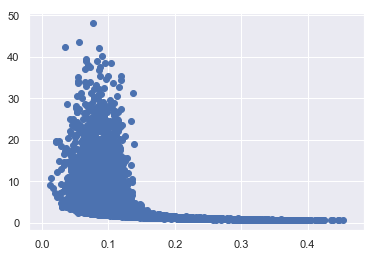

<Figure size 432x288 with 0 Axes>

In [168]:
plt.scatter(n_arr4, y_arr4)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650315215", plt, n_arr1, y_arr1)

In [134]:
# Adam_1642206165   / 7 crit
a, b, y_arr, n_arr = v4_prepare_data_from_files('Adam_1650319683', 0.5)
print(a, b)

1      [0, 3.6697821281922005, 0.1, 1.0, 1079596.6553995279]
0.08779756298886363
0 || 0.5001052791718864 || 1 || 1 
0      [0, 33.387062380040256, 0.1, 0.0, 211510.74898522827]
0.13341213031581972
0 || 0.5182300094756586 || 0 || 0 
0      [0, 34.23246034353168, 0.5, 0.0, 277272.523469958]
0.10031252226690526
0 || 0.5127081157078347 || 0 || 0 
1      [0, 63.94893952909868, 0.0, 1.0, 110119.2936416693]
0.18783455348264555
0 || 0.5496172430993672 || 1 || 1 
1      [0, 72.59332925828419, 0.5, 1.0, 79457.29799551774]
0.18551225343283892
0 || 0.5741433366667323 || 1 || 1 
0      [1, 85.72767502680796, 0.5, 0.0, 686897.5673828084]
0.08759885316229936
1 || 0.5012987335217185 || 0 || 0 
1      [1, 60.21204198124137, 1.0, 1.0, 180732.64061710812]
0.11234008071208347
1 || 0.5250770171897475 || 1 || 1 
0      [1, 29.621575285137013, 0.0, 0.0, 278841.79037396004]
0.1410278273306342
1 || 0.5075917808064064 || 0 || 0 
0      [1, 5.822784474377518, 0.1, 0.0, 900555.4250184604]
0.10674401484871746
1 ||

0.12284891219149031
14 || 0.5004027139606444 || 0 || 0 
1      [14, 24.620814863038813, 0.0, 1.0, 1078463.2389380692]
0.0963243341077589
14 || 0.5000699013234988 || 1 || 1 
0      [14, 2.691715174254022, 0.5, 0.0, 265368.0244397481]
0.120225282068253
14 || 0.5134209814493595 || 0 || 0 
0      [14, 73.77776365956913, 0.5, 0.0, 211350.56847868065]
0.0666273203896727
14 || 0.5208799404544514 || 0 || 0 
0      [15, 92.80998052017546, 0.5, 0.0, 762839.4501140801]
0.10412505660066461
15 || 0.5003659715645367 || 0 || 0 
0      [15, 44.01088618135254, 0.1, 0.0, 1449638.9411177987]
0.09214764950144542
15 || 0.5000068783443817 || 0 || 0 
0      [15, 28.909077324309195, 0.5, 0.0, 246968.18621921056]
0.10177177990699927
15 || 0.5160220619038473 || 0 || 0 
0      [15, 39.07394959331981, 0.1, 0.0, 388944.01809463]
0.11349934512156586
15 || 0.5048918834228535 || 0 || 0 
1      [15, 25.82944002315644, 0.0, 1.0, 149415.8897673301]
0.13076575740355897
15 || 0.5303846532903393 || 1 || 1 
0      [16, 67.8

0.11299699959739848
28 || 0.5018193107667236 || 0 || 0 
0      [28, 23.056955704737835, 0.0, 0.0, 820899.8039460352]
0.10098244444510707
28 || 0.5002536625869904 || 0 || 0 
1      [28, 82.65103695274605, 0.5, 1.0, 1334143.674636561]
0.12958900743874455
28 || 0.5000005533385736 || 1 || 1 
1      [29, 59.954211145986946, 1.0, 1.0, 613988.9995521004]
0.12075600958934883
29 || 0.5006507798993856 || 1 || 1 
1      [29, 19.02287227414637, 0.5, 1.0, 1559467.6509776437]
0.0918731132236009
29 || 0.5000035514760222 || 1 || 1 
0      [29, 54.42771581108913, 0.0, 0.0, 75399.3844874003]
0.19950846610589854
29 || 0.5658903227259997 || 0 || 0 
0      [29, 45.05504075224015, 0.0, 0.0, 592519.469593336]
0.1304504668656184
29 || 0.5006791551515759 || 0 || 0 
1      [29, 34.80357352301717, 1.0, 1.0, 647406.6780093098]
0.09469105042045041
29 || 0.5011569803047312 || 1 || 1 
0      [30, 2.5595761545101015, 1.0, 0.0, 117811.52655491997]
0.18548430475173347
30 || 0.5607718555285504 || 0 || 0 
1      [30, 2.7

0.11782952142382659
43 || 0.5335688529644259 || 0 || 0 
0      [43, 63.9057383212523, 0.1, 0.0, 343981.13797329995]
0.07771757573113434
43 || 0.5089178153724456 || 0 || 0 
1      [43, 26.664704910552274, 0.0, 1.0, 270433.5077659262]
0.1191326897994973
43 || 0.5115021288849262 || 1 || 1 
1      [43, 54.90160460435559, 1.0, 1.0, 1858621.8402224681]
0.11337670848426992
43 || 0.5000000372798407 || 1 || 1 
0      [43, 0.09306482941093819, 1.0, 0.0, 306401.29893688805]
0.12290491683326164
43 || 0.5089168151675492 || 0 || 0 
1      [44, 36.172017787997554, 1.0, 1.0, 352756.9621339427]
0.11279498212662005
44 || 0.50609116880455 || 1 || 1 
0      [44, 32.001820802552274, 0.1, 0.0, 1428185.6472794004]
0.10128499871958722
44 || 0.5000035611435325 || 0 || 0 
0      [44, 22.022374478772328, 1.0, 0.0, 141136.4969996589]
0.12736977445557682
44 || 0.5404856971187054 || 0 || 0 
0      [44, 37.1971914280923, 0.5, 0.0, 889096.4381070443]
0.10066804025386587
44 || 0.5001636227547209 || 0 || 0 
0      [44,

0.11457671310468516
57 || 0.5395273728238612 || 1 || 1 
1      [57, 31.018835465039928, 0.0, 1.0, 612341.8293111335]
0.08279128874124672
57 || 0.5022613490441515 || 1 || 1 
0      [57, 24.034790754450984, 0.5, 0.0, 685943.4436065924]
0.12149684027819707
57 || 0.5003180605471996 || 0 || 0 
0      [57, 33.165508180472905, 0.0, 0.0, 422937.78864516696]
0.09242091694877426
57 || 0.5048918562920505 || 0 || 0 
1      [58, 44.30485131341918, 0.5, 1.0, 1029238.944991378]
0.10708494213949486
58 || 0.500042593195218 || 1 || 1 
1      [58, 7.662484551484488, 0.1, 1.0, 336983.7495068828]
0.1307590900136844
58 || 0.5059132524062734 || 1 || 1 
0      [58, 56.380513244691755, 0.5, 0.0, 189797.56969484634]
0.08748595846364092
58 || 0.5255759223749339 || 0 || 0 
0      [58, 20.885546617519573, 0.1, 0.0, 987288.9476588716]
0.11290427165967162
58 || 0.5000396437978732 || 0 || 0 
0      [58, 55.48791873197988, 0.5, 0.0, 415859.409305958]
0.1198639714226849
58 || 0.5036921396872603 || 0 || 0 
0      [59, 6

0.11451162316327276
71 || 0.5076801010217216 || 0 || 0 
0      [71, 23.361162604841635, 0.0, 0.0, 477672.55258094356]
0.08439552149728062
71 || 0.5036671171129782 || 0 || 0 
1      [72, 76.9158552837865, 0.5, 1.0, 623155.6536115744]
0.10930680699512287
72 || 0.5006340945113215 || 1 || 1 
1      [72, 75.176660346019, 0.5, 1.0, 399252.92052303423]
0.10377852748968017
72 || 0.5059228427334609 || 1 || 1 
0      [72, 87.43406858246897, 1.0, 0.0, 149426.8878071541]
0.1331266138055153
72 || 0.5363192934182228 || 0 || 0 
1      [72, 54.55023272247328, 0.0, 1.0, 92239.00241336318]
0.2201511852305191
72 || 0.5647567717982668 || 1 || 1 
1      [72, 3.4502256452661584, 0.5, 1.0, 784261.5382907242]
0.09647419803328781
72 || 0.500345651893573 || 1 || 1 
0      [73, 62.420118512238865, 0.5, 0.0, 105746.89597548419]
0.1860393228219214
73 || 0.5479369894121489 || 0 || 0 
1      [73, 46.37412977115495, 0.0, 1.0, 1437003.816594426]
0.11569456919490137
73 || 0.500000848746825 || 1 || 1 
1      [73, 76.754

0.11665874285599422
86 || 0.5028616187739974 || 0 || 0 
1      [86, 82.72228474918025, 0.1, 1.0, 67697.52020854235]
0.2724613269076665
86 || 0.5948467533896882 || 1 || 1 
1      [86, 51.54010786913557, 1.0, 1.0, 74933.97739846038]
0.28505193275194946
86 || 0.5869165182653133 || 1 || 1 
0      [86, 87.15975237316584, 0.0, 0.0, 1044103.9937305434]
0.06894062546281761
86 || 0.500400384568124 || 0 || 0 
0      [86, 97.07593097709047, 1.0, 0.0, 1169095.9241182455]
0.11383112996475346
86 || 0.5000059477423173 || 0 || 0 
0      [87, 94.64119701720597, 0.0, 0.0, 171517.33077983322]
0.12244779942540766
87 || 0.5331526021006242 || 0 || 0 
1      [87, 26.430785211015383, 0.5, 1.0, 258081.87519085463]
0.14427028026535055
87 || 0.5110258020165912 || 1 || 1 
1      [87, 54.83318900525924, 1.0, 1.0, 306657.81910601864]
0.13379449460952325
87 || 0.5064041080505002 || 1 || 1 
1      [87, 24.032933161302, 0.5, 1.0, 926619.3943999484]
0.08416582554860312
87 || 0.5003273510794786 || 1 || 1 
1      [87, 56

100 || 0.5004910305912014 || 1 || 1 
0      [100, 72.61256578228483, 1.0, 0.0, 1512086.902932442]
0.10981574939481976
100 || 0.5000006314142179 || 0 || 0 
0      [100, 4.37097824628459, 1.0, 0.0, 213833.99106955944]
0.10042850743912991
100 || 0.5213696194345606 || 0 || 0 
0      [101, 82.59388679305755, 0.5, 0.0, 191464.9744032673]
0.09356582458862872
101 || 0.5240834468069369 || 0 || 0 
0      [101, 59.86164809951385, 0.5, 0.0, 618026.1417647788]
0.1056691358527639
101 || 0.5009233218202462 || 0 || 0 
1      [101, 50.03287411053251, 0.0, 1.0, 1196900.365233637]
0.11037301060799488
101 || 0.5000094074130707 || 1 || 1 
1      [101, 82.89495363766692, 0.0, 1.0, 459466.96493328974]
0.12011433289114241
101 || 0.5021278110674502 || 1 || 1 
1      [101, 32.67120315109464, 0.1, 1.0, 193559.10678594213]
0.10386492030414267
101 || 0.529315960412267 || 1 || 1 
0      [102, 57.04765818517992, 0.5, 0.0, 262094.25545222915]
0.12213439898311794
102 || 0.5148972654426819 || 0 || 0 
1      [102, 59.13

0.09982140501610894
114 || 0.5033073993096955 || 0 || 0 
0      [114, 11.078093258005833, 0.5, 0.0, 321347.5170660845]
0.1088284223044474
114 || 0.5086525005022566 || 0 || 0 
1      [115, 12.667929268073747, 0.1, 1.0, 485220.0989067108]
0.1133395813813243
115 || 0.5023732718702035 || 1 || 1 
1      [115, 9.929387366667347, 0.0, 1.0, 2024799.1374146137]
0.07255239715546637
115 || 0.5000021955860675 || 1 || 1 
0      [115, 18.219763183511855, 0.0, 0.0, 503449.49112986855]
0.11755795890520696
115 || 0.5013717964768464 || 0 || 0 
1      [115, 12.400547349609676, 1.0, 1.0, 136654.65317674167]
0.15006289684470592
115 || 0.5387968332275707 || 1 || 1 
0      [115, 45.526373984286025, 1.0, 0.0, 2533089.722024112]
0.12775612329181932
115 || 0.5000000000169474 || 0 || 0 
1      [116, 60.27052691556389, 0.1, 1.0, 267198.8920039467]
0.11473876476782344
116 || 0.5133401389479291 || 1 || 1 
0      [116, 3.1502285703403796, 0.0, 0.0, 814203.5219060085]
0.13180663000262086
116 || 0.5000641902663517 || 

0.11247717474833037
129 || 0.5001319013820769 || 1 || 1 
0      [129, 36.03659766955195, 0.0, 0.0, 2959255.740229797]
0.11821421100818263
129 || 0.5000000000022274 || 0 || 0 
0      [129, 60.83756739108219, 0.5, 0.0, 1055764.505976044]
0.13614791385261812
129 || 0.5000050866263911 || 0 || 0 
1      [129, 48.14888529647912, 0.1, 1.0, 383149.1291545485]
0.11068124895088298
129 || 0.5049054866433675 || 1 || 1 
0      [129, 52.17716424464503, 0.0, 0.0, 662634.4906125332]
0.06917433991846421
129 || 0.5023807215140134 || 0 || 0 
0      [130, 9.087091348262561, 0.5, 0.0, 1212260.567409033]
0.08965367870541185
130 || 0.500034458089661 || 0 || 0 
1      [130, 91.59897527067501, 0.5, 1.0, 478663.90600066975]
0.1376139300066663
130 || 0.5016145108219512 || 1 || 1 
1      [130, 32.441848059476555, 1.0, 1.0, 1009036.8081089573]
0.11178278887876485
130 || 0.5000345733078859 || 1 || 1 
1      [130, 3.3982358321191732, 0.0, 1.0, 2053088.429736539]
0.11531338284175925
130 || 0.5000000052267146 || 1 || 

0.14155181747528092
143 || 0.5002380816993399 || 0 || 0 
0      [143, 60.73729323505721, 0.5, 0.0, 418931.7323690533]
0.0944910924064787
143 || 0.504492270109005 || 0 || 0 
0      [143, 2.01067529892921, 0.5, 0.0, 948367.5600934902]
0.13032129392428207
143 || 0.5000176115641535 || 0 || 0 
1      [143, 43.93964580796563, 0.5, 1.0, 589132.7526162543]
0.11041334710813812
143 || 0.5011721339683117 || 1 || 1 
0      [143, 69.51178530018008, 0.5, 0.0, 81028.86043378286]
0.24920012801874009
143 || 0.5808637139108194 || 0 || 0 
0      [144, 50.82998668822104, 0.5, 0.0, 1151290.218985184]
0.0545467851347366
144 || 0.5006171055694592 || 0 || 0 
1      [144, 81.51460545501304, 0.5, 1.0, 376769.7405469943]
0.11300121298629903
144 || 0.5058658568004339 || 1 || 1 
0      [144, 84.32178314560713, 0.0, 0.0, 230284.11932758425]
0.09746830721534841
144 || 0.5170538967740508 || 0 || 0 
1      [144, 64.04210568887454, 0.0, 1.0, 275684.81835706544]
0.09998728392631455
144 || 0.5126069129851941 || 1 || 1 
1

0.09854732322927316
157 || 0.5049084940858231 || 0 || 0 
0      [157, 50.08303416001415, 0.1, 0.0, 1237819.416697269]
0.11075890616671673
157 || 0.5000064277594307 || 0 || 0 
0      [157, 98.7640056955894, 1.0, 0.0, 344996.7411918632]
0.0978003547776314
157 || 0.5062322126478902 || 0 || 0 
0      [157, 23.814788996596896, 0.0, 0.0, 969892.4080673602]
0.09692227098408131
157 || 0.5001026134861651 || 0 || 0 
0      [158, 39.4597162683683, 0.5, 0.0, 123468.40144968765]
0.1701182410052577
158 || 0.547335971440092 || 0 || 0 
0      [158, 44.25296280090803, 0.0, 0.0, 352229.97866711393]
0.09932236111396893
158 || 0.5089959590415836 || 0 || 0 
0      [158, 72.56498201952797, 1.0, 0.0, 1209007.391425815]
0.11322204576766391
158 || 0.5000072238625646 || 0 || 0 
1      [158, 24.67966995557407, 0.0, 1.0, 940413.3872409165]
0.10864726127035237
158 || 0.5000904295807419 || 1 || 1 
0      [158, 46.14699718393456, 0.0, 0.0, 720495.7608288961]
0.09646532851021716
158 || 0.5007387175032217 || 0 || 0 
0

0.09233912244884392
171 || 0.5011470501713537 || 1 || 1 
1      [171, 56.594688507453775, 0.1, 1.0, 982075.8067919137]
0.09766303846050832
171 || 0.5001034103214803 || 1 || 1 
1      [171, 18.277225541157733, 0.0, 1.0, 387806.59089540323]
0.1299706039830221
171 || 0.5035977963042869 || 1 || 1 
0      [171, 56.7455305764024, 0.1, 0.0, 512887.52818572766]
0.08740572159692872
171 || 0.5032652292937188 || 0 || 0 
0      [172, 97.0009243624413, 0.5, 0.0, 808663.4221528922]
0.1149434364036206
172 || 0.5001470081479523 || 0 || 0 
0      [172, 96.66714584924712, 0.0, 0.0, 357900.7568850408]
0.08685174562685936
172 || 0.5084946534272955 || 0 || 0 
1      [172, 14.025367899075025, 0.0, 1.0, 534452.0486908634]
0.09155967686356871
172 || 0.5027336797557044 || 1 || 1 
1      [172, 45.98805699536714, 0.5, 1.0, 889364.2650244667]
0.11170386914253236
172 || 0.5001002012254036 || 1 || 1 
1      [172, 63.458496272999874, 0.0, 1.0, 93301.2505972331]
0.2228097789782601
172 || 0.5683724424436128 || 1 || 1 

0.3208717174240512
185 || 0.6058250410546704 || 0 || 0 
0      [185, 39.688762762244906, 0.5, 0.0, 1323317.9910437856]
0.10159047966480793
185 || 0.5000071802404166 || 0 || 0 
1      [185, 24.33880847408186, 0.5, 1.0, 184432.09943364107]
0.13421720748371652
185 || 0.5252761132393666 || 1 || 1 
0      [186, 45.94929411493892, 0.5, 0.0, 379837.4038073583]
0.10691233545134936
186 || 0.5052729205326152 || 0 || 0 
0      [186, 19.448230515757547, 0.5, 0.0, 316728.8035476918]
0.10725346018492175
186 || 0.5099829525629733 || 0 || 0 
1      [186, 25.862507197963758, 1.0, 1.0, 103863.46466100204]
0.18683493644017043
186 || 0.5636163755493935 || 1 || 1 
1      [186, 44.909595345213184, 0.5, 1.0, 241211.01149960852]
0.08071361045647017
186 || 0.5164522611189051 || 1 || 1 
0      [186, 83.15093890495204, 1.0, 0.0, 1404759.0958110162]
0.10966870597422378
186 || 0.5000017227097616 || 0 || 0 
0      [187, 44.126144017890795, 1.0, 0.0, 321484.2733273838]
0.1278711137397825
187 || 0.505891443004967 || 

0.10801131592598216
199 || 0.509877916342112 || 1 || 1 
1      [199, 4.679256953530447, 0.5, 1.0, 91612.88660354486]
0.1969493205074738
199 || 0.5717242766160288 || 1 || 1 
0      [200, 16.010228562017335, 0.0, 0.0, 207107.3294784747]
0.11990205051017523
200 || 0.5201709231993984 || 0 || 0 
1      [200, 81.18482235056005, 0.1, 1.0, 381483.52951772674]
0.11352487921490713
200 || 0.5040582779473934 || 1 || 1 
1      [200, 20.275135961919645, 0.5, 1.0, 529505.4187915244]
0.11998488956624785
200 || 0.50161165655884 || 1 || 1 
0      [200, 7.36623559723204, 0.1, 0.0, 1686246.6779872847]
0.10145230724185265
200 || 0.5000005459707562 || 0 || 0 
0      [200, 11.108106222727093, 0.5, 0.0, 834161.6283482491]
0.11542659785037016
200 || 0.5001208886768772 || 0 || 0 
1      [201, 25.194391959472394, 0.1, 1.0, 630094.1204250806]
0.10873694343771576
201 || 0.5008370508466569 || 1 || 1 
0      [201, 2.2650379402413767, 0.0, 0.0, 770182.0601300009]
0.09084476745683713
201 || 0.5005766512722805 || 0 || 

0.34073282212756395
213 || 0.6064053308539276 || 0 || 0 
0      [213, 58.38025902754631, 0.1, 0.0, 749021.9546445269]
0.08018137200644394
213 || 0.5010187385442805 || 0 || 0 
1      [214, 93.80917169717137, 0.5, 1.0, 201187.1887361125]
0.13328541886355746
214 || 0.5230350172864545 || 1 || 1 
0      [214, 29.694893581097574, 0.0, 0.0, 853225.8830723909]
0.10018020074070393
214 || 0.5002321283099055 || 0 || 0 
0      [214, 86.38209635537612, 0.5, 0.0, 874233.6455113112]
0.11304850055001614
214 || 0.5001030606081539 || 0 || 0 
0      [214, 9.669435520345344, 1.0, 0.0, 698647.1371532014]
0.11927883258591684
214 || 0.5003382765531486 || 0 || 0 
1      [214, 88.13941413905661, 1.0, 1.0, 1119117.4365613991]
0.1095112271939502
214 || 0.5000139305455392 || 1 || 1 
0      [215, 9.87244617647135, 1.0, 0.0, 225387.07027072855]
0.12410850723342717
215 || 0.5194569322568559 || 0 || 0 
0      [215, 69.03625332686528, 0.1, 0.0, 260376.76377161514]
0.053187675667434715
215 || 0.5176964541876702 || 0 ||

0.08339937305135027
227 || 0.5017494384230453 || 1 || 1 
1      [227, 36.52717357480731, 1.0, 1.0, 576017.3770805396]
0.12011147753521544
227 || 0.5009681278596515 || 1 || 1 
1      [228, 68.47069171783545, 1.0, 1.0, 622572.0653629781]
0.09577763574877096
228 || 0.5012025391103007 || 1 || 1 
0      [228, 33.84188287430896, 0.0, 0.0, 1522060.9732323731]
0.11162093261830196
228 || 0.5000006177025589 || 0 || 0 
0      [228, 87.36272880279049, 1.0, 0.0, 456279.0210528436]
0.11895814219369405
228 || 0.502901611747302 || 0 || 0 
0      [228, 69.36348826758736, 0.0, 0.0, 231272.53615744188]
0.09545877550636883
228 || 0.5199198804704517 || 0 || 0 
0      [228, 95.7886645682715, 0.1, 0.0, 623281.2046446672]
0.10946988260907031
228 || 0.5007784058149952 || 0 || 0 
1      [229, 39.42124416580242, 0.5, 1.0, 730738.3225723213]
0.11101853998147515
229 || 0.5003097659992524 || 1 || 1 
0      [229, 7.090175081553863, 0.0, 0.0, 172070.3335444489]
0.11750895251498125
229 || 0.5281138894028264 || 0 || 0 

0.09284799009401483
241 || 0.5067808010496465 || 1 || 1 
0      [242, 5.398857202355495, 1.0, 0.0, 258645.49799861645]
0.12910347394862232
242 || 0.5122172239086855 || 0 || 0 
0      [242, 16.17429483640283, 0.5, 0.0, 449709.4880142681]
0.1085856002343845
242 || 0.5032035482534061 || 0 || 0 
1      [242, 82.4714565469624, 0.5, 1.0, 456035.93741387915]
0.10751529135126163
242 || 0.5029850794841528 || 1 || 1 
1      [242, 39.504018629116274, 0.0, 1.0, 293982.42621053767]
0.10523892490201348
242 || 0.5121945743480825 || 1 || 1 
1      [242, 54.19849445328014, 0.1, 1.0, 550958.0221046408]
0.03666374156848199
242 || 0.5074461282537293 || 1 || 1 
0      [243, 85.17728667360296, 1.0, 0.0, 125187.77820300341]
0.1860758137471972
243 || 0.5471489829069609 || 0 || 0 
0      [243, 57.368381583470054, 0.1, 0.0, 986334.7342824406]
0.11599754301989283
243 || 0.5000394414906228 || 0 || 0 
0      [243, 2.4084766743487696, 0.5, 0.0, 545618.1651224917]
0.0735181371618135
243 || 0.5039794106710221 || 0 ||

0.11148691423593482
256 || 0.5039118857930923 || 0 || 0 
0      [256, 47.926539418099416, 0.5, 0.0, 371638.6902024891]
0.11342897704915689
256 || 0.5047810680398978 || 0 || 0 
0      [256, 3.3405568399754895, 1.0, 0.0, 179873.8750202674]
0.15508677411846206
256 || 0.5283116892630411 || 0 || 0 
0      [256, 38.25211893456804, 0.1, 0.0, 81272.85065726952]
0.21690114025441537
256 || 0.5925521438703092 || 0 || 0 
0      [256, 51.65156377520708, 1.0, 0.0, 525114.6685856776]
0.1281013376858315
256 || 0.5011729332586229 || 0 || 0 
1      [257, 62.33239003509426, 0.0, 1.0, 534727.7266675197]
0.11635155229459682
257 || 0.5011763044210864 || 1 || 1 
0      [257, 41.64003857718837, 0.0, 0.0, 71077.93413184323]
0.2651893744249954
257 || 0.5991632183336913 || 0 || 0 
0      [257, 40.14603932663016, 0.0, 0.0, 106518.92702577426]
0.17927966745366977
257 || 0.5560056787417502 || 0 || 0 
1      [257, 19.34649454224966, 1.0, 1.0, 768391.353059266]
0.10224377791970471
257 || 0.5004892399589203 || 1 || 1 

0.09945224561136068
270 || 0.5042884475131849 || 0 || 0 
0      [270, 31.693507739987425, 0.5, 0.0, 3340053.6964823604]
0.10864304017498372
270 || 0.5000000000008312 || 0 || 0 
0      [270, 66.7230109396632, 0.0, 0.0, 109736.62882791946]
0.1776472818402752
270 || 0.5552632950219355 || 0 || 0 
0      [271, 44.37972309353189, 0.1, 0.0, 210859.53787460556]
0.11222275499161578
271 || 0.518966499764214 || 0 || 0 
1      [271, 42.13606439087937, 1.0, 1.0, 115320.07157591014]
0.18568154594361097
271 || 0.5538863346967412 || 1 || 1 
0      [271, 85.12963056606586, 0.5, 0.0, 236205.48441151308]
0.12163221643897258
271 || 0.5167657447797862 || 0 || 0 
1      [271, 13.59084072518224, 1.0, 1.0, 559031.4427550323]
0.11615420424165734
271 || 0.5010184186722425 || 1 || 1 
1      [271, 3.6650029453197286, 0.1, 1.0, 230228.4282165812]
0.12836618203530675
271 || 0.5189306118822505 || 1 || 1 
0      [272, 44.6015033753689, 0.1, 0.0, 1097898.947928588]
0.12133849130355766
272 || 0.500008914055191 || 0 || 

0.09012359163409867
284 || 0.5025362145941784 || 0 || 0 
0      [284, 80.83491357219226, 0.1, 0.0, 541382.8326160365]
0.14140978336131857
284 || 0.5005678117044193 || 0 || 0 
0      [284, 46.65323726310558, 0.0, 0.0, 598559.3144626935]
0.11895201434263437
284 || 0.5006290624485962 || 0 || 0 
1      [285, 96.63430159592934, 0.5, 1.0, 792435.0592347913]
0.12933515904092735
285 || 0.500099439372434 || 1 || 1 
0      [285, 59.748571522460324, 0.5, 0.0, 362631.18644314504]
0.12949324201908366
285 || 0.5040538511580618 || 0 || 0 
1      [285, 65.12554023375115, 0.0, 1.0, 486933.3675960185]
0.05387764098383212
285 || 0.5074375511186943 || 1 || 1 
1      [285, 36.08043615172292, 0.0, 1.0, 2130744.406065191]
0.08480852384891532
285 || 0.5000002466029944 || 1 || 1 
1      [285, 94.15742701001908, 0.1, 1.0, 559585.4435927952]
0.06636591651508573
285 || 0.5048410187296686 || 1 || 1 
1      [286, 66.10042514141216, 0.5, 1.0, 1962003.8610649912]
0.0957951300877397
286 || 0.5000001599695104 || 1 || 1

0.07616776476858174
298 || 0.5005262098108434 || 0 || 0 
1      [298, 70.3997325361864, 1.0, 1.0, 425686.2341694972]
0.08812692882534469
298 || 0.5055771799197297 || 1 || 1 
0      [298, 98.01896660391886, 1.0, 0.0, 2139973.4520678427]
0.08806556340565666
298 || 0.5000001812384665 || 0 || 0 
0      [299, 4.008905235012422, 0.1, 0.0, 64092.823085013224]
0.2598647457766341
299 || 0.5821869972015665 || 0 || 0 
0      [299, 20.73084341171883, 0.0, 0.0, 1086238.8332311744]
0.06947851389045857
299 || 0.5002970601778143 || 0 || 0 
0      [299, 87.1201125309377, 0.0, 0.0, 177646.78778755327]
0.168968326201405
299 || 0.5245255558054692 || 0 || 0 
0      [299, 32.75205186713876, 0.5, 0.0, 2394935.0148847084]
0.10218019438634153
299 || 0.5000000029429933 || 0 || 0 
1      [299, 85.16453894553985, 0.5, 1.0, 622546.1809188041]
0.1235172271356266
299 || 0.5005103284731148 || 1 || 1 
1      [300, 92.82242767108724, 0.1, 1.0, 162683.04069596095]
0.13253599542844866
300 || 0.528350527884276 || 1 || 1 


0.09136265817097933
312 || 0.5002949098135321 || 1 || 1 
0      [312, 78.13868272044054, 0.5, 0.0, 2012881.7348392357]
0.09457221004646055
312 || 0.5000001009238041 || 0 || 0 
1      [313, 55.81096030392347, 0.1, 1.0, 1181842.4260265678]
0.12888044147456051
313 || 0.5000026073841494 || 1 || 1 
1      [313, 67.1731153367086, 0.5, 1.0, 635346.5993413723]
0.07351693370177494
313 || 0.5025699542606139 || 1 || 1 
0      [313, 61.92660140079288, 1.0, 0.0, 1521929.9561440093]
0.11808355019223435
313 || 0.5000003640618004 || 0 || 0 
0      [313, 69.70508253881613, 0.5, 0.0, 329550.84768854536]
0.13633830235562308
313 || 0.5063389924041607 || 0 || 0 
1      [313, 7.07387716078538, 0.0, 1.0, 757736.550335215]
0.08155387882796909
313 || 0.5009419692193762 || 1 || 1 
1      [314, 43.56831609754418, 0.1, 1.0, 1611162.416685044]
0.1106810719208523
314 || 0.5000003512150407 || 1 || 1 
0      [314, 79.43773987594203, 0.0, 0.0, 635798.9952619271]
0.08511722645361904
314 || 0.5018888764206493 || 0 || 0 

0.13071751251067473
326 || 0.5132174847489983 || 1 || 1 
0      [327, 57.574112711140494, 0.1, 0.0, 96035.66957911525]
0.1631047473558678
327 || 0.562899678408526 || 0 || 0 
0      [327, 44.82298293090208, 0.0, 0.0, 405723.39067369973]
0.12640662683914938
327 || 0.5030082476107697 || 0 || 0 
0      [327, 52.578781290685704, 0.5, 0.0, 271814.65462447016]
0.08261933547298995
327 || 0.514667778942908 || 0 || 0 
0      [327, 80.59804061936251, 1.0, 0.0, 1406715.5473062794]
0.08347576964865473
327 || 0.5000182729898741 || 0 || 0 
1      [327, 45.371828578697176, 0.5, 1.0, 110419.1644718438]
0.18367842486017713
327 || 0.5555197497655201 || 1 || 1 
1      [328, 38.35403595172255, 0.0, 1.0, 65220.83746279541]
0.24206507991506584
328 || 0.5939832217972313 || 1 || 1 
0      [328, 25.47198524469171, 0.5, 0.0, 777224.1473884989]
0.08483464818996518
328 || 0.5007509649972799 || 0 || 0 
0      [328, 85.42800259689973, 0.1, 0.0, 979500.0265712816]
0.10577463994889635
328 || 0.5000612413513569 || 0 ||

0.11477753866735062
341 || 0.5088774712912809 || 0 || 0 
0      [341, 42.47302193430513, 0.5, 0.0, 211946.19960052543]
0.15023799767491294
341 || 0.5151946823371033 || 0 || 0 
0      [341, 3.334863758094847, 0.0, 0.0, 1293079.8966346234]
0.08008235690428019
341 || 0.500050463480158 || 0 || 0 
0      [341, 94.79798804665651, 0.5, 0.0, 616089.6456267113]
0.11201798821558032
341 || 0.5008658205429932 || 0 || 0 
1      [342, 60.997197923494376, 0.5, 1.0, 105642.33973807128]
0.18843588167625042
342 || 0.5641782335395861 || 1 || 1 
0      [342, 57.019471495218575, 0.5, 0.0, 792370.4693832496]
0.12144877975230924
342 || 0.5001086175531918 || 0 || 0 
1      [342, 43.86307585980403, 0.0, 1.0, 886021.1334032213]
0.0748967173919661
342 || 0.5006011884161365 || 1 || 1 
1      [342, 82.42827427184363, 0.1, 1.0, 89623.37064329186]
0.2524668378016547
342 || 0.5800851404052869 || 1 || 1 
1      [342, 90.58252287811173, 0.0, 1.0, 573097.3291193155]
0.1040012783938822
342 || 0.5014053246076087 || 1 || 1

0.23773862343279242
355 || 0.6030758833255218 || 1 || 1 
0      [355, 27.629034752806326, 0.5, 0.0, 132878.93696779286]
0.16221247942806996
355 || 0.5405021204946707 || 0 || 0 
1      [355, 59.52572638803798, 1.0, 1.0, 186764.49789617702]
0.13499412638207628
355 || 0.52570353070254 || 1 || 1 
0      [356, 5.531229777779073, 0.5, 0.0, 436321.3769570742]
0.11013988433940039
356 || 0.5033328084391512 || 0 || 0 
0      [356, 31.86966995804893, 0.5, 0.0, 486686.89553626627]
0.09280102248550588
356 || 0.5032603687237672 || 0 || 0 
0      [356, 83.16587894575447, 0.0, 0.0, 188723.38935225236]
0.13489836910438097
356 || 0.52766329957312 || 0 || 0 
0      [356, 76.15761204357683, 1.0, 0.0, 95788.791066687]
0.19045053444088303
356 || 0.5690607836947784 || 0 || 0 
1      [356, 4.998625188379147, 0.0, 1.0, 3435858.6067666896]
0.08570465619387026
356 || 0.5000000000882333 || 1 || 1 
0      [357, 77.77657037468788, 0.0, 0.0, 391437.29192656244]
0.10671586872239318
357 || 0.5056154503547463 || 0 || 0

0.0960793678267879
369 || 0.5015205648301314 || 1 || 1 
0      [370, 33.911282697164026, 0.1, 0.0, 599823.8855270009]
0.06301974921930256
370 || 0.5039593551602393 || 0 || 0 
1      [370, 69.07068869219731, 1.0, 1.0, 390246.27483433764]
0.09899696558128623
370 || 0.5064415798557935 || 1 || 1 
1      [370, 8.503071708371351, 0.1, 1.0, 125654.67048431923]
0.14787286257975732
370 || 0.5407874099708389 || 1 || 1 
1      [370, 66.40988140968228, 0.1, 1.0, 60413.321726831404]
0.25875931427421034
370 || 0.624256728434207 || 1 || 1 
0      [370, 66.41494855462233, 0.5, 0.0, 1171120.0628305732]
0.0725601450205228
370 || 0.5001814654429089 || 0 || 0 
0      [371, 96.99629563135686, 1.0, 0.0, 554781.4049917719]
0.07728492547056333
371 || 0.5039327253065459 || 0 || 0 
0      [371, 85.81163134995722, 0.1, 0.0, 546631.2649603119]
0.13410584399372996
371 || 0.5009492643400967 || 0 || 0 
0      [371, 28.50233009035842, 0.0, 0.0, 324486.8249704595]
0.11749889747444095
371 || 0.5072129862034056 || 0 || 

0.3219382827848546
384 || 0.621467100545148 || 1 || 1 
1      [384, 93.6849393719753, 1.0, 1.0, 680181.3284991534]
0.07897279180108605
384 || 0.5014575942372221 || 1 || 1 
0      [384, 19.27967923157865, 0.5, 0.0, 587921.9007412494]
0.12265157461979878
384 || 0.5007931499577016 || 0 || 0 
0      [384, 10.733328997373215, 0.1, 0.0, 1102763.309882911]
0.12066543220942735
384 || 0.5000108670316757 || 0 || 0 
0      [384, 60.840812481288864, 0.1, 0.0, 879892.5369715058]
0.09778325683884977
384 || 0.5001872480079435 || 0 || 0 
1      [385, 18.130369307042578, 1.0, 1.0, 839878.2325427708]
0.09749050064045628
385 || 0.5003394002660131 || 1 || 1 
1      [385, 72.92070425668261, 0.0, 1.0, 1395853.4583241814]
0.14317436783857196
385 || 0.500000147432718 || 1 || 1 
0      [385, 39.28284903950316, 0.5, 0.0, 1457419.8357206662]
0.10350228371743651
385 || 0.5000026159007138 || 0 || 0 
0      [385, 21.85215616951894, 0.1, 0.0, 1160044.289678924]
0.11113945913616784
385 || 0.5000085422266085 || 0 || 0

0.10993235917247483
398 || 0.5000000048213191 || 1 || 1 
1      [398, 4.512318392453779, 0.0, 1.0, 242153.99395472155]
0.11918097862680509
398 || 0.5119168171755525 || 1 || 1 
1      [398, 87.76229692660641, 1.0, 1.0, 223113.00031227226]
0.08941553182349045
398 || 0.5226899419664999 || 1 || 1 
0      [398, 8.910193194844162, 0.5, 0.0, 634432.9282676344]
0.13482396311617834
398 || 0.5003415796553995 || 0 || 0 
1      [398, 79.01035021729636, 1.0, 1.0, 2587081.8908796045]
0.09459753095959142
398 || 0.5000000034656661 || 1 || 1 
1      [399, 28.302552969724225, 0.5, 1.0, 246711.7490022561]
0.07822152911557483
399 || 0.522279815586736 || 1 || 1 
0      [399, 56.54742002540827, 0.5, 0.0, 379047.8990979638]
0.09739235141646416
399 || 0.5070891491131271 || 0 || 0 
1      [399, 45.17987844625134, 0.5, 1.0, 674967.1599382738]
0.09629663648013494
399 || 0.5008801224340538 || 1 || 1 
0      [399, 45.32701016102049, 0.1, 0.0, 232295.76252841493]
0.12206286126559777
399 || 0.5164751388366084 || 0 |

0.14602913280829238
412 || 0.5433326732161265 || 0 || 0 
1      [412, 16.105846082907398, 0.1, 1.0, 1371311.181359257]
0.08742574919955079
412 || 0.5000168330945008 || 1 || 1 
1      [412, 49.57461503612779, 0.1, 1.0, 747369.0190301473]
0.0952795581918293
412 || 0.5005156117746283 || 1 || 1 
0      [412, 6.9645249518303975, 1.0, 0.0, 932849.7344703834]
0.12921708759025677
412 || 0.5000293607311889 || 0 || 0 
1      [412, 38.32114527119166, 0.1, 1.0, 371687.8744560928]
0.11072008648436657
412 || 0.5061592852066039 || 1 || 1 
1      [413, 91.3085648767581, 0.5, 1.0, 297197.3656649663]
0.08205019764123232
413 || 0.5128063449324758 || 1 || 1 
0      [413, 4.7489330402266, 1.0, 0.0, 72618.30073664033]
0.23447346150714818
413 || 0.5993246254118793 || 0 || 0 
1      [413, 59.02513344263125, 0.1, 1.0, 272018.98916389793]
0.10030300598785101
413 || 0.5131320156212298 || 1 || 1 
1      [413, 22.238646053386425, 1.0, 1.0, 109947.55939547863]
0.21073307652725107
413 || 0.554621179824883 || 1 || 1 

0.10806461918431606
426 || 0.5001544822063909 || 0 || 0 
1      [426, 39.686297955554984, 0.0, 1.0, 1586169.0893532515]
0.08231223742224461
426 || 0.5000075544442467 || 1 || 1 
1      [426, 79.1983902344363, 0.1, 1.0, 537101.2323781082]
0.07374792442304344
426 || 0.5047301478795545 || 1 || 1 
1      [427, 89.30224371854885, 0.0, 1.0, 1528169.5828977]
0.11564478239905977
427 || 0.500000376767186 || 1 || 1 
0      [427, 17.676153396999624, 0.5, 0.0, 1553544.348571961]
0.1292905934647339
427 || 0.5000000786570219 || 0 || 0 
0      [427, 94.29094606981177, 0.5, 0.0, 313374.3159176516]
0.09478002237931694
427 || 0.5105484407206949 || 0 || 0 
1      [427, 19.08365503621382, 0.5, 1.0, 106810.63741213817]
0.17811279364095442
427 || 0.5627656897212044 || 1 || 1 
1      [427, 89.84223302748995, 0.0, 1.0, 77438.55216604599]
0.23546060615477535
427 || 0.5950807040280992 || 1 || 1 
1      [428, 12.81861792766636, 0.5, 1.0, 1180893.9408107002]
0.11242783845585748
428 || 0.5000093702661302 || 1 || 1 

0.09490232393493225
440 || 0.500017871885978 || 0 || 0 
1      [440, 35.805291351210236, 0.1, 1.0, 579059.9547525]
0.09188557910451657
440 || 0.5020734517991818 || 1 || 1 
0      [440, 44.62247039481007, 0.1, 0.0, 179679.54652871037]
0.12132955079384726
440 || 0.5266797879504993 || 0 || 0 
0      [441, 66.10928406759572, 0.0, 0.0, 370877.7001400089]
0.07301764538768872
441 || 0.5086132582340254 || 0 || 0 
1      [441, 0.591429760822898, 1.0, 1.0, 359482.3582045233]
0.12662890641438831
441 || 0.505939614938713 || 1 || 1 
0      [441, 87.3477805279859, 0.5, 0.0, 1403736.2836935401]
0.11445049695457811
441 || 0.5000014802248497 || 0 || 0 
0      [441, 27.708774581889916, 0.5, 0.0, 520823.30372780835]
0.09874540394959855
441 || 0.502515886988651 || 0 || 0 
1      [441, 99.63183965331976, 0.0, 1.0, 1623916.0680977013]
0.12752602572372826
441 || 0.5000000490993535 || 1 || 1 
1      [442, 89.32021783001917, 0.0, 1.0, 171269.1563157515]
0.10884214631317705
442 || 0.5277112409459072 || 1 || 1 


0.25956015598677085
454 || 0.5830196928385488 || 1 || 1 
1      [455, 9.896865338061172, 1.0, 1.0, 366739.5368996497]
0.07761428203333702
455 || 0.5087312990327894 || 1 || 1 
1      [455, 57.601924735295185, 0.0, 1.0, 420510.0318458321]
0.07382353366205567
455 || 0.5073731554983397 || 1 || 1 
0      [455, 86.22617911690126, 1.0, 0.0, 1023420.671295]
0.08542738316537997
455 || 0.5001350958146471 || 0 || 0 
1      [455, 25.351599866630504, 0.0, 1.0, 239063.1088857403]
0.1033736192535524
455 || 0.5172742969107236 || 1 || 1 
0      [455, 29.102672468842762, 0.0, 0.0, 1558763.5147924898]
0.08070797964965155
455 || 0.50001040292761 || 0 || 0 
0      [456, 39.19397871735971, 0.5, 0.0, 421808.5380459868]
0.117479278533444
456 || 0.5031962785885065 || 0 || 0 
0      [456, 44.636432229321, 0.0, 0.0, 1042892.2206064862]
0.10476917891516986
456 || 0.5000463092750314 || 0 || 0 
0      [456, 59.45323487070131, 1.0, 0.0, 287476.9681265839]
0.06877197601527284
456 || 0.5147152252722734 || 0 || 0 
1   

0.21863771479990607
468 || 0.5799144660063374 || 0 || 0 
0      [469, 85.49710533322472, 0.5, 0.0, 535310.8284913814]
0.10969023921238487
469 || 0.5016741847416025 || 0 || 0 
0      [469, 30.67875880897478, 0.0, 0.0, 1135984.6788097823]
0.09864052308580831
469 || 0.5000345460492205 || 0 || 0 
1      [469, 20.119118808875125, 0.0, 1.0, 590193.8269221107]
0.13902102191949642
469 || 0.5005484568948412 || 1 || 1 
1      [469, 28.271428710067287, 0.0, 1.0, 148935.92845270067]
0.10805904015503347
469 || 0.5351293944803577 || 1 || 1 
1      [469, 91.67764381177415, 1.0, 1.0, 605600.086619822]
0.09990154063019138
469 || 0.5011661743341945 || 1 || 1 
1      [470, 19.99895789432638, 0.1, 1.0, 199907.23308816407]
0.11233923255784536
470 || 0.5239570919549446 || 1 || 1 
1      [470, 30.474437475296547, 0.1, 1.0, 1423335.4247686071]
0.10064986715857395
470 || 0.5000040235787557 || 1 || 1 
0      [470, 88.72091916932408, 0.0, 0.0, 139208.28367287293]
0.1338615068640425
470 || 0.5402203432995758 || 0

0.09816050987906155
483 || 0.5001322226548198 || 1 || 1 
1      [483, 56.4064227846329, 0.1, 1.0, 353430.62572691555]
0.11425450906951021
483 || 0.5060327191743274 || 1 || 1 
1      [483, 30.01186429088926, 0.5, 1.0, 860889.1416618329]
0.11138996168508179
483 || 0.5001182600657216 || 1 || 1 
0      [483, 88.3430998219865, 0.1, 0.0, 92908.30923454468]
0.21932576533832301
483 || 0.56052415285682 || 0 || 0 
1      [484, 60.6856668362194, 0.5, 1.0, 295720.9493064747]
0.11599839776988143
484 || 0.5101925645791527 || 1 || 1 
1      [484, 83.53337673443534, 0.5, 1.0, 1006806.6114283253]
0.10554004505650769
484 || 0.5000586671562671 || 1 || 1 
1      [484, 3.6914426571707795, 0.5, 1.0, 478135.596007367]
0.11386819509187099
484 || 0.5020628936904615 || 1 || 1 
1      [484, 90.74140158994683, 0.1, 1.0, 762327.0798349039]
0.1230501403991057
484 || 0.5001482239748535 || 1 || 1 
0      [484, 3.294929575660077, 0.0, 0.0, 521049.8185647694]
0.10825349945667805
484 || 0.5016876081229446 || 0 || 0 
1  

0.08258059392708608
497 || 0.5139228382672945 || 1 || 1 
1      [497, 32.514077275643515, 0.1, 1.0, 1273892.9814606518]
0.10361411746391824
497 || 0.500008858544628 || 1 || 1 
0      [497, 78.70154918863005, 0.0, 0.0, 276084.7305387388]
0.09834605133490458
497 || 0.5124388371822378 || 0 || 0 
0      [497, 16.091419875640455, 0.5, 0.0, 767296.9222918506]
0.0892407953651986
497 || 0.5006320530854474 || 0 || 0 
1      [498, 4.264555355123939, 0.0, 1.0, 141452.34576757788]
0.11329496656963442
498 || 0.5343789529230292 || 1 || 1 
0      [498, 24.8649695551252, 0.0, 0.0, 631622.3302909873]
0.08706869317284223
498 || 0.5018179873214763 || 0 || 0 
1      [498, 51.87591016918754, 0.1, 1.0, 60553.696518343415]
0.27763165139297213
498 || 0.5980619694692948 || 1 || 1 
0      [498, 41.85423718630712, 1.0, 0.0, 311545.5655706101]
0.10206396540391131
498 || 0.5088374815700624 || 0 || 0 
0      [498, 63.558390853289396, 0.5, 0.0, 1467115.5425677176]
0.1358676152480665
498 || 0.5000001076135501 || 0 ||

0.11797201269005174
511 || 0.5006154521507712 || 0 || 0 
1      [511, 50.76480109778551, 0.5, 1.0, 298963.92292580387]
0.09970167319552047
511 || 0.5122916423477857 || 1 || 1 
0      [511, 6.721286483966205, 0.1, 0.0, 296759.4049756028]
0.0948554410369894
511 || 0.5107540485343949 || 0 || 0 
0      [511, 50.33156980776221, 1.0, 0.0, 568009.4234396439]
0.09754762329547824
511 || 0.5021239265447529 || 0 || 0 
1      [512, 41.99515997568831, 0.5, 1.0, 117827.56004438568]
0.1816101702356398
512 || 0.5491655133190695 || 1 || 1 
1      [512, 10.923824475937794, 1.0, 1.0, 241560.78595009024]
0.12780351995333278
512 || 0.5163836236935477 || 1 || 1 
0      [512, 66.71528316511306, 1.0, 0.0, 237784.69215810247]
0.08903825271027553
512 || 0.5183109530920096 || 0 || 0 
0      [512, 92.58881443427323, 0.1, 0.0, 268657.20989571477]
0.13686683774571043
512 || 0.5095611372777579 || 0 || 0 
0      [512, 31.70978321620662, 0.0, 0.0, 381647.57354543946]
0.10150182760090111
512 || 0.5058761771680899 || 0 

0.0789402858424377
525 || 0.5023892594805688 || 0 || 0 
0      [525, 46.406148504514775, 1.0, 0.0, 1703806.9480146598]
0.12110095320476029
525 || 0.5000000598385214 || 0 || 0 
1      [525, 6.34423238883231, 1.0, 1.0, 552169.2125074926]
0.07752854241139387
525 || 0.5030729382755149 || 1 || 1 
0      [526, 87.38686602870702, 0.1, 0.0, 268600.8768187942]
0.12298763290487157
526 || 0.5113359469935025 || 0 || 0 
1      [526, 0.018602334455003477, 0.5, 1.0, 556721.3961296985]
0.13040627479551498
526 || 0.5009139323336114 || 1 || 1 
0      [526, 85.07139733885526, 0.1, 0.0, 230579.35166996287]
0.08825439160711056
526 || 0.5215495135158883 || 0 || 0 
1      [526, 66.60974770413468, 1.0, 1.0, 180479.10053145437]
0.09141616658691977
526 || 0.5287013998774059 || 1 || 1 
0      [526, 96.02659985087571, 0.1, 0.0, 856625.8978088255]
0.11652546519539338
526 || 0.5001270865325639 || 0 || 0 
1      [527, 86.99756763364668, 0.5, 1.0, 2619376.367862077]
0.10196623903386305
527 || 0.5000000006347766 || 1 

0.12364491082020465
539 || 0.5000000061259117 || 0 || 0 
1      [539, 49.143705323832705, 0.5, 1.0, 573716.6094889098]
0.13001802409555194
539 || 0.5007470544066067 || 1 || 1 
0      [539, 56.16996516162893, 0.0, 0.0, 706092.6616276971]
0.11724885104382043
539 || 0.500324838527039 || 0 || 0 
0      [540, 31.96842579803889, 0.0, 0.0, 687744.7069147232]
0.0839384951440715
540 || 0.5011756062288929 || 0 || 0 
0      [540, 67.24260796054303, 0.5, 0.0, 317462.53641906887]
0.11572346592050496
540 || 0.5091948844131576 || 0 || 0 
1      [540, 90.60494883473058, 0.0, 1.0, 531275.0660128234]
0.11009448268126165
540 || 0.5015770604939919 || 1 || 1 
0      [540, 8.455656488081392, 0.5, 0.0, 240761.83551606222]
0.13188603403913005
540 || 0.5159929651659864 || 0 || 0 
1      [540, 73.89941837475523, 1.0, 1.0, 433045.519212815]
0.10826610537777324
540 || 0.5040565959643407 || 1 || 1 
1      [541, 91.49513868451929, 0.5, 1.0, 521352.2546947734]
0.11793018429625236
541 || 0.501450348033712 || 1 || 1 


0.05710201305290874
553 || 0.5100006737751663 || 0 || 0 
0      [554, 86.55715020625631, 0.0, 0.0, 260740.98267667144]
0.10255430242141154
554 || 0.5141184515417351 || 0 || 0 
0      [554, 30.928247956501192, 1.0, 0.0, 1061110.559434719]
0.10185597063342741
554 || 0.5000443239379379 || 0 || 0 
1      [554, 14.4559039420463, 0.5, 1.0, 689889.0627061923]
0.12378912557833453
554 || 0.5003184369491588 || 1 || 1 
0      [554, 20.67038300191935, 0.1, 0.0, 303806.282201778]
0.11641462700635877
554 || 0.5083622555219087 || 0 || 0 
1      [554, 41.474965179693896, 0.0, 1.0, 368029.5258552962]
0.11605875620729922
554 || 0.5051369917538356 || 1 || 1 
0      [555, 34.78679306911767, 0.1, 0.0, 115387.22896117064]
0.17320672320388608
555 || 0.546959050755108 || 0 || 0 
0      [555, 41.882163808729885, 0.5, 0.0, 435040.3466594912]
0.09675280472635923
555 || 0.5046484741920575 || 0 || 0 
0      [555, 7.506158413855929, 0.5, 0.0, 1451974.2324713382]
0.10458225446823065
555 || 0.5000023015048034 || 0 ||

0.11879694841522495
568 || 0.5000000891937271 || 1 || 1 
0      [568, 12.361803993350279, 0.5, 0.0, 754530.8877538182]
0.10617703090871246
568 || 0.5003909413881319 || 0 || 0 
0      [568, 90.83766889060965, 0.1, 0.0, 500842.86415684345]
0.12338779249207714
568 || 0.5016948721125084 || 0 || 0 
0      [568, 60.479006886803454, 1.0, 0.0, 447852.4249331723]
0.1257711417593514
568 || 0.5021322871011842 || 0 || 0 
0      [568, 16.120077402127325, 0.5, 0.0, 193311.81879775613]
0.07834624906218976
568 || 0.5233576903276264 || 0 || 0 
1      [569, 44.303104928549615, 1.0, 1.0, 1479075.0485397286]
0.11108289260384252
569 || 0.5000010125503397 || 1 || 1 
0      [569, 78.88169787751058, 0.1, 0.0, 65903.65011506976]
0.3015930741240543
569 || 0.6099325019892377 || 0 || 0 
1      [569, 23.93469734725381, 1.0, 1.0, 1268807.7633031905]
0.10631363617582498
569 || 0.5000090966661447 || 1 || 1 
0      [569, 83.98521169500691, 0.0, 0.0, 1158220.8685817819]
0.0993471160553718
569 || 0.5000317860730447 || 0

0.06987392195970657
582 || 0.5000442957933815 || 1 || 1 
1      [582, 69.57762553072668, 1.0, 1.0, 305661.8218529311]
0.1108716742796014
582 || 0.5086190884973679 || 1 || 1 
0      [582, 24.957389278276626, 1.0, 0.0, 809382.9496295705]
0.11010696540093996
582 || 0.5002093227131007 || 0 || 0 
1      [583, 12.760953966750604, 1.0, 1.0, 257568.79480732002]
0.1002739329158534
583 || 0.5133792998531496 || 1 || 1 
0      [583, 66.38261903338544, 0.5, 0.0, 121407.5214904891]
0.13377851432406745
583 || 0.5486228211554373 || 0 || 0 
0      [583, 39.052369884437695, 0.5, 0.0, 559571.508979877]
0.09419109758340703
583 || 0.5022060050258826 || 0 || 0 
0      [583, 34.55467654046826, 0.1, 0.0, 311130.81972917874]
0.12174453613723646
583 || 0.5083483746574528 || 0 || 0 
1      [583, 40.863761752849584, 0.1, 1.0, 229272.31471380428]
0.12462732863221715
583 || 0.5151733385295383 || 1 || 1 
1      [584, 21.303996576834034, 1.0, 1.0, 775755.8433944917]
0.1009229127576061
584 || 0.5004021331526128 || 1 |

0.09423778485519212
596 || 0.5099196710592182 || 0 || 0 
1      [596, 98.32886253067625, 0.5, 1.0, 424988.406967833]
0.08312856661560851
596 || 0.5052000866324716 || 1 || 1 
0      [597, 69.48734868845628, 0.1, 0.0, 539604.8209196925]
0.09999952981957105
597 || 0.5023699673984463 || 0 || 0 
0      [597, 72.56482296347382, 0.0, 0.0, 410330.65236490354]
0.11086114048332284
597 || 0.5043569882412217 || 0 || 0 
1      [597, 14.553177441519571, 0.0, 1.0, 815938.1129106702]
0.09245836245067726
597 || 0.5004158629161168 || 1 || 1 
1      [597, 83.02837757973634, 0.1, 1.0, 185030.1803301205]
0.13712098411087123
597 || 0.5232168924832405 || 1 || 1 
0      [597, 36.0031047400397, 1.0, 0.0, 130642.8849906119]
0.14878106980272748
597 || 0.5413695712395995 || 0 || 0 
1      [598, 57.14172309470996, 0.1, 1.0, 901136.2318630369]
0.10522123498122901
598 || 0.5001203889148826 || 1 || 1 
1      [598, 25.41683185144681, 0.1, 1.0, 238867.15019778738]
0.10415624410477127
598 || 0.5181062885216936 || 1 || 1

0.11702882969613512
610 || 0.5056952184052482 || 1 || 1 
0      [611, 94.00441156831425, 0.5, 0.0, 1439945.9780422533]
0.11059000482415658
611 || 0.5000015187779565 || 0 || 0 
0      [611, 31.637933774621974, 0.5, 0.0, 2453066.8276208327]
0.13168987922252334
611 || 0.5000000000165172 || 0 || 0 
1      [611, 10.093236860589682, 0.0, 1.0, 1647929.4513471813]
0.09455032179729565
611 || 0.5000020045298712 || 1 || 1 
0      [611, 25.77845984201577, 0.0, 0.0, 253417.2300936857]
0.10368605816217018
611 || 0.5162995756800092 || 0 || 0 
0      [611, 95.22802809605595, 0.0, 0.0, 2155897.5962340403]
0.11445689717570864
611 || 0.500000002928992 || 0 || 0 
0      [612, 50.9652005650338, 0.0, 0.0, 744762.3509187634]
0.10471226518256709
612 || 0.5003419659775242 || 0 || 0 
1      [612, 98.83560720727608, 0.0, 1.0, 196007.89028114508]
0.12346654124516034
612 || 0.5212622461212407 || 1 || 1 
1      [612, 7.690260314068281, 0.5, 1.0, 127354.4235468222]
0.1576300640707183
612 || 0.5444508801181527 || 1 |

0.06183193435988575
625 || 0.5000003893042035 || 0 || 0 
1      [625, 34.48683020760951, 1.0, 1.0, 814250.8124846453]
0.10021972570077338
625 || 0.5003389952674547 || 1 || 1 
1      [625, 50.28540954549769, 0.5, 1.0, 99578.48005390202]
0.14238752114720268
625 || 0.5493188853043526 || 1 || 1 
0      [625, 36.684815511336154, 0.0, 0.0, 1059362.7843838101]
0.10228843661360176
625 || 0.5000468089525056 || 0 || 0 
1      [625, 10.801945035162724, 0.5, 1.0, 80906.7481351792]
0.2787699152603568
625 || 0.5729920784673328 || 1 || 1 
1      [626, 32.70849779888058, 0.0, 1.0, 709677.7365767271]
0.08957179318589813
626 || 0.5010822001335398 || 1 || 1 
1      [626, 50.049513903622724, 0.1, 1.0, 3804452.5383139816]
0.12500621989795274
626 || 0.5000000000000003 || 1 || 1 
1      [626, 26.239345269959678, 0.5, 1.0, 137621.42041220234]
0.16754513603468818
626 || 0.5360147470458926 || 1 || 1 
1      [626, 14.627094235437044, 0.1, 1.0, 182348.5969101355]
0.10709924839540112
626 || 0.5239766501617164 || 1

0.09639791359754273
639 || 0.5016431634887669 || 1 || 1 
1      [639, 96.20751520737711, 0.1, 1.0, 398829.21371158375]
0.1381087106597147
639 || 0.5026412091719403 || 1 || 1 
0      [639, 58.6119791463237, 0.5, 0.0, 241831.9218211932]
0.1144800758368275
639 || 0.513532330913732 || 0 || 0 
0      [640, 59.33378000678435, 1.0, 0.0, 308381.43700825155]
0.10462343068453685
640 || 0.5116100520346054 || 0 || 0 
1      [640, 45.10154872218806, 0.1, 1.0, 506727.14526094083]
0.08670279846251502
640 || 0.5032753984918911 || 1 || 1 
1      [640, 68.1571925195027, 1.0, 1.0, 653491.58339875]
0.12908118317378464
640 || 0.5003342429138214 || 1 || 1 
0      [640, 0.04701732600655428, 0.5, 0.0, 1736767.8887185862]
0.07328425699715457
640 || 0.5000077703443921 || 0 || 0 
1      [640, 40.78467791881179, 0.5, 1.0, 1391033.6532209334]
0.09937826473438906
640 || 0.5000054453350077 || 1 || 1 
1      [641, 96.46666978265456, 1.0, 1.0, 321759.3000737361]
0.08278562837578515
641 || 0.5134173527475809 || 1 || 1 

0.0780949428490917
653 || 0.5116305240774945 || 1 || 1 
1      [653, 61.33766550045132, 0.5, 1.0, 590711.8191546301]
0.12230338851719699
653 || 0.5007023259739262 || 1 || 1 
0      [653, 26.890676440562476, 0.5, 0.0, 325971.6945205722]
0.11472495146312668
653 || 0.5083594609621318 || 0 || 0 
1      [654, 72.9519639965341, 0.5, 1.0, 1238012.3952173588]
0.12299430170255232
654 || 0.5000025260862162 || 1 || 1 
1      [654, 4.206141357687182, 1.0, 1.0, 1492132.493324495]
0.14388116838984083
654 || 0.5000000433938686 || 1 || 1 
0      [654, 96.80413403623706, 1.0, 0.0, 1048688.39124875]
0.10019298247765598
654 || 0.5000598639264371 || 0 || 0 
0      [654, 6.623970666879875, 0.1, 0.0, 553722.3951344226]
0.1300280314382695
654 || 0.5006476816419521 || 0 || 0 
0      [654, 91.07300942859446, 0.1, 0.0, 1194900.571437429]
0.13405727297326753
654 || 0.5000016609114439 || 0 || 0 
0      [655, 62.6941036694727, 0.1, 0.0, 66667.15318616226]
0.25557731667137135
655 || 0.6196965712563912 || 0 || 0 
1 

0.11661490392675136
667 || 0.5001016343778701 || 1 || 1 
0      [667, 99.82080146694243, 0.5, 0.0, 130006.80943030855]
0.17489490687181822
667 || 0.5423883253517442 || 0 || 0 
0      [668, 21.798735952933423, 1.0, 0.0, 1614244.4772728959]
0.08543950388569325
668 || 0.5000046034344469 || 0 || 0 
0      [668, 74.90833559027482, 0.0, 0.0, 541124.4581540361]
0.10950646718786881
668 || 0.5016080598418468 || 0 || 0 
1      [668, 51.213331101902035, 0.5, 1.0, 678218.6954826982]
0.12731082495136808
668 || 0.5002386680751421 || 1 || 1 
1      [668, 54.25021524004413, 0.5, 1.0, 312343.4123482129]
0.12158230699034776
668 || 0.5070812135911337 || 1 || 1 
1      [668, 32.299206031541814, 0.5, 1.0, 3258156.835057539]
0.08633494312027211
668 || 0.5000000002267463 || 1 || 1 
1      [669, 17.88196681591613, 0.5, 1.0, 825477.3378846898]
0.10676463471702703
669 || 0.5002210384399477 || 1 || 1 
1      [669, 63.602844731903076, 0.1, 1.0, 958482.5623032405]
0.10278544545811867
669 || 0.5000939810069407 || 1

0.2986448472824109
681 || 0.6158597898359579 || 0 || 0 
1      [681, 47.02994116224359, 0.0, 1.0, 522870.15740428265]
0.13100259667004457
681 || 0.5010720637814474 || 1 || 1 
0      [682, 8.832439237393174, 0.0, 0.0, 364218.52719131863]
0.12255136953540917
682 || 0.505188272754347 || 0 || 0 
1      [682, 26.596317561071903, 0.1, 1.0, 467943.9173948019]
0.09619372524214032
682 || 0.5033074106395572 || 1 || 1 
0      [682, 95.51649111663811, 0.1, 0.0, 377930.8927249872]
0.09457286307094145
682 || 0.5066629359549099 || 0 || 0 
1      [682, 22.001334201159793, 0.5, 1.0, 121515.77250161626]
0.11846314452812312
682 || 0.5453505105209605 || 1 || 1 
1      [682, 43.67449088371723, 0.1, 1.0, 650575.0274161159]
0.12016681883637549
682 || 0.5004662715733607 || 1 || 1 
1      [683, 59.50166776797469, 0.5, 1.0, 128496.18237425492]
0.1317059624915257
683 || 0.552752969941709 || 1 || 1 
1      [683, 66.26242682230324, 1.0, 1.0, 294263.337347012]
0.1203899060869648
683 || 0.509512643580356 || 1 || 1 


0.14000073276075597
695 || 0.5001779150504767 || 0 || 0 
0      [695, 75.72569125047089, 0.1, 0.0, 178025.98363219562]
0.10656220084966826
695 || 0.5282323576995941 || 0 || 0 
1      [696, 32.66378550861907, 1.0, 1.0, 328546.0461628783]
0.09598913021100054
696 || 0.5093453480307808 || 1 || 1 
0      [696, 90.34298645954375, 1.0, 0.0, 317628.7047439263]
0.09990093808217512
696 || 0.5076871096870912 || 0 || 0 
0      [696, 14.56699618530663, 0.1, 0.0, 95721.74906185959]
0.22687882195573658
696 || 0.5612451825872868 || 0 || 0 
0      [696, 41.75290284065023, 0.1, 0.0, 2236882.3464265484]
0.12428552738004044
696 || 0.5000000003546775 || 0 || 0 
0      [696, 44.08115086505969, 1.0, 0.0, 895024.0204878188]
0.08928304057791624
696 || 0.500291091114205 || 0 || 0 
0      [697, 55.20842891901688, 1.0, 0.0, 1028846.4364950862]
0.11132122842776469
697 || 0.5000387746313183 || 0 || 0 
1      [697, 53.00606443635595, 1.0, 1.0, 503847.4674955492]
0.12790372695069857
697 || 0.501617092666004 || 1 || 1

0.07846181835570179
709 || 0.5004303257672557 || 1 || 1 
0      [710, 28.83662533794089, 0.5, 0.0, 695412.0204175176]
0.07815882360158488
710 || 0.5015176385210411 || 0 || 0 
0      [710, 25.509261533168438, 0.5, 0.0, 573016.9385208904]
0.12218679167495634
710 || 0.5006823829574849 || 0 || 0 
1      [710, 61.3049106834704, 1.0, 1.0, 273681.11361378536]
0.08910608491773676
710 || 0.5143003409318003 || 1 || 1 
1      [710, 14.87107040320228, 1.0, 1.0, 87536.31812914905]
0.2280502370187957
710 || 0.5834871797149986 || 1 || 1 
0      [710, 86.13048551855333, 0.5, 0.0, 293595.7680620254]
0.10912288489389746
710 || 0.5101295579719953 || 0 || 0 
0      [711, 89.88629588124392, 0.1, 0.0, 184743.48523045346]
0.15586499542331808
711 || 0.5242429148556378 || 0 || 0 
1      [711, 11.400432871801385, 0.1, 1.0, 3676536.999916308]
0.0786753250144633
711 || 0.5000000001121663 || 1 || 1 
0      [711, 60.986659772135724, 1.0, 0.0, 800823.7060303208]
0.10895664290683897
711 || 0.5002060314458828 || 0 || 

0.09910563389743818
724 || 0.5000984007421996 || 1 || 1 
0      [724, 18.569130094517334, 1.0, 0.0, 216489.44083799052]
0.1044870093775954
724 || 0.5202224792224404 || 0 || 0 
1      [724, 22.060617902968488, 0.5, 1.0, 219355.54456642448]
0.1626627657589345
724 || 0.5147361325352282 || 1 || 1 
1      [724, 67.418353244561, 1.0, 1.0, 143097.7131712202]
0.13459797736156864
724 || 0.5348308006850121 || 1 || 1 
1      [724, 60.65435495666487, 1.0, 1.0, 770651.0649612856]
0.07202443660999483
724 || 0.5013133683325145 || 1 || 1 
0      [725, 46.927296411840906, 0.1, 0.0, 491910.29982179985]
0.10475987117879602
725 || 0.50243312257551 || 0 || 0 
1      [725, 79.47199382747401, 0.0, 1.0, 1202583.0062849543]
0.09080624065285295
725 || 0.5000339195189212 || 1 || 1 
1      [725, 45.02556264159969, 1.0, 1.0, 1867744.349382896]
0.12467932426070527
725 || 0.500000010378964 || 1 || 1 
0      [725, 52.526763723075476, 0.1, 0.0, 555809.8064589315]
0.09938095717141826
725 || 0.5018535359146243 || 0 || 0

0.12467222391989614
738 || 0.5016007713629256 || 0 || 0 
1      [738, 48.63527890646608, 0.5, 1.0, 71593.61238426983]
0.2830373146644459
738 || 0.5904185320378884 || 1 || 1 
0      [738, 4.413379824934527, 0.5, 0.0, 631204.6435272164]
0.1289095966520664
738 || 0.5004100165892688 || 0 || 0 
1      [738, 75.96697647202136, 0.1, 1.0, 656057.5898635674]
0.08914862920938549
738 || 0.501421235985392 || 1 || 1 
1      [739, 8.881684620166276, 1.0, 1.0, 744052.0788309273]
0.10875483581709877
739 || 0.5002674577799752 || 1 || 1 
1      [739, 82.64921488723644, 1.0, 1.0, 471430.09609272075]
0.09976068436634143
739 || 0.5033864369753572 || 1 || 1 
1      [739, 51.982637806337365, 0.1, 1.0, 104109.35314546808]
0.20066952209257685
739 || 0.5519295755635886 || 1 || 1 
0      [739, 94.32906233302198, 0.1, 0.0, 1423376.5110834222]
0.07159740149468467
739 || 0.5000417758334043 || 0 || 0 
1      [739, 24.74487682692762, 0.1, 1.0, 870243.1167792853]
0.08448457834127113
739 || 0.5003957808654045 || 1 || 1

0.14809475824870214
752 || 0.5248198199067641 || 0 || 0 
1      [752, 98.89905115847924, 0.0, 1.0, 401635.49204587104]
0.09405752175670057
752 || 0.5056184247133887 || 1 || 1 
0      [752, 97.99694087689923, 0.1, 0.0, 576138.6666067329]
0.08264717839750034
752 || 0.5024613300208018 || 0 || 0 
0      [753, 44.92303677190262, 1.0, 0.0, 1288031.201186513]
0.08341310352596469
753 || 0.500037495147331 || 0 || 0 
0      [753, 85.62994666905747, 1.0, 0.0, 1393141.976947406]
0.0648163563806239
753 || 0.5001046887331729 || 0 || 0 
1      [753, 56.197449036614586, 0.5, 1.0, 739334.4161565298]
0.09060966422491876
753 || 0.5007165658400737 || 1 || 1 
1      [753, 35.59472274257002, 0.5, 1.0, 163977.42748038576]
0.12369189053473158
753 || 0.5281415939551252 || 1 || 1 
1      [753, 70.27217104115248, 0.0, 1.0, 1081928.0791120005]
0.0865645537988574
753 || 0.5000999460179624 || 1 || 1 
0      [754, 20.72064077314211, 0.5, 0.0, 257710.71329669948]
0.10258387239688703
754 || 0.5151851615682577 || 0 || 

0.14079867787763972
766 || 0.500000000000565 || 1 || 1 
1      [766, 20.961038535357474, 1.0, 1.0, 894070.8640318271]
0.0807431899110134
766 || 0.5004417028069315 || 1 || 1 
0      [766, 65.62411550367632, 0.5, 0.0, 322328.05526493496]
0.1057035718233624
766 || 0.5091016678307939 || 0 || 0 
0      [767, 75.93699209754534, 1.0, 0.0, 434920.7733634656]
0.10820684520377517
767 || 0.5038947502042626 || 0 || 0 
1      [767, 87.97214129048453, 1.0, 1.0, 1062682.749966228]
0.080667312979202
767 || 0.5001612209265491 || 1 || 1 
0      [767, 43.194199246021235, 0.1, 0.0, 2828186.044443352]
0.0948913321459657
767 || 0.5000000005510891 || 0 || 0 
1      [767, 16.841674117192042, 0.1, 1.0, 141602.78348687742]
0.1298227298646956
767 || 0.5313715072157524 || 1 || 1 
0      [767, 18.323994911275758, 0.0, 0.0, 508173.43306605105]
0.10016508549396681
767 || 0.5023856467856467 || 0 || 0 
1      [768, 71.292035392247, 1.0, 1.0, 449882.6190545946]
0.1260272319635597
768 || 0.5023336309368182 || 1 || 1 
1 

0.0904922974534472
780 || 0.5000001824201826 || 1 || 1 
1      [780, 15.04172710666566, 0.1, 1.0, 797454.914170273]
0.08488662563986461
780 || 0.5006889843464892 || 1 || 1 
1      [781, 84.03565096625215, 0.0, 1.0, 919389.362577145]
0.11568417063581823
781 || 0.5000481532940195 || 1 || 1 
1      [781, 61.749925614009356, 1.0, 1.0, 461890.2304620568]
0.15052877910762627
781 || 0.5010197075668376 || 1 || 1 
0      [781, 84.3453800392611, 0.0, 0.0, 755804.5085744056]
0.08062663403170263
781 || 0.500995412867223 || 0 || 0 
1      [781, 25.358945916846565, 0.5, 1.0, 736406.83871073]
0.11955862336668319
781 || 0.5002187343869661 || 1 || 1 
0      [781, 51.12617577559363, 0.5, 0.0, 291411.6130657365]
0.06531125190076349
781 || 0.5137663419782972 || 0 || 0 
1      [782, 47.06120649688394, 1.0, 1.0, 514875.5735798467]
0.11008009491701685
782 || 0.5020061430607983 || 1 || 1 
1      [782, 97.62829013021856, 0.5, 1.0, 71050.48433878167]
0.24583678608257206
782 || 0.5821123242795639 || 1 || 1 
1   

0.08872527388542538
794 || 0.5000282500600352 || 0 || 0 
1      [794, 71.7868425662224, 1.0, 1.0, 946269.7459166057]
0.09891011182909136
794 || 0.5001047118964516 || 1 || 1 
1      [795, 5.8930018012327885, 0.1, 1.0, 255536.68220582325]
0.09393314261311844
795 || 0.5195841709691728 || 1 || 1 
1      [795, 18.270075000765253, 0.5, 1.0, 1038545.7319408319]
0.0974937380287306
795 || 0.500070950529257 || 1 || 1 
1      [795, 78.45634154456778, 1.0, 1.0, 238612.54354447522]
0.0958317856773269
795 || 0.518667906435079 || 1 || 1 
1      [795, 47.09724284571682, 0.1, 1.0, 102232.70531557841]
0.15008044202223997
795 || 0.5562482511739919 || 1 || 1 
0      [795, 25.696946318443803, 0.1, 0.0, 713176.8017134557]
0.08664190060263115
795 || 0.5010465674942258 || 0 || 0 
0      [796, 52.118131319804725, 1.0, 0.0, 1934516.6250542647]
0.08494373373396391
796 || 0.5000007421059275 || 0 || 0 
0      [796, 57.58567992111953, 1.0, 0.0, 148238.0009894938]
0.13505563521922018
796 || 0.536110440900623 || 0 ||

0.10020884936222922
808 || 0.5000005089712666 || 0 || 0 
1      [808, 29.16725990339729, 1.0, 1.0, 259635.22894356865]
0.1505661861118692
808 || 0.5111395200254776 || 1 || 1 
1      [809, 59.166933523852094, 0.1, 1.0, 603636.679443963]
0.10702189601055581
809 || 0.5009811050363348 || 1 || 1 
1      [809, 52.98778680784645, 0.5, 1.0, 80369.73951886712]
0.2124760543295739
809 || 0.5758451119393749 || 1 || 1 
0      [809, 34.884518363248986, 0.5, 0.0, 862379.8973625248]
0.08853047958295934
809 || 0.5004263520466622 || 0 || 0 
0      [809, 85.79549816824006, 0.0, 0.0, 285061.30816502613]
0.0878081475140393
809 || 0.5146564363050451 || 0 || 0 
1      [809, 89.41022867940652, 0.0, 1.0, 219406.6871990785]
0.12541177181507956
809 || 0.5176327472473801 || 1 || 1 
0      [810, 3.1228103663598517, 0.1, 0.0, 469871.18926508265]
0.10480621352833361
810 || 0.5028866928752093 || 0 || 0 
0      [810, 4.482722195188826, 0.1, 0.0, 2101580.587875374]
0.11176953040859776
810 || 0.5000000068554494 || 0 || 

0.12473478982690085
822 || 0.500000034886098 || 1 || 1 
1      [822, 3.6083055362411462, 0.1, 1.0, 578131.5303144092]
0.08635993904144537
822 || 0.5025555327242829 || 1 || 1 
0      [823, 43.20482155512381, 0.1, 0.0, 628005.1739044493]
0.0983493463388239
823 || 0.5013478483168028 || 0 || 0 
1      [823, 27.53558655010757, 0.0, 1.0, 359047.1855828658]
0.11620431140647948
823 || 0.505483157143002 || 1 || 1 
1      [823, 81.63940329882254, 0.5, 1.0, 465505.8092348383]
0.092742388390414
823 || 0.5046729374334449 || 1 || 1 
0      [823, 27.179328533415354, 0.5, 0.0, 91826.80241822667]
0.1694405864998118
823 || 0.5712612875513676 || 0 || 0 
0      [823, 8.525433913105768, 0.1, 0.0, 785061.0612407784]
0.08923068368338517
823 || 0.5004430224212875 || 0 || 0 
1      [824, 94.67906528663343, 1.0, 1.0, 218559.89037476855]
0.123033917200815
824 || 0.5198681308075005 || 1 || 1 
0      [824, 4.738071367745683, 0.0, 0.0, 868353.170575225]
0.09984029369514284
824 || 0.5001884536022179 || 0 || 0 
0    

0.13431600955558767
836 || 0.5038481440499022 || 0 || 0 
1      [836, 41.97932911710029, 1.0, 1.0, 577007.4603794967]
0.08718003996209527
836 || 0.5019579268832458 || 1 || 1 
0      [837, 7.120985404447638, 0.1, 0.0, 547117.9379778306]
0.09710645785085315
837 || 0.502072364318749 || 0 || 0 
0      [837, 14.135385029740577, 0.1, 0.0, 400359.8527394006]
0.09345461216121376
837 || 0.5057532503378609 || 0 || 0 
0      [837, 58.70972522037439, 0.1, 0.0, 819170.8360060608]
0.1137033369801953
837 || 0.5001984298119628 || 0 || 0 
1      [837, 79.78501576980229, 0.1, 1.0, 357453.52970655623]
0.07951684924563839
837 || 0.5092017710126291 || 1 || 1 
0      [837, 15.692946694144682, 0.5, 0.0, 1925656.1191854693]
0.09349537245927607
837 || 0.5000002364997042 || 0 || 0 
0      [838, 6.941007737971761, 0.5, 0.0, 461829.8672504284]
0.11485394012571111
838 || 0.5025074687063911 || 0 || 0 
1      [838, 87.20581207778241, 0.5, 1.0, 175816.50147751241]
0.11224286068873611
838 || 0.5267635089971261 || 1 ||

0.11503639674951711
850 || 0.5001305288182493 || 0 || 0 
1      [851, 22.0500892676041, 0.5, 1.0, 1710980.4608857816]
0.1241537799367454
851 || 0.5000000401601469 || 1 || 1 
1      [851, 76.68315157616306, 0.5, 1.0, 579411.0557604068]
0.11275091320834384
851 || 0.500997326823072 || 1 || 1 
1      [851, 41.55102452917711, 0.5, 1.0, 578033.692458025]
0.09502610142784595
851 || 0.5014614898862254 || 1 || 1 
0      [851, 4.403776808025955, 0.5, 0.0, 585330.8934724948]
0.09480090299325758
851 || 0.5015844848431587 || 0 || 0 
0      [851, 61.83692360825277, 0.5, 0.0, 2128372.735521]
0.10465991758484697
851 || 0.5000000147848805 || 0 || 0 
1      [852, 85.05878347235378, 0.0, 1.0, 805180.2031900631]
0.08263891822384203
852 || 0.5008577137464916 || 1 || 1 
1      [852, 82.498174377609, 0.5, 1.0, 773871.3487595761]
0.10304064387736547
852 || 0.5004336584249709 || 1 || 1 
1      [852, 40.834311329776796, 0.0, 1.0, 355633.35430230136]
0.10774990050167
852 || 0.5068549802801339 || 1 || 1 
0      [

0.13380464479142282
865 || 0.5000006905574373 || 1 || 1 
0      [865, 92.7143468516542, 0.0, 0.0, 87946.28135149667]
0.19242955676966236
865 || 0.5648347811508287 || 0 || 0 
0      [865, 62.692834622001406, 0.0, 0.0, 275417.9256846435]
0.06993150609470784
865 || 0.5149870889990682 || 0 || 0 
1      [865, 73.75664656874967, 0.1, 1.0, 270510.26134633773]
0.12270849658550671
865 || 0.513198258299985 || 1 || 1 
0      [865, 97.77765207731073, 1.0, 0.0, 1028470.804669827]
0.11619247792716361
865 || 0.5000252125421867 || 0 || 0 
1      [866, 43.232951460883775, 1.0, 1.0, 1075813.6574284714]
0.13320492251757796
866 || 0.5000053322457134 || 1 || 1 
0      [866, 78.24414833867269, 0.1, 0.0, 653801.5325139624]
0.06411098690745846
866 || 0.5031190346784691 || 0 || 0 
0      [866, 27.747255338510158, 1.0, 0.0, 1448290.0338458447]
0.13143664486289328
866 || 0.5000002397211454 || 0 || 0 
0      [866, 68.39770027732203, 1.0, 0.0, 878893.5086998873]
0.10195497273763846
866 || 0.5001493390557792 || 0 |

0.11633369690631087
879 || 0.5000949487933011 || 0 || 0 
0      [879, 67.05801967045629, 0.1, 0.0, 228814.61299044412]
0.10504874066155746
879 || 0.5190005322963946 || 0 || 0 
0      [879, 7.705103399904301, 0.1, 0.0, 76916.29715141514]
0.2870237734450396
879 || 0.5923071320443106 || 0 || 0 
0      [879, 55.918015704438695, 0.0, 0.0, 326467.3723895707]
0.12751226922447007
879 || 0.5074496830633253 || 0 || 0 
0      [879, 12.186304122695907, 0.5, 0.0, 875502.4681021243]
0.08557824500811735
879 || 0.5003392259750109 || 0 || 0 
0      [880, 83.96281356198539, 0.0, 0.0, 121340.3344786281]
0.13048276280682994
880 || 0.5482929952236113 || 0 || 0 
0      [880, 20.63603678746681, 0.5, 0.0, 416477.34554103034]
0.09558196892980929
880 || 0.5050549999535267 || 0 || 0 
0      [880, 85.81352836807923, 0.1, 0.0, 870623.2981989383]
0.12098352419582506
880 || 0.5000628109055825 || 0 || 0 
1      [880, 18.194440059713617, 0.5, 1.0, 764028.4156011104]
0.1364247757182956
880 || 0.5000812279466633 || 1 ||

0.0982993090303302
893 || 0.5071664171919081 || 1 || 1 
1      [893, 26.08460991583209, 0.5, 1.0, 193085.98381012634]
0.0948013657460682
893 || 0.5249612802135899 || 1 || 1 
1      [893, 45.40426681995243, 0.5, 1.0, 77993.03652622379]
0.2030417416309513
893 || 0.5672895590443745 || 1 || 1 
0      [893, 30.345831510334083, 0.0, 0.0, 1978337.8823169298]
0.09592279015218093
893 || 0.5000001354773834 || 0 || 0 
0      [893, 91.52323595336004, 0.5, 0.0, 62656.26119521675]
0.2553732485640143
893 || 0.6101553268655263 || 0 || 0 
1      [894, 60.2652707586999, 0.1, 1.0, 1072250.4302647728]
0.1338201914455467
894 || 0.5000047807144967 || 1 || 1 
0      [894, 42.56158634261054, 0.0, 0.0, 1758827.830089595]
0.13119070053073287
894 || 0.500000012500574 || 0 || 0 
0      [894, 79.07308097700604, 1.0, 0.0, 677883.284151321]
0.12099664602104081
894 || 0.5003351973454783 || 0 || 0 
0      [894, 61.48068866682679, 0.0, 0.0, 402225.0727365175]
0.09407432912874951
894 || 0.506635358151461 || 0 || 0 
1   

0.14053159951769673
907 || 0.531634170477713 || 0 || 0 
1      [907, 29.24363035551997, 0.1, 1.0, 280178.13184590824]
0.11445096727740779
907 || 0.5121462191102653 || 1 || 1 
1      [907, 76.85719304737998, 0.5, 1.0, 574490.7844304559]
0.08936613567104208
907 || 0.5022357690601897 || 1 || 1 
1      [908, 98.25710400190685, 0.1, 1.0, 288372.76475843124]
0.11365753532429126
908 || 0.5105780947131614 || 1 || 1 
1      [908, 7.981834288490059, 0.5, 1.0, 205030.3990770278]
0.10525460340059313
908 || 0.5223024657894337 || 1 || 1 
1      [908, 4.785358246753535, 1.0, 1.0, 357909.1905899849]
0.12811132903522754
908 || 0.504891712207708 || 1 || 1 
1      [908, 11.103166230752798, 0.5, 1.0, 142165.43166682712]
0.15710171019875818
908 || 0.5348060491940471 || 1 || 1 
0      [908, 67.42693607417192, 0.0, 0.0, 482616.60605029925]
0.10157383634852372
908 || 0.5035674314897909 || 0 || 0 
0      [909, 31.67128127134493, 1.0, 0.0, 1000946.6331864718]
0.09778976763027228
909 || 0.5001047553553957 || 0 |

0.08147070624306223
921 || 0.5018074966243277 || 1 || 1 
0      [921, 29.75693524172677, 0.0, 0.0, 113719.97160630836]
0.13229446348303872
921 || 0.5420976593349239 || 0 || 0 
0      [922, 54.09841305882856, 0.5, 0.0, 1165829.027203152]
0.1132166747044183
922 || 0.5000098657401629 || 0 || 0 
0      [922, 26.28613024211418, 0.1, 0.0, 1484610.5206362677]
0.10541411585770367
922 || 0.500001588153767 || 0 || 0 
1      [922, 87.13447186130846, 1.0, 1.0, 1613329.8852986535]
0.12338163514767375
922 || 0.5000001073103582 || 1 || 1 
0      [922, 83.51217372282953, 0.0, 0.0, 458643.33416297013]
0.09641724333169328
922 || 0.5038427269603203 || 0 || 0 
0      [922, 42.841255038033225, 1.0, 0.0, 213111.10088437222]
0.06477882846699592
922 || 0.5233935799925701 || 0 || 0 
1      [923, 2.122575478656874, 0.1, 1.0, 1335666.839382937]
0.09738356499084812
923 || 0.5000127746796764 || 1 || 1 
1      [923, 20.76720360169547, 1.0, 1.0, 2187564.720048191]
0.11844275807402779
923 || 0.5000000016610587 || 1 |

0.08947596929562573
936 || 0.5004056609959867 || 0 || 0 
0      [936, 6.976392460594361, 0.1, 0.0, 405746.8239542537]
0.11082672321486267
936 || 0.5039216220379248 || 0 || 0 
0      [936, 11.121798247333686, 0.1, 0.0, 2022705.7624247535]
0.09525123428105695
936 || 0.5000001137128863 || 0 || 0 
0      [936, 46.91163704049719, 1.0, 0.0, 232778.88472472833]
0.1175171221822319
936 || 0.5157742904496619 || 0 || 0 
1      [936, 87.8021597028115, 0.5, 1.0, 312515.04937407677]
0.08584647931681333
936 || 0.5101761000678433 || 1 || 1 
1      [937, 96.34145809856759, 0.1, 1.0, 107919.53057795358]
0.16784740799928352
937 || 0.5618109181054624 || 1 || 1 
0      [937, 85.40048161938869, 0.5, 0.0, 66776.0187841878]
0.30724237521889775
937 || 0.6007435376231588 || 0 || 0 
0      [937, 64.93632634952328, 0.5, 0.0, 303416.6462482015]
0.08762848372099719
937 || 0.5132561364948068 || 0 || 0 
0      [937, 5.838763260815333, 0.0, 0.0, 71988.15282390967]
0.2697936089795797
937 || 0.5929308910405575 || 0 || 0

964 || 0.5459376175496431 || 0 || 0 
1      [964, 97.7069978873641, 1.0, 1.0, 1160643.9910503554]
0.11841956676964722
964 || 0.5000091839755432 || 1 || 1 
1      [964, 19.811465583620723, 1.0, 1.0, 915645.0236555449]
0.10283579697673595
964 || 0.5001156938642483 || 1 || 1 
0      [964, 36.4877481173818, 1.0, 0.0, 181485.44991490344]
0.08563025225668454
964 || 0.5238285179181057 || 0 || 0 
0      [964, 56.435509943875985, 0.1, 0.0, 79384.9397918367]
0.2133204080463569
964 || 0.592688428709 || 0 || 0 
0      [965, 1.5476784338157634, 0.1, 0.0, 790362.6241409188]
0.11935032916822304
965 || 0.500126661848741 || 0 || 0 
1      [965, 11.639143239408018, 0.5, 1.0, 662814.9377281966]
0.09826565884509542
965 || 0.5007648862310041 || 1 || 1 
1      [965, 45.47957805292653, 1.0, 1.0, 751005.0432764807]
0.12215014599455702
965 || 0.5001382493012553 || 1 || 1 
0      [965, 87.10530374939384, 0.0, 0.0, 119856.15383491242]
0.15921924014853475
965 || 0.5520514533117383 || 0 || 0 
0      [965, 17.21252

0.1024372840407333
978 || 0.5000000787316687 || 1 || 1 
0      [978, 64.07587364724168, 0.5, 0.0, 401870.88988413155]
0.1009946922730059
978 || 0.5038763972592184 || 0 || 0 
0      [978, 28.293511692171307, 0.1, 0.0, 276415.1710007648]
0.11605107136534269
978 || 0.512953747058771 || 0 || 0 
1      [978, 13.48822551381485, 1.0, 1.0, 573432.1323727934]
0.1357627918034682
978 || 0.5004946959795998 || 1 || 1 
1      [979, 25.846614808244674, 1.0, 1.0, 1603520.0293562547]
0.0871894894636902
979 || 0.5000046674390687 || 1 || 1 
1      [979, 98.27518311371799, 0.5, 1.0, 133385.43083287208]
0.15863699535522002
979 || 0.5367447231768785 || 1 || 1 
0      [979, 73.27619071785037, 0.0, 0.0, 518708.44851460576]
0.0952108022308747
979 || 0.5022551110547449 || 0 || 0 
0      [979, 68.55545073583005, 0.0, 0.0, 1249965.1399269998]
0.11010717344557905
979 || 0.500005922843497 || 0 || 0 
1      [979, 9.123311158524844, 0.5, 1.0, 1036079.6238316229]
0.08404656416256173
979 || 0.5001471115337313 || 1 || 1

0.0969564726022167
992 || 0.5250665578144831 || 1 || 1 
0      [992, 22.481385670632964, 0.0, 0.0, 914052.178724887]
0.06761265910952213
992 || 0.5007548976888926 || 0 || 0 
1      [992, 89.66037021855993, 0.1, 1.0, 338746.4589612853]
0.11415203820580395
992 || 0.5070011015918188 || 1 || 1 
1      [993, 28.98205872596895, 0.1, 1.0, 969222.9132334313]
0.09551667941503525
993 || 0.5001220576362904 || 1 || 1 
0      [993, 95.12297729339858, 0.1, 0.0, 514220.9144313923]
0.10568104490840806
993 || 0.5020729059069889 || 0 || 0 
1      [993, 13.429264764233745, 0.1, 1.0, 1337328.2549625982]
0.0826228065166569
993 || 0.5000304485552042 || 1 || 1 
0      [993, 72.47571729095104, 0.1, 0.0, 179393.17135056417]
0.10902455925210054
993 || 0.5294862759260431 || 0 || 0 
0      [993, 76.72767935849309, 0.0, 0.0, 1494821.6939555914]
0.09789467425118932
993 || 0.5000031782609552 || 0 || 0 
0      [994, 42.57394240383057, 0.1, 0.0, 77350.2332249776]
0.22885783666877718
994 || 0.5664734367968196 || 0 || 0

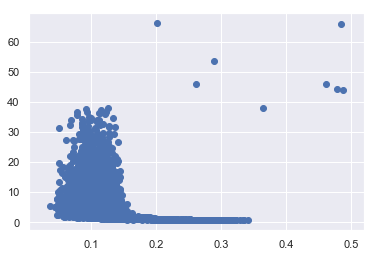

<Figure size 432x288 with 0 Axes>

In [169]:
plt.scatter(n_arr, y_arr)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650319683", plt, n_arr1, y_arr1)

In [136]:
# Adam_1642232958   / 9 crit
a8, b8, y_arr8, n_arr8 = v4_prepare_data_from_files('Adam_1650301481', 0.5)
print(a8, b8)

1      [0, 18.36293885085849, 1.0, 1.0, 334395.3128155033]
0.10920172904190091
0 || 0.5043935623444442 || 1 || 1 
1      [0, 33.13137470415733, 0.0, 1.0, 1847785.7491524385]
0.09236926488813009
0 || 0.5000000172728103 || 1 || 1 
1      [0, 48.06815316936886, 0.0, 1.0, 575183.5161021149]
0.08805848311654285
0 || 0.5010759948103695 || 1 || 1 
1      [0, 55.27929954026095, 1.0, 1.0, 66586.07347484748]
0.1933979781288177
0 || 0.6007439847322946 || 1 || 1 
0      [0, 76.02883392766448, 0.5, 0.0, 733734.5540309435]
0.10011707774056605
0 || 0.5001424214068393 || 0 || 0 
1      [1, 11.346153664008396, 1.0, 1.0, 626494.4847868765]
0.13008651096291785
1 || 0.5000669255456093 || 1 || 1 
1      [1, 98.43823606866893, 1.0, 1.0, 130446.784400931]
0.17091976379219245
1 || 0.5401545996358276 || 1 || 1 
0      [1, 44.97961665218818, 0.5, 0.0, 2548761.6877248604]
0.13134495068895813
1 || 0.5000000000000133 || 0 || 0 
1      [1, 45.217827451689736, 0.0, 1.0, 1073779.4560540132]
0.13310789754660954
1 || 0

0.12186403225864725
14 || 0.5000000000021942 || 0 || 0 
1      [14, 17.579252592353356, 0.1, 1.0, 203287.32246230677]
0.13155479237737738
14 || 0.5178793605909282 || 1 || 1 
1      [14, 65.49922200284385, 0.1, 1.0, 949301.8021750556]
0.09037029605995213
14 || 0.5000445256846483 || 1 || 1 
1      [14, 59.886013164932606, 0.5, 1.0, 1947667.1838181461]
0.11522491184972138
14 || 0.5000000002081441 || 1 || 1 
1      [15, 62.60378123840088, 1.0, 1.0, 216712.57527240578]
0.11804562099319137
15 || 0.5193701134532429 || 1 || 1 
1      [15, 7.136221521002284, 0.1, 1.0, 1474652.0612263277]
0.09330136326090376
15 || 0.5000003398142033 || 1 || 1 
1      [15, 34.172785599570986, 1.0, 1.0, 69081.67833502317]
0.22538687628218718
15 || 0.5939332287193344 || 1 || 1 
0      [15, 34.66074092378716, 0.1, 0.0, 416361.248915749]
0.10173236932374682
15 || 0.502617821617358 || 0 || 0 
0      [15, 79.23032610080394, 0.5, 0.0, 2004854.3761166513]
0.14591504691182727
15 || 0.5000000000007779 || 0 || 0 
1      [16

0.10780360777738565
28 || 0.5012654717412994 || 1 || 1 
0      [28, 26.12436937440581, 0.1, 0.0, 754872.8035159566]
0.11818197162558075
28 || 0.5000458661082753 || 0 || 0 
0      [29, 8.015807263386016, 0.0, 0.0, 120444.58905388408]
0.0975573002795816
29 || 0.5398372347805303 || 0 || 0 
1      [29, 59.24772341877672, 0.0, 1.0, 521349.01158913964]
0.1185629807930965
29 || 0.5004506691623248 || 1 || 1 
1      [29, 30.532787527374904, 0.1, 1.0, 317970.07778526173]
0.11707726672499816
29 || 0.5055276492785533 || 1 || 1 
1      [29, 27.457220119452607, 1.0, 1.0, 72627.90893811709]
0.20616056647808484
29 || 0.5795589517269388 || 1 || 1 
0      [29, 10.05933432360605, 0.5, 0.0, 281384.7105472149]
0.09149648113268816
29 || 0.5096757306373905 || 0 || 0 
0      [30, 46.69814000694289, 0.5, 0.0, 913374.8355110026]
0.14655293211600146
30 || 0.5000010430434609 || 0 || 0 
0      [30, 48.34139327119444, 1.0, 0.0, 397750.11582549004]
0.12765524521741478
30 || 0.5013997539677598 || 0 || 0 
1      [30, 

0.12039626898671263
42 || 0.501140644012688 || 1 || 1 
1      [43, 76.14338290728155, 0.0, 1.0, 378232.6752673676]
0.1320866210802374
43 || 0.5019379894955297 || 1 || 1 
1      [43, 1.6650148114506158, 0.0, 1.0, 69515.04404381136]
0.2542694175648041
43 || 0.592652780279175 || 1 || 1 
1      [43, 27.965674785144927, 0.0, 1.0, 607694.7543504453]
0.11158886743316503
43 || 0.5003341736649999 || 1 || 1 
0      [43, 68.02739477286713, 0.0, 0.0, 332070.5256604488]
0.13649950247125864
43 || 0.5030822203494085 || 0 || 0 
0      [43, 77.37637842051629, 0.1, 0.0, 848977.4048152443]
0.10650891393514712
43 || 0.5000332123153418 || 0 || 0 
0      [44, 47.481376376239695, 1.0, 0.0, 300109.00953210937]
0.10739967357793137
44 || 0.5080058322938515 || 0 || 0 
1      [44, 26.59056020888475, 1.0, 1.0, 1193091.2024464565]
0.10856214321618089
44 || 0.5000010051153759 || 1 || 1 
0      [44, 26.562578900356833, 0.1, 0.0, 1022513.1426777873]
0.07707637451427594
44 || 0.5000693522402939 || 0 || 0 
1      [44, 9

0.15010998964274005
57 || 0.5528616938408399 || 1 || 1 
0      [57, 11.920512330685618, 0.0, 0.0, 901048.8599618534]
0.14019108446864972
57 || 0.5000015747735573 || 0 || 0 
1      [57, 62.54699891219973, 0.0, 1.0, 141120.18562619842]
0.13507853149461102
57 || 0.5343617899011591 || 1 || 1 
0      [58, 16.064073152902044, 0.5, 0.0, 447608.57213810034]
0.10047337816808971
58 || 0.5020079146550317 || 0 || 0 
1      [58, 80.46154892525952, 1.0, 1.0, 1926025.054368398]
0.0857000169196887
58 || 0.5000000318642801 || 1 || 1 
0      [58, 13.52786798032829, 0.5, 0.0, 130590.08790055299]
0.17278755105682017
58 || 0.5411483272349372 || 0 || 0 
1      [58, 31.882917614096513, 0.1, 1.0, 1679333.295888202]
0.10417554300506061
58 || 0.5000000133635648 || 1 || 1 
1      [58, 50.69927770451559, 0.5, 1.0, 357625.1326129158]
0.1031099472669995
58 || 0.5047484592023198 || 1 || 1 
0      [59, 77.6486044176223, 0.5, 0.0, 256363.7392042149]
0.13098105495730222
59 || 0.5065341682400476 || 0 || 0 
0      [59, 7

0.08777468646312538
71 || 0.5002085959035261 || 1 || 1 
1      [71, 20.9680794034495, 0.5, 1.0, 204850.00593785653]
0.107467248674415
71 || 0.5172037295982903 || 1 || 1 
0      [72, 7.277215924674701, 0.1, 0.0, 1234477.0718807995]
0.11084183527591591
72 || 0.5000004865558235 || 0 || 0 
1      [72, 42.30636105579009, 0.1, 1.0, 426069.8351123437]
0.13235664320665907
72 || 0.5011624840884864 || 1 || 1 
1      [72, 65.53495447909972, 0.1, 1.0, 263189.4618014711]
0.1368402312135603
72 || 0.5090479974901296 || 1 || 1 
1      [72, 98.86640428811542, 0.1, 1.0, 1192906.75341883]
0.11522971316950642
72 || 0.5000005830635574 || 1 || 1 
0      [72, 28.875200719031135, 0.5, 0.0, 426192.7459100039]
0.1256727441039537
72 || 0.5011346738782335 || 0 || 0 
1      [73, 78.66732280611564, 0.5, 1.0, 111235.71995132728]
0.1578148940663889
73 || 0.5476996038438954 || 1 || 1 
0      [73, 36.00103496159443, 0.1, 0.0, 687738.171587149]
0.10911008308932427
73 || 0.5001669747239506 || 0 || 0 
0      [73, 44.98501

0.10091976752141735
86 || 0.5259438093152933 || 0 || 0 
0      [86, 66.40313930848572, 0.5, 0.0, 224467.95714849993]
0.09677109188003652
86 || 0.5155060266652551 || 0 || 0 
1      [86, 91.2798579853466, 1.0, 1.0, 573486.6985610081]
0.12418124239548943
86 || 0.5002205539843911 || 1 || 1 
1      [86, 59.95175888838267, 0.1, 1.0, 166855.98552530524]
0.13488898711311392
86 || 0.5195529276032932 || 1 || 1 
0      [87, 95.61466599083633, 0.0, 0.0, 202611.0999882168]
0.1347393845028007
87 || 0.5127026560523568 || 0 || 0 
1      [87, 37.52701611315335, 0.5, 1.0, 782761.5715982958]
0.1388954835387639
87 || 0.5000091838229634 || 1 || 1 
0      [87, 39.79337545488588, 0.0, 0.0, 459648.1133952981]
0.13001126136931063
87 || 0.5007194432412235 || 0 || 0 
0      [87, 52.27928964635073, 0.5, 0.0, 1943438.0115839096]
0.1285154560374246
87 || 0.5000000000229626 || 0 || 0 
0      [87, 85.62057968520787, 0.5, 0.0, 1701357.0927193935]
0.09869922979518035
87 || 0.500000023472135 || 0 || 0 
1      [88, 91.09

0.1728423623587233
100 || 0.5459652086623442 || 0 || 0 
0      [100, 84.02618607087669, 0.0, 0.0, 551575.3687524186]
0.12267859737146486
100 || 0.5002432015195875 || 0 || 0 
1      [100, 68.87727396886834, 0.0, 1.0, 655375.6308521285]
0.11130346447765183
100 || 0.5001819583031979 || 1 || 1 
1      [101, 31.671716457880116, 1.0, 1.0, 512414.94774644467]
0.12575678579221672
101 || 0.5003915534656821 || 1 || 1 
1      [101, 75.80384183953703, 0.0, 1.0, 570527.0932759846]
0.06717573569288554
101 || 0.502323223250579 || 1 || 1 
0      [101, 18.266713921037397, 0.0, 0.0, 70858.35350466112]
0.18096827712614047
101 || 0.6054368083399764 || 0 || 0 
1      [101, 19.57229356005324, 0.5, 1.0, 235347.9041462767]
0.11282094038828767
101 || 0.5119589250469011 || 1 || 1 
1      [101, 24.665929896665588, 1.0, 1.0, 781110.8799155711]
0.11374110388670079
101 || 0.5000338969594094 || 1 || 1 
1      [102, 88.68128384864478, 0.5, 1.0, 1623368.298690578]
0.11385277484533003
102 || 0.5000000072475985 || 1 || 

0.10578316377854634
114 || 0.5002280823419274 || 1 || 1 
1      [114, 24.41295375109546, 0.1, 1.0, 237388.74817284814]
0.10481177033292488
114 || 0.5136631840492049 || 1 || 1 
1      [115, 25.911598503398913, 1.0, 1.0, 232284.4745533995]
0.14585889649441974
115 || 0.5121019482903276 || 1 || 1 
1      [115, 9.33062369539764, 0.0, 1.0, 1002185.2022240014]
0.08756754323269739
115 || 0.5000337982773635 || 1 || 1 
0      [115, 24.345869435152252, 1.0, 0.0, 854880.3194285221]
0.0862972284161147
115 || 0.5001056099417728 || 0 || 0 
0      [115, 23.159228364127564, 1.0, 0.0, 531376.811262764]
0.13494385169781029
115 || 0.500252429423725 || 0 || 0 
1      [115, 16.910899475110032, 1.0, 1.0, 1181333.2421855507]
0.12561482791044248
115 || 0.5000001851860776 || 1 || 1 
0      [116, 94.086804612343, 1.0, 0.0, 177899.07671498688]
0.0814709224929216
116 || 0.5266427383888734 || 0 || 0 
1      [116, 28.720905253375665, 1.0, 1.0, 496003.14570336335]
0.09215581962496627
116 || 0.5019386627522738 || 1 ||

0.135370968595359
128 || 0.5001601249205067 || 0 || 0 
1      [129, 24.21355944606558, 0.1, 1.0, 355657.4580627574]
0.12902371387699813
129 || 0.5033733635156006 || 1 || 1 
1      [129, 33.71280545518373, 0.1, 1.0, 274579.5023689978]
0.13293881695641332
129 || 0.505106378010081 || 1 || 1 
1      [129, 74.26949639363592, 0.1, 1.0, 324407.14016660815]
0.1157344137735493
129 || 0.5041064227922882 || 1 || 1 
1      [129, 38.34527168686982, 0.1, 1.0, 636570.7418122989]
0.10366866909103643
129 || 0.5002575374996314 || 1 || 1 
1      [129, 50.24866999772095, 0.0, 1.0, 850041.9137078386]
0.11826554160288122
129 || 0.5000132412089795 || 1 || 1 
1      [130, 93.10925072913182, 0.0, 1.0, 664405.1292137009]
0.1303272232980301
130 || 0.5000642492785892 || 1 || 1 
1      [130, 82.36871301763414, 0.0, 1.0, 249983.3278445059]
0.12930259943662759
130 || 0.5093974036114745 || 1 || 1 
1      [130, 3.416310531437322, 0.5, 1.0, 366753.59127857233]
0.10110527181848067
130 || 0.5039507354524748 || 1 || 1 
1 

0.1396207049734357
142 || 0.5000000000017281 || 1 || 1 
0      [143, 43.74333882170762, 0.5, 0.0, 140975.3854564991]
0.12135504565781281
143 || 0.5327925932239244 || 0 || 0 
0      [143, 81.12467532237869, 1.0, 0.0, 1260283.6750161434]
0.08506406516477755
143 || 0.5000062888647004 || 0 || 0 
1      [143, 86.98759131673827, 1.0, 1.0, 877804.3860017796]
0.11406316215493424
143 || 0.5000152546937456 || 1 || 1 
1      [143, 17.08271810293807, 0.0, 1.0, 720251.257106322]
0.12167698016092254
143 || 0.5000424112306643 || 1 || 1 
0      [143, 52.58624440364086, 0.1, 0.0, 1041855.3665862571]
0.12365941517395146
143 || 0.5000015969980857 || 0 || 0 
1      [144, 66.73678999149185, 0.0, 1.0, 1763050.9514031643]
0.1365364723157961
144 || 0.500000000066342 || 1 || 1 
0      [144, 38.92898627880837, 0.5, 0.0, 763129.3041767955]
0.12897190194833516
144 || 0.5000222699057113 || 0 || 0 
1      [144, 2.482411483760283, 0.5, 1.0, 361955.7787185552]
0.07555730982071507
144 || 0.5080685598922591 || 1 || 1 


0.13112740844546242
156 || 0.5016406557218467 || 1 || 1 
1      [157, 33.64937309701276, 1.0, 1.0, 449335.02558235376]
0.12074661438615131
157 || 0.5011185205073698 || 1 || 1 
1      [157, 68.41364128539611, 0.1, 1.0, 95340.61022263118]
0.18225505362235261
157 || 0.5705988905972598 || 1 || 1 
1      [157, 89.14972516696807, 1.0, 1.0, 849128.8188907426]
0.12058151960224128
157 || 0.5000169156778683 || 1 || 1 
0      [157, 42.112804840121115, 0.1, 0.0, 406644.89032494073]
0.11682615532778232
157 || 0.5017804057298261 || 0 || 0 
1      [157, 72.34421328111915, 1.0, 1.0, 82931.10047886848]
0.19368629470311527
157 || 0.572855868569261 || 1 || 1 
1      [158, 78.25520550674719, 0.1, 1.0, 1205525.949779189]
0.12270986544008042
158 || 0.500000175141613 || 1 || 1 
0      [158, 45.15959205458412, 1.0, 0.0, 635796.9571066322]
0.08444123156906326
158 || 0.5005943652968147 || 0 || 0 
1      [158, 2.277788260009844, 1.0, 1.0, 1290773.7754085062]
0.12502929704711355
158 || 0.5000000637354397 || 1 || 

0.13194169234172146
171 || 0.5000000006307992 || 0 || 0 
0      [171, 59.80332868722146, 0.0, 0.0, 893576.0777100174]
0.1374085290931625
171 || 0.5000030178599801 || 0 || 0 
1      [171, 63.89921415816752, 0.1, 1.0, 1004477.145664929]
0.1026377440649769
171 || 0.5000100734465548 || 1 || 1 
1      [171, 33.530759589446866, 1.0, 1.0, 1263729.0433016783]
0.14062527648851814
171 || 0.5000000163204432 || 1 || 1 
1      [172, 54.35632724233943, 1.0, 1.0, 1017528.9590088276]
0.10901365996506504
172 || 0.5000051100156901 || 1 || 1 
1      [172, 10.108811166746717, 0.1, 1.0, 1539280.214020313]
0.12401134705016606
172 || 0.5000000047691613 || 1 || 1 
1      [172, 17.848277163381525, 0.0, 1.0, 1650662.0697371126]
0.11154238621879602
172 || 0.5000000086817677 || 1 || 1 
1      [172, 65.23526451815813, 0.1, 1.0, 723846.0039924439]
0.13979727724319987
172 || 0.5000175028208462 || 1 || 1 
1      [172, 89.30311194004447, 0.0, 1.0, 288677.48797385086]
0.11109858061083532
172 || 0.5071655746770093 || 1 

0.12240329970408685
185 || 0.5012738729813347 || 0 || 0 
0      [185, 78.8960984758457, 0.1, 0.0, 1582062.1483670874]
0.09747130785307385
185 || 0.5000000859099686 || 0 || 0 
1      [185, 23.644781802688712, 1.0, 1.0, 739269.208954206]
0.1411839616103543
185 || 0.5000162069106492 || 1 || 1 
1      [186, 47.99420594120617, 1.0, 1.0, 1198620.561626448]
0.10642454527757683
186 || 0.500001217488907 || 1 || 1 
0      [186, 1.2891409890433692, 1.0, 0.0, 120168.31642818858]
0.1626228810200887
186 || 0.5512890775355604 || 0 || 0 
1      [186, 55.32996650004209, 0.0, 1.0, 496702.51140043174]
0.1204789781721794
186 || 0.5006824350072977 || 1 || 1 
0      [186, 17.122382800667513, 1.0, 0.0, 336415.6905573526]
0.09305968854538452
186 || 0.5060406074693016 || 0 || 0 
1      [186, 41.52317900889696, 0.0, 1.0, 913312.2406267334]
0.10228033855161046
186 || 0.500026990403211 || 1 || 1 
1      [187, 1.9861524487816473, 0.5, 1.0, 213047.04516812405]
0.14161062241647726
187 || 0.5127377030405919 || 1 || 1

0.08651164790492696
199 || 0.5000361334705633 || 1 || 1 
0      [199, 3.335679736476993, 0.1, 0.0, 1718472.4488979115]
0.08324931221736558
199 || 0.5000002292203108 || 0 || 0 
0      [199, 29.98866969922906, 0.0, 0.0, 173144.8794918787]
0.10283093891243471
199 || 0.5279842034740697 || 0 || 0 
1      [200, 69.8215064231943, 1.0, 1.0, 246185.99004581053]
0.12451611837017279
200 || 0.5104983216944154 || 1 || 1 
1      [200, 86.0604186539034, 1.0, 1.0, 892408.5705039176]
0.10900470145045388
200 || 0.5000229716254416 || 1 || 1 
0      [200, 78.10310214723198, 1.0, 0.0, 1263297.2373471293]
0.10286928550412369
200 || 0.5000010962412589 || 0 || 0 
1      [200, 71.65038375185291, 1.0, 1.0, 156198.02720583417]
0.1608436237810823
200 || 0.5307686341190955 || 1 || 1 
1      [200, 26.064621678854493, 0.1, 1.0, 232578.29550878523]
0.0944195133000366
200 || 0.517315058166164 || 1 || 1 
1      [201, 41.7765224882596, 1.0, 1.0, 387941.5208823224]
0.1153459542552489
201 || 0.5027226443483189 || 1 || 1 


0.12150310005168016
213 || 0.5011762869862877 || 1 || 1 
0      [213, 8.314465714057977, 1.0, 0.0, 955673.3278145891]
0.0937316694903502
213 || 0.50002307257321 || 0 || 0 
1      [214, 56.913403294963125, 0.0, 1.0, 730364.7906794638]
0.10842947204829591
214 || 0.5000990709209033 || 1 || 1 
1      [214, 28.611582176627987, 1.0, 1.0, 152096.8633610434]
0.0876478502256834
214 || 0.529782316699612 || 1 || 1 
1      [214, 92.78648926005144, 0.0, 1.0, 60977.34518572845]
0.27181774121589913
214 || 0.6188732080176486 || 1 || 1 
1      [214, 59.98494057196504, 0.1, 1.0, 956907.5227125065]
0.11589549327375326
214 || 0.5000053184924258 || 1 || 1 
1      [214, 26.111169128113865, 1.0, 1.0, 340887.73419825034]
0.08294865428295235
214 || 0.5087548771865302 || 1 || 1 
1      [215, 66.33380639952647, 1.0, 1.0, 195380.10072339186]
0.07999813308601898
215 || 0.5250734689810586 || 1 || 1 
0      [215, 79.33940696684904, 0.0, 0.0, 550735.5187792908]
0.11222350947436814
215 || 0.500479309993118 || 0 || 0 


0.08340641030958502
227 || 0.5268019442710529 || 1 || 1 
1      [227, 28.237898406746233, 0.5, 1.0, 562334.1610826168]
0.08242740891376261
227 || 0.5013990961329265 || 1 || 1 
1      [228, 62.39290706690064, 0.1, 1.0, 597863.7117321684]
0.098335500928091
228 || 0.5005377296653245 || 1 || 1 
0      [228, 25.903627096153436, 0.1, 0.0, 638714.1301500765]
0.11464481403453089
228 || 0.5001676233421956 || 0 || 0 
0      [228, 88.40710768788148, 0.5, 0.0, 1548802.4915000123]
0.1323526257729082
228 || 0.5000000014848944 || 0 || 0 
1      [228, 3.7283728052213414, 0.1, 1.0, 250098.05736194795]
0.09813881733472746
228 || 0.5162418167330757 || 1 || 1 
1      [228, 53.369564893704165, 0.0, 1.0, 791826.1708519369]
0.10058579066184577
228 || 0.500113658911363 || 1 || 1 
1      [229, 46.32993912485049, 1.0, 1.0, 585837.9022027736]
0.10379487925215715
229 || 0.500540513093247 || 1 || 1 
0      [229, 7.477591388054083, 0.0, 0.0, 834936.1841727942]
0.1246665357201538
229 || 0.5000119934850237 || 0 || 0 

241 || 0.5143831029132423 || 1 || 1 
0      [241, 0.45920017968498206, 0.0, 0.0, 90322.59775593363]
0.1971565891787024
241 || 0.5629193069391808 || 0 || 0 
1      [242, 10.922246723242013, 0.1, 1.0, 589844.8017256821]
0.08615240109774913
242 || 0.5010052184743278 || 1 || 1 
0      [242, 1.6597829977017198, 0.1, 0.0, 265790.817211004]
0.13238024987142832
242 || 0.5087007893247928 || 0 || 0 
0      [242, 20.678182078671416, 0.1, 0.0, 310918.1493838689]
0.09845021997525176
242 || 0.5065961386062457 || 0 || 0 
0      [242, 13.18483119749248, 1.0, 0.0, 1170951.6457666876]
0.13140949153290155
242 || 0.5000001335386534 || 0 || 0 
1      [242, 46.187695091469934, 0.5, 1.0, 127639.76901301257]
0.10036184309157811
242 || 0.542011334917579 || 1 || 1 
1      [243, 2.4347336090820293, 0.1, 1.0, 245955.25275603254]
0.07957954610507934
243 || 0.5154063601327803 || 1 || 1 
1      [243, 78.21322237845193, 0.0, 1.0, 819104.8676229652]
0.12985649001447222
243 || 0.5000129691629048 || 1 || 1 
1      [243,

0.1525626213615853
255 || 0.546358179791438 || 1 || 1 
1      [256, 76.85282077932338, 1.0, 1.0, 1016013.8535079383]
0.12839759452661503
256 || 0.5000011310637044 || 1 || 1 
1      [256, 40.58873629405277, 1.0, 1.0, 557962.2174402771]
0.11506258815429155
256 || 0.5003885724373337 || 1 || 1 
1      [256, 31.99934988886104, 0.0, 1.0, 1071330.9809323126]
0.10819650779332692
256 || 0.5000034115726503 || 1 || 1 
1      [256, 94.72596118855132, 0.1, 1.0, 1434017.2370902563]
0.14951712115167737
256 || 0.5000000007316928 || 1 || 1 
1      [256, 78.52014667747447, 0.1, 1.0, 3385659.77310723]
0.10314680623898646
256 || 0.500000000000003 || 1 || 1 
1      [257, 85.01066792861991, 1.0, 1.0, 255685.70635673773]
0.13295184257395112
257 || 0.5098749395284918 || 1 || 1 
1      [257, 30.448773049240728, 0.0, 1.0, 319687.8672186299]
0.13854481146373857
257 || 0.5038783390897048 || 1 || 1 
1      [257, 23.36089823489516, 0.5, 1.0, 932581.7532965516]
0.15204092392409482
257 || 0.5000006621475622 || 1 || 1

0.09779914322026802
269 || 0.5000000001260193 || 1 || 1 
1      [270, 52.64661839342821, 1.0, 1.0, 967329.9365568944]
0.11482983906041239
270 || 0.5000050707539871 || 1 || 1 
0      [270, 90.55067731128999, 0.5, 0.0, 145569.92669061045]
0.11281600536056237
270 || 0.5306606149392871 || 0 || 0 
1      [270, 13.830823337029297, 0.1, 1.0, 1341544.5902294186]
0.11356173822406561
270 || 0.5000001270852377 || 1 || 1 
1      [270, 72.23951423138494, 0.0, 1.0, 289110.35162548325]
0.08593083820114296
270 || 0.5087716019037245 || 1 || 1 
1      [270, 84.85666863423948, 0.1, 1.0, 441833.43864395237]
0.13216463099722894
270 || 0.5008678436064965 || 1 || 1 
1      [271, 74.88755467573048, 1.0, 1.0, 758895.2287439288]
0.1264130547874262
271 || 0.5000290009422197 || 1 || 1 
0      [271, 72.30904929998623, 1.0, 0.0, 122817.50823666509]
0.18486592014619233
271 || 0.545308980877092 || 0 || 0 
0      [271, 58.88684841447246, 0.1, 0.0, 453858.07566534495]
0.09395257660831331
271 || 0.5019643296935313 || 0 

0.09296107577081898
284 || 0.5000000000000018 || 0 || 0 
1      [284, 21.743997233300643, 0.1, 1.0, 88268.83875475796]
0.1212347802130142
284 || 0.5688574507127636 || 1 || 1 
1      [284, 24.139002482371218, 0.5, 1.0, 123152.62730248313]
0.11591279843018278
284 || 0.5432603318859862 || 1 || 1 
0      [284, 21.012579497111666, 0.0, 0.0, 436708.1663656692]
0.11081021778280006
284 || 0.5019014101060595 || 0 || 0 
0      [284, 45.91098602720511, 0.1, 0.0, 299323.26857067586]
0.09166709973926211
284 || 0.5106987740931291 || 0 || 0 
1      [285, 70.65250804340441, 0.0, 1.0, 374176.6087347448]
0.1173332199099357
285 || 0.5030181104625461 || 1 || 1 
1      [285, 56.30964190874772, 0.5, 1.0, 144121.72756572865]
0.08033763963975994
285 || 0.5324119223971984 || 1 || 1 
1      [285, 75.91757645204589, 0.0, 1.0, 274342.45803194493]
0.10824320527936607
285 || 0.5109654201137181 || 1 || 1 
0      [285, 21.860183976232005, 0.0, 0.0, 235755.14984177597]
0.11684578710897364
285 || 0.5120610557943016 || 

0.12031909371981984
298 || 0.5001080765987692 || 0 || 0 
1      [298, 9.271009927365409, 0.1, 1.0, 64782.26161053368]
0.24288975428393775
298 || 0.6163632001136725 || 1 || 1 
1      [298, 81.44805556592729, 0.1, 1.0, 487919.4475319718]
0.11573586797889727
298 || 0.5008197915270203 || 1 || 1 
1      [298, 86.56927356562021, 0.5, 1.0, 152458.42201292445]
0.11457076129146869
298 || 0.5283381129477728 || 1 || 1 
1      [299, 18.534798323846523, 0.0, 1.0, 904205.4903458551]
0.08206711969449187
299 || 0.500145815575265 || 1 || 1 
1      [299, 66.0125127756505, 1.0, 1.0, 2423653.4404455903]
0.12080624451348047
299 || 0.5000000000006525 || 1 || 1 
1      [299, 34.084695933438425, 1.0, 1.0, 138879.21750162428]
0.09919161507084337
299 || 0.5377706435645735 || 1 || 1 
1      [299, 27.27396753397342, 0.1, 1.0, 324806.92272719217]
0.12948492983230298
299 || 0.5029104133649137 || 1 || 1 
1      [299, 93.34373776056607, 0.1, 1.0, 655789.1255333145]
0.11802171680376444
299 || 0.5001491886002728 || 1 |

0.0866668637726479
312 || 0.5053939047658987 || 0 || 0 
1      [312, 23.671065670785858, 1.0, 1.0, 758369.5734001774]
0.08364817058754133
312 || 0.5003598177691465 || 1 || 1 
0      [312, 6.005214099350869, 1.0, 0.0, 363516.48313961556]
0.1540588256434957
312 || 0.5014883267891114 || 0 || 0 
1      [312, 83.66049803051314, 0.5, 1.0, 1151825.8950290075]
0.10523808940944429
312 || 0.5000016992803967 || 1 || 1 
0      [313, 29.948925505731893, 0.5, 0.0, 673780.5427848592]
0.08576893744296091
313 || 0.5006492326317407 || 0 || 0 
1      [313, 25.309493171576413, 1.0, 1.0, 534825.4993145828]
0.11225738906182708
313 || 0.5005149691160709 || 1 || 1 
0      [313, 19.686597772658722, 0.5, 0.0, 306964.30091342685]
0.13189636176993413
313 || 0.5048329159258554 || 0 || 0 
0      [313, 67.0624464773718, 0.1, 0.0, 590450.9796088155]
0.11953378674491127
313 || 0.5002417637982064 || 0 || 0 
1      [313, 41.64655073571966, 0.0, 1.0, 541405.4285164741]
0.11775970479582032
313 || 0.5004914590754579 || 1 |

0.10707028497617743
326 || 0.5219540457827593 || 1 || 1 
1      [326, 85.15439551663354, 0.1, 1.0, 384167.4980123551]
0.11441493685493836
326 || 0.502554331260165 || 1 || 1 
1      [326, 11.620162351214669, 0.5, 1.0, 109752.32622504892]
0.1624777642439355
326 || 0.5456901636766844 || 1 || 1 
1      [327, 35.49294316985288, 0.1, 1.0, 1119705.6414774251]
0.12706387717066753
327 || 0.5000004339439668 || 1 || 1 
0      [327, 1.6334649097219045, 0.5, 0.0, 530547.4833520375]
0.10636108254928196
327 || 0.5008549487325711 || 0 || 0 
1      [327, 47.65357714604364, 0.5, 1.0, 1002245.6453283649]
0.09357657721068208
327 || 0.5000256349029558 || 1 || 1 
0      [327, 80.14374522711697, 0.0, 0.0, 661477.242500922]
0.10740507297200907
327 || 0.5001691838705662 || 0 || 0 
0      [327, 34.148975704019705, 0.5, 0.0, 91171.5640266849]
0.19076593108058423
327 || 0.5657724384678484 || 0 || 0 
1      [328, 25.744124072939485, 0.0, 1.0, 143438.54826425662]
0.12472623119451527
328 || 0.5404075563668269 || 1 |

0.08229864158224459
340 || 0.5117724220629667 || 0 || 0 
1      [340, 54.21000613541479, 0.5, 1.0, 213525.21712221726]
0.09871220340961495
340 || 0.5173024609078566 || 1 || 1 
1      [340, 60.109215142894556, 0.0, 1.0, 680111.9512419823]
0.10015167870707634
340 || 0.5002522389420674 || 1 || 1 
1      [341, 78.13569272411777, 0.0, 1.0, 186379.9817695342]
0.12376556498988404
341 || 0.5207142062232547 || 1 || 1 
0      [341, 43.34489354003742, 0.0, 0.0, 116661.31556014335]
0.14522469023733742
341 || 0.5509531341159631 || 0 || 0 
1      [341, 11.285916784325096, 1.0, 1.0, 170034.1447453766]
0.15325464461295774
341 || 0.5249394580578718 || 1 || 1 
0      [341, 50.69249339868749, 1.0, 0.0, 440636.0567318477]
0.14054988571577656
341 || 0.5007629355483928 || 0 || 0 
1      [341, 9.563486570195712, 0.5, 1.0, 3075604.389821949]
0.11796400786510593
341 || 0.500000000000001 || 1 || 1 
1      [342, 59.48714455952155, 0.0, 1.0, 453349.75293101737]
0.11869023037692096
342 || 0.5010608045121292 || 1 |

0.059507028096157044
354 || 0.5020356355604438 || 0 || 0 
1      [354, 51.62958354365467, 0.1, 1.0, 66148.68716672949]
0.21733422437611105
354 || 0.600457771926639 || 1 || 1 
1      [355, 68.48490139289855, 0.0, 1.0, 2297319.9269533814]
0.10238540037801445
355 || 0.5000000000808639 || 1 || 1 
1      [355, 98.04322643959775, 1.0, 1.0, 496164.769054657]
0.11728246137418877
355 || 0.500858086877645 || 1 || 1 
1      [355, 58.2844722517238, 0.5, 1.0, 992174.109026772]
0.13816631105910793
355 || 0.5000007547684572 || 1 || 1 
1      [355, 19.500362561093393, 0.0, 1.0, 1048207.3767394784]
0.11738750067180057
355 || 0.5000025571250273 || 1 || 1 
1      [355, 81.58524260230406, 0.5, 1.0, 1134828.698188621]
0.10109308122617497
355 || 0.5000037397267753 || 1 || 1 
1      [356, 67.87924225881319, 0.0, 1.0, 295444.62092266534]
0.11625004827700186
356 || 0.5072546210458173 || 1 || 1 
0      [356, 84.83139373067135, 1.0, 0.0, 187639.8158692352]
0.12163527426719575
356 || 0.524733922126861 || 0 || 0 


0.11558041237536625
368 || 0.500010984399123 || 1 || 1 
1      [369, 6.419912585328885, 0.5, 1.0, 1314098.624037495]
0.10037505471648704
369 || 0.5000008439359455 || 1 || 1 
1      [369, 65.61610197464684, 0.0, 1.0, 666532.2066053961]
0.10092056888998105
369 || 0.5002838294338703 || 1 || 1 
1      [369, 72.12673167200529, 0.1, 1.0, 159544.66792425147]
0.10349780131671339
369 || 0.5296258388940326 || 1 || 1 
1      [369, 72.53407940066805, 0.1, 1.0, 730661.0358534827]
0.1025839812637103
369 || 0.5001662474270125 || 1 || 1 
0      [369, 85.5552110470549, 0.1, 0.0, 639312.592035973]
0.11107578931575934
369 || 0.5002500191179221 || 0 || 0 
0      [370, 48.19575214882807, 0.5, 0.0, 457905.60852950916]
0.09692248432125106
370 || 0.5017311236308054 || 0 || 0 
1      [370, 14.007476860565527, 0.5, 1.0, 668319.1951880312]
0.10344247834345682
370 || 0.5002227950985751 || 1 || 1 
1      [370, 39.26104901419931, 0.1, 1.0, 471363.57361127314]
0.08824233562989887
370 || 0.5022124218017646 || 1 || 1 

0.09439758649417984
382 || 0.5424441551760185 || 0 || 0 
1      [383, 60.61003121250782, 1.0, 1.0, 271217.2227677235]
0.10667471990972534
383 || 0.5093777328590662 || 1 || 1 
1      [383, 55.49158080966099, 0.1, 1.0, 1556697.8217656817]
0.13384746648237889
383 || 0.5000000011972559 || 1 || 1 
1      [383, 80.08302426014167, 0.5, 1.0, 1860265.9873234143]
0.12603118379790684
383 || 0.5000000001108682 || 1 || 1 
1      [383, 1.661052297361787, 0.1, 1.0, 709917.2769918756]
0.13149936540283785
383 || 0.5000336329991546 || 1 || 1 
1      [383, 47.72430785869346, 0.1, 1.0, 414241.861849433]
0.12141656804460238
383 || 0.5012760301155041 || 1 || 1 
0      [384, 93.03879260572698, 0.0, 0.0, 248206.0358544961]
0.13922738827376271
384 || 0.5092826505814037 || 0 || 0 
0      [384, 64.5146929685034, 0.0, 0.0, 1056131.786349567]
0.14326774826523309
384 || 0.5000002589183415 || 0 || 0 
1      [384, 65.78760675079003, 1.0, 1.0, 265250.7703034248]
0.12095226922086869
384 || 0.5082427805604982 || 1 || 1 

0.1247780254534418
397 || 0.5004034487618089 || 0 || 0 
1      [397, 51.592502068373115, 0.5, 1.0, 431066.0379861125]
0.1076740168895398
397 || 0.5024471318252924 || 1 || 1 
1      [397, 49.388845171329535, 0.1, 1.0, 83197.63573232728]
0.18707146598963953
397 || 0.5842597231311687 || 1 || 1 
0      [397, 6.344979581065285, 0.1, 0.0, 591681.2130288195]
0.12378604233792372
397 || 0.5002389974126427 || 0 || 0 
1      [398, 20.080331526630513, 1.0, 1.0, 650805.4101517595]
0.12941898671928545
398 || 0.5000754056871992 || 1 || 1 
1      [398, 36.393075037398404, 1.0, 1.0, 497911.9337610121]
0.11178993432908707
398 || 0.500885933268055 || 1 || 1 
1      [398, 38.395235079924994, 0.0, 1.0, 433819.48881921277]
0.11843511911305324
398 || 0.5014653764533494 || 1 || 1 
1      [398, 94.6727650173917, 0.5, 1.0, 333863.45300862135]
0.09672012492346915
398 || 0.506150187364122 || 1 || 1 
0      [398, 6.4473305263715535, 0.5, 0.0, 532060.7786479241]
0.11569242636819604
398 || 0.5006071240128949 || 0 ||

0.11912235082920665
411 || 0.5001726940660228 || 1 || 1 
0      [411, 41.92308081238132, 0.5, 0.0, 442530.2124450393]
0.1000301745696958
411 || 0.5024299090044683 || 0 || 0 
1      [411, 91.95568001690413, 0.0, 1.0, 195106.67157358132]
0.13330556215219908
411 || 0.5167052604037511 || 1 || 1 
1      [412, 95.04924346627301, 1.0, 1.0, 610603.3466019467]
0.11481324661895363
412 || 0.5002773321775413 || 1 || 1 
0      [412, 57.97159791213258, 0.1, 0.0, 459368.5533978715]
0.12155104925416668
412 || 0.5008916571400922 || 0 || 0 
1      [412, 55.510120354000314, 0.1, 1.0, 129393.47110031775]
0.1030878931765456
412 || 0.5316380509226025 || 1 || 1 
0      [412, 11.883511980466604, 0.5, 0.0, 85974.40668598632]
0.21612485103831883
412 || 0.5773079378687608 || 0 || 0 
1      [412, 37.005073229790156, 1.0, 1.0, 82470.64111712268]
0.1869515050478972
412 || 0.5894239943242138 || 1 || 1 
1      [413, 65.270371743771, 1.0, 1.0, 1398770.4121425373]
0.13704268052906135
413 || 0.5000000047137607 || 1 || 1

0.09520561590495262
425 || 0.5000001097887985 || 0 || 0 
1      [425, 15.306341573292492, 0.0, 1.0, 427159.08109431894]
0.14249108970550214
425 || 0.5008095562466504 || 1 || 1 
1      [425, 9.904431931231894, 1.0, 1.0, 806098.2956408317]
0.10842839281634563
425 || 0.5000561538789051 || 1 || 1 
0      [426, 83.76770619903536, 0.5, 0.0, 107311.85513384358]
0.13894364647360277
426 || 0.5604149475774393 || 0 || 0 
0      [426, 86.37967969138052, 1.0, 0.0, 285405.51084453677]
0.1202908522508442
426 || 0.5069582017072521 || 0 || 0 
1      [426, 76.22824247773568, 0.0, 1.0, 344026.16006774805]
0.11701639885021287
426 || 0.5033655544556181 || 1 || 1 
1      [426, 64.95987014242726, 0.5, 1.0, 366673.5686412897]
0.12387008315899184
426 || 0.5021272036331981 || 1 || 1 
1      [426, 87.46882729240309, 0.5, 1.0, 799714.8152147047]
0.13116209013227606
426 || 0.5000109838770358 || 1 || 1 
0      [427, 83.44516958294089, 0.1, 0.0, 1547453.4482372266]
0.10040635245149343
427 || 0.5000000901831588 || 0 

0.12289508331377191
439 || 0.5000860431950133 || 1 || 1 
1      [439, 43.34327512415478, 0.0, 1.0, 488341.13853539224]
0.11968650638975209
439 || 0.5007813039630147 || 1 || 1 
0      [440, 21.51841367625027, 1.0, 0.0, 853362.7825467101]
0.12392264049889312
440 || 0.5000134368819649 || 0 || 0 
0      [440, 99.04258656760729, 0.0, 0.0, 1510128.7710762257]
0.11548664865091607
440 || 0.5000000220381824 || 0 || 0 
1      [440, 51.49283576650928, 0.5, 1.0, 667779.4742287354]
0.13852643807680037
440 || 0.5000511099458032 || 1 || 1 
1      [440, 29.405148279330394, 0.5, 1.0, 604166.5101152994]
0.12339794556057078
440 || 0.5001768975053809 || 1 || 1 
1      [440, 44.988415689330736, 0.1, 1.0, 798128.9118729383]
0.11815225497726457
440 || 0.5000279506143354 || 1 || 1 
0      [441, 37.08077584022046, 0.1, 0.0, 806780.2537794998]
0.07970973153597102
441 || 0.5001946697997032 || 0 || 0 
1      [441, 45.49455834218949, 0.0, 1.0, 888201.0246188799]
0.09270063971462564
441 || 0.5000752297561085 || 1 |

0.1603491070539973
453 || 0.5151385376757035 || 0 || 0 
1      [454, 59.13902205804472, 1.0, 1.0, 959758.3649472238]
0.11410625916571354
454 || 0.5000071882235129 || 1 || 1 
0      [454, 61.186494523165955, 0.0, 0.0, 127566.97503818218]
0.13189300430320755
454 || 0.5349570396695906 || 0 || 0 
0      [454, 5.682442009558619, 0.0, 0.0, 1022871.0557433311]
0.14495841327716888
454 || 0.5000002977900285 || 0 || 0 
1      [454, 40.183402014823564, 1.0, 1.0, 1318908.9264649977]
0.13198142288140452
454 || 0.5000000222646174 || 1 || 1 
1      [454, 93.69921902713357, 0.5, 1.0, 144154.32681145653]
0.16684448223943396
454 || 0.5273762053401243 || 1 || 1 
1      [455, 38.983251586010816, 0.5, 1.0, 250154.18597144092]
0.10902909138552627
455 || 0.5129564304873663 || 1 || 1 
1      [455, 41.76274708654831, 1.0, 1.0, 132519.01027751568]
0.1377003909007267
455 || 0.5374705147450449 || 1 || 1 
1      [455, 87.2502425292947, 1.0, 1.0, 305143.5610365148]
0.13504835600515397
455 || 0.5043987226732143 || 1

0.10046125182353204
468 || 0.5312646208989207 || 1 || 1 
1      [468, 15.355206693942513, 1.0, 1.0, 631893.4919470468]
0.13487220705660918
468 || 0.5000523118089134 || 1 || 1 
1      [468, 46.04814117459085, 0.5, 1.0, 232071.27772013427]
0.11384110950175913
468 || 0.5110712055792805 || 1 || 1 
1      [468, 4.644436919884992, 1.0, 1.0, 130928.51223937907]
0.11941573887091327
468 || 0.5435246402841779 || 1 || 1 
0      [469, 67.08252426332622, 0.1, 0.0, 196112.33333744862]
0.1368235161253896
469 || 0.5198040077984344 || 0 || 0 
1      [469, 67.75521388562414, 0.0, 1.0, 356025.99935334554]
0.10767535679687364
469 || 0.5037396860931153 || 1 || 1 
1      [469, 91.64064024721823, 0.5, 1.0, 485758.2248566567]
0.12701502568494882
469 || 0.5007174587572036 || 1 || 1 
1      [469, 22.13250962496386, 1.0, 1.0, 179820.48747113012]
0.10682367382150827
469 || 0.524884123341139 || 1 || 1 
1      [469, 13.511989442538685, 1.0, 1.0, 850427.0172074067]
0.10230188359317677
469 || 0.5000454253753802 || 1 

1      [482, 14.541097409322662, 0.0, 1.0, 177576.04000048613]
0.11033796106486315
482 || 0.5229717452963667 || 1 || 1 
0      [482, 52.03788082802041, 0.1, 0.0, 220288.2763321052]
0.12078107645725338
482 || 0.5122988175516527 || 0 || 0 
0      [482, 42.137738713283866, 0.0, 0.0, 674718.3462292885]
0.14007744889748056
482 || 0.5000436952210744 || 0 || 0 
1      [482, 28.934729738076026, 0.5, 1.0, 183984.82017130364]
0.10504127316748774
482 || 0.5268339251177593 || 1 || 1 
1      [483, 90.90044833332125, 0.0, 1.0, 396407.0418349866]
0.09825624212627977
483 || 0.5037474858080383 || 1 || 1 
0      [483, 65.05370837526232, 0.0, 0.0, 400664.63174004474]
0.08757970710584499
483 || 0.5040945407274241 || 0 || 0 
0      [483, 84.61944028997685, 0.5, 0.0, 1474910.4526503924]
0.12051374120583971
483 || 0.500000016788879 || 0 || 0 
1      [483, 21.270625611730136, 1.0, 1.0, 101551.21744970982]
0.16314170051603555
483 || 0.5543616439011434 || 1 || 1 
1      [483, 48.74913341897046, 0.5, 1.0, 118253

0.1362110699371946
496 || 0.5064235901104902 || 1 || 1 
1      [496, 70.34992364901042, 0.5, 1.0, 160938.83974546118]
0.13191054374812347
496 || 0.5231148026139489 || 1 || 1 
1      [496, 88.58675747703472, 0.5, 1.0, 543591.8466758286]
0.10246577494335946
496 || 0.500695655206202 || 1 || 1 
0      [496, 12.13845451471745, 0.5, 0.0, 159315.4995784358]
0.14681909399818674
496 || 0.5303163419207708 || 0 || 0 
0      [497, 75.96811567682029, 0.0, 0.0, 419772.7963774466]
0.14252197196208527
497 || 0.5007561573932126 || 0 || 0 
0      [497, 80.43206033586007, 0.0, 0.0, 907204.5001975795]
0.10669123864032527
497 || 0.5000187447812994 || 0 || 0 
0      [497, 7.0109764799273835, 0.1, 0.0, 811197.2660232543]
0.13240106111706693
497 || 0.5000063211278641 || 0 || 0 
0      [497, 30.970265122246577, 0.0, 0.0, 179643.30774151202]
0.1269998691183551
497 || 0.5210355059142145 || 0 || 0 
1      [497, 60.61232555787779, 1.0, 1.0, 276908.9978617599]
0.09606777840421593
497 || 0.5107012200081005 || 1 || 1

0.1273680156202163
510 || 0.512902054458986 || 0 || 0 
1      [510, 24.460370745218015, 1.0, 1.0, 160732.88440272195]
0.1312398989079303
510 || 0.5258021441044279 || 1 || 1 
0      [510, 83.7735308751012, 0.0, 0.0, 87928.79332815461]
0.2058043822371027
510 || 0.5755960076798732 || 0 || 0 
1      [511, 70.20468995486007, 0.1, 1.0, 722561.5901803426]
0.09175134398285195
511 || 0.5002277563661821 || 1 || 1 
1      [511, 90.14479045474097, 0.0, 1.0, 740035.291569829]
0.11242442821140657
511 || 0.5000709631109131 || 1 || 1 
1      [511, 39.165178224954374, 0.0, 1.0, 522566.19925840275]
0.10780132665890688
511 || 0.500816607862022 || 1 || 1 
1      [511, 16.122434674050552, 0.0, 1.0, 290935.1950682479]
0.10436223701118713
511 || 0.5086247857464 || 1 || 1 
0      [511, 98.10610712838242, 0.0, 0.0, 142801.40529866176]
0.1268425972681858
511 || 0.5305505240581726 || 0 || 0 
0      [512, 79.43538008462374, 0.1, 0.0, 179097.7897911126]
0.13150569448552
512 || 0.5194503566439652 || 0 || 0 
1      

0.0799580636701725
538 || 0.5028459921065186 || 1 || 1 
1      [538, 8.428702674314337, 1.0, 1.0, 105152.78024719018]
0.14633399155727037
538 || 0.5627943013747799 || 1 || 1 
1      [539, 90.88814260673475, 0.5, 1.0, 659488.7978508841]
0.1208823228915953
539 || 0.5001059698357656 || 1 || 1 
0      [539, 70.33312795594102, 0.0, 0.0, 527454.5849771566]
0.11678313612425331
539 || 0.5006727499783007 || 0 || 0 
1      [539, 65.48389353085535, 0.0, 1.0, 173454.9933471299]
0.13000609083530873
539 || 0.5202098395777796 || 1 || 1 
1      [539, 9.716105202843629, 1.0, 1.0, 929627.369666556]
0.11774366069232342
539 || 0.5000091147062551 || 1 || 1 
1      [539, 50.26192592099393, 0.0, 1.0, 564923.2289578684]
0.12794132806391736
539 || 0.5002198296688893 || 1 || 1 
1      [540, 94.58893175181925, 0.1, 1.0, 1925455.4824788058]
0.1233829562516364
540 || 0.5000000000845005 || 1 || 1 
0      [540, 66.39897427818973, 0.1, 0.0, 288414.8713531344]
0.1399709112784496
540 || 0.5052381417017325 || 0 || 0 
1 

0.11772161463971163
552 || 0.5059372328239946 || 1 || 1 
0      [553, 2.2927040061408666, 0.0, 0.0, 198354.13044299974]
0.15899791211021735
553 || 0.514974168128763 || 0 || 0 
1      [553, 67.937230484137, 1.0, 1.0, 1333554.272457715]
0.10368961212472315
553 || 0.5000004525531738 || 1 || 1 
0      [553, 22.382992610557444, 1.0, 0.0, 512586.6329238601]
0.07439180699327134
553 || 0.5027748826525784 || 0 || 0 
1      [553, 53.88427419617319, 0.5, 1.0, 560206.9263676561]
0.10519145728268765
553 || 0.5005888124791766 || 1 || 1 
1      [553, 62.16336169895471, 0.0, 1.0, 1250871.5518261825]
0.11192769660596359
553 || 0.5000004727044556 || 1 || 1 
1      [554, 0.6071145303437275, 1.0, 1.0, 169178.6837653839]
0.11778373813743233
554 || 0.5294503610823507 || 1 || 1 
0      [554, 48.273557924890156, 0.1, 0.0, 518302.3704500018]
0.14775278073409123
554 || 0.5002153081629215 || 0 || 0 
1      [554, 52.2928236625536, 0.1, 1.0, 372181.76299308817]
0.10036706888568031
554 || 0.5036913871179869 || 1 ||

0.11848544045254816
567 || 0.5195542632418833 || 0 || 0 
1      [567, 8.456408033435125, 0.1, 1.0, 882506.6751265591]
0.10651574596187295
567 || 0.5000277276153905 || 1 || 1 
1      [567, 10.614329078975155, 1.0, 1.0, 192732.0883730482]
0.12314364361946294
567 || 0.5195684912186437 || 1 || 1 
0      [567, 18.60208722311476, 0.0, 0.0, 1071523.2962569508]
0.11236194919269551
567 || 0.500002812458406 || 0 || 0 
0      [567, 81.03993147308958, 1.0, 0.0, 1102198.294375359]
0.13599083397927617
567 || 0.5000002265202687 || 0 || 0 
1      [568, 16.975252493670524, 0.1, 1.0, 169258.53189725665]
0.07871372079107951
568 || 0.5325330024990708 || 1 || 1 
1      [568, 32.95384336931362, 0.0, 1.0, 418506.7453586545]
0.09638011942112952
568 || 0.5029854648077107 || 1 || 1 
1      [568, 11.043226442899446, 0.5, 1.0, 165282.12098807577]
0.1338154310317749
568 || 0.5213244542481598 || 1 || 1 
1      [568, 3.9296761589376783, 0.5, 1.0, 693554.794046175]
0.13477785791675564
568 || 0.5000349842123823 || 1 |

0.12268295173145113
581 || 0.5000012674461042 || 0 || 0 
1      [581, 51.027444332229, 1.0, 1.0, 401546.1091895133]
0.09618446582783044
581 || 0.5033373156761426 || 1 || 1 
1      [581, 33.69309313140555, 0.5, 1.0, 1290402.4228913581]
0.07332880802342868
581 || 0.5000181193130377 || 1 || 1 
1      [582, 50.06938040921044, 1.0, 1.0, 387288.27521285816]
0.10046062997899607
582 || 0.5032229605333076 || 1 || 1 
0      [582, 10.616316089182687, 0.0, 0.0, 810803.8565105103]
0.11440968808248352
582 || 0.5000317501037792 || 0 || 0 
1      [582, 99.48344028580398, 0.5, 1.0, 1210388.4328179327]
0.11183144501599468
582 || 0.5000007828699407 || 1 || 1 
0      [582, 57.68369841073508, 0.1, 0.0, 1638683.0842173637]
0.10159165090416296
582 || 0.5000000312395977 || 0 || 0 
0      [582, 81.60098209909475, 1.0, 0.0, 188683.21131410566]
0.17430478748908498
582 || 0.5160833367746265 || 0 || 0 
1      [583, 20.238149753375627, 0.5, 1.0, 472615.12460656615]
0.10888456578587061
583 || 0.5016630209526316 || 1

0.11888505968454556
595 || 0.5000003975845991 || 1 || 1 
1      [595, 76.99495884777255, 1.0, 1.0, 1163391.1504112722]
0.11367188304118904
595 || 0.5000008513157514 || 1 || 1 
0      [595, 36.71110911804102, 0.0, 0.0, 1254663.442981455]
0.12103843199299047
595 || 0.500000168603016 || 0 || 0 
0      [596, 22.393718615252382, 0.1, 0.0, 447184.0298687881]
0.14270260760888803
596 || 0.5006427404157937 || 0 || 0 
0      [596, 22.38608785478311, 0.5, 0.0, 335632.94020483136]
0.09711960800190365
596 || 0.5058656336499358 || 0 || 0 
0      [596, 83.95516006620852, 1.0, 0.0, 77288.02062438626]
0.20469469489135153
596 || 0.5998826946448612 || 0 || 0 
1      [596, 55.90958084764309, 0.1, 1.0, 622155.0870427323]
0.099607586513536
596 || 0.5004280429601425 || 1 || 1 
1      [596, 19.382122947772324, 0.5, 1.0, 177341.9988643268]
0.14522546640466316
596 || 0.5225552904010663 || 1 || 1 
1      [597, 59.40249274484488, 0.1, 1.0, 957933.1412517482]
0.1101471883192794
597 || 0.5000088811775892 || 1 || 1 

0.09179974745372754
609 || 0.5073381574057011 || 1 || 1 
1      [609, 69.8015982318627, 0.5, 1.0, 229882.19331637787]
0.14043021925581203
609 || 0.5124458336581874 || 1 || 1 
1      [609, 45.3431933049811, 0.1, 1.0, 197545.71117970208]
0.09892165513962664
609 || 0.5201577009656873 || 1 || 1 
0      [610, 68.2794613771881, 0.1, 0.0, 760440.78703577]
0.11696740886870713
610 || 0.5000454176051206 || 0 || 0 
1      [610, 19.567779878956372, 0.0, 1.0, 704019.427684195]
0.097064783663473
610 || 0.5002307606474333 || 1 || 1 
0      [610, 12.500557805863089, 0.1, 0.0, 932589.6585262634]
0.10963173497027312
610 || 0.50001233891064 || 0 || 0 
1      [610, 81.65666012427329, 0.0, 1.0, 80862.89044286497]
0.18933591642294487
610 || 0.5717914924283439 || 1 || 1 
1      [610, 68.49156408584696, 0.1, 1.0, 561476.6040862047]
0.13303939676394066
610 || 0.5002648216056621 || 1 || 1 
1      [611, 40.48342019720537, 0.5, 1.0, 743202.5464552367]
0.07783683020562815
611 || 0.5004068318520696 || 1 || 1 
1    

0.11987331610954827
623 || 0.5040381949073475 || 1 || 1 
1      [624, 53.143089142274405, 1.0, 1.0, 68932.94455397106]
0.19483804309892852
624 || 0.6008525502618693 || 1 || 1 
1      [624, 34.587360650026795, 0.0, 1.0, 955335.657392185]
0.08521087796004195
624 || 0.5000623283627375 || 1 || 1 
1      [624, 4.9722658883755155, 0.1, 1.0, 939243.3108894033]
0.12442328026934663
624 || 0.5000035600301468 || 1 || 1 
1      [624, 37.22564255364495, 0.1, 1.0, 363710.66318219714]
0.1214120549866896
624 || 0.5022887275830918 || 1 || 1 
0      [624, 41.026387190960236, 1.0, 0.0, 320978.95564406394]
0.13230181191315585
624 || 0.5040252876271356 || 0 || 0 
1      [625, 89.48779259699148, 0.5, 1.0, 425787.5802800268]
0.09251104332964602
625 || 0.502818160205045 || 1 || 1 
1      [625, 97.74904379315973, 1.0, 1.0, 708592.5031410084]
0.12108807220879093
625 || 0.5000659687504868 || 1 || 1 
1      [625, 6.02726757859574, 0.1, 1.0, 783106.2065501082]
0.09799177958540539
625 || 0.500077431573992 || 1 || 1

0.12238828190127071
638 || 0.505325247743295 || 1 || 1 
0      [638, 99.9668277560141, 0.1, 0.0, 1075969.4339297726]
0.07876205199840365
638 || 0.5000381475063974 || 0 || 0 
1      [638, 11.967641702569315, 0.1, 1.0, 278408.06203232886]
0.10983238953781077
638 || 0.5088555353813317 || 1 || 1 
0      [638, 99.53447827613549, 1.0, 0.0, 480509.2456924643]
0.1276264882771666
638 || 0.5004304916263478 || 0 || 0 
0      [639, 97.27206078909731, 0.1, 0.0, 211182.86787066585]
0.15828201360231678
639 || 0.5124987407207502 || 0 || 0 
0      [639, 17.403750192269847, 0.1, 0.0, 410637.356279359]
0.11772434572344054
639 || 0.5024178052298414 || 0 || 0 
1      [639, 35.44819120558116, 1.0, 1.0, 268527.3164200983]
0.08392577280514762
639 || 0.5120735055880705 || 1 || 1 
1      [639, 84.67649701122386, 0.1, 1.0, 1413671.85305602]
0.12414944844981862
639 || 0.5000000269105138 || 1 || 1 
1      [639, 32.10215778968578, 0.1, 1.0, 69654.80917582422]
0.16884711420152362
639 || 0.6074141488401374 || 1 || 1 

0.10518489480786977
652 || 0.5000000159650629 || 0 || 0 
0      [652, 14.946265627338285, 0.5, 0.0, 627882.9108286008]
0.1115774842090578
652 || 0.5002178530049927 || 0 || 0 
1      [652, 45.39068050576222, 0.1, 1.0, 791109.4961919696]
0.10879404250909502
652 || 0.5000488913683384 || 1 || 1 
1      [652, 12.172300945288844, 0.5, 1.0, 231898.04373122507]
0.11875832045882241
652 || 0.5126864833242076 || 1 || 1 
1      [653, 19.580764257208745, 0.0, 1.0, 387086.2092381665]
0.10926653286330928
653 || 0.503074817500371 || 1 || 1 
0      [653, 47.389952179163956, 1.0, 0.0, 456006.46989130124]
0.11149389615249475
653 || 0.5017495075044907 || 0 || 0 
0      [653, 44.7422962827065, 0.5, 0.0, 99128.25699748231]
0.13611810144569095
653 || 0.5488834386321682 || 0 || 0 
1      [653, 41.95850534733589, 0.5, 1.0, 307921.66202262766]
0.11171618653891129
653 || 0.5065414063299901 || 1 || 1 
1      [653, 24.7074982988863, 0.1, 1.0, 185436.30968691933]
0.10953755970179795
653 || 0.5221069882906595 || 1 |

666 || 0.5037454777720549 || 0 || 0 
1      [666, 88.25022263066691, 0.1, 1.0, 120402.27417042083]
0.15598999727987783
666 || 0.5454607792033279 || 1 || 1 
1      [666, 39.98558993443883, 0.1, 1.0, 731192.8103274019]
0.12265324057119344
666 || 0.5000428217123012 || 1 || 1 
1      [667, 87.76107576013268, 0.0, 1.0, 512630.86501362117]
0.11607854838076705
667 || 0.5006549162891322 || 1 || 1 
1      [667, 74.17604077100086, 1.0, 1.0, 184468.2641617901]
0.06736276265306144
667 || 0.52323093053099 || 1 || 1 
0      [667, 3.210301514247227, 0.5, 0.0, 3631941.8963429546]
0.40610383016882107
667 || 0.5 || 0 || 0 
1      [667, 87.60988998163864, 0.1, 1.0, 90538.23777802225]
0.2033299924150276
667 || 0.5699866325497851 || 1 || 1 
1      [667, 61.78679453959952, 1.0, 1.0, 178457.65377951058]
0.14419183609228453
667 || 0.5230686260775855 || 1 || 1 
1      [668, 64.97096609948608, 0.1, 1.0, 631697.8750956906]
0.045740535702186995
668 || 0.5038825172470488 || 1 || 1 
1      [668, 35.2741093675013, 0

0.16957695161568936
680 || 0.555301456466699 || 1 || 1 
1      [680, 54.85836141570888, 0.1, 1.0, 404495.4027166245]
0.10864940432265134
680 || 0.502697051352247 || 1 || 1 
0      [681, 56.36395589190142, 0.0, 0.0, 397845.39997696516]
0.09102401399597143
681 || 0.5039881654456404 || 0 || 0 
1      [681, 0.21631077881598682, 1.0, 1.0, 1253311.817912234]
0.1137609577433496
681 || 0.5000003255071469 || 1 || 1 
1      [681, 79.56636179372396, 0.1, 1.0, 511675.4666501817]
0.09951819061263369
681 || 0.5013896111802058 || 1 || 1 
1      [681, 47.0031188581015, 0.1, 1.0, 87023.34394070244]
0.21829150778836837
681 || 0.5708107601801983 || 1 || 1 
1      [681, 63.95054067880408, 0.0, 1.0, 1110279.5615586552]
0.13472296393281785
681 || 0.500000251644793 || 1 || 1 
1      [682, 95.03214737370105, 1.0, 1.0, 144124.84740320078]
0.1903714053403131
682 || 0.5309100984482924 || 1 || 1 
1      [682, 6.972788324169471, 1.0, 1.0, 533854.0368784601]
0.08604082121539734
682 || 0.5017179411741018 || 1 || 1 


0.15309584847866703
694 || 0.519833566682926 || 1 || 1 
0      [694, 17.244421220054427, 0.5, 0.0, 331007.0985801063]
0.13367204107853178
694 || 0.5039621936527858 || 0 || 0 
1      [695, 17.095213393605157, 0.1, 1.0, 2040847.645883029]
0.10011474646011312
695 || 0.5000000009453873 || 1 || 1 
1      [695, 18.7010616526544, 1.0, 1.0, 946267.7450499078]
0.0935333330544933
695 || 0.5000401145475546 || 1 || 1 
0      [695, 76.37554322554382, 0.1, 0.0, 311797.07463343896]
0.14716526089131576
695 || 0.5031276185213587 || 0 || 0 
1      [695, 58.04460817665936, 0.5, 1.0, 729931.3624560026]
0.11722717751413435
695 || 0.5000464544712594 || 1 || 1 
0      [695, 31.38035137209088, 0.0, 0.0, 637097.8023277451]
0.13305452893418038
695 || 0.5000867010643841 || 0 || 0 
0      [696, 87.82696929038445, 0.5, 0.0, 1251574.166641236]
0.09279973701893032
696 || 0.5000030358859865 || 0 || 0 
1      [696, 29.79165233000319, 0.5, 1.0, 1935920.9508958329]
0.11857570161897082
696 || 0.5000000001042785 || 1 || 1

0.1973718332504577
709 || 0.5817064890485526 || 1 || 1 
0      [709, 87.27810898733217, 0.1, 0.0, 847772.24920008]
0.11700807598719758
709 || 0.5000178360980463 || 0 || 0 
1      [709, 67.60795613633019, 0.1, 1.0, 1829423.2110643033]
0.08804868163079708
709 || 0.5000000525810246 || 1 || 1 
0      [709, 13.521673752490482, 1.0, 0.0, 62298.28068694284]
0.21231170223627382
709 || 0.6173980511693322 || 0 || 0 
1      [709, 74.48705187389932, 0.0, 1.0, 227611.30158137906]
0.09837414939559236
709 || 0.5151989449475363 || 1 || 1 
1      [710, 61.16809853132208, 0.0, 1.0, 362958.2835740886]
0.12414260820853418
710 || 0.5034251611995436 || 1 || 1 
1      [710, 56.240560500363856, 1.0, 1.0, 75724.05156661294]
0.1673590070328796
710 || 0.5778770875248258 || 1 || 1 
1      [710, 21.27981860206127, 0.1, 1.0, 1046885.240294198]
0.10661353262211005
710 || 0.5000068905528007 || 1 || 1 
0      [710, 58.293643999961745, 1.0, 0.0, 522327.30586043105]
0.11907886068796213
710 || 0.5005392179613197 || 0 || 

0.1297403247183668
723 || 0.5005198818630683 || 0 || 0 
1      [723, 20.67893761559204, 0.5, 1.0, 78837.746763972]
0.1829761109530805
723 || 0.5762041111209342 || 1 || 1 
1      [723, 47.16613533374, 0.0, 1.0, 1362748.9797901434]
0.11616739043527037
723 || 0.500000117252727 || 1 || 1 
1      [723, 48.60309828462983, 1.0, 1.0, 1217891.6448463106]
0.0494540326006843
723 || 0.5002657316572834 || 1 || 1 
0      [723, 95.24492109300738, 0.0, 0.0, 183187.54148342516]
0.13531713979675292
723 || 0.5242020934540166 || 0 || 0 
1      [724, 19.430913626965555, 0.0, 1.0, 204873.34246699166]
0.08674931972023056
724 || 0.520754228701873 || 1 || 1 
1      [724, 52.5575018903343, 0.5, 1.0, 131764.12368552486]
0.12475214513025122
724 || 0.5393283630297161 || 1 || 1 
1      [724, 77.68169239455847, 0.1, 1.0, 458120.54955497256]
0.1266131766592169
724 || 0.500709800254684 || 1 || 1 
1      [724, 53.64133451109028, 0.1, 1.0, 361694.76455357147]
0.0714152149737635
724 || 0.5079172827757894 || 1 || 1 
1    

737 || 0.5202812413900959 || 1 || 1 
0      [737, 94.42599106849867, 0.0, 0.0, 284943.5634610845]
0.0668522850767187
737 || 0.5129083284192935 || 0 || 0 
0      [737, 39.856649193104985, 0.1, 0.0, 250408.38420140755]
0.1251100851660032
737 || 0.5105176627983963 || 0 || 0 
1      [737, 60.57876844141208, 0.5, 1.0, 3079256.6893103793]
0.12242536979350799
737 || 0.5000000000000002 || 1 || 1 
1      [737, 36.08986028697313, 0.5, 1.0, 1437598.1163525316]
0.10165661635746207
737 || 0.500000237824367 || 1 || 1 
1      [738, 80.7220546100317, 0.5, 1.0, 454603.0999754522]
0.10208108837623692
738 || 0.5013332400538755 || 1 || 1 
1      [738, 65.36125876485801, 0.0, 1.0, 731032.8725009289]
0.11567681285064967
738 || 0.5000674929667985 || 1 || 1 
1      [738, 5.68143090556667, 0.0, 1.0, 67985.19147228474]
0.24183017873774343
738 || 0.6052695874299531 || 1 || 1 
0      [738, 66.37649474833616, 0.1, 0.0, 668924.0537847023]
0.11018138577979171
738 || 0.5001801392330172 || 0 || 0 
1      [738, 12.3417

0.09877480891177454
751 || 0.5002708206349139 || 1 || 1 
1      [751, 53.53430053328084, 0.1, 1.0, 2550651.139707409]
0.10758670530065925
751 || 0.5000000000025426 || 1 || 1 
1      [751, 72.6793756433793, 0.5, 1.0, 393826.50260051433]
0.13211031045708635
751 || 0.501605457600939 || 1 || 1 
0      [751, 94.99258645537321, 1.0, 0.0, 3568074.136966284]
0.08780251879619196
751 || 0.5000000000000685 || 0 || 0 
0      [752, 15.189129497141135, 0.0, 0.0, 647697.5282644723]
0.0825491383949155
752 || 0.5007784128287383 || 0 || 0 
1      [752, 32.69344966573765, 0.0, 1.0, 2533212.5762907644]
0.1238394177686511
752 || 0.5000000000000802 || 1 || 1 
1      [752, 49.52432292624372, 0.1, 1.0, 366815.1994071764]
0.1150776645505471
752 || 0.5027815990715384 || 1 || 1 
1      [752, 12.647395446802939, 0.1, 1.0, 1389614.3736714437]
0.10823546423689206
752 || 0.5000001525915516 || 1 || 1 
1      [752, 63.38513974348614, 0.5, 1.0, 1348100.6906373207]
0.11437068207298545
752 || 0.5000000845300026 || 1 || 1

0.11173877342005621
765 || 0.5056248594994767 || 1 || 1 
1      [765, 14.639850640212531, 1.0, 1.0, 88928.88341275693]
0.21533775462654584
765 || 0.5751139795416897 || 1 || 1 
0      [765, 10.263587481285775, 0.1, 0.0, 493835.93746035645]
0.13343940919037245
765 || 0.5003700237210992 || 0 || 0 
1      [766, 85.20466470203041, 0.5, 1.0, 252552.7461598707]
0.12459507151691263
766 || 0.5096527418969556 || 1 || 1 
1      [766, 2.757464636337942, 1.0, 1.0, 96018.83293805286]
0.18997038389681553
766 || 0.5744599849198653 || 1 || 1 
1      [766, 1.6790409990577737, 0.5, 1.0, 619816.3109775402]
0.11937906559867185
766 || 0.5001797239168613 || 1 || 1 
1      [766, 16.730379779225807, 0.5, 1.0, 217812.84506215726]
0.1347202766265564
766 || 0.5113044326704683 || 1 || 1 
1      [766, 35.00779352979042, 0.0, 1.0, 470333.4954135432]
0.11251922341738076
766 || 0.5011742796315749 || 1 || 1 
0      [767, 47.59972454743638, 0.1, 0.0, 442393.4502402816]
0.09534339255332289
767 || 0.5020946090798938 || 0 

0.11491992916251788
779 || 0.500142969957143 || 1 || 1 
0      [779, 92.04590029905437, 0.1, 0.0, 576005.3853821689]
0.13036853794289352
779 || 0.5002238325110131 || 0 || 0 
1      [780, 64.8981567695037, 0.0, 1.0, 866198.0600927477]
0.10655007777948355
780 || 0.5000288373173085 || 1 || 1 
0      [780, 34.05480315336915, 0.1, 0.0, 253747.29723817855]
0.12153807479543167
780 || 0.5092414542347012 || 0 || 0 
0      [780, 5.837408315113918, 0.1, 0.0, 555088.963379934]
0.08746355637224995
780 || 0.5010950701359423 || 0 || 0 
1      [780, 35.365650700487286, 0.5, 1.0, 78544.06289760003]
0.19982381337617036
780 || 0.5859050011933621 || 1 || 1 
1      [780, 10.682566025933266, 0.5, 1.0, 256439.02791068307]
0.15780149747962174
780 || 0.5077217273731167 || 1 || 1 
0      [781, 60.875974537409924, 0.5, 0.0, 655738.1285017182]
0.0876444657060456
781 || 0.5004597325802971 || 0 || 0 
0      [781, 96.21410117095378, 0.0, 0.0, 285319.41293028934]
0.10682340870559154
781 || 0.5063179710900737 || 0 || 

0.23078334711824006
793 || 0.5948932369217563 || 0 || 0 
1      [793, 67.30717361535595, 1.0, 1.0, 1365656.5820577294]
0.09871485078582286
793 || 0.5000005990809443 || 1 || 1 
1      [794, 59.77222430025538, 0.5, 1.0, 72111.59063327014]
0.2091508930367372
794 || 0.5712660057686697 || 1 || 1 
0      [794, 23.620822909895463, 1.0, 0.0, 336705.39957920066]
0.12799941237541324
794 || 0.5042459488189222 || 0 || 0 
1      [794, 97.71407596975708, 0.1, 1.0, 612139.9550154718]
0.14366911888666806
794 || 0.5000656431385041 || 1 || 1 
1      [794, 12.981916077686417, 0.0, 1.0, 752901.6536899336]
0.14711340898375683
794 || 0.5000085807739982 || 1 || 1 
1      [794, 93.20238372178098, 0.5, 1.0, 826091.1765731128]
0.12168934242366228
794 || 0.5000173669653579 || 1 || 1 
1      [795, 5.4893279954458585, 0.1, 1.0, 285613.15054044174]
0.13262451093112979
795 || 0.505407213556271 || 1 || 1 
0      [795, 41.210021270038524, 1.0, 0.0, 109326.41676855592]
0.13201719924082075
795 || 0.544962322408855 || 0 

0.12372129004113203
807 || 0.5034669041311729 || 1 || 1 
1      [807, 72.84202688637772, 0.1, 1.0, 232411.140476417]
0.11296162577565097
807 || 0.510228841381214 || 1 || 1 
1      [808, 65.67410355763862, 0.5, 1.0, 350011.47339735745]
0.082907602321524
808 || 0.5063420441744444 || 1 || 1 
1      [808, 68.7841257064944, 0.5, 1.0, 454914.64949141815]
0.12787970637829138
808 || 0.5008558930834096 || 1 || 1 
1      [808, 80.33757989162838, 0.5, 1.0, 1484799.696625424]
0.10901282724110108
808 || 0.5000000706501924 || 1 || 1 
1      [808, 10.886907806055158, 0.1, 1.0, 61607.81633395899]
0.26002402673479685
808 || 0.6185091310415363 || 1 || 1 
1      [808, 30.31267111380907, 1.0, 1.0, 97123.05881517878]
0.1640394518129387
808 || 0.5550415089930086 || 1 || 1 
1      [809, 26.150049685514006, 0.5, 1.0, 158002.1052521475]
0.1480507088140949
809 || 0.5292699574350543 || 1 || 1 
1      [809, 33.91421654143194, 1.0, 1.0, 95279.78084765325]
0.1553402466106726
809 || 0.5664643659786274 || 1 || 1 
1  

0.1170240180681949
821 || 0.5012729166452744 || 1 || 1 
1      [821, 60.21797034061282, 0.5, 1.0, 451356.82775922486]
0.10579027620623983
821 || 0.5016947307716341 || 1 || 1 
1      [822, 97.84334022091745, 1.0, 1.0, 419763.3464102903]
0.1240314651201517
822 || 0.5013052802622946 || 1 || 1 
1      [822, 34.13832628399482, 0.0, 1.0, 124024.08893581716]
0.12024997335053153
822 || 0.5345982528997986 || 1 || 1 
0      [822, 68.43524308947913, 0.1, 0.0, 228261.7526036154]
0.10140325001744643
822 || 0.5141390458000374 || 0 || 0 
1      [822, 49.71835055692129, 0.0, 1.0, 434921.32591597724]
0.1338971077829978
822 || 0.5010041547121448 || 1 || 1 
1      [822, 88.45967485358403, 0.5, 1.0, 410884.35849450325]
0.0887077056610403
822 || 0.502592936755484 || 1 || 1 
0      [823, 4.902664620077612, 0.5, 0.0, 174577.94111132564]
0.09765617910655205
823 || 0.5225601984754578 || 0 || 0 
1      [823, 1.240445985800237, 1.0, 1.0, 675077.2037789022]
0.11498842909939937
823 || 0.500131617763519 || 1 || 1 


835 || 0.5000059169506768 || 1 || 1 
1      [835, 49.460808434458464, 0.5, 1.0, 303117.15009147086]
0.09882441019394622
835 || 0.506904240316134 || 1 || 1 
0      [836, 13.22279508514494, 1.0, 0.0, 760772.6805436356]
0.12288003984555106
836 || 0.5000327499696271 || 0 || 0 
1      [836, 98.7889924597652, 1.0, 1.0, 2158345.1036823145]
0.10938775271140908
836 || 0.5000000000824797 || 1 || 1 
1      [836, 38.83452407462863, 0.0, 1.0, 321989.74688686733]
0.08686054509881697
836 || 0.5083355920487355 || 1 || 1 
0      [836, 12.597697693108605, 0.0, 0.0, 487148.9296987233]
0.09115426653077117
836 || 0.5017307394870368 || 0 || 0 
1      [836, 22.83748970752183, 1.0, 1.0, 439053.96382810164]
0.10736878592588119
836 || 0.502285128030221 || 1 || 1 
1      [837, 14.253047166215172, 1.0, 1.0, 710972.9020986935]
0.13717106128544743
837 || 0.5000178263094806 || 1 || 1 
0      [837, 92.52079543441735, 0.1, 0.0, 149331.546798694]
0.12924082788211788
837 || 0.526832524190456 || 0 || 0 
1      [837, 33.1

0.1279170798216418
849 || 0.5075221598890054 || 1 || 1 
1      [849, 52.02182971370236, 0.5, 1.0, 326125.7848144174]
0.10600985820370253
849 || 0.5050280527037888 || 1 || 1 
0      [850, 49.299111970427724, 0.0, 0.0, 679068.5725203408]
0.10984411147578035
850 || 0.5001768899035229 || 0 || 0 
1      [850, 0.2088556025558741, 1.0, 1.0, 1892634.642188349]
0.13563219055750356
850 || 0.5000000000181404 || 1 || 1 
1      [850, 79.38464098267714, 0.0, 1.0, 373963.4987366033]
0.11547054434060369
850 || 0.5028379607652975 || 1 || 1 
1      [850, 50.00950562706041, 1.0, 1.0, 741923.4947924265]
0.13289357311695432
850 || 0.5000213362211801 || 1 || 1 
0      [850, 17.269025863366068, 0.0, 0.0, 710514.1388035436]
0.1352729164160862
850 || 0.5000241090181081 || 0 || 0 
0      [851, 30.12952175846514, 1.0, 0.0, 1382223.9370378894]
0.1218055692345598
851 || 0.5000000311414895 || 0 || 0 
0      [851, 69.57219131236607, 0.5, 0.0, 129687.89962942533]
0.12420427035389855
851 || 0.5344287068151693 || 0 || 

0.11824456229936173
877 || 0.5316021777694466 || 0 || 0 
1      [877, 32.515819473798004, 1.0, 1.0, 281341.51713615237]
0.10910906449877789
877 || 0.508971008008383 || 1 || 1 
0      [878, 27.910350276503127, 1.0, 0.0, 452137.8975737587]
0.10739500063165534
878 || 0.5016608302793817 || 0 || 0 
0      [878, 96.98334832399162, 1.0, 0.0, 979727.6618104259]
0.114324787696622
878 || 0.5000059877369536 || 0 || 0 
1      [878, 84.0388272689686, 0.1, 1.0, 101878.73200187337]
0.18115556172906264
878 || 0.5689526319174518 || 1 || 1 
1      [878, 85.78402271892473, 0.0, 1.0, 538140.184046675]
0.12430807187650059
878 || 0.5003102312851971 || 1 || 1 
1      [878, 40.222961776867734, 1.0, 1.0, 349001.3587773691]
0.10796364366509473
878 || 0.5052360639968968 || 1 || 1 
0      [879, 90.02176167632432, 0.5, 0.0, 682111.2896872021]
0.1324074879377408
879 || 0.5000435858744372 || 0 || 0 
1      [879, 41.81271105428899, 0.0, 1.0, 1135522.0497706842]
0.13837442903634886
879 || 0.5000001238252482 || 1 || 1 

0.12235426318977811
891 || 0.500374342003964 || 1 || 1 
0      [892, 61.718654718896374, 0.0, 0.0, 574032.7397802115]
0.13281529514347826
892 || 0.5001871236120212 || 0 || 0 
0      [892, 87.12089513994019, 0.5, 0.0, 419377.97447956435]
0.13208268401914713
892 || 0.5013119231997523 || 0 || 0 
0      [892, 18.76815633580073, 1.0, 0.0, 348459.28545028414]
0.10593409410449008
892 || 0.5036166130594633 || 0 || 0 
1      [892, 87.70415427105493, 1.0, 1.0, 211368.04282650663]
0.12835385654085152
892 || 0.5146816115695101 || 1 || 1 
1      [892, 41.32463195622161, 0.0, 1.0, 255831.9718331222]
0.11284505929862407
892 || 0.5112988679060294 || 1 || 1 
1      [893, 79.44605347492354, 0.0, 1.0, 359427.09574909875]
0.1484910099505704
893 || 0.5015392489609573 || 1 || 1 
0      [893, 61.71106947086482, 0.0, 0.0, 81880.61860672216]
0.17569035583698567
893 || 0.5893317754327595 || 0 || 0 
0      [893, 68.05903053069987, 0.5, 0.0, 907272.748383685]
0.10622774604984303
893 || 0.5000183208030258 || 0 || 

0.12099540780829574
906 || 0.505268952683735 || 0 || 0 
1      [906, 66.77340379704539, 0.5, 1.0, 403001.6536201341]
0.09947033876581654
906 || 0.5025009183171913 || 1 || 1 
1      [906, 34.73722202223428, 0.5, 1.0, 889823.2668046341]
0.10610658308475047
906 || 0.5000315203004722 || 1 || 1 
1      [906, 83.85879334738708, 1.0, 1.0, 206818.65408248876]
0.1357065059589091
906 || 0.5160797064372507 || 1 || 1 
1      [906, 61.961612055310574, 0.5, 1.0, 270922.439225976]
0.09535081804593375
906 || 0.5112277509091977 || 1 || 1 
1      [907, 8.651993964064042, 0.1, 1.0, 1218167.5949370689]
0.12849444700972235
907 || 0.5000001074930828 || 1 || 1 
0      [907, 68.0898497830624, 1.0, 0.0, 846486.0777998121]
0.1438430952078374
907 || 0.5000029235052535 || 0 || 0 
1      [907, 90.1406802775124, 0.0, 1.0, 240505.92635845204]
0.11126818196809861
907 || 0.5113413207596158 || 1 || 1 
1      [907, 60.09574102560475, 0.1, 1.0, 1283264.5752442738]
0.12856144352181473
907 || 0.5000000528195433 || 1 || 1 


0.1516419359764617
920 || 0.5243277925111438 || 1 || 1 
1      [920, 39.1056767200867, 0.0, 1.0, 199701.70467049233]
0.10939825298566357
920 || 0.5189777926197607 || 1 || 1 
0      [920, 46.40291469310534, 0.0, 0.0, 539419.2873888435]
0.08632554638672069
920 || 0.5016238283044546 || 0 || 0 
1      [921, 38.51578269170477, 1.0, 1.0, 218433.25447642032]
0.11415853137579564
921 || 0.5127820293785318 || 1 || 1 
1      [921, 54.414264431168945, 1.0, 1.0, 919763.1765099788]
0.09848524818967136
921 || 0.5000308818738688 || 1 || 1 
1      [921, 62.67878179075604, 0.0, 1.0, 2445807.17963935]
0.10566506937346205
921 || 0.5000000000085706 || 1 || 1 
0      [921, 39.393381992340856, 0.1, 0.0, 874974.9756628292]
0.1358863483109523
921 || 0.5000041831189079 || 0 || 0 
1      [921, 72.52317662149727, 1.0, 1.0, 494483.14350853703]
0.10905019911856487
921 || 0.5009843026920507 || 1 || 1 
1      [922, 71.21448633023225, 1.0, 1.0, 887209.0729703819]
0.10110613892548587
922 || 0.500034552241462 || 1 || 1 

0.1567280545184203
934 || 0.5171000038151385 || 1 || 1 
0      [934, 23.24224989164298, 1.0, 0.0, 548557.4752700278]
0.10308243422224161
934 || 0.5007144410894513 || 0 || 0 
1      [935, 71.25888257528453, 0.1, 1.0, 1513658.7468853071]
0.10827102721896459
935 || 0.5000000529109533 || 1 || 1 
1      [935, 3.159114292583809, 0.5, 1.0, 245744.11491495575]
0.11824972072744758
935 || 0.5119477813375731 || 1 || 1 
0      [935, 70.26392361853753, 0.5, 0.0, 314832.0784439156]
0.1064233655674827
935 || 0.5056183963274834 || 0 || 0 
0      [935, 9.54205367852517, 0.5, 0.0, 509723.50143668783]
0.10394454786988054
935 || 0.5012330318974649 || 0 || 0 
0      [935, 34.321140216251294, 0.0, 0.0, 385310.71274695767]
0.14478434427336956
935 || 0.5013180432153717 || 0 || 0 
0      [936, 92.6824098438636, 0.5, 0.0, 71346.35922279785]
0.17826935194481786
936 || 0.6008885895539677 || 0 || 0 
1      [936, 67.45222928057866, 0.5, 1.0, 1728876.9623393447]
0.11610056817920006
936 || 0.5000000014152747 || 1 || 

0.09527170678374755
948 || 0.5132012228189101 || 1 || 1 
0      [948, 60.6448462217042, 0.0, 0.0, 332094.82539079624]
0.09481833550852768
948 || 0.5076825826962303 || 0 || 0 
1      [949, 48.8953806009019, 0.0, 1.0, 125351.1174893912]
0.10614963984046566
949 || 0.5494160733711029 || 1 || 1 
1      [949, 72.8387394502109, 0.1, 1.0, 2110719.8021227615]
0.12110421549394605
949 || 0.5000000000154183 || 1 || 1 
1      [949, 7.811362868944443, 0.0, 1.0, 284309.78308506624]
0.10038359213687441
949 || 0.5108938384972193 || 1 || 1 
1      [949, 3.3502938488026435, 0.1, 1.0, 1098328.028603717]
0.07637323198935969
949 || 0.5000460165426255 || 1 || 1 
0      [949, 95.2243687912622, 0.1, 0.0, 1428600.5887057392]
0.08720840320257627
949 || 0.5000013817289632 || 0 || 0 
1      [950, 73.21779728327324, 0.0, 1.0, 1442658.569578414]
0.1357018346313465
950 || 0.5000000030846241 || 1 || 1 
0      [950, 78.36126464180717, 0.5, 0.0, 294641.72124400304]
0.10534852376950134
950 || 0.5085050926032556 || 0 || 0

0.14135565297231528
962 || 0.5193744781435886 || 1 || 1 
1      [962, 50.56015653914299, 0.0, 1.0, 693985.4141300647]
0.1252515201122647
962 || 0.5000577058603716 || 1 || 1 
1      [963, 54.015618669602226, 1.0, 1.0, 1404388.0298764943]
0.10109512093623299
963 || 0.5000002662497472 || 1 || 1 
1      [963, 19.08593129013692, 0.1, 1.0, 201406.14355350827]
0.10569515654533507
963 || 0.516628489830796 || 1 || 1 
0      [963, 11.76931606944271, 0.0, 0.0, 539320.0952671146]
0.12953772379722758
963 || 0.5003315499647183 || 0 || 0 
1      [963, 95.58837752424458, 0.1, 1.0, 622540.1565870452]
0.11463722646152245
963 || 0.5002434519745137 || 1 || 1 
0      [963, 47.16134221411513, 0.5, 0.0, 293142.9644886813]
0.1147516448355026
963 || 0.5058996560706682 || 0 || 0 
1      [964, 85.25713308742024, 0.5, 1.0, 454665.3669700638]
0.1184589003336906
964 || 0.5011021144323111 || 1 || 1 
1      [964, 13.113326868868318, 0.1, 1.0, 387602.9890749439]
0.11115864229579578
964 || 0.5031332814286706 || 1 || 1 

0.12884146912657984
976 || 0.5000000193203523 || 1 || 1 
1      [976, 85.8085145722046, 0.5, 1.0, 83705.33889248346]
0.19299235236573792
976 || 0.5681385499729864 || 1 || 1 
1      [977, 15.93468866934858, 0.5, 1.0, 296485.6892060974]
0.1440156813664574
977 || 0.5051874363120384 || 1 || 1 
0      [977, 74.60205207656163, 1.0, 0.0, 908518.0237850975]
0.1392661262383133
977 || 0.5000016129215304 || 0 || 0 
1      [977, 6.654529673408277, 0.1, 1.0, 344431.0512022942]
0.10624321736663486
977 || 0.5046725058192878 || 1 || 1 
1      [977, 2.360235902554353, 1.0, 1.0, 726508.08618126]
0.10786179555837032
977 || 0.5001124581429003 || 1 || 1 
1      [977, 8.265125010890406, 1.0, 1.0, 219363.70632492044]
0.09380005376529325
977 || 0.5200431454460821 || 1 || 1 
0      [978, 30.627244783031227, 0.5, 0.0, 382517.6178571365]
0.12579075704927897
978 || 0.5018686671963721 || 0 || 0 
1      [978, 28.97298514301686, 0.5, 1.0, 381141.5665260575]
0.11912239881704981
978 || 0.5025178410000376 || 1 || 1 
0 

0.09519157196030001
990 || 0.5014866095999512 || 0 || 0 
0      [991, 25.9763511409375, 0.0, 0.0, 887412.1595465369]
0.09777294833445144
991 || 0.5000441587089314 || 0 || 0 
1      [991, 79.3020737574649, 0.1, 1.0, 547433.0683758345]
0.10341909711943924
991 || 0.500689303712247 || 1 || 1 
0      [991, 68.29728778643214, 0.0, 0.0, 585943.5882354254]
0.11667385892069265
991 || 0.5002539911842024 || 0 || 0 
0      [991, 25.82421613449345, 0.0, 0.0, 456114.49493836804]
0.12159449504065639
991 || 0.5010160029180262 || 0 || 0 
1      [991, 8.391024991167617, 0.5, 1.0, 1802843.326089873]
0.10348534292754502
991 || 0.5000000070401225 || 1 || 1 
1      [992, 57.9360268341763, 1.0, 1.0, 113247.46020343632]
0.17819157183491818
992 || 0.5486892732790704 || 1 || 1 
0      [992, 30.74442869912667, 0.5, 0.0, 607024.4647564583]
0.11034349100833848
992 || 0.5003014276516815 || 0 || 0 
1      [992, 56.93840306830893, 1.0, 1.0, 628161.8467755989]
0.09784301421792709
992 || 0.5003844998561298 || 1 || 1 
1

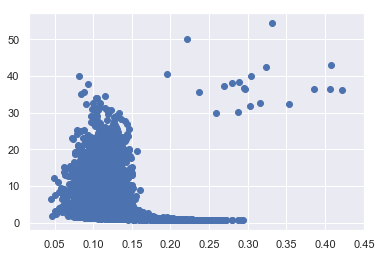

<Figure size 432x288 with 0 Axes>

In [170]:
n_arr88, y_arr88 = [], []
for u,v in zip(n_arr8, y_arr8):
    if  v <= 900000:
        y_arr88 += [v]
        n_arr88 += [u]
        
plt.scatter(n_arr88, y_arr88)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650301481", plt, n_arr1, y_arr1)

In [ ]:
# Adam_1642238587   / 10 crit
a10, b10, y_arr10, n_arr10 = v4_prepare_data_from_files('Adam_1642238587', 0.5)
print(a10, b10)

In [ ]:
plt.scatter(n_arr10, y_arr10)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

5.460887907233937 2.366892315975944
5.460887907233937 2.366892315975944


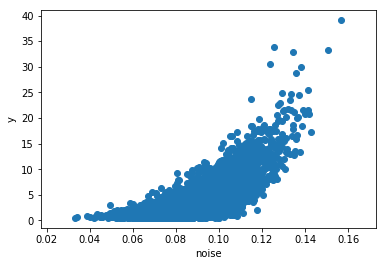

In [11]:
y_data = []
# recover data from test_file
with open(f'plots/Adam_1642206165/test_Adam_1642206165.csv', mode='r', newline='') as csv_data:
    csv_reader = csv.DictReader(csv_data)
    for row in csv_reader:
        y_data += [float(row["y_data"])]
        
print(y_data[0], y_data[-1])
y_data = [y_data[i] for i in range(0, len(y_data), 6)]
print(y_data[0], y_data[-1])

n_arr = [1 / i for i in n_arr]
plt.scatter(n_arr, y_data)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

## mu_noise = mean_noise_model + random_cov_noise_mosel (maximizing proba of prefering) 

In [15]:
experiments = ['Adam_1641213964', 'Adam_1641214341',
               'Adam_1641217332', 'Adam_1641232385', 'Adam_1641233437', 'Adam_1641219223',
                'Adam_1641220665', 'rmsprop_1641322755',]

## mu_noise = mean_noise_model

In [241]:
v2_total_accuracy = []
v2_vol_accu = []
v2_vol_gt = []
for name in experiments:
    v2_acc_, v2_vol_, v2_vol_gt_ = v2_prepare_data_from_files(name, 0.5)
    v2_total_accuracy +=[v2_acc_]
    v2_vol_accu += [v2_vol_]
    v2_vol_gt += [v2_vol_gt_]

print(v2_total_accuracy)
print(v2_vol_accu)
print(v2_vol_gt)

v2_ratio = [v2_vol_accu[i] / v2_vol_gt[i] for i in range(len(v2_vol_accu))]
v2_ratio 

[0.6047094188376754, 0.6142284569138277, 0.6002004008016032, 0.4343687374749499, 0.4188376753507014, 0.8391783567134269, 0.4185129625355797, 0.42041704170417044]
[0.05861723446893788, 0.0531062124248497, 0.05410821643286573, 0.10070140280561123, 0.09218436873747494, 0.003006012024048096, 0.09285329640741595, 0.09625962596259625]
[0.35120240480961923, 0.34468937875751504, 0.34318637274549096, 0.6067134268537074, 0.6152304609218436, 0.02555110220440882, 0.6174705746595892, 0.6173617361736173]


In [114]:
def v3_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)



    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")

    for i in range(len(test_vol_dic)):
        uid = test_vol_dic[i][0]
        #r2 = rescale_rating([test_vol_dic[i][1]])
        r2 = [test_vol_dic[i][1]]
        weight = test_vol_dic[i][2]        
        vol = int(test_vol_dic[i][3])
        y_data = test_vol_dic[i][4]
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        y = [sc.stats.expon.pdf(y_data, loc=0.5, scale=np.linalg.norm(i)) for i in noises]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        dens = [sc.special.expit(bradely[i] * y[i] * proba_noises[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / len(noises[max_index])
        #if bradely[max_index] > 0.5:
        vol_positif = 0

        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index][0] > 0.5:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            
            if vol == 1:
                nb_vol_gt += 1
        print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index][0]}") #"|| {vol} || {vol_positif} ")
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy)